# Data Wrangling

### Libraries

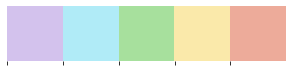

In [1]:
import json
import os
import shutil
import glob
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import cv2
import seaborn as sns
import missingno as msno 
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set Color Palettes for the notebook
colors_nude = ['#D3C2ED', '#B0EBF7', '#A7E09D', '#FAE9AA', '#EDAB9A']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

___

In [2]:
base_path = "./ISIC-Archive/Data/"
csv_path = os.path.join(base_path, "metadata.csv")

In [3]:
_df = pd.read_csv(csv_path)
_df

ID      dcm_name   age          anatomy  \
0      5436e3acbae478396759f0d1  ISIC_0000001  30.0   anterior torso   
1      5436e3acbae478396759f0d3  ISIC_0000002  60.0  upper extremity   
2      5436e3acbae478396759f0d5  ISIC_0000003  30.0  upper extremity   
3      5436e3acbae478396759f0d9  ISIC_0000005  40.0   anterior torso   
4      5436e3acbae478396759f0df  ISIC_0000008  30.0   anterior torso   
...                         ...           ...   ...              ...   
50044                IP_6526534  ISIC_9999134  50.0            torso   
50045                IP_3650745  ISIC_9999320  65.0            torso   
50046                IP_2026598  ISIC_9999515  20.0  lower extremity   
50047                IP_7702038  ISIC_9999666  50.0  lower extremity   
50048                IP_0046310  ISIC_9999806  45.0            torso   

      benign_malignant diagnosis     sex  target  
0               benign     nevus  female       0  
1            malignant  melanoma  female       1  
2               benign     nevus    male       0  
3               benign     nevus  female       0  
4               benign     nevus  female       0  
...                ...       ...     ...     ...  
50044           benign   unknown    male       0  
50045           benign   unknown    male       0  
50046           benign   unknown    male       0  
50047           benign   unknown    male       0  
50048           benign     nevus    male       0  

[50049 rows x 8 columns]

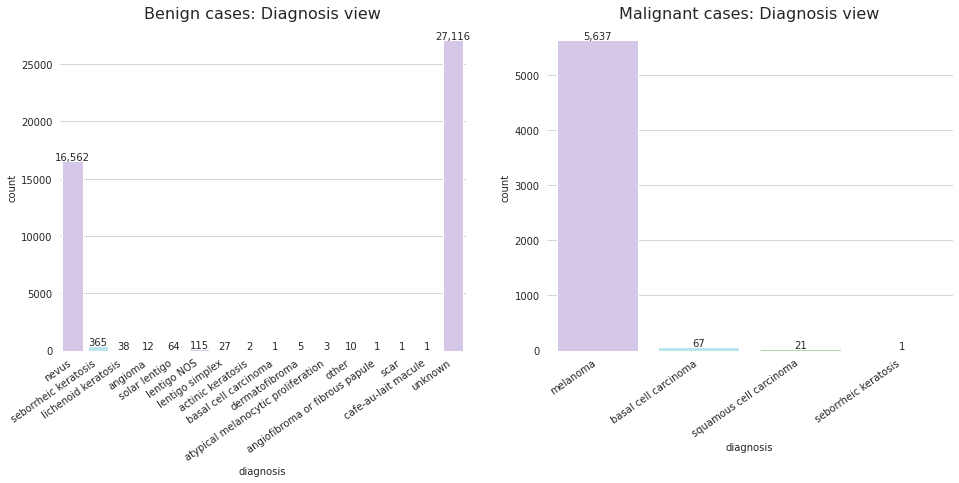

In [4]:
# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(_df[_df['target']==0]['diagnosis'], ax=ax1, palette = colors_nude)
b = sns.countplot(_df[_df['target']==1]['diagnosis'], ax=ax2, palette = colors_nude)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
ax1.set_title('Benign cases: Diagnosis view', fontsize=16)
ax2.set_title('Malignant cases: Diagnosis view', fontsize=16)
sns.despine(left=True, bottom=True);

## Move images

In [64]:
root = '/media/mestecha/Samsung_T5/SAGAN/ISIC-Archive/Data.bak/Mix/Images/'
destination = '/media/mestecha/Samsung_T5/SAGAN/ISIC-Archive/Data/Images/'

In [60]:
images = _df['dcm_name'].tolist()

In [61]:
from os import listdir
from os.path import isfile, join

fullfiles = []
for path, subdirs, files in os.walk(root):
    for name in files:
        fullfiles.append(os.path.join(path, name))

In [63]:
total = 0
for i in range(len(fullfiles)):
    if os.path.basename(os.path.splitext(fullfiles[i])[0]) in images:
        if os.path.isfile(fullfiles[i]): 
            if not os.path.exists(os.path.join(destination,os.path.basename(fullfiles[i]))):
                print(f'[Copying] File {os.path.basename(fullfiles[i])}')
                shutil.copy(fullfiles[i], destination)
                total += 1 
            else: 
                print(f'[Pass] File {os.path.basename(fullfiles[i])} already copied.')
        else:
            print(f'[Error] File {os.path.basename(fullfiles[i])} does not exist.')
            
print(f'Total number of files copied: {total}')

[Pass] File ISIC_0000004.jpeg already copied.
[Pass] File ISIC_0000003.jpeg already copied.
[Pass] File ISIC_0000002.jpeg already copied.
[Pass] File ISIC_0000000.jpeg already copied.
[Pass] File ISIC_0000005.jpeg already copied.
[Pass] File ISIC_0000006.jpeg already copied.
[Pass] File ISIC_0000012.jpeg already copied.
[Pass] File ISIC_0000001.jpeg already copied.
[Pass] File ISIC_0000013.jpeg already copied.
[Pass] File ISIC_0000010.jpeg already copied.
[Pass] File ISIC_0000009.jpeg already copied.
[Pass] File ISIC_0000015.jpeg already copied.
[Pass] File ISIC_0000008.jpeg already copied.
[Pass] File ISIC_0000007.jpeg already copied.
[Pass] File ISIC_0000011.jpeg already copied.
[Pass] File ISIC_0000014.jpeg already copied.
[Pass] File ISIC_0000016.jpeg already copied.
[Pass] File ISIC_0000017.jpeg already copied.
[Pass] File ISIC_0000018.jpeg already copied.
[Pass] File ISIC_0000022.jpeg already copied.
[Pass] File ISIC_0000021.jpeg already copied.
[Pass] File ISIC_0000019.jpeg alre

[Pass] File ISIC_0001100.jpeg already copied.
[Pass] File ISIC_0001101.jpeg already copied.
[Pass] File ISIC_0001102.jpeg already copied.
[Pass] File ISIC_0001103.jpeg already copied.
[Pass] File ISIC_0001104.jpeg already copied.
[Pass] File ISIC_0001105.jpeg already copied.
[Pass] File ISIC_0001108.jpeg already copied.
[Pass] File ISIC_0001106.jpeg already copied.
[Pass] File ISIC_0001107.jpeg already copied.
[Pass] File ISIC_0001109.jpeg already copied.
[Pass] File ISIC_0001110.jpeg already copied.
[Pass] File ISIC_0001111.jpeg already copied.
[Pass] File ISIC_0001112.jpeg already copied.
[Pass] File ISIC_0001113.jpeg already copied.
[Pass] File ISIC_0001116.jpeg already copied.
[Pass] File ISIC_0001118.jpeg already copied.
[Pass] File ISIC_0001119.jpeg already copied.
[Pass] File ISIC_0001121.jpeg already copied.
[Pass] File ISIC_0001120.jpeg already copied.
[Pass] File ISIC_0001122.jpeg already copied.
[Pass] File ISIC_0001124.jpeg already copied.
[Pass] File ISIC_0001125.jpeg alre

[Pass] File ISIC_0011420.jpeg already copied.
[Pass] File ISIC_0011421.jpeg already copied.
[Pass] File ISIC_0011428.jpeg already copied.
[Pass] File ISIC_0011429.jpeg already copied.
[Pass] File ISIC_0011430.jpeg already copied.
[Pass] File ISIC_0011432.jpeg already copied.
[Pass] File ISIC_0011434.jpeg already copied.
[Pass] File ISIC_0011435.jpeg already copied.
[Pass] File ISIC_0011433.jpeg already copied.
[Copying] File ISIC_0011436.jpeg
[Copying] File ISIC_0011437.jpeg
[Copying] File ISIC_0011438.jpeg
[Copying] File ISIC_0011439.jpeg
[Copying] File ISIC_0011440.jpeg
[Copying] File ISIC_0011441.jpeg
[Copying] File ISIC_0011442.jpeg
[Copying] File ISIC_0011451.jpeg
[Copying] File ISIC_0011450.jpeg
[Copying] File ISIC_0011456.jpeg
[Copying] File ISIC_0011455.jpeg
[Copying] File ISIC_0011454.jpeg
[Copying] File ISIC_0011458.jpeg
[Copying] File ISIC_0011459.jpeg
[Copying] File ISIC_0011460.jpeg
[Copying] File ISIC_0011463.jpeg
[Copying] File ISIC_0011467.jpeg
[Copying] File ISIC_00114

[Copying] File ISIC_0011750.jpeg
[Copying] File ISIC_0011751.jpeg
[Copying] File ISIC_0011752.jpeg
[Copying] File ISIC_0011754.jpeg
[Copying] File ISIC_0011755.jpeg
[Copying] File ISIC_0011756.jpeg
[Copying] File ISIC_0011757.jpeg
[Copying] File ISIC_0011758.jpeg
[Copying] File ISIC_0011759.jpeg
[Copying] File ISIC_0011753.jpeg
[Copying] File ISIC_0011762.jpeg
[Copying] File ISIC_0011764.jpeg
[Copying] File ISIC_0011765.jpeg
[Copying] File ISIC_0011766.jpeg
[Copying] File ISIC_0011768.jpeg
[Copying] File ISIC_0011769.jpeg
[Copying] File ISIC_0011770.jpeg
[Copying] File ISIC_0011771.jpeg
[Copying] File ISIC_0011773.jpeg
[Copying] File ISIC_0011772.jpeg
[Copying] File ISIC_0011774.jpeg
[Copying] File ISIC_0011775.jpeg
[Copying] File ISIC_0011776.jpeg
[Copying] File ISIC_0011777.jpeg
[Copying] File ISIC_0011778.jpeg
[Copying] File ISIC_0011779.jpeg
[Copying] File ISIC_0011780.jpeg
[Copying] File ISIC_0011782.jpeg
[Copying] File ISIC_0011784.jpeg
[Copying] File ISIC_0011785.jpeg
[Copying] 

[Copying] File ISIC_0012654.jpeg
[Copying] File ISIC_0012655.jpeg
[Copying] File ISIC_0012656.jpeg
[Copying] File ISIC_0012657.jpeg
[Copying] File ISIC_0012658.jpeg
[Copying] File ISIC_0012659.jpeg
[Copying] File ISIC_0012660.jpeg
[Copying] File ISIC_0012661.jpeg
[Copying] File ISIC_0012662.jpeg
[Copying] File ISIC_0012663.jpeg
[Copying] File ISIC_0012664.jpeg
[Copying] File ISIC_0012665.jpeg
[Copying] File ISIC_0012666.jpeg
[Copying] File ISIC_0012669.jpeg
[Copying] File ISIC_0012670.jpeg
[Copying] File ISIC_0012671.jpeg
[Copying] File ISIC_0012672.jpeg
[Copying] File ISIC_0012673.jpeg
[Copying] File ISIC_0012675.jpeg
[Copying] File ISIC_0012674.jpeg
[Copying] File ISIC_0012676.jpeg
[Copying] File ISIC_0012677.jpeg
[Copying] File ISIC_0012678.jpeg
[Copying] File ISIC_0012681.jpeg
[Copying] File ISIC_0012679.jpeg
[Copying] File ISIC_0012680.jpeg
[Copying] File ISIC_0012682.jpeg
[Copying] File ISIC_0012683.jpeg
[Copying] File ISIC_0012684.jpeg
[Copying] File ISIC_0012685.jpeg
[Copying] 

[Copying] File ISIC_0013208.jpeg
[Copying] File ISIC_0013224.jpeg
[Copying] File ISIC_0013226.jpeg
[Copying] File ISIC_0013222.jpeg
[Copying] File ISIC_0013216.jpeg
[Copying] File ISIC_0013229.jpeg
[Copying] File ISIC_0013232.jpeg
[Copying] File ISIC_0013233.jpeg
[Copying] File ISIC_0013230.jpeg
[Copying] File ISIC_0013227.jpeg
[Copying] File ISIC_0013235.jpeg
[Copying] File ISIC_0013236.jpeg
[Copying] File ISIC_0013238.jpeg
[Copying] File ISIC_0013242.jpeg
[Copying] File ISIC_0013243.jpeg
[Copying] File ISIC_0013244.jpeg
[Copying] File ISIC_0013248.jpeg
[Copying] File ISIC_0013249.jpeg
[Copying] File ISIC_0013257.jpeg
[Copying] File ISIC_0013258.jpeg
[Copying] File ISIC_0013268.jpeg
[Copying] File ISIC_0013269.jpeg
[Copying] File ISIC_0013271.jpeg
[Copying] File ISIC_0013270.jpeg
[Copying] File ISIC_0013274.jpeg
[Copying] File ISIC_0013275.jpeg
[Copying] File ISIC_0013277.jpeg
[Copying] File ISIC_0013281.jpeg
[Copying] File ISIC_0013288.jpeg
[Copying] File ISIC_0013294.jpeg
[Copying] 

[Copying] File ISIC_0013815.jpeg
[Copying] File ISIC_0013819.jpeg
[Copying] File ISIC_0013828.jpeg
[Copying] File ISIC_0013830.jpeg
[Copying] File ISIC_0013831.jpeg
[Copying] File ISIC_0013832.jpeg
[Copying] File ISIC_0013833.jpeg
[Copying] File ISIC_0013835.jpeg
[Copying] File ISIC_0013836.jpeg
[Copying] File ISIC_0013837.jpeg
[Copying] File ISIC_0013839.jpeg
[Copying] File ISIC_0013840.jpeg
[Copying] File ISIC_0013841.jpeg
[Copying] File ISIC_0013842.jpeg
[Copying] File ISIC_0013843.jpeg
[Copying] File ISIC_0013844.jpeg
[Copying] File ISIC_0013845.jpeg
[Copying] File ISIC_0013861.jpeg
[Copying] File ISIC_0013862.jpeg
[Copying] File ISIC_0013864.jpeg
[Copying] File ISIC_0013863.jpeg
[Copying] File ISIC_0013865.jpeg
[Copying] File ISIC_0013867.jpeg
[Copying] File ISIC_0013874.jpeg
[Copying] File ISIC_0013876.jpeg
[Copying] File ISIC_0013879.jpeg
[Copying] File ISIC_0013888.jpeg
[Copying] File ISIC_0013886.jpeg
[Copying] File ISIC_0013890.jpeg
[Copying] File ISIC_0013891.jpeg
[Copying] 

[Copying] File ISIC_0014503.jpeg
[Copying] File ISIC_0014502.jpeg
[Copying] File ISIC_0014506.jpeg
[Copying] File ISIC_0014511.jpeg
[Copying] File ISIC_0014501.jpeg
[Copying] File ISIC_0014515.jpeg
[Copying] File ISIC_0014513.jpeg
[Copying] File ISIC_0014516.jpeg
[Copying] File ISIC_0014518.jpeg
[Copying] File ISIC_0014522.jpeg
[Copying] File ISIC_0014526.jpeg
[Copying] File ISIC_0014525.jpeg
[Copying] File ISIC_0014527.jpeg
[Copying] File ISIC_0014529.jpeg
[Copying] File ISIC_0014535.jpeg
[Copying] File ISIC_0014537.jpeg
[Copying] File ISIC_0014541.jpeg
[Copying] File ISIC_0014542.jpeg
[Copying] File ISIC_0014543.jpeg
[Copying] File ISIC_0014545.jpeg
[Copying] File ISIC_0014546.jpeg
[Copying] File ISIC_0014547.jpeg
[Copying] File ISIC_0014548.jpeg
[Copying] File ISIC_0014554.jpeg
[Copying] File ISIC_0014557.jpeg
[Copying] File ISIC_0014558.jpeg
[Copying] File ISIC_0014559.jpeg
[Copying] File ISIC_0014570.jpeg
[Copying] File ISIC_0014571.jpeg
[Copying] File ISIC_0014572.jpeg
[Copying] 

[Copying] File ISIC_0015102.jpeg
[Copying] File ISIC_0015108.jpeg
[Copying] File ISIC_0015109.jpeg
[Copying] File ISIC_0015110.jpeg
[Copying] File ISIC_0015112.jpeg
[Copying] File ISIC_0015113.jpeg
[Copying] File ISIC_0015115.jpeg
[Copying] File ISIC_0015119.jpeg
[Copying] File ISIC_0015124.jpeg
[Copying] File ISIC_0015127.jpeg
[Copying] File ISIC_0015132.jpeg
[Copying] File ISIC_0015133.jpeg
[Copying] File ISIC_0015136.jpeg
[Copying] File ISIC_0015139.jpeg
[Copying] File ISIC_0015140.jpeg
[Copying] File ISIC_0015142.jpeg
[Copying] File ISIC_0015144.jpeg
[Copying] File ISIC_0015149.jpeg
[Copying] File ISIC_0015152.jpeg
[Copying] File ISIC_0015156.jpeg
[Copying] File ISIC_0015155.jpeg
[Copying] File ISIC_0015157.jpeg
[Copying] File ISIC_0015158.jpeg
[Copying] File ISIC_0015161.jpeg
[Copying] File ISIC_0015163.jpeg
[Copying] File ISIC_0015166.jpeg
[Copying] File ISIC_0015167.jpeg
[Copying] File ISIC_0015170.jpeg
[Copying] File ISIC_0015173.jpeg
[Copying] File ISIC_0015175.jpeg
[Copying] 

[Copying] File ISIC_0024449.jpeg
[Copying] File ISIC_0024451.jpeg
[Copying] File ISIC_0024456.jpeg
[Copying] File ISIC_0024458.jpeg
[Copying] File ISIC_0024455.jpeg
[Copying] File ISIC_0024459.jpeg
[Copying] File ISIC_0024460.jpeg
[Copying] File ISIC_0024462.jpeg
[Copying] File ISIC_0024466.jpeg
[Copying] File ISIC_0024465.jpeg
[Copying] File ISIC_0024467.jpeg
[Copying] File ISIC_0024473.jpeg
[Copying] File ISIC_0024476.jpeg
[Copying] File ISIC_0024479.jpeg
[Copying] File ISIC_0024482.jpeg
[Copying] File ISIC_0024484.jpeg
[Copying] File ISIC_0024481.jpeg
[Copying] File ISIC_0024483.jpeg
[Copying] File ISIC_0024480.jpeg
[Copying] File ISIC_0024485.jpeg
[Copying] File ISIC_0024486.jpeg
[Copying] File ISIC_0024487.jpeg
[Copying] File ISIC_0024492.jpeg
[Copying] File ISIC_0024491.jpeg
[Copying] File ISIC_0024493.jpeg
[Copying] File ISIC_0024497.jpeg
[Copying] File ISIC_0024499.jpeg
[Copying] File ISIC_0024496.jpeg
[Copying] File ISIC_0024500.jpeg
[Copying] File ISIC_0024501.jpeg
[Copying] 

[Copying] File ISIC_0024911.jpeg
[Copying] File ISIC_0024916.jpeg
[Copying] File ISIC_0024914.jpeg
[Copying] File ISIC_0024918.jpeg
[Copying] File ISIC_0024920.jpeg
[Copying] File ISIC_0024922.jpeg
[Copying] File ISIC_0024924.jpeg
[Copying] File ISIC_0024928.jpeg
[Copying] File ISIC_0024926.jpeg
[Copying] File ISIC_0024927.jpeg
[Copying] File ISIC_0024930.jpeg
[Copying] File ISIC_0024933.jpeg
[Copying] File ISIC_0024932.jpeg
[Copying] File ISIC_0024935.jpeg
[Copying] File ISIC_0024934.jpeg
[Copying] File ISIC_0024936.jpeg
[Copying] File ISIC_0024937.jpeg
[Copying] File ISIC_0024940.jpeg
[Copying] File ISIC_0024941.jpeg
[Copying] File ISIC_0024944.jpeg
[Copying] File ISIC_0024945.jpeg
[Copying] File ISIC_0024951.jpeg
[Copying] File ISIC_0024950.jpeg
[Copying] File ISIC_0024952.jpeg
[Copying] File ISIC_0024954.jpeg
[Copying] File ISIC_0024955.jpeg
[Copying] File ISIC_0024958.jpeg
[Copying] File ISIC_0024957.jpeg
[Copying] File ISIC_0024959.jpeg
[Copying] File ISIC_0024961.jpeg
[Copying] 

[Copying] File ISIC_0025360.jpeg
[Copying] File ISIC_0025364.jpeg
[Copying] File ISIC_0025365.jpeg
[Copying] File ISIC_0025361.jpeg
[Copying] File ISIC_0025363.jpeg
[Copying] File ISIC_0025371.jpeg
[Copying] File ISIC_0025370.jpeg
[Copying] File ISIC_0025372.jpeg
[Copying] File ISIC_0025375.jpeg
[Copying] File ISIC_0025379.jpeg
[Copying] File ISIC_0025380.jpeg
[Copying] File ISIC_0025382.jpeg
[Copying] File ISIC_0025381.jpeg
[Copying] File ISIC_0025385.jpeg
[Copying] File ISIC_0025386.jpeg
[Copying] File ISIC_0025391.jpeg
[Copying] File ISIC_0025393.jpeg
[Copying] File ISIC_0025394.jpeg
[Copying] File ISIC_0025395.jpeg
[Copying] File ISIC_0025396.jpeg
[Copying] File ISIC_0025397.jpeg
[Copying] File ISIC_0025401.jpeg
[Copying] File ISIC_0025400.jpeg
[Copying] File ISIC_0025402.jpeg
[Copying] File ISIC_0025404.jpeg
[Copying] File ISIC_0025405.jpeg
[Copying] File ISIC_0025408.jpeg
[Copying] File ISIC_0025409.jpeg
[Copying] File ISIC_0025410.jpeg
[Copying] File ISIC_0025412.jpeg
[Copying] 

[Copying] File ISIC_0025775.jpeg
[Copying] File ISIC_0025776.jpeg
[Copying] File ISIC_0025779.jpeg
[Copying] File ISIC_0025778.jpeg
[Copying] File ISIC_0025783.jpeg
[Copying] File ISIC_0025784.jpeg
[Copying] File ISIC_0025785.jpeg
[Copying] File ISIC_0025786.jpeg
[Copying] File ISIC_0025787.jpeg
[Copying] File ISIC_0025788.jpeg
[Copying] File ISIC_0025789.jpeg
[Copying] File ISIC_0025791.jpeg
[Copying] File ISIC_0025794.jpeg
[Copying] File ISIC_0025798.jpeg
[Copying] File ISIC_0025800.jpeg
[Copying] File ISIC_0025795.jpeg
[Copying] File ISIC_0025796.jpeg
[Copying] File ISIC_0025801.jpeg
[Copying] File ISIC_0025806.jpeg
[Copying] File ISIC_0025809.jpeg
[Copying] File ISIC_0025812.jpeg
[Copying] File ISIC_0025814.jpeg
[Copying] File ISIC_0025816.jpeg
[Copying] File ISIC_0025817.jpeg
[Copying] File ISIC_0025821.jpeg
[Copying] File ISIC_0025823.jpeg
[Copying] File ISIC_0025822.jpeg
[Copying] File ISIC_0025827.jpeg
[Copying] File ISIC_0025828.jpeg
[Copying] File ISIC_0025829.jpeg
[Copying] 

[Copying] File ISIC_0026200.jpeg
[Copying] File ISIC_0026207.jpeg
[Copying] File ISIC_0026202.jpeg
[Copying] File ISIC_0026208.jpeg
[Copying] File ISIC_0026209.jpeg
[Copying] File ISIC_0026210.jpeg
[Copying] File ISIC_0026211.jpeg
[Copying] File ISIC_0026214.jpeg
[Copying] File ISIC_0026215.jpeg
[Copying] File ISIC_0026216.jpeg
[Copying] File ISIC_0026217.jpeg
[Copying] File ISIC_0026220.jpeg
[Copying] File ISIC_0026221.jpeg
[Copying] File ISIC_0026223.jpeg
[Copying] File ISIC_0026222.jpeg
[Copying] File ISIC_0026224.jpeg
[Copying] File ISIC_0026226.jpeg
[Copying] File ISIC_0026227.jpeg
[Copying] File ISIC_0026228.jpeg
[Copying] File ISIC_0026229.jpeg
[Copying] File ISIC_0026231.jpeg
[Copying] File ISIC_0026233.jpeg
[Copying] File ISIC_0026232.jpeg
[Copying] File ISIC_0026236.jpeg
[Copying] File ISIC_0026237.jpeg
[Copying] File ISIC_0026239.jpeg
[Copying] File ISIC_0026240.jpeg
[Copying] File ISIC_0026241.jpeg
[Copying] File ISIC_0026246.jpeg
[Copying] File ISIC_0026244.jpeg
[Copying] 

[Copying] File ISIC_0026676.jpeg
[Copying] File ISIC_0026680.jpeg
[Copying] File ISIC_0026681.jpeg
[Copying] File ISIC_0026683.jpeg
[Copying] File ISIC_0026685.jpeg
[Copying] File ISIC_0026684.jpeg
[Copying] File ISIC_0026686.jpeg
[Copying] File ISIC_0026690.jpeg
[Copying] File ISIC_0026695.jpeg
[Copying] File ISIC_0026692.jpeg
[Copying] File ISIC_0026694.jpeg
[Copying] File ISIC_0026697.jpeg
[Copying] File ISIC_0026698.jpeg
[Copying] File ISIC_0026700.jpeg
[Copying] File ISIC_0026699.jpeg
[Copying] File ISIC_0026705.jpeg
[Copying] File ISIC_0026708.jpeg
[Copying] File ISIC_0026706.jpeg
[Copying] File ISIC_0026707.jpeg
[Copying] File ISIC_0026711.jpeg
[Copying] File ISIC_0026710.jpeg
[Copying] File ISIC_0026712.jpeg
[Copying] File ISIC_0026715.jpeg
[Copying] File ISIC_0026719.jpeg
[Copying] File ISIC_0026722.jpeg
[Copying] File ISIC_0026723.jpeg
[Copying] File ISIC_0026724.jpeg
[Copying] File ISIC_0026725.jpeg
[Copying] File ISIC_0026726.jpeg
[Copying] File ISIC_0026732.jpeg
[Copying] 

[Copying] File ISIC_0027106.jpeg
[Copying] File ISIC_0027108.jpeg
[Copying] File ISIC_0027110.jpeg
[Copying] File ISIC_0027109.jpeg
[Copying] File ISIC_0027112.jpeg
[Copying] File ISIC_0027111.jpeg
[Copying] File ISIC_0027114.jpeg
[Copying] File ISIC_0027113.jpeg
[Copying] File ISIC_0027119.jpeg
[Copying] File ISIC_0027121.jpeg
[Copying] File ISIC_0027122.jpeg
[Copying] File ISIC_0027123.jpeg
[Copying] File ISIC_0027124.jpeg
[Copying] File ISIC_0027125.jpeg
[Copying] File ISIC_0027127.jpeg
[Copying] File ISIC_0027126.jpeg
[Copying] File ISIC_0027131.jpeg
[Copying] File ISIC_0027132.jpeg
[Copying] File ISIC_0027130.jpeg
[Copying] File ISIC_0027133.jpeg
[Copying] File ISIC_0027137.jpeg
[Copying] File ISIC_0027140.jpeg
[Copying] File ISIC_0027143.jpeg
[Copying] File ISIC_0027145.jpeg
[Copying] File ISIC_0027144.jpeg
[Copying] File ISIC_0027147.jpeg
[Copying] File ISIC_0027148.jpeg
[Copying] File ISIC_0027149.jpeg
[Copying] File ISIC_0027150.jpeg
[Copying] File ISIC_0027153.jpeg
[Copying] 

[Copying] File ISIC_0027548.jpeg
[Copying] File ISIC_0027549.jpeg
[Copying] File ISIC_0027464.jpeg
[Copying] File ISIC_0027552.jpeg
[Copying] File ISIC_0027551.jpeg
[Copying] File ISIC_0027553.jpeg
[Copying] File ISIC_0027554.jpeg
[Copying] File ISIC_0027555.jpeg
[Copying] File ISIC_0027558.jpeg
[Copying] File ISIC_0027560.jpeg
[Copying] File ISIC_0027561.jpeg
[Copying] File ISIC_0027566.jpeg
[Copying] File ISIC_0027568.jpeg
[Copying] File ISIC_0027567.jpeg
[Copying] File ISIC_0027569.jpeg
[Copying] File ISIC_0027571.jpeg
[Copying] File ISIC_0027572.jpeg
[Copying] File ISIC_0027573.jpeg
[Copying] File ISIC_0027574.jpeg
[Copying] File ISIC_0027576.jpeg
[Copying] File ISIC_0027575.jpeg
[Copying] File ISIC_0027578.jpeg
[Copying] File ISIC_0027579.jpeg
[Copying] File ISIC_0027581.jpeg
[Copying] File ISIC_0027587.jpeg
[Copying] File ISIC_0027585.jpeg
[Copying] File ISIC_0027590.jpeg
[Copying] File ISIC_0027589.jpeg
[Copying] File ISIC_0027591.jpeg
[Copying] File ISIC_0027594.jpeg
[Copying] 

[Copying] File ISIC_0027974.jpeg
[Copying] File ISIC_0027971.jpeg
[Copying] File ISIC_0027972.jpeg
[Copying] File ISIC_0027970.jpeg
[Copying] File ISIC_0027975.jpeg
[Copying] File ISIC_0027977.jpeg
[Copying] File ISIC_0027978.jpeg
[Copying] File ISIC_0027979.jpeg
[Copying] File ISIC_0027981.jpeg
[Copying] File ISIC_0027980.jpeg
[Copying] File ISIC_0027985.jpeg
[Copying] File ISIC_0027984.jpeg
[Copying] File ISIC_0027987.jpeg
[Copying] File ISIC_0027988.jpeg
[Copying] File ISIC_0027993.jpeg
[Copying] File ISIC_0027995.jpeg
[Copying] File ISIC_0027997.jpeg
[Copying] File ISIC_0028001.jpeg
[Copying] File ISIC_0028000.jpeg
[Copying] File ISIC_0027999.jpeg
[Copying] File ISIC_0028002.jpeg
[Copying] File ISIC_0028003.jpeg
[Copying] File ISIC_0028007.jpeg
[Copying] File ISIC_0028008.jpeg
[Copying] File ISIC_0028010.jpeg
[Copying] File ISIC_0028011.jpeg
[Copying] File ISIC_0028009.jpeg
[Copying] File ISIC_0028014.jpeg
[Copying] File ISIC_0028015.jpeg
[Copying] File ISIC_0028016.jpeg
[Copying] 

[Copying] File ISIC_0028363.jpeg
[Copying] File ISIC_0028364.jpeg
[Copying] File ISIC_0028365.jpeg
[Copying] File ISIC_0028366.jpeg
[Copying] File ISIC_0028367.jpeg
[Copying] File ISIC_0028368.jpeg
[Copying] File ISIC_0028369.jpeg
[Copying] File ISIC_0028371.jpeg
[Copying] File ISIC_0028373.jpeg
[Copying] File ISIC_0028374.jpeg
[Copying] File ISIC_0028377.jpeg
[Copying] File ISIC_0028378.jpeg
[Copying] File ISIC_0028379.jpeg
[Copying] File ISIC_0028380.jpeg
[Copying] File ISIC_0028382.jpeg
[Copying] File ISIC_0028383.jpeg
[Copying] File ISIC_0028385.jpeg
[Copying] File ISIC_0028384.jpeg
[Copying] File ISIC_0028387.jpeg
[Copying] File ISIC_0028390.jpeg
[Copying] File ISIC_0028391.jpeg
[Copying] File ISIC_0028397.jpeg
[Copying] File ISIC_0028399.jpeg
[Copying] File ISIC_0028398.jpeg
[Copying] File ISIC_0028400.jpeg
[Copying] File ISIC_0028402.jpeg
[Copying] File ISIC_0028403.jpeg
[Copying] File ISIC_0028405.jpeg
[Copying] File ISIC_0028407.jpeg
[Copying] File ISIC_0028408.jpeg
[Copying] 

[Copying] File ISIC_0028787.jpeg
[Copying] File ISIC_0028783.jpeg
[Copying] File ISIC_0028791.jpeg
[Copying] File ISIC_0028794.jpeg
[Copying] File ISIC_0028793.jpeg
[Copying] File ISIC_0028796.jpeg
[Copying] File ISIC_0028798.jpeg
[Copying] File ISIC_0028799.jpeg
[Copying] File ISIC_0028800.jpeg
[Copying] File ISIC_0028801.jpeg
[Copying] File ISIC_0028803.jpeg
[Copying] File ISIC_0028805.jpeg
[Copying] File ISIC_0028804.jpeg
[Copying] File ISIC_0028806.jpeg
[Copying] File ISIC_0028808.jpeg
[Copying] File ISIC_0028809.jpeg
[Copying] File ISIC_0028811.jpeg
[Copying] File ISIC_0028810.jpeg
[Copying] File ISIC_0028812.jpeg
[Copying] File ISIC_0028813.jpeg
[Copying] File ISIC_0028817.jpeg
[Copying] File ISIC_0028819.jpeg
[Copying] File ISIC_0028823.jpeg
[Copying] File ISIC_0028825.jpeg
[Copying] File ISIC_0028827.jpeg
[Copying] File ISIC_0028829.jpeg
[Copying] File ISIC_0028831.jpeg
[Copying] File ISIC_0028833.jpeg
[Copying] File ISIC_0028834.jpeg
[Copying] File ISIC_0028836.jpeg
[Copying] 

[Copying] File ISIC_0029226.jpeg
[Copying] File ISIC_0029228.jpeg
[Copying] File ISIC_0029229.jpeg
[Copying] File ISIC_0029231.jpeg
[Copying] File ISIC_0029234.jpeg
[Copying] File ISIC_0029236.jpeg
[Copying] File ISIC_0029237.jpeg
[Copying] File ISIC_0029238.jpeg
[Copying] File ISIC_0029239.jpeg
[Copying] File ISIC_0029240.jpeg
[Copying] File ISIC_0029242.jpeg
[Copying] File ISIC_0029241.jpeg
[Copying] File ISIC_0029244.jpeg
[Copying] File ISIC_0029246.jpeg
[Copying] File ISIC_0029247.jpeg
[Copying] File ISIC_0029252.jpeg
[Copying] File ISIC_0029256.jpeg
[Copying] File ISIC_0029254.jpeg
[Copying] File ISIC_0029257.jpeg
[Copying] File ISIC_0029259.jpeg
[Copying] File ISIC_0029261.jpeg
[Copying] File ISIC_0029264.jpeg
[Copying] File ISIC_0029262.jpeg
[Copying] File ISIC_0029265.jpeg
[Copying] File ISIC_0029271.jpeg
[Copying] File ISIC_0029269.jpeg
[Copying] File ISIC_0029273.jpeg
[Copying] File ISIC_0029275.jpeg
[Copying] File ISIC_0029276.jpeg
[Copying] File ISIC_0029274.jpeg
[Copying] 

[Copying] File ISIC_0029664.jpeg
[Copying] File ISIC_0029666.jpeg
[Copying] File ISIC_0029665.jpeg
[Copying] File ISIC_0029667.jpeg
[Copying] File ISIC_0029668.jpeg
[Copying] File ISIC_0029670.jpeg
[Copying] File ISIC_0029671.jpeg
[Copying] File ISIC_0029673.jpeg
[Copying] File ISIC_0029675.jpeg
[Copying] File ISIC_0029599.jpeg
[Copying] File ISIC_0029679.jpeg
[Copying] File ISIC_0029688.jpeg
[Copying] File ISIC_0029686.jpeg
[Copying] File ISIC_0029690.jpeg
[Copying] File ISIC_0029692.jpeg
[Copying] File ISIC_0029693.jpeg
[Copying] File ISIC_0029695.jpeg
[Copying] File ISIC_0029696.jpeg
[Copying] File ISIC_0029698.jpeg
[Copying] File ISIC_0029700.jpeg
[Copying] File ISIC_0029702.jpeg
[Copying] File ISIC_0029704.jpeg
[Copying] File ISIC_0029701.jpeg
[Copying] File ISIC_0029707.jpeg
[Copying] File ISIC_0029708.jpeg
[Copying] File ISIC_0029710.jpeg
[Copying] File ISIC_0029712.jpeg
[Copying] File ISIC_0029716.jpeg
[Copying] File ISIC_0029717.jpeg
[Copying] File ISIC_0029719.jpeg
[Copying] 

[Copying] File ISIC_0030110.jpeg
[Copying] File ISIC_0030111.jpeg
[Copying] File ISIC_0030112.jpeg
[Copying] File ISIC_0030073.jpeg
[Copying] File ISIC_0030117.jpeg
[Copying] File ISIC_0030116.jpeg
[Copying] File ISIC_0030115.jpeg
[Copying] File ISIC_0030119.jpeg
[Copying] File ISIC_0030113.jpeg
[Copying] File ISIC_0030121.jpeg
[Copying] File ISIC_0030122.jpeg
[Copying] File ISIC_0030125.jpeg
[Copying] File ISIC_0030126.jpeg
[Copying] File ISIC_0030128.jpeg
[Copying] File ISIC_0030127.jpeg
[Copying] File ISIC_0030134.jpeg
[Copying] File ISIC_0030129.jpeg
[Copying] File ISIC_0030135.jpeg
[Copying] File ISIC_0030140.jpeg
[Copying] File ISIC_0030139.jpeg
[Copying] File ISIC_0030141.jpeg
[Copying] File ISIC_0030136.jpeg
[Copying] File ISIC_0030144.jpeg
[Copying] File ISIC_0030148.jpeg
[Copying] File ISIC_0030149.jpeg
[Copying] File ISIC_0030150.jpeg
[Copying] File ISIC_0030151.jpeg
[Copying] File ISIC_0030147.jpeg
[Copying] File ISIC_0030154.jpeg
[Copying] File ISIC_0030155.jpeg
[Copying] 

[Copying] File ISIC_0030512.jpeg
[Copying] File ISIC_0030513.jpeg
[Copying] File ISIC_0030515.jpeg
[Copying] File ISIC_0030516.jpeg
[Copying] File ISIC_0030517.jpeg
[Copying] File ISIC_0030519.jpeg
[Copying] File ISIC_0030518.jpeg
[Copying] File ISIC_0030521.jpeg
[Copying] File ISIC_0030520.jpeg
[Copying] File ISIC_0030523.jpeg
[Copying] File ISIC_0030524.jpeg
[Copying] File ISIC_0030525.jpeg
[Copying] File ISIC_0030529.jpeg
[Copying] File ISIC_0030530.jpeg
[Copying] File ISIC_0030531.jpeg
[Copying] File ISIC_0030532.jpeg
[Copying] File ISIC_0030534.jpeg
[Copying] File ISIC_0030535.jpeg
[Copying] File ISIC_0030538.jpeg
[Copying] File ISIC_0030536.jpeg
[Copying] File ISIC_0030539.jpeg
[Copying] File ISIC_0030540.jpeg
[Copying] File ISIC_0030543.jpeg
[Copying] File ISIC_0030544.jpeg
[Copying] File ISIC_0030546.jpeg
[Copying] File ISIC_0030547.jpeg
[Copying] File ISIC_0030548.jpeg
[Copying] File ISIC_0030550.jpeg
[Copying] File ISIC_0030551.jpeg
[Copying] File ISIC_0030554.jpeg
[Copying] 

[Copying] File ISIC_0030920.jpeg
[Copying] File ISIC_0030917.jpeg
[Copying] File ISIC_0030924.jpeg
[Copying] File ISIC_0030925.jpeg
[Copying] File ISIC_0030923.jpeg
[Copying] File ISIC_0030927.jpeg
[Copying] File ISIC_0030929.jpeg
[Copying] File ISIC_0030930.jpeg
[Copying] File ISIC_0030928.jpeg
[Copying] File ISIC_0030931.jpeg
[Copying] File ISIC_0030932.jpeg
[Copying] File ISIC_0030933.jpeg
[Copying] File ISIC_0030936.jpeg
[Copying] File ISIC_0030937.jpeg
[Copying] File ISIC_0030941.jpeg
[Copying] File ISIC_0030940.jpeg
[Copying] File ISIC_0030943.jpeg
[Copying] File ISIC_0030942.jpeg
[Copying] File ISIC_0030945.jpeg
[Copying] File ISIC_0030947.jpeg
[Copying] File ISIC_0030950.jpeg
[Copying] File ISIC_0030951.jpeg
[Copying] File ISIC_0030955.jpeg
[Copying] File ISIC_0030952.jpeg
[Copying] File ISIC_0030958.jpeg
[Copying] File ISIC_0030957.jpeg
[Copying] File ISIC_0030960.jpeg
[Copying] File ISIC_0030962.jpeg
[Copying] File ISIC_0030961.jpeg
[Copying] File ISIC_0030966.jpeg
[Copying] 

[Copying] File ISIC_0031330.jpeg
[Copying] File ISIC_0031333.jpeg
[Copying] File ISIC_0031337.jpeg
[Copying] File ISIC_0031338.jpeg
[Copying] File ISIC_0031339.jpeg
[Copying] File ISIC_0031340.jpeg
[Copying] File ISIC_0031341.jpeg
[Copying] File ISIC_0031342.jpeg
[Copying] File ISIC_0031343.jpeg
[Copying] File ISIC_0031347.jpeg
[Copying] File ISIC_0031348.jpeg
[Copying] File ISIC_0031350.jpeg
[Copying] File ISIC_0031353.jpeg
[Copying] File ISIC_0031354.jpeg
[Copying] File ISIC_0031357.jpeg
[Copying] File ISIC_0031359.jpeg
[Copying] File ISIC_0031360.jpeg
[Copying] File ISIC_0031280.jpeg
[Copying] File ISIC_0031363.jpeg
[Copying] File ISIC_0031364.jpeg
[Copying] File ISIC_0031365.jpeg
[Copying] File ISIC_0031366.jpeg
[Copying] File ISIC_0031368.jpeg
[Copying] File ISIC_0031369.jpeg
[Copying] File ISIC_0031370.jpeg
[Copying] File ISIC_0031371.jpeg
[Copying] File ISIC_0031374.jpeg
[Copying] File ISIC_0031375.jpeg
[Copying] File ISIC_0031380.jpeg
[Copying] File ISIC_0031377.jpeg
[Copying] 

[Copying] File ISIC_0031752.jpeg
[Copying] File ISIC_0031754.jpeg
[Copying] File ISIC_0031755.jpeg
[Copying] File ISIC_0031757.jpeg
[Copying] File ISIC_0031756.jpeg
[Copying] File ISIC_0031709.jpeg
[Copying] File ISIC_0031760.jpeg
[Copying] File ISIC_0031758.jpeg
[Copying] File ISIC_0031763.jpeg
[Copying] File ISIC_0031764.jpeg
[Copying] File ISIC_0031765.jpeg
[Copying] File ISIC_0031767.jpeg
[Copying] File ISIC_0031769.jpeg
[Copying] File ISIC_0031768.jpeg
[Copying] File ISIC_0031772.jpeg
[Copying] File ISIC_0031771.jpeg
[Copying] File ISIC_0031773.jpeg
[Copying] File ISIC_0031774.jpeg
[Copying] File ISIC_0031776.jpeg
[Copying] File ISIC_0031777.jpeg
[Copying] File ISIC_0031778.jpeg
[Copying] File ISIC_0031785.jpeg
[Copying] File ISIC_0031784.jpeg
[Copying] File ISIC_0031791.jpeg
[Copying] File ISIC_0031786.jpeg
[Copying] File ISIC_0031788.jpeg
[Copying] File ISIC_0031793.jpeg
[Copying] File ISIC_0031794.jpeg
[Copying] File ISIC_0031795.jpeg
[Copying] File ISIC_0031800.jpeg
[Copying] 

[Copying] File ISIC_0032141.jpeg
[Copying] File ISIC_0032142.jpeg
[Copying] File ISIC_0032143.jpeg
[Copying] File ISIC_0032144.jpeg
[Copying] File ISIC_0032145.jpeg
[Copying] File ISIC_0032148.jpeg
[Copying] File ISIC_0032147.jpeg
[Copying] File ISIC_0032149.jpeg
[Copying] File ISIC_0032150.jpeg
[Copying] File ISIC_0032151.jpeg
[Copying] File ISIC_0032152.jpeg
[Copying] File ISIC_0032153.jpeg
[Copying] File ISIC_0032157.jpeg
[Copying] File ISIC_0032158.jpeg
[Copying] File ISIC_0032160.jpeg
[Copying] File ISIC_0032161.jpeg
[Copying] File ISIC_0032162.jpeg
[Copying] File ISIC_0032163.jpeg
[Copying] File ISIC_0032165.jpeg
[Copying] File ISIC_0032167.jpeg
[Copying] File ISIC_0032169.jpeg
[Copying] File ISIC_0032172.jpeg
[Copying] File ISIC_0032171.jpeg
[Copying] File ISIC_0032175.jpeg
[Copying] File ISIC_0032177.jpeg
[Copying] File ISIC_0032180.jpeg
[Copying] File ISIC_0032182.jpeg
[Copying] File ISIC_0032183.jpeg
[Copying] File ISIC_0032184.jpeg
[Copying] File ISIC_0032186.jpeg
[Copying] 

[Copying] File ISIC_0032550.jpeg
[Copying] File ISIC_0032551.jpeg
[Copying] File ISIC_0032552.jpeg
[Copying] File ISIC_0032555.jpeg
[Copying] File ISIC_0032558.jpeg
[Copying] File ISIC_0032559.jpeg
[Copying] File ISIC_0032560.jpeg
[Copying] File ISIC_0032561.jpeg
[Copying] File ISIC_0032564.jpeg
[Copying] File ISIC_0032563.jpeg
[Copying] File ISIC_0032565.jpeg
[Copying] File ISIC_0032566.jpeg
[Copying] File ISIC_0032569.jpeg
[Copying] File ISIC_0032568.jpeg
[Copying] File ISIC_0032573.jpeg
[Copying] File ISIC_0032574.jpeg
[Copying] File ISIC_0032575.jpeg
[Copying] File ISIC_0032577.jpeg
[Copying] File ISIC_0032581.jpeg
[Copying] File ISIC_0032580.jpeg
[Copying] File ISIC_0032579.jpeg
[Copying] File ISIC_0032582.jpeg
[Copying] File ISIC_0032583.jpeg
[Copying] File ISIC_0032584.jpeg
[Copying] File ISIC_0032586.jpeg
[Copying] File ISIC_0032585.jpeg
[Copying] File ISIC_0032587.jpeg
[Copying] File ISIC_0032590.jpeg
[Copying] File ISIC_0032592.jpeg
[Copying] File ISIC_0032594.jpeg
[Copying] 

[Copying] File ISIC_0032922.jpeg
[Copying] File ISIC_0032923.jpeg
[Copying] File ISIC_0032925.jpeg
[Copying] File ISIC_0032926.jpeg
[Copying] File ISIC_0032924.jpeg
[Copying] File ISIC_0032927.jpeg
[Copying] File ISIC_0032930.jpeg
[Copying] File ISIC_0032934.jpeg
[Copying] File ISIC_0032936.jpeg
[Copying] File ISIC_0032935.jpeg
[Copying] File ISIC_0032937.jpeg
[Copying] File ISIC_0032938.jpeg
[Copying] File ISIC_0032940.jpeg
[Copying] File ISIC_0032942.jpeg
[Copying] File ISIC_0032944.jpeg
[Copying] File ISIC_0032946.jpeg
[Copying] File ISIC_0032948.jpeg
[Copying] File ISIC_0032950.jpeg
[Copying] File ISIC_0032951.jpeg
[Copying] File ISIC_0032953.jpeg
[Copying] File ISIC_0032952.jpeg
[Copying] File ISIC_0032955.jpeg
[Copying] File ISIC_0032957.jpeg
[Copying] File ISIC_0032958.jpeg
[Copying] File ISIC_0032962.jpeg
[Copying] File ISIC_0032961.jpeg
[Copying] File ISIC_0032960.jpeg
[Copying] File ISIC_0032964.jpeg
[Copying] File ISIC_0032965.jpeg
[Copying] File ISIC_0032966.jpeg
[Copying] 

[Copying] File ISIC_0033316.jpeg
[Copying] File ISIC_0033318.jpeg
[Copying] File ISIC_0033317.jpeg
[Copying] File ISIC_0033320.jpeg
[Copying] File ISIC_0033319.jpeg
[Copying] File ISIC_0033323.jpeg
[Copying] File ISIC_0033325.jpeg
[Copying] File ISIC_0033324.jpeg
[Copying] File ISIC_0033326.jpeg
[Copying] File ISIC_0033327.jpeg
[Copying] File ISIC_0033328.jpeg
[Copying] File ISIC_0033331.jpeg
[Copying] File ISIC_0033334.jpeg
[Copying] File ISIC_0033335.jpeg
[Copying] File ISIC_0033333.jpeg
[Copying] File ISIC_0033336.jpeg
[Copying] File ISIC_0033337.jpeg
[Copying] File ISIC_0033338.jpeg
[Copying] File ISIC_0033340.jpeg
[Copying] File ISIC_0033343.jpeg
[Copying] File ISIC_0033342.jpeg
[Copying] File ISIC_0033344.jpeg
[Copying] File ISIC_0033346.jpeg
[Copying] File ISIC_0033345.jpeg
[Copying] File ISIC_0033347.jpeg
[Copying] File ISIC_0033348.jpeg
[Copying] File ISIC_0033351.jpeg
[Copying] File ISIC_0033350.jpeg
[Copying] File ISIC_0033352.jpeg
[Copying] File ISIC_0033356.jpeg
[Copying] 

[Copying] File ISIC_0033727.jpeg
[Copying] File ISIC_0033726.jpeg
[Copying] File ISIC_0033728.jpeg
[Copying] File ISIC_0033729.jpeg
[Copying] File ISIC_0033730.jpeg
[Copying] File ISIC_0033731.jpeg
[Copying] File ISIC_0033734.jpeg
[Copying] File ISIC_0033739.jpeg
[Copying] File ISIC_0033740.jpeg
[Copying] File ISIC_0033737.jpeg
[Copying] File ISIC_0033738.jpeg
[Copying] File ISIC_0033742.jpeg
[Copying] File ISIC_0033743.jpeg
[Copying] File ISIC_0033745.jpeg
[Copying] File ISIC_0033746.jpeg
[Copying] File ISIC_0033752.jpeg
[Copying] File ISIC_0033753.jpeg
[Copying] File ISIC_0033754.jpeg
[Copying] File ISIC_0033756.jpeg
[Copying] File ISIC_0033755.jpeg
[Copying] File ISIC_0033757.jpeg
[Copying] File ISIC_0033759.jpeg
[Copying] File ISIC_0033760.jpeg
[Copying] File ISIC_0033764.jpeg
[Copying] File ISIC_0033766.jpeg
[Copying] File ISIC_0033767.jpeg
[Copying] File ISIC_0033768.jpeg
[Copying] File ISIC_0033769.jpeg
[Copying] File ISIC_0033771.jpeg
[Copying] File ISIC_0033773.jpeg
[Copying] 

[Copying] File ISIC_0034109.jpeg
[Copying] File ISIC_0034108.jpeg
[Copying] File ISIC_0034111.jpeg
[Copying] File ISIC_0034112.jpeg
[Copying] File ISIC_0034117.jpeg
[Copying] File ISIC_0034118.jpeg
[Copying] File ISIC_0034120.jpeg
[Copying] File ISIC_0034121.jpeg
[Copying] File ISIC_0034122.jpeg
[Copying] File ISIC_0034124.jpeg
[Copying] File ISIC_0034127.jpeg
[Copying] File ISIC_0034132.jpeg
[Copying] File ISIC_0034133.jpeg
[Copying] File ISIC_0034131.jpeg
[Copying] File ISIC_0034134.jpeg
[Copying] File ISIC_0034136.jpeg
[Copying] File ISIC_0034139.jpeg
[Copying] File ISIC_0034137.jpeg
[Copying] File ISIC_0034138.jpeg
[Copying] File ISIC_0034140.jpeg
[Copying] File ISIC_0034141.jpeg
[Copying] File ISIC_0034144.jpeg
[Copying] File ISIC_0034145.jpeg
[Copying] File ISIC_0034146.jpeg
[Copying] File ISIC_0034149.jpeg
[Copying] File ISIC_0034148.jpeg
[Copying] File ISIC_0034150.jpeg
[Copying] File ISIC_0034152.jpeg
[Copying] File ISIC_0034153.jpeg
[Copying] File ISIC_0034156.jpeg
[Copying] 

[Copying] File ISIC_0053797.jpeg
[Copying] File ISIC_0053800.jpeg
[Copying] File ISIC_0053801.jpeg
[Copying] File ISIC_0053803.jpeg
[Copying] File ISIC_0053807.jpeg
[Copying] File ISIC_0053804.jpeg
[Copying] File ISIC_0053811.jpeg
[Copying] File ISIC_0053810.jpeg
[Copying] File ISIC_0053812.jpeg
[Copying] File ISIC_0053814.jpeg
[Copying] File ISIC_0053816.jpeg
[Copying] File ISIC_0053821.jpeg
[Copying] File ISIC_0053824.jpeg
[Copying] File ISIC_0053827.jpeg
[Copying] File ISIC_0053828.jpeg
[Copying] File ISIC_0053833.jpeg
[Copying] File ISIC_0053831.jpeg
[Copying] File ISIC_0053838.jpeg
[Copying] File ISIC_0053839.jpeg
[Copying] File ISIC_0053841.jpeg
[Copying] File ISIC_0053842.jpeg
[Copying] File ISIC_0053845.jpeg
[Copying] File ISIC_0053843.jpeg
[Copying] File ISIC_0053846.jpeg
[Copying] File ISIC_0053851.jpeg
[Copying] File ISIC_0053854.jpeg
[Copying] File ISIC_0053861.jpeg
[Copying] File ISIC_0053870.jpeg
[Copying] File ISIC_0053871.jpeg
[Copying] File ISIC_0053874.jpeg
[Copying] 

[Copying] File ISIC_0054572.jpeg
[Copying] File ISIC_0054570.jpeg
[Copying] File ISIC_0054573.jpeg
[Copying] File ISIC_0054576.jpeg
[Copying] File ISIC_0054581.jpeg
[Copying] File ISIC_0054582.jpeg
[Copying] File ISIC_0054587.jpeg
[Copying] File ISIC_0054588.jpeg
[Copying] File ISIC_0054586.jpeg
[Copying] File ISIC_0054591.jpeg
[Copying] File ISIC_0054596.jpeg
[Copying] File ISIC_0054597.jpeg
[Copying] File ISIC_0054599.jpeg
[Copying] File ISIC_0054600.jpeg
[Copying] File ISIC_0054608.jpeg
[Copying] File ISIC_0054618.jpeg
[Copying] File ISIC_0054620.jpeg
[Copying] File ISIC_0054622.jpeg
[Copying] File ISIC_0054624.jpeg
[Copying] File ISIC_0054625.jpeg
[Copying] File ISIC_0054626.jpeg
[Copying] File ISIC_0054629.jpeg
[Copying] File ISIC_0054631.jpeg
[Copying] File ISIC_0054639.jpeg
[Copying] File ISIC_0054643.jpeg
[Copying] File ISIC_0054640.jpeg
[Copying] File ISIC_0054650.jpeg
[Copying] File ISIC_0054651.jpeg
[Copying] File ISIC_0054652.jpeg
[Copying] File ISIC_0054659.jpeg
[Copying] 

[Copying] File ISIC_0055296.jpeg
[Copying] File ISIC_0055297.jpeg
[Copying] File ISIC_0055299.jpeg
[Copying] File ISIC_0055301.jpeg
[Copying] File ISIC_0055307.jpeg
[Copying] File ISIC_0055305.jpeg
[Copying] File ISIC_0055309.jpeg
[Copying] File ISIC_0055310.jpeg
[Copying] File ISIC_0055311.jpeg
[Copying] File ISIC_0055314.jpeg
[Copying] File ISIC_0055315.jpeg
[Copying] File ISIC_0055318.jpeg
[Copying] File ISIC_0055317.jpeg
[Copying] File ISIC_0055322.jpeg
[Copying] File ISIC_0055324.jpeg
[Copying] File ISIC_0055327.jpeg
[Copying] File ISIC_0055326.jpeg
[Copying] File ISIC_0055332.jpeg
[Copying] File ISIC_0055335.jpeg
[Copying] File ISIC_0055337.jpeg
[Copying] File ISIC_0055341.jpeg
[Copying] File ISIC_0055343.jpeg
[Copying] File ISIC_0055338.jpeg
[Copying] File ISIC_0055340.jpeg
[Copying] File ISIC_0055354.jpeg
[Copying] File ISIC_0055361.jpeg
[Copying] File ISIC_0055358.jpeg
[Copying] File ISIC_0055359.jpeg
[Copying] File ISIC_0055362.jpeg
[Copying] File ISIC_0055367.jpeg
[Copying] 

[Copying] File ISIC_0055996.jpeg
[Copying] File ISIC_0056000.jpeg
[Copying] File ISIC_0056008.jpeg
[Copying] File ISIC_0056009.jpeg
[Copying] File ISIC_0056012.jpeg
[Copying] File ISIC_0056017.jpeg
[Copying] File ISIC_0056019.jpeg
[Copying] File ISIC_0056022.jpeg
[Copying] File ISIC_0056026.jpeg
[Copying] File ISIC_0056031.jpeg
[Copying] File ISIC_0056036.jpeg
[Copying] File ISIC_0056038.jpeg
[Copying] File ISIC_0056040.jpeg
[Copying] File ISIC_0056041.jpeg
[Copying] File ISIC_0056044.jpeg
[Copying] File ISIC_0056046.jpeg
[Copying] File ISIC_0056047.jpeg
[Copying] File ISIC_0056063.jpeg
[Copying] File ISIC_0056067.jpeg
[Copying] File ISIC_0056068.jpeg
[Copying] File ISIC_0056064.jpeg
[Copying] File ISIC_0056055.jpeg
[Copying] File ISIC_0056072.jpeg
[Copying] File ISIC_0056078.jpeg
[Copying] File ISIC_0056079.jpeg
[Copying] File ISIC_0056085.jpeg
[Copying] File ISIC_0056077.jpeg
[Copying] File ISIC_0056089.jpeg
[Copying] File ISIC_0056092.jpeg
[Copying] File ISIC_0056102.jpeg
[Copying] 

[Copying] File ISIC_0056743.jpeg
[Copying] File ISIC_0056749.jpeg
[Copying] File ISIC_0056750.jpeg
[Copying] File ISIC_0056752.jpeg
[Copying] File ISIC_0056751.jpeg
[Copying] File ISIC_0056765.jpeg
[Copying] File ISIC_0056772.jpeg
[Copying] File ISIC_0056778.jpeg
[Copying] File ISIC_0056771.jpeg
[Copying] File ISIC_0056779.jpeg
[Copying] File ISIC_0056757.jpeg
[Copying] File ISIC_0056761.jpeg
[Copying] File ISIC_0056788.jpeg
[Copying] File ISIC_0056789.jpeg
[Copying] File ISIC_0056790.jpeg
[Copying] File ISIC_0056793.jpeg
[Copying] File ISIC_0056796.jpeg
[Copying] File ISIC_0056799.jpeg
[Copying] File ISIC_0056800.jpeg
[Copying] File ISIC_0056805.jpeg
[Copying] File ISIC_0056807.jpeg
[Copying] File ISIC_0056806.jpeg
[Copying] File ISIC_0056808.jpeg
[Copying] File ISIC_0056809.jpeg
[Copying] File ISIC_0056811.jpeg
[Copying] File ISIC_0056812.jpeg
[Copying] File ISIC_0056815.jpeg
[Copying] File ISIC_0056817.jpeg
[Copying] File ISIC_0056819.jpeg
[Copying] File ISIC_0056822.jpeg
[Copying] 

[Copying] File ISIC_0057498.jpeg
[Copying] File ISIC_0057501.jpeg
[Copying] File ISIC_0057506.jpeg
[Copying] File ISIC_0057512.jpeg
[Copying] File ISIC_0057513.jpeg
[Copying] File ISIC_0057516.jpeg
[Copying] File ISIC_0057522.jpeg
[Copying] File ISIC_0057518.jpeg
[Copying] File ISIC_0057531.jpeg
[Copying] File ISIC_0057529.jpeg
[Copying] File ISIC_0057534.jpeg
[Copying] File ISIC_0057540.jpeg
[Copying] File ISIC_0057539.jpeg
[Copying] File ISIC_0057550.jpeg
[Copying] File ISIC_0057545.jpeg
[Copying] File ISIC_0057544.jpeg
[Copying] File ISIC_0057554.jpeg
[Copying] File ISIC_0057556.jpeg
[Copying] File ISIC_0057558.jpeg
[Copying] File ISIC_0057562.jpeg
[Copying] File ISIC_0057567.jpeg
[Copying] File ISIC_0057571.jpeg
[Copying] File ISIC_0057578.jpeg
[Copying] File ISIC_0057589.jpeg
[Copying] File ISIC_0057591.jpeg
[Copying] File ISIC_0057594.jpeg
[Copying] File ISIC_0057600.jpeg
[Copying] File ISIC_0057609.jpeg
[Copying] File ISIC_0057607.jpeg
[Copying] File ISIC_0057611.jpeg
[Copying] 

[Copying] File ISIC_0058228.jpeg
[Copying] File ISIC_0058231.jpeg
[Copying] File ISIC_0058233.jpeg
[Copying] File ISIC_0058236.jpeg
[Copying] File ISIC_0058237.jpeg
[Copying] File ISIC_0058245.jpeg
[Copying] File ISIC_0058248.jpeg
[Copying] File ISIC_0058249.jpeg
[Copying] File ISIC_0058251.jpeg
[Copying] File ISIC_0058256.jpeg
[Copying] File ISIC_0058255.jpeg
[Copying] File ISIC_0058262.jpeg
[Copying] File ISIC_0058267.jpeg
[Copying] File ISIC_0058272.jpeg
[Copying] File ISIC_0058285.jpeg
[Copying] File ISIC_0058284.jpeg
[Copying] File ISIC_0058295.jpeg
[Copying] File ISIC_0058298.jpeg
[Copying] File ISIC_0058303.jpeg
[Copying] File ISIC_0058307.jpeg
[Copying] File ISIC_0058314.jpeg
[Copying] File ISIC_0058315.jpeg
[Copying] File ISIC_0058321.jpeg
[Copying] File ISIC_0058319.jpeg
[Copying] File ISIC_0058331.jpeg
[Copying] File ISIC_0058333.jpeg
[Copying] File ISIC_0058332.jpeg
[Copying] File ISIC_0058340.jpeg
[Copying] File ISIC_0058338.jpeg
[Copying] File ISIC_0058341.jpeg
[Copying] 

[Copying] File ISIC_0058998.jpeg
[Copying] File ISIC_0059000.jpeg
[Copying] File ISIC_0059001.jpeg
[Copying] File ISIC_0059005.jpeg
[Copying] File ISIC_0059010.jpeg
[Copying] File ISIC_0059008.jpeg
[Copying] File ISIC_0059018.jpeg
[Copying] File ISIC_0059019.jpeg
[Copying] File ISIC_0059024.jpeg
[Copying] File ISIC_0059027.jpeg
[Copying] File ISIC_0059029.jpeg
[Copying] File ISIC_0059030.jpeg
[Copying] File ISIC_0059037.jpeg
[Copying] File ISIC_0059041.jpeg
[Copying] File ISIC_0059044.jpeg
[Copying] File ISIC_0059039.jpeg
[Copying] File ISIC_0059045.jpeg
[Copying] File ISIC_0059046.jpeg
[Copying] File ISIC_0059047.jpeg
[Copying] File ISIC_0059052.jpeg
[Copying] File ISIC_0059062.jpeg
[Copying] File ISIC_0059065.jpeg
[Copying] File ISIC_0059066.jpeg
[Copying] File ISIC_0059067.jpeg
[Copying] File ISIC_0059068.jpeg
[Copying] File ISIC_0059069.jpeg
[Copying] File ISIC_0059072.jpeg
[Copying] File ISIC_0059074.jpeg
[Copying] File ISIC_0059076.jpeg
[Copying] File ISIC_0059077.jpeg
[Copying] 

[Copying] File ISIC_0059713.jpeg
[Copying] File ISIC_0059714.jpeg
[Copying] File ISIC_0059716.jpeg
[Copying] File ISIC_0059718.jpeg
[Copying] File ISIC_0059719.jpeg
[Copying] File ISIC_0059721.jpeg
[Copying] File ISIC_0059722.jpeg
[Copying] File ISIC_0059726.jpeg
[Copying] File ISIC_0059731.jpeg
[Copying] File ISIC_0059733.jpeg
[Copying] File ISIC_0059737.jpeg
[Copying] File ISIC_0059738.jpeg
[Copying] File ISIC_0059743.jpeg
[Copying] File ISIC_0059745.jpeg
[Copying] File ISIC_0059750.jpeg
[Copying] File ISIC_0059751.jpeg
[Copying] File ISIC_0059753.jpeg
[Copying] File ISIC_0059756.jpeg
[Copying] File ISIC_0059762.jpeg
[Copying] File ISIC_0059764.jpeg
[Copying] File ISIC_0059766.jpeg
[Copying] File ISIC_0059768.jpeg
[Copying] File ISIC_0059769.jpeg
[Copying] File ISIC_0059770.jpeg
[Copying] File ISIC_0059772.jpeg
[Copying] File ISIC_0059773.jpeg
[Copying] File ISIC_0059782.jpeg
[Copying] File ISIC_0059783.jpeg
[Copying] File ISIC_0059786.jpeg
[Copying] File ISIC_0059785.jpeg
[Copying] 

[Copying] File ISIC_0060461.jpeg
[Copying] File ISIC_0060465.jpeg
[Copying] File ISIC_0060468.jpeg
[Copying] File ISIC_0060469.jpeg
[Copying] File ISIC_0060471.jpeg
[Copying] File ISIC_0060473.jpeg
[Copying] File ISIC_0060475.jpeg
[Copying] File ISIC_0060477.jpeg
[Copying] File ISIC_0060481.jpeg
[Copying] File ISIC_0060486.jpeg
[Copying] File ISIC_0060487.jpeg
[Copying] File ISIC_0060491.jpeg
[Copying] File ISIC_0060492.jpeg
[Copying] File ISIC_0060495.jpeg
[Copying] File ISIC_0060501.jpeg
[Copying] File ISIC_0060496.jpeg
[Copying] File ISIC_0060504.jpeg
[Copying] File ISIC_0060502.jpeg
[Copying] File ISIC_0060508.jpeg
[Copying] File ISIC_0060505.jpeg
[Copying] File ISIC_0060506.jpeg
[Copying] File ISIC_0060510.jpeg
[Copying] File ISIC_0060511.jpeg
[Copying] File ISIC_0060515.jpeg
[Copying] File ISIC_0060516.jpeg
[Copying] File ISIC_0060518.jpeg
[Copying] File ISIC_0060517.jpeg
[Copying] File ISIC_0060520.jpeg
[Copying] File ISIC_0060521.jpeg
[Copying] File ISIC_0060525.jpeg
[Copying] 

[Copying] File ISIC_0061180.jpeg
[Copying] File ISIC_0061183.jpeg
[Copying] File ISIC_0061184.jpeg
[Copying] File ISIC_0061182.jpeg
[Copying] File ISIC_0061188.jpeg
[Copying] File ISIC_0061189.jpeg
[Copying] File ISIC_0061194.jpeg
[Copying] File ISIC_0061195.jpeg
[Copying] File ISIC_0061199.jpeg
[Copying] File ISIC_0061212.jpeg
[Copying] File ISIC_0061219.jpeg
[Copying] File ISIC_0061221.jpeg
[Copying] File ISIC_0061223.jpeg
[Copying] File ISIC_0061224.jpeg
[Copying] File ISIC_0061230.jpeg
[Copying] File ISIC_0061231.jpeg
[Copying] File ISIC_0061236.jpeg
[Copying] File ISIC_0061241.jpeg
[Copying] File ISIC_0061244.jpeg
[Copying] File ISIC_0061250.jpeg
[Copying] File ISIC_0061253.jpeg
[Copying] File ISIC_0061252.jpeg
[Copying] File ISIC_0061257.jpeg
[Copying] File ISIC_0061258.jpeg
[Copying] File ISIC_0061261.jpeg
[Copying] File ISIC_0061265.jpeg
[Copying] File ISIC_0061266.jpeg
[Copying] File ISIC_0061269.jpeg
[Copying] File ISIC_0061272.jpeg
[Copying] File ISIC_0061273.jpeg
[Copying] 

[Copying] File ISIC_0061928.jpeg
[Copying] File ISIC_0061929.jpeg
[Copying] File ISIC_0061932.jpeg
[Copying] File ISIC_0061936.jpeg
[Copying] File ISIC_0061941.jpeg
[Copying] File ISIC_0061943.jpeg
[Copying] File ISIC_0061940.jpeg
[Copying] File ISIC_0061944.jpeg
[Copying] File ISIC_0061945.jpeg
[Copying] File ISIC_0061950.jpeg
[Copying] File ISIC_0061951.jpeg
[Copying] File ISIC_0061956.jpeg
[Copying] File ISIC_0061961.jpeg
[Copying] File ISIC_0061960.jpeg
[Copying] File ISIC_0061963.jpeg
[Copying] File ISIC_0061964.jpeg
[Copying] File ISIC_0061966.jpeg
[Copying] File ISIC_0061970.jpeg
[Copying] File ISIC_0061971.jpeg
[Copying] File ISIC_0061972.jpeg
[Copying] File ISIC_0061975.jpeg
[Copying] File ISIC_0061981.jpeg
[Copying] File ISIC_0061987.jpeg
[Copying] File ISIC_0061994.jpeg
[Copying] File ISIC_0061996.jpeg
[Copying] File ISIC_0061997.jpeg
[Copying] File ISIC_0062000.jpeg
[Copying] File ISIC_0062005.jpeg
[Copying] File ISIC_0062008.jpeg
[Copying] File ISIC_0062014.jpeg
[Copying] 

[Copying] File ISIC_0062633.jpeg
[Copying] File ISIC_0062639.jpeg
[Copying] File ISIC_0062649.jpeg
[Copying] File ISIC_0062647.jpeg
[Copying] File ISIC_0062656.jpeg
[Copying] File ISIC_0062648.jpeg
[Copying] File ISIC_0062559.jpeg
[Copying] File ISIC_0062655.jpeg
[Copying] File ISIC_0062660.jpeg
[Copying] File ISIC_0062674.jpeg
[Copying] File ISIC_0062680.jpeg
[Copying] File ISIC_0062677.jpeg
[Copying] File ISIC_0062679.jpeg
[Copying] File ISIC_0062684.jpeg
[Copying] File ISIC_0062686.jpeg
[Copying] File ISIC_0062688.jpeg
[Copying] File ISIC_0062693.jpeg
[Copying] File ISIC_0062698.jpeg
[Copying] File ISIC_0062702.jpeg
[Copying] File ISIC_0062703.jpeg
[Copying] File ISIC_0062704.jpeg
[Copying] File ISIC_0062705.jpeg
[Copying] File ISIC_0062701.jpeg
[Copying] File ISIC_0062708.jpeg
[Copying] File ISIC_0062709.jpeg
[Copying] File ISIC_0062712.jpeg
[Copying] File ISIC_0062713.jpeg
[Copying] File ISIC_0062714.jpeg
[Copying] File ISIC_0062715.jpeg
[Copying] File ISIC_0062718.jpeg
[Copying] 

[Copying] File ISIC_0063344.jpeg
[Copying] File ISIC_0063349.jpeg
[Copying] File ISIC_0063353.jpeg
[Copying] File ISIC_0063362.jpeg
[Copying] File ISIC_0063364.jpeg
[Copying] File ISIC_0063365.jpeg
[Copying] File ISIC_0063367.jpeg
[Copying] File ISIC_0063369.jpeg
[Copying] File ISIC_0063373.jpeg
[Copying] File ISIC_0063374.jpeg
[Copying] File ISIC_0063378.jpeg
[Copying] File ISIC_0063377.jpeg
[Copying] File ISIC_0063381.jpeg
[Copying] File ISIC_0063385.jpeg
[Copying] File ISIC_0063386.jpeg
[Copying] File ISIC_0063388.jpeg
[Copying] File ISIC_0063389.jpeg
[Copying] File ISIC_0063391.jpeg
[Copying] File ISIC_0063397.jpeg
[Copying] File ISIC_0063394.jpeg
[Copying] File ISIC_0063399.jpeg
[Copying] File ISIC_0063402.jpeg
[Copying] File ISIC_0063411.jpeg
[Copying] File ISIC_0063410.jpeg
[Copying] File ISIC_0063412.jpeg
[Copying] File ISIC_0063418.jpeg
[Copying] File ISIC_0063428.jpeg
[Copying] File ISIC_0063425.jpeg
[Copying] File ISIC_0063424.jpeg
[Copying] File ISIC_0063434.jpeg
[Copying] 

[Copying] File ISIC_0064073.jpeg
[Copying] File ISIC_0064080.jpeg
[Copying] File ISIC_0064079.jpeg
[Copying] File ISIC_0064084.jpeg
[Copying] File ISIC_0064085.jpeg
[Copying] File ISIC_0064089.jpeg
[Copying] File ISIC_0064091.jpeg
[Copying] File ISIC_0064095.jpeg
[Copying] File ISIC_0064097.jpeg
[Copying] File ISIC_0064102.jpeg
[Copying] File ISIC_0064108.jpeg
[Copying] File ISIC_0064107.jpeg
[Copying] File ISIC_0064110.jpeg
[Copying] File ISIC_0064112.jpeg
[Copying] File ISIC_0064113.jpeg
[Copying] File ISIC_0064114.jpeg
[Copying] File ISIC_0064116.jpeg
[Copying] File ISIC_0064120.jpeg
[Copying] File ISIC_0064122.jpeg
[Copying] File ISIC_0064124.jpeg
[Copying] File ISIC_0064125.jpeg
[Copying] File ISIC_0064129.jpeg
[Copying] File ISIC_0064134.jpeg
[Copying] File ISIC_0064139.jpeg
[Copying] File ISIC_0064138.jpeg
[Copying] File ISIC_0064141.jpeg
[Copying] File ISIC_0064142.jpeg
[Copying] File ISIC_0064145.jpeg
[Copying] File ISIC_0064152.jpeg
[Copying] File ISIC_0064159.jpeg
[Copying] 

[Copying] File ISIC_0064804.jpeg
[Copying] File ISIC_0064803.jpeg
[Copying] File ISIC_0064806.jpeg
[Copying] File ISIC_0064808.jpeg
[Copying] File ISIC_0064820.jpeg
[Copying] File ISIC_0064819.jpeg
[Copying] File ISIC_0064822.jpeg
[Copying] File ISIC_0064821.jpeg
[Copying] File ISIC_0064823.jpeg
[Copying] File ISIC_0064829.jpeg
[Copying] File ISIC_0064831.jpeg
[Copying] File ISIC_0064836.jpeg
[Copying] File ISIC_0064837.jpeg
[Copying] File ISIC_0064848.jpeg
[Copying] File ISIC_0064845.jpeg
[Copying] File ISIC_0064851.jpeg
[Copying] File ISIC_0064850.jpeg
[Copying] File ISIC_0064852.jpeg
[Copying] File ISIC_0064854.jpeg
[Copying] File ISIC_0064858.jpeg
[Copying] File ISIC_0064860.jpeg
[Copying] File ISIC_0064853.jpeg
[Copying] File ISIC_0064863.jpeg
[Copying] File ISIC_0064865.jpeg
[Copying] File ISIC_0064866.jpeg
[Copying] File ISIC_0064867.jpeg
[Copying] File ISIC_0064868.jpeg
[Copying] File ISIC_0064873.jpeg
[Copying] File ISIC_0064874.jpeg
[Copying] File ISIC_0064875.jpeg
[Copying] 

[Copying] File ISIC_0065480.jpeg
[Copying] File ISIC_0065493.jpeg
[Copying] File ISIC_0065486.jpeg
[Copying] File ISIC_0065501.jpeg
[Copying] File ISIC_0065505.jpeg
[Copying] File ISIC_0065506.jpeg
[Copying] File ISIC_0065509.jpeg
[Copying] File ISIC_0065510.jpeg
[Copying] File ISIC_0065513.jpeg
[Copying] File ISIC_0065517.jpeg
[Copying] File ISIC_0065523.jpeg
[Copying] File ISIC_0065521.jpeg
[Copying] File ISIC_0065518.jpeg
[Copying] File ISIC_0065528.jpeg
[Copying] File ISIC_0065525.jpeg
[Copying] File ISIC_0065529.jpeg
[Copying] File ISIC_0065532.jpeg
[Copying] File ISIC_0065535.jpeg
[Copying] File ISIC_0065536.jpeg
[Copying] File ISIC_0065537.jpeg
[Copying] File ISIC_0065539.jpeg
[Copying] File ISIC_0065542.jpeg
[Copying] File ISIC_0065541.jpeg
[Copying] File ISIC_0065545.jpeg
[Copying] File ISIC_0065550.jpeg
[Copying] File ISIC_0065555.jpeg
[Copying] File ISIC_0065558.jpeg
[Copying] File ISIC_0065563.jpeg
[Copying] File ISIC_0065572.jpeg
[Copying] File ISIC_0065577.jpeg
[Copying] 

[Copying] File ISIC_0066254.jpeg
[Copying] File ISIC_0066261.jpeg
[Copying] File ISIC_0066262.jpeg
[Copying] File ISIC_0066270.jpeg
[Copying] File ISIC_0066277.jpeg
[Copying] File ISIC_0066279.jpeg
[Copying] File ISIC_0066283.jpeg
[Copying] File ISIC_0066285.jpeg
[Copying] File ISIC_0066289.jpeg
[Copying] File ISIC_0066294.jpeg
[Copying] File ISIC_0066295.jpeg
[Copying] File ISIC_0066299.jpeg
[Copying] File ISIC_0066300.jpeg
[Copying] File ISIC_0066308.jpeg
[Copying] File ISIC_0066312.jpeg
[Copying] File ISIC_0066314.jpeg
[Copying] File ISIC_0066319.jpeg
[Copying] File ISIC_0066320.jpeg
[Copying] File ISIC_0066325.jpeg
[Copying] File ISIC_0066321.jpeg
[Copying] File ISIC_0066326.jpeg
[Copying] File ISIC_0066327.jpeg
[Copying] File ISIC_0066328.jpeg
[Copying] File ISIC_0066330.jpeg
[Copying] File ISIC_0066336.jpeg
[Copying] File ISIC_0066332.jpeg
[Copying] File ISIC_0066338.jpeg
[Copying] File ISIC_0066339.jpeg
[Copying] File ISIC_0066342.jpeg
[Copying] File ISIC_0066346.jpeg
[Copying] 

[Copying] File ISIC_0067058.jpeg
[Copying] File ISIC_0067067.jpeg
[Copying] File ISIC_0067071.jpeg
[Copying] File ISIC_0067074.jpeg
[Copying] File ISIC_0067077.jpeg
[Copying] File ISIC_0067086.jpeg
[Copying] File ISIC_0067094.jpeg
[Copying] File ISIC_0067097.jpeg
[Copying] File ISIC_0067102.jpeg
[Copying] File ISIC_0067108.jpeg
[Copying] File ISIC_0067109.jpeg
[Copying] File ISIC_0067114.jpeg
[Copying] File ISIC_0067119.jpeg
[Copying] File ISIC_0067120.jpeg
[Copying] File ISIC_0067124.jpeg
[Copying] File ISIC_0067126.jpeg
[Copying] File ISIC_0067127.jpeg
[Copying] File ISIC_0067128.jpeg
[Copying] File ISIC_0067138.jpeg
[Copying] File ISIC_0067139.jpeg
[Copying] File ISIC_0067141.jpeg
[Copying] File ISIC_0067149.jpeg
[Copying] File ISIC_0067151.jpeg
[Copying] File ISIC_0067155.jpeg
[Copying] File ISIC_0067159.jpeg
[Copying] File ISIC_0067156.jpeg
[Copying] File ISIC_0067161.jpeg
[Copying] File ISIC_0067160.jpeg
[Copying] File ISIC_0067164.jpeg
[Copying] File ISIC_0067167.jpeg
[Copying] 

[Copying] File ISIC_0067775.jpeg
[Copying] File ISIC_0067776.jpeg
[Copying] File ISIC_0067789.jpeg
[Copying] File ISIC_0067790.jpeg
[Copying] File ISIC_0067794.jpeg
[Copying] File ISIC_0067796.jpeg
[Copying] File ISIC_0067797.jpeg
[Copying] File ISIC_0067798.jpeg
[Copying] File ISIC_0067801.jpeg
[Copying] File ISIC_0067804.jpeg
[Copying] File ISIC_0067805.jpeg
[Copying] File ISIC_0067808.jpeg
[Copying] File ISIC_0067809.jpeg
[Copying] File ISIC_0067810.jpeg
[Copying] File ISIC_0067811.jpeg
[Copying] File ISIC_0067813.jpeg
[Copying] File ISIC_0067816.jpeg
[Copying] File ISIC_0067821.jpeg
[Copying] File ISIC_0067830.jpeg
[Copying] File ISIC_0067831.jpeg
[Copying] File ISIC_0067835.jpeg
[Copying] File ISIC_0067836.jpeg
[Copying] File ISIC_0067838.jpeg
[Copying] File ISIC_0067841.jpeg
[Copying] File ISIC_0067842.jpeg
[Copying] File ISIC_0067843.jpeg
[Copying] File ISIC_0067845.jpeg
[Copying] File ISIC_0067854.jpeg
[Copying] File ISIC_0067857.jpeg
[Copying] File ISIC_0067859.jpeg
[Copying] 

[Copying] File ISIC_0068432.jpeg
[Copying] File ISIC_0068434.jpeg
[Copying] File ISIC_0068438.jpeg
[Copying] File ISIC_0068439.jpeg
[Copying] File ISIC_0068440.jpeg
[Copying] File ISIC_0068445.jpeg
[Copying] File ISIC_0068447.jpeg
[Copying] File ISIC_0068448.jpeg
[Copying] File ISIC_0068453.jpeg
[Copying] File ISIC_0068454.jpeg
[Copying] File ISIC_0068457.jpeg
[Copying] File ISIC_0068456.jpeg
[Copying] File ISIC_0068458.jpeg
[Copying] File ISIC_0068460.jpeg
[Copying] File ISIC_0068462.jpeg
[Copying] File ISIC_0068466.jpeg
[Copying] File ISIC_0068471.jpeg
[Copying] File ISIC_0068470.jpeg
[Copying] File ISIC_0068473.jpeg
[Copying] File ISIC_0068475.jpeg
[Copying] File ISIC_0068477.jpeg
[Copying] File ISIC_0068478.jpeg
[Copying] File ISIC_0068487.jpeg
[Copying] File ISIC_0068488.jpeg
[Copying] File ISIC_0068491.jpeg
[Copying] File ISIC_0068494.jpeg
[Copying] File ISIC_0068495.jpeg
[Copying] File ISIC_0068497.jpeg
[Copying] File ISIC_0068500.jpeg
[Copying] File ISIC_0068511.jpeg
[Copying] 

[Copying] File ISIC_0069124.jpeg
[Copying] File ISIC_0069126.jpeg
[Copying] File ISIC_0069127.jpeg
[Copying] File ISIC_0069134.jpeg
[Copying] File ISIC_0069136.jpeg
[Copying] File ISIC_0069137.jpeg
[Copying] File ISIC_0069141.jpeg
[Copying] File ISIC_0069142.jpeg
[Copying] File ISIC_0069143.jpeg
[Copying] File ISIC_0069148.jpeg
[Copying] File ISIC_0069150.jpeg
[Copying] File ISIC_0069154.jpeg
[Copying] File ISIC_0069157.jpeg
[Copying] File ISIC_0069160.jpeg
[Copying] File ISIC_0069167.jpeg
[Copying] File ISIC_0069174.jpeg
[Copying] File ISIC_0069175.jpeg
[Copying] File ISIC_0069177.jpeg
[Copying] File ISIC_0069178.jpeg
[Copying] File ISIC_0069179.jpeg
[Copying] File ISIC_0069183.jpeg
[Copying] File ISIC_0069189.jpeg
[Copying] File ISIC_0069190.jpeg
[Copying] File ISIC_0069192.jpeg
[Copying] File ISIC_0069193.jpeg
[Copying] File ISIC_0069197.jpeg
[Copying] File ISIC_0069202.jpeg
[Copying] File ISIC_0069204.jpeg
[Copying] File ISIC_0069205.jpeg
[Copying] File ISIC_0069207.jpeg
[Copying] 

[Copying] File ISIC_0069862.jpeg
[Copying] File ISIC_0069864.jpeg
[Copying] File ISIC_0069865.jpeg
[Copying] File ISIC_0069867.jpeg
[Copying] File ISIC_0069871.jpeg
[Copying] File ISIC_0069873.jpeg
[Copying] File ISIC_0069881.jpeg
[Copying] File ISIC_0069882.jpeg
[Copying] File ISIC_0069889.jpeg
[Copying] File ISIC_0069891.jpeg
[Copying] File ISIC_0069896.jpeg
[Copying] File ISIC_0069901.jpeg
[Copying] File ISIC_0069903.jpeg
[Copying] File ISIC_0069905.jpeg
[Copying] File ISIC_0069908.jpeg
[Copying] File ISIC_0069911.jpeg
[Copying] File ISIC_0069918.jpeg
[Copying] File ISIC_0069920.jpeg
[Copying] File ISIC_0069919.jpeg
[Copying] File ISIC_0069922.jpeg
[Copying] File ISIC_0069924.jpeg
[Copying] File ISIC_0069921.jpeg
[Copying] File ISIC_0069929.jpeg
[Copying] File ISIC_0069933.jpeg
[Copying] File ISIC_0069935.jpeg
[Copying] File ISIC_0069937.jpeg
[Copying] File ISIC_0069938.jpeg
[Copying] File ISIC_0069941.jpeg
[Copying] File ISIC_0069946.jpeg
[Copying] File ISIC_0069944.jpeg
[Copying] 

[Copying] File ISIC_0070623.jpeg
[Copying] File ISIC_0070624.jpeg
[Copying] File ISIC_0070626.jpeg
[Copying] File ISIC_0070629.jpeg
[Copying] File ISIC_0070631.jpeg
[Copying] File ISIC_0070633.jpeg
[Copying] File ISIC_0070635.jpeg
[Copying] File ISIC_0070637.jpeg
[Copying] File ISIC_0070638.jpeg
[Copying] File ISIC_0070640.jpeg
[Copying] File ISIC_0070651.jpeg
[Copying] File ISIC_0070654.jpeg
[Copying] File ISIC_0070657.jpeg
[Copying] File ISIC_0070659.jpeg
[Copying] File ISIC_0070662.jpeg
[Copying] File ISIC_0070666.jpeg
[Copying] File ISIC_0070676.jpeg
[Copying] File ISIC_0070678.jpeg
[Copying] File ISIC_0070679.jpeg
[Copying] File ISIC_0070685.jpeg
[Copying] File ISIC_0070689.jpeg
[Copying] File ISIC_0070692.jpeg
[Copying] File ISIC_0070694.jpeg
[Copying] File ISIC_0070696.jpeg
[Copying] File ISIC_0070698.jpeg
[Copying] File ISIC_0070699.jpeg
[Copying] File ISIC_0070705.jpeg
[Copying] File ISIC_0070707.jpeg
[Copying] File ISIC_0070709.jpeg
[Copying] File ISIC_0070710.jpeg
[Copying] 

[Copying] File ISIC_0071388.jpeg
[Copying] File ISIC_0071389.jpeg
[Copying] File ISIC_0071391.jpeg
[Copying] File ISIC_0071392.jpeg
[Copying] File ISIC_0071401.jpeg
[Copying] File ISIC_0071406.jpeg
[Copying] File ISIC_0071403.jpeg
[Copying] File ISIC_0071407.jpeg
[Copying] File ISIC_0071408.jpeg
[Copying] File ISIC_0071410.jpeg
[Copying] File ISIC_0071415.jpeg
[Copying] File ISIC_0071430.jpeg
[Copying] File ISIC_0071431.jpeg
[Copying] File ISIC_0071432.jpeg
[Copying] File ISIC_0071434.jpeg
[Copying] File ISIC_0071436.jpeg
[Copying] File ISIC_0071437.jpeg
[Copying] File ISIC_0071353.jpeg
[Copying] File ISIC_0071455.jpeg
[Copying] File ISIC_0071454.jpeg
[Copying] File ISIC_0071457.jpeg
[Copying] File ISIC_0071458.jpeg
[Copying] File ISIC_0071460.jpeg
[Copying] File ISIC_0071468.jpeg
[Copying] File ISIC_0071467.jpeg
[Copying] File ISIC_0071464.jpeg
[Copying] File ISIC_0071470.jpeg
[Copying] File ISIC_0071471.jpeg
[Copying] File ISIC_0071474.jpeg
[Copying] File ISIC_0071479.jpeg
[Copying] 

[Copying] File ISIC_0072078.jpeg
[Copying] File ISIC_0072085.jpeg
[Copying] File ISIC_0072087.jpeg
[Copying] File ISIC_0072088.jpeg
[Copying] File ISIC_0072091.jpeg
[Copying] File ISIC_0072093.jpeg
[Copying] File ISIC_0072095.jpeg
[Copying] File ISIC_0072099.jpeg
[Copying] File ISIC_0072097.jpeg
[Copying] File ISIC_0072100.jpeg
[Copying] File ISIC_0072096.jpeg
[Copying] File ISIC_0072103.jpeg
[Copying] File ISIC_0072106.jpeg
[Copying] File ISIC_0072111.jpeg
[Copying] File ISIC_0072109.jpeg
[Copying] File ISIC_0072094.jpeg
[Copying] File ISIC_0072115.jpeg
[Copying] File ISIC_0072116.jpeg
[Copying] File ISIC_0072120.jpeg
[Copying] File ISIC_0072121.jpeg
[Copying] File ISIC_0072123.jpeg
[Copying] File ISIC_0072125.jpeg
[Copying] File ISIC_0072102.jpeg
[Copying] File ISIC_0072101.jpeg
[Copying] File ISIC_0072133.jpeg
[Copying] File ISIC_0072136.jpeg
[Copying] File ISIC_0072143.jpeg
[Copying] File ISIC_0072147.jpeg
[Copying] File ISIC_0072151.jpeg
[Copying] File ISIC_0072157.jpeg
[Copying] 

[Copying] File ISIC_0072822.jpeg
[Copying] File ISIC_0072824.jpeg
[Copying] File ISIC_0072825.jpeg
[Copying] File ISIC_0072826.jpeg
[Copying] File ISIC_0072827.jpeg
[Copying] File ISIC_0072828.jpeg
[Copying] File ISIC_0072836.jpeg
[Copying] File ISIC_0072837.jpeg
[Copying] File ISIC_0072838.jpeg
[Copying] File ISIC_0072841.jpeg
[Copying] File ISIC_0072843.jpeg
[Copying] File ISIC_0072844.jpeg
[Copying] File ISIC_0072846.jpeg
[Copying] File ISIC_0072850.jpeg
[Copying] File ISIC_0072848.jpeg
[Copying] File ISIC_0072855.jpeg
[Copying] File ISIC_0072860.jpeg
[Copying] File ISIC_0072868.jpeg
[Copying] File ISIC_0072870.jpeg
[Copying] File ISIC_0072872.jpeg
[Copying] File ISIC_0072865.jpeg
[Copying] File ISIC_0072866.jpeg
[Copying] File ISIC_0072874.jpeg
[Copying] File ISIC_0072876.jpeg
[Copying] File ISIC_0072878.jpeg
[Copying] File ISIC_0072858.jpeg
[Copying] File ISIC_0072881.jpeg
[Copying] File ISIC_0072887.jpeg
[Copying] File ISIC_0072882.jpeg
[Copying] File ISIC_0072889.jpeg
[Copying] 

[Copying] File ISIC_0158127.jpeg
[Copying] File ISIC_0158187.jpeg
[Copying] File ISIC_0159060.jpeg
[Copying] File ISIC_0159568.jpeg
[Copying] File ISIC_0159746.jpeg
[Copying] File ISIC_0159663.jpeg
[Copying] File ISIC_0159782.jpeg
[Copying] File ISIC_0159996.jpeg
[Copying] File ISIC_0160270.jpeg
[Copying] File ISIC_0160340.jpeg
[Copying] File ISIC_0160455.jpeg
[Copying] File ISIC_0160831.jpeg
[Copying] File ISIC_0161840.jpeg
[Copying] File ISIC_0162627.jpeg
[Copying] File ISIC_0162967.jpeg
[Copying] File ISIC_0162708.jpeg
[Copying] File ISIC_0163110.jpeg
[Copying] File ISIC_0163639.jpeg
[Copying] File ISIC_0163463.jpeg
[Copying] File ISIC_0163765.jpeg
[Copying] File ISIC_0163767.jpeg
[Copying] File ISIC_0163812.jpeg
[Copying] File ISIC_0164145.jpeg
[Copying] File ISIC_0164297.jpeg
[Copying] File ISIC_0164329.jpeg
[Copying] File ISIC_0164512.jpeg
[Copying] File ISIC_0164388.jpeg
[Copying] File ISIC_0164603.jpeg
[Copying] File ISIC_0164809.jpeg
[Copying] File ISIC_0165449.jpeg
[Copying] 

[Copying] File ISIC_0228659.jpeg
[Copying] File ISIC_0228713.jpeg
[Copying] File ISIC_0228718.jpeg
[Copying] File ISIC_0229265.jpeg
[Copying] File ISIC_0228772.jpeg
[Copying] File ISIC_0229510.jpeg
[Copying] File ISIC_0229459.jpeg
[Copying] File ISIC_0229656.jpeg
[Copying] File ISIC_0229600.jpeg
[Copying] File ISIC_0229659.jpeg
[Copying] File ISIC_0229871.jpeg
[Copying] File ISIC_0229832.jpeg
[Copying] File ISIC_0230169.jpeg
[Copying] File ISIC_0229680.jpeg
[Copying] File ISIC_0230209.jpeg
[Copying] File ISIC_0230332.jpeg
[Copying] File ISIC_0230564.jpeg
[Copying] File ISIC_0231167.jpeg
[Copying] File ISIC_0230516.jpeg
[Copying] File ISIC_0231465.jpeg
[Copying] File ISIC_0231745.jpeg
[Copying] File ISIC_0231828.jpeg
[Copying] File ISIC_0232274.jpeg
[Copying] File ISIC_0232101.jpeg
[Copying] File ISIC_0232767.jpeg
[Copying] File ISIC_0232963.jpeg
[Copying] File ISIC_0232785.jpeg
[Copying] File ISIC_0234038.jpeg
[Copying] File ISIC_0233487.jpeg
[Copying] File ISIC_0234049.jpeg
[Copying] 

[Copying] File ISIC_0295003.jpeg
[Copying] File ISIC_0295178.jpeg
[Copying] File ISIC_0295323.jpeg
[Copying] File ISIC_0295507.jpeg
[Copying] File ISIC_0295820.jpeg
[Copying] File ISIC_0296109.jpeg
[Copying] File ISIC_0296580.jpeg
[Copying] File ISIC_0296785.jpeg
[Copying] File ISIC_0297032.jpeg
[Copying] File ISIC_0297186.jpeg
[Copying] File ISIC_0297558.jpeg
[Copying] File ISIC_0297595.jpeg
[Copying] File ISIC_0297795.jpeg
[Copying] File ISIC_0298093.jpeg
[Copying] File ISIC_0298274.jpeg
[Copying] File ISIC_0299504.jpeg
[Copying] File ISIC_0299242.jpeg
[Copying] File ISIC_0299520.jpeg
[Copying] File ISIC_0299741.jpeg
[Copying] File ISIC_0300915.jpeg
[Copying] File ISIC_0301404.jpeg
[Copying] File ISIC_0301191.jpeg
[Copying] File ISIC_0302103.jpeg
[Copying] File ISIC_0302441.jpeg
[Copying] File ISIC_0302804.jpeg
[Copying] File ISIC_0303196.jpeg
[Copying] File ISIC_0303421.jpeg
[Copying] File ISIC_0304019.jpeg
[Copying] File ISIC_0301568.jpeg
[Copying] File ISIC_0304649.jpeg
[Copying] 

[Copying] File ISIC_0371038.jpeg
[Copying] File ISIC_0371763.jpeg
[Copying] File ISIC_0371772.jpeg
[Copying] File ISIC_0372299.jpeg
[Copying] File ISIC_0372318.jpeg
[Copying] File ISIC_0372350.jpeg
[Copying] File ISIC_0372376.jpeg
[Copying] File ISIC_0372456.jpeg
[Copying] File ISIC_0372902.jpeg
[Copying] File ISIC_0374029.jpeg
[Copying] File ISIC_0373585.jpeg
[Copying] File ISIC_0374231.jpeg
[Copying] File ISIC_0374954.jpeg
[Copying] File ISIC_0374710.jpeg
[Copying] File ISIC_0375068.jpeg
[Copying] File ISIC_0375073.jpeg
[Copying] File ISIC_0375775.jpeg
[Copying] File ISIC_0377184.jpeg
[Copying] File ISIC_0376301.jpeg
[Copying] File ISIC_0377213.jpeg
[Copying] File ISIC_0377420.jpeg
[Copying] File ISIC_0377965.jpeg
[Copying] File ISIC_0378118.jpeg
[Copying] File ISIC_0378169.jpeg
[Copying] File ISIC_0378714.jpeg
[Copying] File ISIC_0378399.jpeg
[Copying] File ISIC_0379551.jpeg
[Copying] File ISIC_0379624.jpeg
[Copying] File ISIC_0379863.jpeg
[Copying] File ISIC_0379931.jpeg
[Copying] 

[Copying] File ISIC_0443835.jpeg
[Copying] File ISIC_0444347.jpeg
[Copying] File ISIC_0444339.jpeg
[Copying] File ISIC_0444603.jpeg
[Copying] File ISIC_0444937.jpeg
[Copying] File ISIC_0445267.jpeg
[Copying] File ISIC_0445189.jpeg
[Copying] File ISIC_0445347.jpeg
[Copying] File ISIC_0445911.jpeg
[Copying] File ISIC_0445396.jpeg
[Copying] File ISIC_0447631.jpeg
[Copying] File ISIC_0448016.jpeg
[Copying] File ISIC_0448050.jpeg
[Copying] File ISIC_0448195.jpeg
[Copying] File ISIC_0448485.jpeg
[Copying] File ISIC_0448964.jpeg
[Copying] File ISIC_0449405.jpeg
[Copying] File ISIC_0449983.jpeg
[Copying] File ISIC_0450108.jpeg
[Copying] File ISIC_0450142.jpeg
[Copying] File ISIC_0450295.jpeg
[Copying] File ISIC_0452356.jpeg
[Copying] File ISIC_0451095.jpeg
[Copying] File ISIC_0450401.jpeg
[Copying] File ISIC_0452388.jpeg
[Copying] File ISIC_0452459.jpeg
[Copying] File ISIC_0452656.jpeg
[Copying] File ISIC_0452379.jpeg
[Copying] File ISIC_0453714.jpeg
[Copying] File ISIC_0454594.jpeg
[Copying] 

[Copying] File ISIC_0523771.jpeg
[Copying] File ISIC_0524477.jpeg
[Copying] File ISIC_0524046.jpeg
[Copying] File ISIC_0524863.jpeg
[Copying] File ISIC_0525318.jpeg
[Copying] File ISIC_0525376.jpeg
[Copying] File ISIC_0525554.jpeg
[Copying] File ISIC_0525687.jpeg
[Copying] File ISIC_0526291.jpeg
[Copying] File ISIC_0526705.jpeg
[Copying] File ISIC_0526861.jpeg
[Copying] File ISIC_0526904.jpeg
[Copying] File ISIC_0526973.jpeg
[Copying] File ISIC_0527088.jpeg
[Copying] File ISIC_0527166.jpeg
[Copying] File ISIC_0527170.jpeg
[Copying] File ISIC_0527350.jpeg
[Copying] File ISIC_0527593.jpeg
[Copying] File ISIC_0527870.jpeg
[Copying] File ISIC_0528044.jpeg
[Copying] File ISIC_0528380.jpeg
[Copying] File ISIC_0528495.jpeg
[Copying] File ISIC_0528791.jpeg
[Copying] File ISIC_0529262.jpeg
[Copying] File ISIC_0529486.jpeg
[Copying] File ISIC_0529518.jpeg
[Copying] File ISIC_0529784.jpeg
[Copying] File ISIC_0530054.jpeg
[Copying] File ISIC_0530355.jpeg
[Copying] File ISIC_0531490.jpeg
[Copying] 

[Copying] File ISIC_0600789.jpeg
[Copying] File ISIC_0600866.jpeg
[Copying] File ISIC_0601107.jpeg
[Copying] File ISIC_0601576.jpeg
[Copying] File ISIC_0602494.jpeg
[Copying] File ISIC_0602529.jpeg
[Copying] File ISIC_0602889.jpeg
[Copying] File ISIC_0602697.jpeg
[Copying] File ISIC_0602723.jpeg
[Copying] File ISIC_0603439.jpeg
[Copying] File ISIC_0603689.jpeg
[Copying] File ISIC_0603777.jpeg
[Copying] File ISIC_0603993.jpeg
[Copying] File ISIC_0604062.jpeg
[Copying] File ISIC_0604088.jpeg
[Copying] File ISIC_0604532.jpeg
[Copying] File ISIC_0604752.jpeg
[Copying] File ISIC_0605145.jpeg
[Copying] File ISIC_0605128.jpeg
[Copying] File ISIC_0605180.jpeg
[Copying] File ISIC_0605205.jpeg
[Copying] File ISIC_0606583.jpeg
[Copying] File ISIC_0606437.jpeg
[Copying] File ISIC_0607205.jpeg
[Copying] File ISIC_0607324.jpeg
[Copying] File ISIC_0607852.jpeg
[Copying] File ISIC_0607836.jpeg
[Copying] File ISIC_0608613.jpeg
[Copying] File ISIC_0608454.jpeg
[Copying] File ISIC_0608625.jpeg
[Copying] 

[Copying] File ISIC_0675785.jpeg
[Copying] File ISIC_0675972.jpeg
[Copying] File ISIC_0676126.jpeg
[Copying] File ISIC_0677159.jpeg
[Copying] File ISIC_0677230.jpeg
[Copying] File ISIC_0678121.jpeg
[Copying] File ISIC_0678543.jpeg
[Copying] File ISIC_0678299.jpeg
[Copying] File ISIC_0678569.jpeg
[Copying] File ISIC_0678196.jpeg
[Copying] File ISIC_0678649.jpeg
[Copying] File ISIC_0678758.jpeg
[Copying] File ISIC_0679155.jpeg
[Copying] File ISIC_0679359.jpeg
[Copying] File ISIC_0678913.jpeg
[Copying] File ISIC_0679494.jpeg
[Copying] File ISIC_0679553.jpeg
[Copying] File ISIC_0679781.jpeg
[Copying] File ISIC_0679972.jpeg
[Copying] File ISIC_0680023.jpeg
[Copying] File ISIC_0680599.jpeg
[Copying] File ISIC_0680210.jpeg
[Copying] File ISIC_0680651.jpeg
[Copying] File ISIC_0680823.jpeg
[Copying] File ISIC_0681153.jpeg
[Copying] File ISIC_0681666.jpeg
[Copying] File ISIC_0681844.jpeg
[Copying] File ISIC_0682086.jpeg
[Copying] File ISIC_0682255.jpeg
[Copying] File ISIC_0682366.jpeg
[Copying] 

[Copying] File ISIC_0753112.jpeg
[Copying] File ISIC_0753080.jpeg
[Copying] File ISIC_0753336.jpeg
[Copying] File ISIC_0753491.jpeg
[Copying] File ISIC_0753656.jpeg
[Copying] File ISIC_0753765.jpeg
[Copying] File ISIC_0753802.jpeg
[Copying] File ISIC_0754049.jpeg
[Copying] File ISIC_0754233.jpeg
[Copying] File ISIC_0754156.jpeg
[Copying] File ISIC_0754555.jpeg
[Copying] File ISIC_0754561.jpeg
[Copying] File ISIC_0754658.jpeg
[Copying] File ISIC_0754586.jpeg
[Copying] File ISIC_0754749.jpeg
[Copying] File ISIC_0754789.jpeg
[Copying] File ISIC_0755331.jpeg
[Copying] File ISIC_0755477.jpeg
[Copying] File ISIC_0755565.jpeg
[Copying] File ISIC_0755778.jpeg
[Copying] File ISIC_0756080.jpeg
[Copying] File ISIC_0757401.jpeg
[Copying] File ISIC_0757147.jpeg
[Copying] File ISIC_0757532.jpeg
[Copying] File ISIC_0757818.jpeg
[Copying] File ISIC_0757639.jpeg
[Copying] File ISIC_0757711.jpeg
[Copying] File ISIC_0758009.jpeg
[Copying] File ISIC_0758283.jpeg
[Copying] File ISIC_0758641.jpeg
[Copying] 

[Copying] File ISIC_0825113.jpeg
[Copying] File ISIC_0825763.jpeg
[Copying] File ISIC_0826213.jpeg
[Copying] File ISIC_0826710.jpeg
[Copying] File ISIC_0826813.jpeg
[Copying] File ISIC_0826834.jpeg
[Copying] File ISIC_0826847.jpeg
[Copying] File ISIC_0826998.jpeg
[Copying] File ISIC_0827099.jpeg
[Copying] File ISIC_0827854.jpeg
[Copying] File ISIC_0828069.jpeg
[Copying] File ISIC_0828120.jpeg
[Copying] File ISIC_0828310.jpeg
[Copying] File ISIC_0828475.jpeg
[Copying] File ISIC_0828916.jpeg
[Copying] File ISIC_0829303.jpeg
[Copying] File ISIC_0829433.jpeg
[Copying] File ISIC_0829904.jpeg
[Copying] File ISIC_0829565.jpeg
[Copying] File ISIC_0829995.jpeg
[Copying] File ISIC_0830131.jpeg
[Copying] File ISIC_0830217.jpeg
[Copying] File ISIC_0830806.jpeg
[Copying] File ISIC_0830876.jpeg
[Copying] File ISIC_0831173.jpeg
[Copying] File ISIC_0831791.jpeg
[Copying] File ISIC_0831884.jpeg
[Copying] File ISIC_0832651.jpeg
[Copying] File ISIC_0832987.jpeg
[Copying] File ISIC_0833336.jpeg
[Copying] 

[Copying] File ISIC_0900210.jpeg
[Copying] File ISIC_0900216.jpeg
[Copying] File ISIC_0900587.jpeg
[Copying] File ISIC_0901012.jpeg
[Copying] File ISIC_0901213.jpeg
[Copying] File ISIC_0901403.jpeg
[Copying] File ISIC_0901864.jpeg
[Copying] File ISIC_0901472.jpeg
[Copying] File ISIC_0902830.jpeg
[Copying] File ISIC_0903020.jpeg
[Copying] File ISIC_0903175.jpeg
[Copying] File ISIC_0903330.jpeg
[Copying] File ISIC_0903548.jpeg
[Copying] File ISIC_0903595.jpeg
[Copying] File ISIC_0904214.jpeg
[Copying] File ISIC_0904712.jpeg
[Copying] File ISIC_0903608.jpeg
[Copying] File ISIC_0905000.jpeg
[Copying] File ISIC_0905455.jpeg
[Copying] File ISIC_0905652.jpeg
[Copying] File ISIC_0906053.jpeg
[Copying] File ISIC_0906076.jpeg
[Copying] File ISIC_0906465.jpeg
[Copying] File ISIC_0906613.jpeg
[Copying] File ISIC_0906639.jpeg
[Copying] File ISIC_0906999.jpeg
[Copying] File ISIC_0907214.jpeg
[Copying] File ISIC_0907518.jpeg
[Copying] File ISIC_0908367.jpeg
[Copying] File ISIC_0908431.jpeg
[Copying] 

[Copying] File ISIC_0977861.jpeg
[Copying] File ISIC_0978194.jpeg
[Copying] File ISIC_0978259.jpeg
[Copying] File ISIC_0977596.jpeg
[Copying] File ISIC_0978386.jpeg
[Copying] File ISIC_0978977.jpeg
[Copying] File ISIC_0978548.jpeg
[Copying] File ISIC_0980012.jpeg
[Copying] File ISIC_0979974.jpeg
[Copying] File ISIC_0979454.jpeg
[Copying] File ISIC_0980513.jpeg
[Copying] File ISIC_0981639.jpeg
[Copying] File ISIC_0981657.jpeg
[Copying] File ISIC_0981661.jpeg
[Copying] File ISIC_0981775.jpeg
[Copying] File ISIC_0981883.jpeg
[Copying] File ISIC_0982046.jpeg
[Copying] File ISIC_0982543.jpeg
[Copying] File ISIC_0982757.jpeg
[Copying] File ISIC_0982855.jpeg
[Copying] File ISIC_0982984.jpeg
[Copying] File ISIC_0983294.jpeg
[Copying] File ISIC_0981462.jpeg
[Copying] File ISIC_0983360.jpeg
[Copying] File ISIC_0983447.jpeg
[Copying] File ISIC_0985052.jpeg
[Copying] File ISIC_0985269.jpeg
[Copying] File ISIC_0986702.jpeg
[Copying] File ISIC_0985298.jpeg
[Copying] File ISIC_0986890.jpeg
[Copying] 

[Copying] File ISIC_1057817.jpeg
[Copying] File ISIC_1059054.jpeg
[Copying] File ISIC_1059525.jpeg
[Copying] File ISIC_1059147.jpeg
[Copying] File ISIC_1060006.jpeg
[Copying] File ISIC_1060161.jpeg
[Copying] File ISIC_1060448.jpeg
[Copying] File ISIC_1060932.jpeg
[Copying] File ISIC_1061363.jpeg
[Copying] File ISIC_1062359.jpeg
[Copying] File ISIC_1063407.jpeg
[Copying] File ISIC_1066052.jpeg
[Copying] File ISIC_1066801.jpeg
[Copying] File ISIC_1065110.jpeg
[Copying] File ISIC_1066973.jpeg
[Copying] File ISIC_1067251.jpeg
[Copying] File ISIC_1067390.jpeg
[Copying] File ISIC_1067806.jpeg
[Copying] File ISIC_1065160.jpeg
[Copying] File ISIC_1065699.jpeg
[Copying] File ISIC_1067985.jpeg
[Copying] File ISIC_1068489.jpeg
[Copying] File ISIC_1068686.jpeg
[Copying] File ISIC_1069960.jpeg
[Copying] File ISIC_1064919.jpeg
[Copying] File ISIC_1070631.jpeg
[Copying] File ISIC_1070715.jpeg
[Copying] File ISIC_1069587.jpeg
[Copying] File ISIC_1064163.jpeg
[Copying] File ISIC_1070864.jpeg
[Copying] 

[Copying] File ISIC_1139248.jpeg
[Copying] File ISIC_1140182.jpeg
[Copying] File ISIC_1140410.jpeg
[Copying] File ISIC_1140610.jpeg
[Copying] File ISIC_1140717.jpeg
[Copying] File ISIC_1141622.jpeg
[Copying] File ISIC_1141666.jpeg
[Copying] File ISIC_1142158.jpeg
[Copying] File ISIC_1142764.jpeg
[Copying] File ISIC_1142933.jpeg
[Copying] File ISIC_1142962.jpeg
[Copying] File ISIC_1143268.jpeg
[Copying] File ISIC_1143655.jpeg
[Copying] File ISIC_1144024.jpeg
[Copying] File ISIC_1144466.jpeg
[Copying] File ISIC_1144286.jpeg
[Copying] File ISIC_1144769.jpeg
[Copying] File ISIC_1145290.jpeg
[Copying] File ISIC_1145442.jpeg
[Copying] File ISIC_1145562.jpeg
[Copying] File ISIC_1145706.jpeg
[Copying] File ISIC_1145799.jpeg
[Copying] File ISIC_1145963.jpeg
[Copying] File ISIC_1146341.jpeg
[Copying] File ISIC_1147681.jpeg
[Copying] File ISIC_1147442.jpeg
[Copying] File ISIC_1147733.jpeg
[Copying] File ISIC_1147795.jpeg
[Copying] File ISIC_1147965.jpeg
[Copying] File ISIC_1148874.jpeg
[Copying] 

[Copying] File ISIC_1210011.jpeg
[Copying] File ISIC_1210620.jpeg
[Copying] File ISIC_1210565.jpeg
[Copying] File ISIC_1210893.jpeg
[Copying] File ISIC_1211024.jpeg
[Copying] File ISIC_1211506.jpeg
[Copying] File ISIC_1212555.jpeg
[Copying] File ISIC_1212587.jpeg
[Copying] File ISIC_1213303.jpeg
[Copying] File ISIC_1213493.jpeg
[Copying] File ISIC_1215482.jpeg
[Copying] File ISIC_1215640.jpeg
[Copying] File ISIC_1216201.jpeg
[Copying] File ISIC_1216139.jpeg
[Copying] File ISIC_1216381.jpeg
[Copying] File ISIC_1216698.jpeg
[Copying] File ISIC_1217314.jpeg
[Copying] File ISIC_1216822.jpeg
[Copying] File ISIC_1217717.jpeg
[Copying] File ISIC_1218358.jpeg
[Copying] File ISIC_1218931.jpeg
[Copying] File ISIC_1219154.jpeg
[Copying] File ISIC_1219783.jpeg
[Copying] File ISIC_1219427.jpeg
[Copying] File ISIC_1220154.jpeg
[Copying] File ISIC_1220029.jpeg
[Copying] File ISIC_1219894.jpeg
[Copying] File ISIC_1221361.jpeg
[Copying] File ISIC_1221691.jpeg
[Copying] File ISIC_1222771.jpeg
[Copying] 

[Copying] File ISIC_1288895.jpeg
[Copying] File ISIC_1289608.jpeg
[Copying] File ISIC_1289942.jpeg
[Copying] File ISIC_1290184.jpeg
[Copying] File ISIC_1290295.jpeg
[Copying] File ISIC_1290465.jpeg
[Copying] File ISIC_1290366.jpeg
[Copying] File ISIC_1290677.jpeg
[Copying] File ISIC_1290821.jpeg
[Copying] File ISIC_1290920.jpeg
[Copying] File ISIC_1292006.jpeg
[Copying] File ISIC_1292165.jpeg
[Copying] File ISIC_1292357.jpeg
[Copying] File ISIC_1292607.jpeg
[Copying] File ISIC_1292799.jpeg
[Copying] File ISIC_1293199.jpeg
[Copying] File ISIC_1293403.jpeg
[Copying] File ISIC_1293743.jpeg
[Copying] File ISIC_1293501.jpeg
[Copying] File ISIC_1294049.jpeg
[Copying] File ISIC_1294456.jpeg
[Copying] File ISIC_1296141.jpeg
[Copying] File ISIC_1296073.jpeg
[Copying] File ISIC_1296490.jpeg
[Copying] File ISIC_1296663.jpeg
[Copying] File ISIC_1296817.jpeg
[Copying] File ISIC_1297965.jpeg
[Copying] File ISIC_1298092.jpeg
[Copying] File ISIC_1298253.jpeg
[Copying] File ISIC_1298356.jpeg
[Copying] 

[Copying] File ISIC_1363299.jpeg
[Copying] File ISIC_1363719.jpeg
[Copying] File ISIC_1363787.jpeg
[Copying] File ISIC_1363718.jpeg
[Copying] File ISIC_1364368.jpeg
[Copying] File ISIC_1364848.jpeg
[Copying] File ISIC_1365061.jpeg
[Copying] File ISIC_1364977.jpeg
[Copying] File ISIC_1365434.jpeg
[Copying] File ISIC_1365628.jpeg
[Copying] File ISIC_1366715.jpeg
[Copying] File ISIC_1366765.jpeg
[Copying] File ISIC_1366993.jpeg
[Copying] File ISIC_1367080.jpeg
[Copying] File ISIC_1367357.jpeg
[Copying] File ISIC_1367387.jpeg
[Copying] File ISIC_1367610.jpeg
[Copying] File ISIC_1368217.jpeg
[Copying] File ISIC_1368313.jpeg
[Copying] File ISIC_1368336.jpeg
[Copying] File ISIC_1368367.jpeg
[Copying] File ISIC_1368549.jpeg
[Copying] File ISIC_1369273.jpeg
[Copying] File ISIC_1369310.jpeg
[Copying] File ISIC_1370034.jpeg
[Copying] File ISIC_1369967.jpeg
[Copying] File ISIC_1370142.jpeg
[Copying] File ISIC_1370277.jpeg
[Copying] File ISIC_1371195.jpeg
[Copying] File ISIC_1371223.jpeg
[Copying] 

[Copying] File ISIC_1440361.jpeg
[Copying] File ISIC_1440377.jpeg
[Copying] File ISIC_1442157.jpeg
[Copying] File ISIC_1441260.jpeg
[Copying] File ISIC_1442186.jpeg
[Copying] File ISIC_1442601.jpeg
[Copying] File ISIC_1443134.jpeg
[Copying] File ISIC_1440063.jpeg
[Copying] File ISIC_1444154.jpeg
[Copying] File ISIC_1440033.jpeg
[Copying] File ISIC_1444214.jpeg
[Copying] File ISIC_1440985.jpeg
[Copying] File ISIC_1444573.jpeg
[Copying] File ISIC_1441211.jpeg
[Copying] File ISIC_1444918.jpeg
[Copying] File ISIC_1444924.jpeg
[Copying] File ISIC_1445277.jpeg
[Copying] File ISIC_1445790.jpeg
[Copying] File ISIC_1445957.jpeg
[Copying] File ISIC_1446344.jpeg
[Copying] File ISIC_1447118.jpeg
[Copying] File ISIC_1447330.jpeg
[Copying] File ISIC_1447559.jpeg
[Copying] File ISIC_1448526.jpeg
[Copying] File ISIC_1448835.jpeg
[Copying] File ISIC_1448992.jpeg
[Copying] File ISIC_1449910.jpeg
[Copying] File ISIC_1449915.jpeg
[Copying] File ISIC_1450186.jpeg
[Copying] File ISIC_1450003.jpeg
[Copying] 

[Copying] File ISIC_1510160.jpeg
[Copying] File ISIC_1509976.jpeg
[Copying] File ISIC_1510207.jpeg
[Copying] File ISIC_1510902.jpeg
[Copying] File ISIC_1510504.jpeg
[Copying] File ISIC_1511109.jpeg
[Copying] File ISIC_1510984.jpeg
[Copying] File ISIC_1511227.jpeg
[Copying] File ISIC_1511536.jpeg
[Copying] File ISIC_1511613.jpeg
[Copying] File ISIC_1511661.jpeg
[Copying] File ISIC_1511913.jpeg
[Copying] File ISIC_1513596.jpeg
[Copying] File ISIC_1513720.jpeg
[Copying] File ISIC_1514098.jpeg
[Copying] File ISIC_1514102.jpeg
[Copying] File ISIC_1514117.jpeg
[Copying] File ISIC_1514228.jpeg
[Copying] File ISIC_1514364.jpeg
[Copying] File ISIC_1514401.jpeg
[Copying] File ISIC_1514642.jpeg
[Copying] File ISIC_1514920.jpeg
[Copying] File ISIC_1515363.jpeg
[Copying] File ISIC_1515410.jpeg
[Copying] File ISIC_1515413.jpeg
[Copying] File ISIC_1515543.jpeg
[Copying] File ISIC_1515947.jpeg
[Copying] File ISIC_1517730.jpeg
[Copying] File ISIC_1517999.jpeg
[Copying] File ISIC_1518461.jpeg
[Copying] 

[Copying] File ISIC_1585919.jpeg
[Copying] File ISIC_1585605.jpeg
[Copying] File ISIC_1587362.jpeg
[Copying] File ISIC_1588022.jpeg
[Copying] File ISIC_1588382.jpeg
[Copying] File ISIC_1589136.jpeg
[Copying] File ISIC_1590725.jpeg
[Copying] File ISIC_1590814.jpeg
[Copying] File ISIC_1590829.jpeg
[Copying] File ISIC_1590877.jpeg
[Copying] File ISIC_1591010.jpeg
[Copying] File ISIC_1591911.jpeg
[Copying] File ISIC_1591931.jpeg
[Copying] File ISIC_1592517.jpeg
[Copying] File ISIC_1592715.jpeg
[Copying] File ISIC_1593175.jpeg
[Copying] File ISIC_1592874.jpeg
[Copying] File ISIC_1593260.jpeg
[Copying] File ISIC_1593431.jpeg
[Copying] File ISIC_1593638.jpeg
[Copying] File ISIC_1594110.jpeg
[Copying] File ISIC_1594422.jpeg
[Copying] File ISIC_1594415.jpeg
[Copying] File ISIC_1594456.jpeg
[Copying] File ISIC_1595103.jpeg
[Copying] File ISIC_1595325.jpeg
[Copying] File ISIC_1595157.jpeg
[Copying] File ISIC_1595496.jpeg
[Copying] File ISIC_1595658.jpeg
[Copying] File ISIC_1596297.jpeg
[Copying] 

[Copying] File ISIC_1658623.jpeg
[Copying] File ISIC_1658065.jpeg
[Copying] File ISIC_1658780.jpeg
[Copying] File ISIC_1658978.jpeg
[Copying] File ISIC_1659261.jpeg
[Copying] File ISIC_1659054.jpeg
[Copying] File ISIC_1659460.jpeg
[Copying] File ISIC_1659656.jpeg
[Copying] File ISIC_1660279.jpeg
[Copying] File ISIC_1660143.jpeg
[Copying] File ISIC_1659777.jpeg
[Copying] File ISIC_1660316.jpeg
[Copying] File ISIC_1660381.jpeg
[Copying] File ISIC_1660495.jpeg
[Copying] File ISIC_1660565.jpeg
[Copying] File ISIC_1661324.jpeg
[Copying] File ISIC_1661411.jpeg
[Copying] File ISIC_1661837.jpeg
[Copying] File ISIC_1662344.jpeg
[Copying] File ISIC_1662872.jpeg
[Copying] File ISIC_1663002.jpeg
[Copying] File ISIC_1663144.jpeg
[Copying] File ISIC_1664345.jpeg
[Copying] File ISIC_1664381.jpeg
[Copying] File ISIC_1664534.jpeg
[Copying] File ISIC_1664845.jpeg
[Copying] File ISIC_1665118.jpeg
[Copying] File ISIC_1665153.jpeg
[Copying] File ISIC_1665248.jpeg
[Copying] File ISIC_1665254.jpeg
[Copying] 

[Copying] File ISIC_1733108.jpeg
[Copying] File ISIC_1733130.jpeg
[Copying] File ISIC_1733499.jpeg
[Copying] File ISIC_1733239.jpeg
[Copying] File ISIC_1733714.jpeg
[Copying] File ISIC_1733995.jpeg
[Copying] File ISIC_1733794.jpeg
[Copying] File ISIC_1734817.jpeg
[Copying] File ISIC_1735703.jpeg
[Copying] File ISIC_1735204.jpeg
[Copying] File ISIC_1735950.jpeg
[Copying] File ISIC_1736706.jpeg
[Copying] File ISIC_1736735.jpeg
[Copying] File ISIC_1736914.jpeg
[Copying] File ISIC_1737247.jpeg
[Copying] File ISIC_1737276.jpeg
[Copying] File ISIC_1738117.jpeg
[Copying] File ISIC_1737600.jpeg
[Copying] File ISIC_1738296.jpeg
[Copying] File ISIC_1738297.jpeg
[Copying] File ISIC_1738348.jpeg
[Copying] File ISIC_1738649.jpeg
[Copying] File ISIC_1738738.jpeg
[Copying] File ISIC_1739667.jpeg
[Copying] File ISIC_1739120.jpeg
[Copying] File ISIC_1739659.jpeg
[Copying] File ISIC_1739748.jpeg
[Copying] File ISIC_1739742.jpeg
[Copying] File ISIC_1740379.jpeg
[Copying] File ISIC_1739800.jpeg
[Copying] 

[Copying] File ISIC_1810207.jpeg
[Copying] File ISIC_1810790.jpeg
[Copying] File ISIC_1811256.jpeg
[Copying] File ISIC_1811190.jpeg
[Copying] File ISIC_1811909.jpeg
[Copying] File ISIC_1812944.jpeg
[Copying] File ISIC_1812252.jpeg
[Copying] File ISIC_1813164.jpeg
[Copying] File ISIC_1813445.jpeg
[Copying] File ISIC_1813240.jpeg
[Copying] File ISIC_1815136.jpeg
[Copying] File ISIC_1813911.jpeg
[Copying] File ISIC_1815282.jpeg
[Copying] File ISIC_1815346.jpeg
[Copying] File ISIC_1815593.jpeg
[Copying] File ISIC_1816026.jpeg
[Copying] File ISIC_1817714.jpeg
[Copying] File ISIC_1818071.jpeg
[Copying] File ISIC_1818845.jpeg
[Copying] File ISIC_1818920.jpeg
[Copying] File ISIC_1819071.jpeg
[Copying] File ISIC_1819177.jpeg
[Copying] File ISIC_1819358.jpeg
[Copying] File ISIC_1819289.jpeg
[Copying] File ISIC_1819531.jpeg
[Copying] File ISIC_1819763.jpeg
[Copying] File ISIC_1820193.jpeg
[Copying] File ISIC_1820389.jpeg
[Copying] File ISIC_1821113.jpeg
[Copying] File ISIC_1821825.jpeg
[Copying] 

[Copying] File ISIC_1888148.jpeg
[Copying] File ISIC_1888185.jpeg
[Copying] File ISIC_1888961.jpeg
[Copying] File ISIC_1888761.jpeg
[Copying] File ISIC_1888865.jpeg
[Copying] File ISIC_1890263.jpeg
[Copying] File ISIC_1890558.jpeg
[Copying] File ISIC_1890460.jpeg
[Copying] File ISIC_1890831.jpeg
[Copying] File ISIC_1891091.jpeg
[Copying] File ISIC_1891419.jpeg
[Copying] File ISIC_1891515.jpeg
[Copying] File ISIC_1891539.jpeg
[Copying] File ISIC_1891677.jpeg
[Copying] File ISIC_1892011.jpeg
[Copying] File ISIC_1892350.jpeg
[Copying] File ISIC_1892887.jpeg
[Copying] File ISIC_1894133.jpeg
[Copying] File ISIC_1894141.jpeg
[Copying] File ISIC_1894573.jpeg
[Copying] File ISIC_1894087.jpeg
[Copying] File ISIC_1894639.jpeg
[Copying] File ISIC_1893232.jpeg
[Copying] File ISIC_1894324.jpeg
[Copying] File ISIC_1894676.jpeg
[Copying] File ISIC_1894741.jpeg
[Copying] File ISIC_1896191.jpeg
[Copying] File ISIC_1894782.jpeg
[Copying] File ISIC_1894918.jpeg
[Copying] File ISIC_1896306.jpeg
[Copying] 

[Copying] File ISIC_1960550.jpeg
[Copying] File ISIC_1961213.jpeg
[Copying] File ISIC_1961810.jpeg
[Copying] File ISIC_1961412.jpeg
[Copying] File ISIC_1962061.jpeg
[Copying] File ISIC_1962482.jpeg
[Copying] File ISIC_1962639.jpeg
[Copying] File ISIC_1962845.jpeg
[Copying] File ISIC_1963008.jpeg
[Copying] File ISIC_1963919.jpeg
[Copying] File ISIC_1964157.jpeg
[Copying] File ISIC_1964243.jpeg
[Copying] File ISIC_1964624.jpeg
[Copying] File ISIC_1964334.jpeg
[Copying] File ISIC_1964765.jpeg
[Copying] File ISIC_1965344.jpeg
[Copying] File ISIC_1965598.jpeg
[Copying] File ISIC_1965814.jpeg
[Copying] File ISIC_1966014.jpeg
[Copying] File ISIC_1966916.jpeg
[Copying] File ISIC_1967171.jpeg
[Copying] File ISIC_1967178.jpeg
[Copying] File ISIC_1968421.jpeg
[Copying] File ISIC_1967651.jpeg
[Copying] File ISIC_1968499.jpeg
[Copying] File ISIC_1968712.jpeg
[Copying] File ISIC_1969066.jpeg
[Copying] File ISIC_1969322.jpeg
[Copying] File ISIC_1969199.jpeg
[Copying] File ISIC_1970368.jpeg
[Copying] 

[Copying] File ISIC_2036233.jpeg
[Copying] File ISIC_2036058.jpeg
[Copying] File ISIC_2035134.jpeg
[Copying] File ISIC_2036093.jpeg
[Copying] File ISIC_2036426.jpeg
[Copying] File ISIC_2037182.jpeg
[Copying] File ISIC_2037202.jpeg
[Copying] File ISIC_2037324.jpeg
[Copying] File ISIC_2037328.jpeg
[Copying] File ISIC_2038024.jpeg
[Copying] File ISIC_2038298.jpeg
[Copying] File ISIC_2038480.jpeg
[Copying] File ISIC_2039259.jpeg
[Copying] File ISIC_2038794.jpeg
[Copying] File ISIC_2039579.jpeg
[Copying] File ISIC_2040268.jpeg
[Copying] File ISIC_2040393.jpeg
[Copying] File ISIC_2040614.jpeg
[Copying] File ISIC_2040812.jpeg
[Copying] File ISIC_2041109.jpeg
[Copying] File ISIC_2041385.jpeg
[Copying] File ISIC_2041726.jpeg
[Copying] File ISIC_2042750.jpeg
[Copying] File ISIC_2042797.jpeg
[Copying] File ISIC_2042483.jpeg
[Copying] File ISIC_2042953.jpeg
[Copying] File ISIC_2043431.jpeg
[Copying] File ISIC_2043662.jpeg
[Copying] File ISIC_2043857.jpeg
[Copying] File ISIC_2044283.jpeg
[Copying] 

[Copying] File ISIC_2113710.jpeg
[Copying] File ISIC_2114035.jpeg
[Copying] File ISIC_2114240.jpeg
[Copying] File ISIC_2114522.jpeg
[Copying] File ISIC_2114564.jpeg
[Copying] File ISIC_2115136.jpeg
[Copying] File ISIC_2115449.jpeg
[Copying] File ISIC_2115645.jpeg
[Copying] File ISIC_2115921.jpeg
[Copying] File ISIC_2115937.jpeg
[Copying] File ISIC_2116331.jpeg
[Copying] File ISIC_2117210.jpeg
[Copying] File ISIC_2117372.jpeg
[Copying] File ISIC_2118143.jpeg
[Copying] File ISIC_2118473.jpeg
[Copying] File ISIC_2119008.jpeg
[Copying] File ISIC_2119201.jpeg
[Copying] File ISIC_2119925.jpeg
[Copying] File ISIC_2120371.jpeg
[Copying] File ISIC_2120508.jpeg
[Copying] File ISIC_2120547.jpeg
[Copying] File ISIC_2121292.jpeg
[Copying] File ISIC_2121383.jpeg
[Copying] File ISIC_2121616.jpeg
[Copying] File ISIC_2122087.jpeg
[Copying] File ISIC_2122488.jpeg
[Copying] File ISIC_2122585.jpeg
[Copying] File ISIC_2122918.jpeg
[Copying] File ISIC_2123159.jpeg
[Copying] File ISIC_2123488.jpeg
[Copying] 

[Copying] File ISIC_2186123.jpeg
[Copying] File ISIC_2186488.jpeg
[Copying] File ISIC_2186492.jpeg
[Copying] File ISIC_2186496.jpeg
[Copying] File ISIC_2186901.jpeg
[Copying] File ISIC_2186853.jpeg
[Copying] File ISIC_2186828.jpeg
[Copying] File ISIC_2187515.jpeg
[Copying] File ISIC_2188231.jpeg
[Copying] File ISIC_2188423.jpeg
[Copying] File ISIC_2188465.jpeg
[Copying] File ISIC_2189426.jpeg
[Copying] File ISIC_2188566.jpeg
[Copying] File ISIC_2189699.jpeg
[Copying] File ISIC_2190479.jpeg
[Copying] File ISIC_2190217.jpeg
[Copying] File ISIC_2190821.jpeg
[Copying] File ISIC_2190816.jpeg
[Copying] File ISIC_2191434.jpeg
[Copying] File ISIC_2191738.jpeg
[Copying] File ISIC_2191924.jpeg
[Copying] File ISIC_2192666.jpeg
[Copying] File ISIC_2193223.jpeg
[Copying] File ISIC_2192973.jpeg
[Copying] File ISIC_2193727.jpeg
[Copying] File ISIC_2194141.jpeg
[Copying] File ISIC_2193761.jpeg
[Copying] File ISIC_2194762.jpeg
[Copying] File ISIC_2194936.jpeg
[Copying] File ISIC_2194940.jpeg
[Copying] 

[Copying] File ISIC_2266312.jpeg
[Copying] File ISIC_2266715.jpeg
[Copying] File ISIC_2266369.jpeg
[Copying] File ISIC_2266857.jpeg
[Copying] File ISIC_2266320.jpeg
[Copying] File ISIC_2267276.jpeg
[Copying] File ISIC_2267335.jpeg
[Copying] File ISIC_2267785.jpeg
[Copying] File ISIC_2268341.jpeg
[Copying] File ISIC_2269048.jpeg
[Copying] File ISIC_2269117.jpeg
[Copying] File ISIC_2269075.jpeg
[Copying] File ISIC_2269849.jpeg
[Copying] File ISIC_2270496.jpeg
[Copying] File ISIC_2270571.jpeg
[Copying] File ISIC_2273366.jpeg
[Copying] File ISIC_2273343.jpeg
[Copying] File ISIC_2272218.jpeg
[Copying] File ISIC_2273490.jpeg
[Copying] File ISIC_2273556.jpeg
[Copying] File ISIC_2274568.jpeg
[Copying] File ISIC_2273860.jpeg
[Copying] File ISIC_2275181.jpeg
[Copying] File ISIC_2274871.jpeg
[Copying] File ISIC_2275597.jpeg
[Copying] File ISIC_2275624.jpeg
[Copying] File ISIC_2275821.jpeg
[Copying] File ISIC_2275909.jpeg
[Copying] File ISIC_2276141.jpeg
[Copying] File ISIC_2276317.jpeg
[Copying] 

[Copying] File ISIC_2342989.jpeg
[Copying] File ISIC_2334595.jpeg
[Copying] File ISIC_2343195.jpeg
[Copying] File ISIC_2344225.jpeg
[Copying] File ISIC_2344309.jpeg
[Copying] File ISIC_2344492.jpeg
[Copying] File ISIC_2344766.jpeg
[Copying] File ISIC_2345504.jpeg
[Copying] File ISIC_2345768.jpeg
[Copying] File ISIC_2346775.jpeg
[Copying] File ISIC_2347821.jpeg
[Copying] File ISIC_2347991.jpeg
[Copying] File ISIC_2347774.jpeg
[Copying] File ISIC_2348336.jpeg
[Copying] File ISIC_2349386.jpeg
[Copying] File ISIC_2348481.jpeg
[Copying] File ISIC_2349743.jpeg
[Copying] File ISIC_2349843.jpeg
[Copying] File ISIC_2349994.jpeg
[Copying] File ISIC_2350747.jpeg
[Copying] File ISIC_2351018.jpeg
[Copying] File ISIC_2351242.jpeg
[Copying] File ISIC_2351776.jpeg
[Copying] File ISIC_2351999.jpeg
[Copying] File ISIC_2352598.jpeg
[Copying] File ISIC_2353030.jpeg
[Copying] File ISIC_2353289.jpeg
[Copying] File ISIC_2354070.jpeg
[Copying] File ISIC_2353735.jpeg
[Copying] File ISIC_2354133.jpeg
[Copying] 

[Copying] File ISIC_2415206.jpeg
[Copying] File ISIC_2415803.jpeg
[Copying] File ISIC_2415856.jpeg
[Copying] File ISIC_2416792.jpeg
[Copying] File ISIC_2417311.jpeg
[Copying] File ISIC_2417638.jpeg
[Copying] File ISIC_2417958.jpeg
[Copying] File ISIC_2418848.jpeg
[Copying] File ISIC_2418389.jpeg
[Copying] File ISIC_2418419.jpeg
[Copying] File ISIC_2419161.jpeg
[Copying] File ISIC_2418954.jpeg
[Copying] File ISIC_2419448.jpeg
[Copying] File ISIC_2419593.jpeg
[Copying] File ISIC_2419564.jpeg
[Copying] File ISIC_2419615.jpeg
[Copying] File ISIC_2420042.jpeg
[Copying] File ISIC_2420067.jpeg
[Copying] File ISIC_2421486.jpeg
[Copying] File ISIC_2421521.jpeg
[Copying] File ISIC_2422589.jpeg
[Copying] File ISIC_2421696.jpeg
[Copying] File ISIC_2425013.jpeg
[Copying] File ISIC_2426893.jpeg
[Copying] File ISIC_2426937.jpeg
[Copying] File ISIC_2427035.jpeg
[Copying] File ISIC_2423382.jpeg
[Copying] File ISIC_2427137.jpeg
[Copying] File ISIC_2423162.jpeg
[Copying] File ISIC_2428377.jpeg
[Copying] 

[Copying] File ISIC_2494296.jpeg
[Copying] File ISIC_2494956.jpeg
[Copying] File ISIC_2495303.jpeg
[Copying] File ISIC_2495644.jpeg
[Copying] File ISIC_2495722.jpeg
[Copying] File ISIC_2495762.jpeg
[Copying] File ISIC_2496053.jpeg
[Copying] File ISIC_2496068.jpeg
[Copying] File ISIC_2496332.jpeg
[Copying] File ISIC_2496374.jpeg
[Copying] File ISIC_2496983.jpeg
[Copying] File ISIC_2497799.jpeg
[Copying] File ISIC_2496831.jpeg
[Copying] File ISIC_2497305.jpeg
[Copying] File ISIC_2498064.jpeg
[Copying] File ISIC_2498076.jpeg
[Copying] File ISIC_2497814.jpeg
[Copying] File ISIC_2498215.jpeg
[Copying] File ISIC_2499417.jpeg
[Copying] File ISIC_2499559.jpeg
[Copying] File ISIC_2499678.jpeg
[Copying] File ISIC_2500008.jpeg
[Copying] File ISIC_2500087.jpeg
[Copying] File ISIC_2500254.jpeg
[Copying] File ISIC_2500637.jpeg
[Copying] File ISIC_2500433.jpeg
[Copying] File ISIC_2501496.jpeg
[Copying] File ISIC_2502335.jpeg
[Copying] File ISIC_2502377.jpeg
[Copying] File ISIC_2502405.jpeg
[Copying] 

[Copying] File ISIC_2579390.jpeg
[Copying] File ISIC_2577881.jpeg
[Copying] File ISIC_2579675.jpeg
[Copying] File ISIC_2580289.jpeg
[Copying] File ISIC_2578624.jpeg
[Copying] File ISIC_2578651.jpeg
[Copying] File ISIC_2580667.jpeg
[Copying] File ISIC_2580689.jpeg
[Copying] File ISIC_2580891.jpeg
[Copying] File ISIC_2581307.jpeg
[Copying] File ISIC_2581536.jpeg
[Copying] File ISIC_2581480.jpeg
[Copying] File ISIC_2581592.jpeg
[Copying] File ISIC_2582493.jpeg
[Copying] File ISIC_2582511.jpeg
[Copying] File ISIC_2583592.jpeg
[Copying] File ISIC_2582497.jpeg
[Copying] File ISIC_2584165.jpeg
[Copying] File ISIC_2583900.jpeg
[Copying] File ISIC_2584872.jpeg
[Copying] File ISIC_2584999.jpeg
[Copying] File ISIC_2584939.jpeg
[Copying] File ISIC_2585066.jpeg
[Copying] File ISIC_2585839.jpeg
[Copying] File ISIC_2586049.jpeg
[Copying] File ISIC_2586487.jpeg
[Copying] File ISIC_2586708.jpeg
[Copying] File ISIC_2586805.jpeg
[Copying] File ISIC_2586859.jpeg
[Copying] File ISIC_2586937.jpeg
[Copying] 

[Copying] File ISIC_2656544.jpeg
[Copying] File ISIC_2655423.jpeg
[Copying] File ISIC_2656780.jpeg
[Copying] File ISIC_2656666.jpeg
[Copying] File ISIC_2656925.jpeg
[Copying] File ISIC_2657193.jpeg
[Copying] File ISIC_2657913.jpeg
[Copying] File ISIC_2657946.jpeg
[Copying] File ISIC_2657843.jpeg
[Copying] File ISIC_2658460.jpeg
[Copying] File ISIC_2659107.jpeg
[Copying] File ISIC_2658854.jpeg
[Copying] File ISIC_2658858.jpeg
[Copying] File ISIC_2659654.jpeg
[Copying] File ISIC_2659591.jpeg
[Copying] File ISIC_2659758.jpeg
[Copying] File ISIC_2660062.jpeg
[Copying] File ISIC_2660216.jpeg
[Copying] File ISIC_2660535.jpeg
[Copying] File ISIC_2660641.jpeg
[Copying] File ISIC_2660796.jpeg
[Copying] File ISIC_2661598.jpeg
[Copying] File ISIC_2661646.jpeg
[Copying] File ISIC_2662187.jpeg
[Copying] File ISIC_2662644.jpeg
[Copying] File ISIC_2662834.jpeg
[Copying] File ISIC_2663010.jpeg
[Copying] File ISIC_2664946.jpeg
[Copying] File ISIC_2664973.jpeg
[Copying] File ISIC_2665039.jpeg
[Copying] 

[Copying] File ISIC_2730610.jpeg
[Copying] File ISIC_2730629.jpeg
[Copying] File ISIC_2730948.jpeg
[Copying] File ISIC_2731847.jpeg
[Copying] File ISIC_2731621.jpeg
[Copying] File ISIC_2731386.jpeg
[Copying] File ISIC_2731957.jpeg
[Copying] File ISIC_2732429.jpeg
[Copying] File ISIC_2732573.jpeg
[Copying] File ISIC_2732720.jpeg
[Copying] File ISIC_2732938.jpeg
[Copying] File ISIC_2733013.jpeg
[Copying] File ISIC_2733043.jpeg
[Copying] File ISIC_2733056.jpeg
[Copying] File ISIC_2733902.jpeg
[Copying] File ISIC_2734025.jpeg
[Copying] File ISIC_2735051.jpeg
[Copying] File ISIC_2734817.jpeg
[Copying] File ISIC_2735273.jpeg
[Copying] File ISIC_2735620.jpeg
[Copying] File ISIC_2735672.jpeg
[Copying] File ISIC_2735720.jpeg
[Copying] File ISIC_2735754.jpeg
[Copying] File ISIC_2735846.jpeg
[Copying] File ISIC_2736340.jpeg
[Copying] File ISIC_2736540.jpeg
[Copying] File ISIC_2736625.jpeg
[Copying] File ISIC_2736880.jpeg
[Copying] File ISIC_2736793.jpeg
[Copying] File ISIC_2737372.jpeg
[Copying] 

[Copying] File ISIC_2798803.jpeg
[Copying] File ISIC_2798939.jpeg
[Copying] File ISIC_2798950.jpeg
[Copying] File ISIC_2799004.jpeg
[Copying] File ISIC_2799242.jpeg
[Copying] File ISIC_2799447.jpeg
[Copying] File ISIC_2799701.jpeg
[Copying] File ISIC_2799892.jpeg
[Copying] File ISIC_2799787.jpeg
[Copying] File ISIC_2800198.jpeg
[Copying] File ISIC_2801008.jpeg
[Copying] File ISIC_2800015.jpeg
[Copying] File ISIC_2800079.jpeg
[Copying] File ISIC_2801042.jpeg
[Copying] File ISIC_2801126.jpeg
[Copying] File ISIC_2801187.jpeg
[Copying] File ISIC_2801440.jpeg
[Copying] File ISIC_2801761.jpeg
[Copying] File ISIC_2801819.jpeg
[Copying] File ISIC_2802549.jpeg
[Copying] File ISIC_2803072.jpeg
[Copying] File ISIC_2803212.jpeg
[Copying] File ISIC_2803587.jpeg
[Copying] File ISIC_2803733.jpeg
[Copying] File ISIC_2804023.jpeg
[Copying] File ISIC_2804019.jpeg
[Copying] File ISIC_2804780.jpeg
[Copying] File ISIC_2804864.jpeg
[Copying] File ISIC_2804902.jpeg
[Copying] File ISIC_2805443.jpeg
[Copying] 

[Copying] File ISIC_2875807.jpeg
[Copying] File ISIC_2876105.jpeg
[Copying] File ISIC_2876651.jpeg
[Copying] File ISIC_2876073.jpeg
[Copying] File ISIC_2876194.jpeg
[Copying] File ISIC_2876881.jpeg
[Copying] File ISIC_2876963.jpeg
[Copying] File ISIC_2877029.jpeg
[Copying] File ISIC_2878344.jpeg
[Copying] File ISIC_2879257.jpeg
[Copying] File ISIC_2879095.jpeg
[Copying] File ISIC_2879267.jpeg
[Copying] File ISIC_2879512.jpeg
[Copying] File ISIC_2880655.jpeg
[Copying] File ISIC_2879661.jpeg
[Copying] File ISIC_2881128.jpeg
[Copying] File ISIC_2881263.jpeg
[Copying] File ISIC_2881561.jpeg
[Copying] File ISIC_2882129.jpeg
[Copying] File ISIC_2882172.jpeg
[Copying] File ISIC_2882515.jpeg
[Copying] File ISIC_2882237.jpeg
[Copying] File ISIC_2882945.jpeg
[Copying] File ISIC_2882462.jpeg
[Copying] File ISIC_2884405.jpeg
[Copying] File ISIC_2885265.jpeg
[Copying] File ISIC_2885086.jpeg
[Copying] File ISIC_2885968.jpeg
[Copying] File ISIC_2885796.jpeg
[Copying] File ISIC_2887668.jpeg
[Copying] 

[Copying] File ISIC_2953711.jpeg
[Copying] File ISIC_2953962.jpeg
[Copying] File ISIC_2954014.jpeg
[Copying] File ISIC_2954294.jpeg
[Copying] File ISIC_2954526.jpeg
[Copying] File ISIC_2954564.jpeg
[Copying] File ISIC_2954968.jpeg
[Copying] File ISIC_2956763.jpeg
[Copying] File ISIC_2955610.jpeg
[Copying] File ISIC_2955499.jpeg
[Copying] File ISIC_2956783.jpeg
[Copying] File ISIC_2957069.jpeg
[Copying] File ISIC_2957102.jpeg
[Copying] File ISIC_2957196.jpeg
[Copying] File ISIC_2957595.jpeg
[Copying] File ISIC_2957732.jpeg
[Copying] File ISIC_2957926.jpeg
[Copying] File ISIC_2958240.jpeg
[Copying] File ISIC_2958266.jpeg
[Copying] File ISIC_2959719.jpeg
[Copying] File ISIC_2958837.jpeg
[Copying] File ISIC_2960377.jpeg
[Copying] File ISIC_2960995.jpeg
[Copying] File ISIC_2961141.jpeg
[Copying] File ISIC_2961666.jpeg
[Copying] File ISIC_2962034.jpeg
[Copying] File ISIC_2962719.jpeg
[Copying] File ISIC_2962731.jpeg
[Copying] File ISIC_2962753.jpeg
[Copying] File ISIC_2962946.jpeg
[Copying] 

[Copying] File ISIC_3025468.jpeg
[Copying] File ISIC_3025889.jpeg
[Copying] File ISIC_3025780.jpeg
[Copying] File ISIC_3026023.jpeg
[Copying] File ISIC_3026660.jpeg
[Copying] File ISIC_3026934.jpeg
[Copying] File ISIC_3027105.jpeg
[Copying] File ISIC_3027400.jpeg
[Copying] File ISIC_3028705.jpeg
[Copying] File ISIC_3028173.jpeg
[Copying] File ISIC_3028754.jpeg
[Copying] File ISIC_3028883.jpeg
[Copying] File ISIC_3029087.jpeg
[Copying] File ISIC_3029421.jpeg
[Copying] File ISIC_3029937.jpeg
[Copying] File ISIC_3030015.jpeg
[Copying] File ISIC_3030065.jpeg
[Copying] File ISIC_3031102.jpeg
[Copying] File ISIC_3030351.jpeg
[Copying] File ISIC_3031937.jpeg
[Copying] File ISIC_3031999.jpeg
[Copying] File ISIC_3033120.jpeg
[Copying] File ISIC_3033290.jpeg
[Copying] File ISIC_3033977.jpeg
[Copying] File ISIC_3034292.jpeg
[Copying] File ISIC_3034390.jpeg
[Copying] File ISIC_3034921.jpeg
[Copying] File ISIC_3034548.jpeg
[Copying] File ISIC_3034987.jpeg
[Copying] File ISIC_3035379.jpeg
[Copying] 

[Copying] File ISIC_3110425.jpeg
[Copying] File ISIC_3109156.jpeg
[Copying] File ISIC_3110909.jpeg
[Copying] File ISIC_3110946.jpeg
[Copying] File ISIC_3111042.jpeg
[Copying] File ISIC_3111591.jpeg
[Copying] File ISIC_3111635.jpeg
[Copying] File ISIC_3111680.jpeg
[Copying] File ISIC_3111752.jpeg
[Copying] File ISIC_3111722.jpeg
[Copying] File ISIC_3112262.jpeg
[Copying] File ISIC_3113701.jpeg
[Copying] File ISIC_3112783.jpeg
[Copying] File ISIC_3113485.jpeg
[Copying] File ISIC_3114066.jpeg
[Copying] File ISIC_3114020.jpeg
[Copying] File ISIC_3114110.jpeg
[Copying] File ISIC_3114154.jpeg
[Copying] File ISIC_3114532.jpeg
[Copying] File ISIC_3114708.jpeg
[Copying] File ISIC_3115220.jpeg
[Copying] File ISIC_3115327.jpeg
[Copying] File ISIC_3115419.jpeg
[Copying] File ISIC_3115568.jpeg
[Copying] File ISIC_3116507.jpeg
[Copying] File ISIC_3116288.jpeg
[Copying] File ISIC_3116777.jpeg
[Copying] File ISIC_3117368.jpeg
[Copying] File ISIC_3117505.jpeg
[Copying] File ISIC_3117585.jpeg
[Copying] 

[Copying] File ISIC_3185341.jpeg
[Copying] File ISIC_3185470.jpeg
[Copying] File ISIC_3185524.jpeg
[Copying] File ISIC_3185664.jpeg
[Copying] File ISIC_3186625.jpeg
[Copying] File ISIC_3186856.jpeg
[Copying] File ISIC_3187493.jpeg
[Copying] File ISIC_3187746.jpeg
[Copying] File ISIC_3188062.jpeg
[Copying] File ISIC_3188617.jpeg
[Copying] File ISIC_3187836.jpeg
[Copying] File ISIC_3188758.jpeg
[Copying] File ISIC_3189033.jpeg
[Copying] File ISIC_3189075.jpeg
[Copying] File ISIC_3189380.jpeg
[Copying] File ISIC_3190566.jpeg
[Copying] File ISIC_3190208.jpeg
[Copying] File ISIC_3190790.jpeg
[Copying] File ISIC_3191602.jpeg
[Copying] File ISIC_3191646.jpeg
[Copying] File ISIC_3192233.jpeg
[Copying] File ISIC_3192565.jpeg
[Copying] File ISIC_3193048.jpeg
[Copying] File ISIC_3193768.jpeg
[Copying] File ISIC_3193358.jpeg
[Copying] File ISIC_3193988.jpeg
[Copying] File ISIC_3193774.jpeg
[Copying] File ISIC_3194171.jpeg
[Copying] File ISIC_3194670.jpeg
[Copying] File ISIC_3194895.jpeg
[Copying] 

[Copying] File ISIC_3256887.jpeg
[Copying] File ISIC_3256966.jpeg
[Copying] File ISIC_3257327.jpeg
[Copying] File ISIC_3258291.jpeg
[Copying] File ISIC_3257455.jpeg
[Copying] File ISIC_3258598.jpeg
[Copying] File ISIC_3259144.jpeg
[Copying] File ISIC_3259494.jpeg
[Copying] File ISIC_3260019.jpeg
[Copying] File ISIC_3260068.jpeg
[Copying] File ISIC_3260211.jpeg
[Copying] File ISIC_3260549.jpeg
[Copying] File ISIC_3260571.jpeg
[Copying] File ISIC_3260649.jpeg
[Copying] File ISIC_3260696.jpeg
[Copying] File ISIC_3260746.jpeg
[Copying] File ISIC_3260888.jpeg
[Copying] File ISIC_3260974.jpeg
[Copying] File ISIC_3261043.jpeg
[Copying] File ISIC_3261511.jpeg
[Copying] File ISIC_3262153.jpeg
[Copying] File ISIC_3262383.jpeg
[Copying] File ISIC_3262171.jpeg
[Copying] File ISIC_3262904.jpeg
[Copying] File ISIC_3264096.jpeg
[Copying] File ISIC_3263757.jpeg
[Copying] File ISIC_3264367.jpeg
[Copying] File ISIC_3264124.jpeg
[Copying] File ISIC_3264605.jpeg
[Copying] File ISIC_3264992.jpeg
[Copying] 

[Copying] File ISIC_3332556.jpeg
[Copying] File ISIC_3335794.jpeg
[Copying] File ISIC_3333135.jpeg
[Copying] File ISIC_3332756.jpeg
[Copying] File ISIC_3335955.jpeg
[Copying] File ISIC_3336297.jpeg
[Copying] File ISIC_3336353.jpeg
[Copying] File ISIC_3336388.jpeg
[Copying] File ISIC_3337563.jpeg
[Copying] File ISIC_3337775.jpeg
[Copying] File ISIC_3338629.jpeg
[Copying] File ISIC_3337833.jpeg
[Copying] File ISIC_3338703.jpeg
[Copying] File ISIC_3338730.jpeg
[Copying] File ISIC_3339465.jpeg
[Copying] File ISIC_3341278.jpeg
[Copying] File ISIC_3339798.jpeg
[Copying] File ISIC_3340346.jpeg
[Copying] File ISIC_3341455.jpeg
[Copying] File ISIC_3340180.jpeg
[Copying] File ISIC_3341710.jpeg
[Copying] File ISIC_3341501.jpeg
[Copying] File ISIC_3341811.jpeg
[Copying] File ISIC_3341994.jpeg
[Copying] File ISIC_3342067.jpeg
[Copying] File ISIC_3342276.jpeg
[Copying] File ISIC_3341471.jpeg
[Copying] File ISIC_3342474.jpeg
[Copying] File ISIC_3342553.jpeg
[Copying] File ISIC_3343475.jpeg
[Copying] 

[Copying] File ISIC_3410459.jpeg
[Copying] File ISIC_3410530.jpeg
[Copying] File ISIC_3412216.jpeg
[Copying] File ISIC_3412310.jpeg
[Copying] File ISIC_3412390.jpeg
[Copying] File ISIC_3412502.jpeg
[Copying] File ISIC_3412637.jpeg
[Copying] File ISIC_3413036.jpeg
[Copying] File ISIC_3413657.jpeg
[Copying] File ISIC_3413138.jpeg
[Copying] File ISIC_3413403.jpeg
[Copying] File ISIC_3414811.jpeg
[Copying] File ISIC_3415401.jpeg
[Copying] File ISIC_3415223.jpeg
[Copying] File ISIC_3415967.jpeg
[Copying] File ISIC_3415902.jpeg
[Copying] File ISIC_3416107.jpeg
[Copying] File ISIC_3416130.jpeg
[Copying] File ISIC_3416324.jpeg
[Copying] File ISIC_3417029.jpeg
[Copying] File ISIC_3417128.jpeg
[Copying] File ISIC_3417180.jpeg
[Copying] File ISIC_3417390.jpeg
[Copying] File ISIC_3417268.jpeg
[Copying] File ISIC_3418079.jpeg
[Copying] File ISIC_3417724.jpeg
[Copying] File ISIC_3417396.jpeg
[Copying] File ISIC_3418153.jpeg
[Copying] File ISIC_3418245.jpeg
[Copying] File ISIC_3418447.jpeg
[Copying] 

[Copying] File ISIC_3485583.jpeg
[Copying] File ISIC_3485709.jpeg
[Copying] File ISIC_3485981.jpeg
[Copying] File ISIC_3486458.jpeg
[Copying] File ISIC_3486604.jpeg
[Copying] File ISIC_3486658.jpeg
[Copying] File ISIC_3486683.jpeg
[Copying] File ISIC_3487019.jpeg
[Copying] File ISIC_3488556.jpeg
[Copying] File ISIC_3488784.jpeg
[Copying] File ISIC_3487418.jpeg
[Copying] File ISIC_3487151.jpeg
[Copying] File ISIC_3488268.jpeg
[Copying] File ISIC_3487632.jpeg
[Copying] File ISIC_3489630.jpeg
[Copying] File ISIC_3490073.jpeg
[Copying] File ISIC_3490088.jpeg
[Copying] File ISIC_3490323.jpeg
[Copying] File ISIC_3490353.jpeg
[Copying] File ISIC_3490640.jpeg
[Copying] File ISIC_3490992.jpeg
[Copying] File ISIC_3491877.jpeg
[Copying] File ISIC_3492490.jpeg
[Copying] File ISIC_3492670.jpeg
[Copying] File ISIC_3493166.jpeg
[Copying] File ISIC_3493050.jpeg
[Copying] File ISIC_3492970.jpeg
[Copying] File ISIC_3493618.jpeg
[Copying] File ISIC_3494567.jpeg
[Copying] File ISIC_3494219.jpeg
[Copying] 

[Copying] File ISIC_3564897.jpeg
[Copying] File ISIC_3565508.jpeg
[Copying] File ISIC_3565787.jpeg
[Copying] File ISIC_3566046.jpeg
[Copying] File ISIC_3566243.jpeg
[Copying] File ISIC_3566897.jpeg
[Copying] File ISIC_3566993.jpeg
[Copying] File ISIC_3567352.jpeg
[Copying] File ISIC_3567524.jpeg
[Copying] File ISIC_3567385.jpeg
[Copying] File ISIC_3568218.jpeg
[Copying] File ISIC_3568064.jpeg
[Copying] File ISIC_3568801.jpeg
[Copying] File ISIC_3569965.jpeg
[Copying] File ISIC_3569794.jpeg
[Copying] File ISIC_3570209.jpeg
[Copying] File ISIC_3571523.jpeg
[Copying] File ISIC_3571614.jpeg
[Copying] File ISIC_3572165.jpeg
[Copying] File ISIC_3571746.jpeg
[Copying] File ISIC_3571989.jpeg
[Copying] File ISIC_3572458.jpeg
[Copying] File ISIC_3573742.jpeg
[Copying] File ISIC_3573323.jpeg
[Copying] File ISIC_3573763.jpeg
[Copying] File ISIC_3573969.jpeg
[Copying] File ISIC_3574196.jpeg
[Copying] File ISIC_3575305.jpeg
[Copying] File ISIC_3574873.jpeg
[Copying] File ISIC_3575814.jpeg
[Copying] 

[Copying] File ISIC_3643689.jpeg
[Copying] File ISIC_3642399.jpeg
[Copying] File ISIC_3643756.jpeg
[Copying] File ISIC_3644314.jpeg
[Copying] File ISIC_3643861.jpeg
[Copying] File ISIC_3644672.jpeg
[Copying] File ISIC_3645139.jpeg
[Copying] File ISIC_3645165.jpeg
[Copying] File ISIC_3645653.jpeg
[Copying] File ISIC_3645670.jpeg
[Copying] File ISIC_3645277.jpeg
[Copying] File ISIC_3645705.jpeg
[Copying] File ISIC_3646425.jpeg
[Copying] File ISIC_3646643.jpeg
[Copying] File ISIC_3646670.jpeg
[Copying] File ISIC_3646802.jpeg
[Copying] File ISIC_3648532.jpeg
[Copying] File ISIC_3648961.jpeg
[Copying] File ISIC_3648167.jpeg
[Copying] File ISIC_3649113.jpeg
[Copying] File ISIC_3649363.jpeg
[Copying] File ISIC_3649632.jpeg
[Copying] File ISIC_3649766.jpeg
[Copying] File ISIC_3650518.jpeg
[Copying] File ISIC_3650533.jpeg
[Copying] File ISIC_3650598.jpeg
[Copying] File ISIC_3650668.jpeg
[Copying] File ISIC_3650938.jpeg
[Copying] File ISIC_3651274.jpeg
[Copying] File ISIC_3651333.jpeg
[Copying] 

[Copying] File ISIC_3720748.jpeg
[Copying] File ISIC_3720117.jpeg
[Copying] File ISIC_3721142.jpeg
[Copying] File ISIC_3721121.jpeg
[Copying] File ISIC_3721357.jpeg
[Copying] File ISIC_3721503.jpeg
[Copying] File ISIC_3721600.jpeg
[Copying] File ISIC_3722195.jpeg
[Copying] File ISIC_3721718.jpeg
[Copying] File ISIC_3722411.jpeg
[Copying] File ISIC_3722850.jpeg
[Copying] File ISIC_3723065.jpeg
[Copying] File ISIC_3724089.jpeg
[Copying] File ISIC_3724400.jpeg
[Copying] File ISIC_3724491.jpeg
[Copying] File ISIC_3725269.jpeg
[Copying] File ISIC_3725295.jpeg
[Copying] File ISIC_3726005.jpeg
[Copying] File ISIC_3726355.jpeg
[Copying] File ISIC_3726512.jpeg
[Copying] File ISIC_3726680.jpeg
[Copying] File ISIC_3727005.jpeg
[Copying] File ISIC_3727059.jpeg
[Copying] File ISIC_3727292.jpeg
[Copying] File ISIC_3727856.jpeg
[Copying] File ISIC_3728170.jpeg
[Copying] File ISIC_3727980.jpeg
[Copying] File ISIC_3729235.jpeg
[Copying] File ISIC_3729498.jpeg
[Copying] File ISIC_3729538.jpeg
[Copying] 

[Copying] File ISIC_3799343.jpeg
[Copying] File ISIC_3799559.jpeg
[Copying] File ISIC_3799847.jpeg
[Copying] File ISIC_3800077.jpeg
[Copying] File ISIC_3800373.jpeg
[Copying] File ISIC_3800438.jpeg
[Copying] File ISIC_3800435.jpeg
[Copying] File ISIC_3800541.jpeg
[Copying] File ISIC_3800470.jpeg
[Copying] File ISIC_3800974.jpeg
[Copying] File ISIC_3800941.jpeg
[Copying] File ISIC_3802134.jpeg
[Copying] File ISIC_3801932.jpeg
[Copying] File ISIC_3801938.jpeg
[Copying] File ISIC_3802812.jpeg
[Copying] File ISIC_3802785.jpeg
[Copying] File ISIC_3801027.jpeg
[Copying] File ISIC_3803947.jpeg
[Copying] File ISIC_3804448.jpeg
[Copying] File ISIC_3804607.jpeg
[Copying] File ISIC_3804675.jpeg
[Copying] File ISIC_3804784.jpeg
[Copying] File ISIC_3804858.jpeg
[Copying] File ISIC_3805025.jpeg
[Copying] File ISIC_3805310.jpeg
[Copying] File ISIC_3805329.jpeg
[Copying] File ISIC_3806200.jpeg
[Copying] File ISIC_3806211.jpeg
[Copying] File ISIC_3806226.jpeg
[Copying] File ISIC_3806554.jpeg
[Copying] 

[Copying] File ISIC_3878213.jpeg
[Copying] File ISIC_3879233.jpeg
[Copying] File ISIC_3879564.jpeg
[Copying] File ISIC_3880028.jpeg
[Copying] File ISIC_3880316.jpeg
[Copying] File ISIC_3880324.jpeg
[Copying] File ISIC_3880459.jpeg
[Copying] File ISIC_3881573.jpeg
[Copying] File ISIC_3880938.jpeg
[Copying] File ISIC_3881897.jpeg
[Copying] File ISIC_3882247.jpeg
[Copying] File ISIC_3882159.jpeg
[Copying] File ISIC_3882251.jpeg
[Copying] File ISIC_3882359.jpeg
[Copying] File ISIC_3882374.jpeg
[Copying] File ISIC_3882400.jpeg
[Copying] File ISIC_3882831.jpeg
[Copying] File ISIC_3882551.jpeg
[Copying] File ISIC_3882949.jpeg
[Copying] File ISIC_3883100.jpeg
[Copying] File ISIC_3883314.jpeg
[Copying] File ISIC_3883654.jpeg
[Copying] File ISIC_3884221.jpeg
[Copying] File ISIC_3884368.jpeg
[Copying] File ISIC_3884285.jpeg
[Copying] File ISIC_3884719.jpeg
[Copying] File ISIC_3885041.jpeg
[Copying] File ISIC_3885808.jpeg
[Copying] File ISIC_3886001.jpeg
[Copying] File ISIC_3886458.jpeg
[Copying] 

[Copying] File ISIC_3950753.jpeg
[Copying] File ISIC_3953975.jpeg
[Copying] File ISIC_3956335.jpeg
[Copying] File ISIC_3956051.jpeg
[Copying] File ISIC_3956570.jpeg
[Copying] File ISIC_3955302.jpeg
[Copying] File ISIC_3954292.jpeg
[Copying] File ISIC_3956750.jpeg
[Copying] File ISIC_3955539.jpeg
[Copying] File ISIC_3956848.jpeg
[Copying] File ISIC_3956937.jpeg
[Copying] File ISIC_3953857.jpeg
[Copying] File ISIC_3957077.jpeg
[Copying] File ISIC_3957034.jpeg
[Copying] File ISIC_3957270.jpeg
[Copying] File ISIC_3957830.jpeg
[Copying] File ISIC_3957475.jpeg
[Copying] File ISIC_3959262.jpeg
[Copying] File ISIC_3958111.jpeg
[Copying] File ISIC_3959888.jpeg
[Copying] File ISIC_3959570.jpeg
[Copying] File ISIC_3959941.jpeg
[Copying] File ISIC_3961101.jpeg
[Copying] File ISIC_3962359.jpeg
[Copying] File ISIC_3960794.jpeg
[Copying] File ISIC_3963183.jpeg
[Copying] File ISIC_3964321.jpeg
[Copying] File ISIC_3962218.jpeg
[Copying] File ISIC_3964848.jpeg
[Copying] File ISIC_3965087.jpeg
[Copying] 

[Copying] File ISIC_4025918.jpeg
[Copying] File ISIC_4026019.jpeg
[Copying] File ISIC_4026093.jpeg
[Copying] File ISIC_4026943.jpeg
[Copying] File ISIC_4026996.jpeg
[Copying] File ISIC_4026808.jpeg
[Copying] File ISIC_4027717.jpeg
[Copying] File ISIC_4025001.jpeg
[Copying] File ISIC_4025576.jpeg
[Copying] File ISIC_4027816.jpeg
[Copying] File ISIC_4027455.jpeg
[Copying] File ISIC_4026569.jpeg
[Copying] File ISIC_4026540.jpeg
[Copying] File ISIC_4026806.jpeg
[Copying] File ISIC_4029055.jpeg
[Copying] File ISIC_4028402.jpeg
[Copying] File ISIC_4030363.jpeg
[Copying] File ISIC_4030935.jpeg
[Copying] File ISIC_4030996.jpeg
[Copying] File ISIC_4031143.jpeg
[Copying] File ISIC_4031777.jpeg
[Copying] File ISIC_4032170.jpeg
[Copying] File ISIC_4032288.jpeg
[Copying] File ISIC_4032636.jpeg
[Copying] File ISIC_4032630.jpeg
[Copying] File ISIC_4032638.jpeg
[Copying] File ISIC_4033292.jpeg
[Copying] File ISIC_4032788.jpeg
[Copying] File ISIC_4033321.jpeg
[Copying] File ISIC_4033523.jpeg
[Copying] 

[Copying] File ISIC_4093484.jpeg
[Copying] File ISIC_4096462.jpeg
[Copying] File ISIC_4096832.jpeg
[Copying] File ISIC_4097143.jpeg
[Copying] File ISIC_4098233.jpeg
[Copying] File ISIC_4097632.jpeg
[Copying] File ISIC_4098925.jpeg
[Copying] File ISIC_4099287.jpeg
[Copying] File ISIC_4099750.jpeg
[Copying] File ISIC_4099428.jpeg
[Copying] File ISIC_4100400.jpeg
[Copying] File ISIC_4100532.jpeg
[Copying] File ISIC_4099058.jpeg
[Copying] File ISIC_4099950.jpeg
[Copying] File ISIC_4101237.jpeg
[Copying] File ISIC_4101415.jpeg
[Copying] File ISIC_4101596.jpeg
[Copying] File ISIC_4102250.jpeg
[Copying] File ISIC_4100695.jpeg
[Copying] File ISIC_4100970.jpeg
[Copying] File ISIC_4102922.jpeg
[Copying] File ISIC_4102979.jpeg
[Copying] File ISIC_4103653.jpeg
[Copying] File ISIC_4103984.jpeg
[Copying] File ISIC_4105234.jpeg
[Copying] File ISIC_4104650.jpeg
[Copying] File ISIC_4106632.jpeg
[Copying] File ISIC_4102316.jpeg
[Copying] File ISIC_4102774.jpeg
[Copying] File ISIC_4106852.jpeg
[Copying] 

[Copying] File ISIC_4170498.jpeg
[Copying] File ISIC_4170698.jpeg
[Copying] File ISIC_4171787.jpeg
[Copying] File ISIC_4172423.jpeg
[Copying] File ISIC_4172470.jpeg
[Copying] File ISIC_4172804.jpeg
[Copying] File ISIC_4172686.jpeg
[Copying] File ISIC_4173783.jpeg
[Copying] File ISIC_4174013.jpeg
[Copying] File ISIC_4174378.jpeg
[Copying] File ISIC_4174479.jpeg
[Copying] File ISIC_4174592.jpeg
[Copying] File ISIC_4174614.jpeg
[Copying] File ISIC_4175400.jpeg
[Copying] File ISIC_4174983.jpeg
[Copying] File ISIC_4175439.jpeg
[Copying] File ISIC_4176259.jpeg
[Copying] File ISIC_4176335.jpeg
[Copying] File ISIC_4176448.jpeg
[Copying] File ISIC_4176366.jpeg
[Copying] File ISIC_4176809.jpeg
[Copying] File ISIC_4176815.jpeg
[Copying] File ISIC_4177043.jpeg
[Copying] File ISIC_4177415.jpeg
[Copying] File ISIC_4177761.jpeg
[Copying] File ISIC_4180373.jpeg
[Copying] File ISIC_4178745.jpeg
[Copying] File ISIC_4180497.jpeg
[Copying] File ISIC_4180979.jpeg
[Copying] File ISIC_4181042.jpeg
[Copying] 

[Copying] File ISIC_4252268.jpeg
[Copying] File ISIC_4252285.jpeg
[Copying] File ISIC_4252502.jpeg
[Copying] File ISIC_4252547.jpeg
[Copying] File ISIC_4252887.jpeg
[Copying] File ISIC_4253346.jpeg
[Copying] File ISIC_4253348.jpeg
[Copying] File ISIC_4253581.jpeg
[Copying] File ISIC_4253563.jpeg
[Copying] File ISIC_4253846.jpeg
[Copying] File ISIC_4254237.jpeg
[Copying] File ISIC_4253935.jpeg
[Copying] File ISIC_4254524.jpeg
[Copying] File ISIC_4254687.jpeg
[Copying] File ISIC_4254744.jpeg
[Copying] File ISIC_4254745.jpeg
[Copying] File ISIC_4254754.jpeg
[Copying] File ISIC_4254809.jpeg
[Copying] File ISIC_4255013.jpeg
[Copying] File ISIC_4255923.jpeg
[Copying] File ISIC_4255737.jpeg
[Copying] File ISIC_4256214.jpeg
[Copying] File ISIC_4257537.jpeg
[Copying] File ISIC_4257634.jpeg
[Copying] File ISIC_4257799.jpeg
[Copying] File ISIC_4257938.jpeg
[Copying] File ISIC_4258283.jpeg
[Copying] File ISIC_4259202.jpeg
[Copying] File ISIC_4259290.jpeg
[Copying] File ISIC_4260257.jpeg
[Copying] 

[Copying] File ISIC_4327406.jpeg
[Copying] File ISIC_4327560.jpeg
[Copying] File ISIC_4327726.jpeg
[Copying] File ISIC_4328501.jpeg
[Copying] File ISIC_4327760.jpeg
[Copying] File ISIC_4328580.jpeg
[Copying] File ISIC_4328662.jpeg
[Copying] File ISIC_4329544.jpeg
[Copying] File ISIC_4329176.jpeg
[Copying] File ISIC_4329876.jpeg
[Copying] File ISIC_4329598.jpeg
[Copying] File ISIC_4330005.jpeg
[Copying] File ISIC_4330074.jpeg
[Copying] File ISIC_4330267.jpeg
[Copying] File ISIC_4330291.jpeg
[Copying] File ISIC_4330796.jpeg
[Copying] File ISIC_4331174.jpeg
[Copying] File ISIC_4331395.jpeg
[Copying] File ISIC_4331481.jpeg
[Copying] File ISIC_4331936.jpeg
[Copying] File ISIC_4332771.jpeg
[Copying] File ISIC_4332529.jpeg
[Copying] File ISIC_4332846.jpeg
[Copying] File ISIC_4332885.jpeg
[Copying] File ISIC_4334767.jpeg
[Copying] File ISIC_4333412.jpeg
[Copying] File ISIC_4335023.jpeg
[Copying] File ISIC_4335080.jpeg
[Copying] File ISIC_4335188.jpeg
[Copying] File ISIC_4335732.jpeg
[Copying] 

[Copying] File ISIC_4397871.jpeg
[Copying] File ISIC_4398957.jpeg
[Copying] File ISIC_4399411.jpeg
[Copying] File ISIC_4399740.jpeg
[Copying] File ISIC_4399771.jpeg
[Copying] File ISIC_4399814.jpeg
[Copying] File ISIC_4399858.jpeg
[Copying] File ISIC_4400140.jpeg
[Copying] File ISIC_4400186.jpeg
[Copying] File ISIC_4400397.jpeg
[Copying] File ISIC_4400664.jpeg
[Copying] File ISIC_4401014.jpeg
[Copying] File ISIC_4401524.jpeg
[Copying] File ISIC_4402731.jpeg
[Copying] File ISIC_4403411.jpeg
[Copying] File ISIC_4404036.jpeg
[Copying] File ISIC_4404649.jpeg
[Copying] File ISIC_4404772.jpeg
[Copying] File ISIC_4405883.jpeg
[Copying] File ISIC_4404893.jpeg
[Copying] File ISIC_4405986.jpeg
[Copying] File ISIC_4406292.jpeg
[Copying] File ISIC_4406629.jpeg
[Copying] File ISIC_4407024.jpeg
[Copying] File ISIC_4407516.jpeg
[Copying] File ISIC_4408559.jpeg
[Copying] File ISIC_4407617.jpeg
[Copying] File ISIC_4408786.jpeg
[Copying] File ISIC_4409067.jpeg
[Copying] File ISIC_4409740.jpeg
[Copying] 

[Copying] File ISIC_4477599.jpeg
[Copying] File ISIC_4477650.jpeg
[Copying] File ISIC_4477916.jpeg
[Copying] File ISIC_4478231.jpeg
[Copying] File ISIC_4478276.jpeg
[Copying] File ISIC_4478326.jpeg
[Copying] File ISIC_4478337.jpeg
[Copying] File ISIC_4478364.jpeg
[Copying] File ISIC_4479651.jpeg
[Copying] File ISIC_4479844.jpeg
[Copying] File ISIC_4480504.jpeg
[Copying] File ISIC_4481320.jpeg
[Copying] File ISIC_4481362.jpeg
[Copying] File ISIC_4481065.jpeg
[Copying] File ISIC_4482569.jpeg
[Copying] File ISIC_4481684.jpeg
[Copying] File ISIC_4482522.jpeg
[Copying] File ISIC_4482610.jpeg
[Copying] File ISIC_4482928.jpeg
[Copying] File ISIC_4483070.jpeg
[Copying] File ISIC_4483719.jpeg
[Copying] File ISIC_4484431.jpeg
[Copying] File ISIC_4484889.jpeg
[Copying] File ISIC_4484966.jpeg
[Copying] File ISIC_4485854.jpeg
[Copying] File ISIC_4486332.jpeg
[Copying] File ISIC_4486352.jpeg
[Copying] File ISIC_4487036.jpeg
[Copying] File ISIC_4487081.jpeg
[Copying] File ISIC_4487429.jpeg
[Copying] 

[Copying] File ISIC_4548947.jpeg
[Copying] File ISIC_4548990.jpeg
[Copying] File ISIC_4548995.jpeg
[Copying] File ISIC_4549059.jpeg
[Copying] File ISIC_4550082.jpeg
[Copying] File ISIC_4551082.jpeg
[Copying] File ISIC_4549530.jpeg
[Copying] File ISIC_4550251.jpeg
[Copying] File ISIC_4551517.jpeg
[Copying] File ISIC_4551907.jpeg
[Copying] File ISIC_4552035.jpeg
[Copying] File ISIC_4552090.jpeg
[Copying] File ISIC_4552230.jpeg
[Copying] File ISIC_4552843.jpeg
[Copying] File ISIC_4553571.jpeg
[Copying] File ISIC_4553633.jpeg
[Copying] File ISIC_4553760.jpeg
[Copying] File ISIC_4553390.jpeg
[Copying] File ISIC_4554381.jpeg
[Copying] File ISIC_4554863.jpeg
[Copying] File ISIC_4555291.jpeg
[Copying] File ISIC_4555130.jpeg
[Copying] File ISIC_4555461.jpeg
[Copying] File ISIC_4555577.jpeg
[Copying] File ISIC_4555795.jpeg
[Copying] File ISIC_4555817.jpeg
[Copying] File ISIC_4556455.jpeg
[Copying] File ISIC_4556458.jpeg
[Copying] File ISIC_4556592.jpeg
[Copying] File ISIC_4556663.jpeg
[Copying] 

[Copying] File ISIC_4630228.jpeg
[Copying] File ISIC_4630926.jpeg
[Copying] File ISIC_4631367.jpeg
[Copying] File ISIC_4631509.jpeg
[Copying] File ISIC_4631711.jpeg
[Copying] File ISIC_4631698.jpeg
[Copying] File ISIC_4631910.jpeg
[Copying] File ISIC_4632020.jpeg
[Copying] File ISIC_4632059.jpeg
[Copying] File ISIC_4632947.jpeg
[Copying] File ISIC_4632986.jpeg
[Copying] File ISIC_4633003.jpeg
[Copying] File ISIC_4633551.jpeg
[Copying] File ISIC_4634128.jpeg
[Copying] File ISIC_4634378.jpeg
[Copying] File ISIC_4634464.jpeg
[Copying] File ISIC_4634800.jpeg
[Copying] File ISIC_4635151.jpeg
[Copying] File ISIC_4634479.jpeg
[Copying] File ISIC_4635435.jpeg
[Copying] File ISIC_4635765.jpeg
[Copying] File ISIC_4636434.jpeg
[Copying] File ISIC_4637479.jpeg
[Copying] File ISIC_4636840.jpeg
[Copying] File ISIC_4637454.jpeg
[Copying] File ISIC_4638628.jpeg
[Copying] File ISIC_4638801.jpeg
[Copying] File ISIC_4638310.jpeg
[Copying] File ISIC_4638986.jpeg
[Copying] File ISIC_4639099.jpeg
[Copying] 

[Copying] File ISIC_4701619.jpeg
[Copying] File ISIC_4701900.jpeg
[Copying] File ISIC_4701889.jpeg
[Copying] File ISIC_4701231.jpeg
[Copying] File ISIC_4702027.jpeg
[Copying] File ISIC_4702522.jpeg
[Copying] File ISIC_4702258.jpeg
[Copying] File ISIC_4702872.jpeg
[Copying] File ISIC_4702716.jpeg
[Copying] File ISIC_4702809.jpeg
[Copying] File ISIC_4702892.jpeg
[Copying] File ISIC_4703171.jpeg
[Copying] File ISIC_4704470.jpeg
[Copying] File ISIC_4704578.jpeg
[Copying] File ISIC_4705307.jpeg
[Copying] File ISIC_4705662.jpeg
[Copying] File ISIC_4705128.jpeg
[Copying] File ISIC_4705711.jpeg
[Copying] File ISIC_4706475.jpeg
[Copying] File ISIC_4707475.jpeg
[Copying] File ISIC_4707552.jpeg
[Copying] File ISIC_4709038.jpeg
[Copying] File ISIC_4709512.jpeg
[Copying] File ISIC_4708642.jpeg
[Copying] File ISIC_4709945.jpeg
[Copying] File ISIC_4709818.jpeg
[Copying] File ISIC_4710645.jpeg
[Copying] File ISIC_4710686.jpeg
[Copying] File ISIC_4711662.jpeg
[Copying] File ISIC_4711419.jpeg
[Copying] 

[Copying] File ISIC_4775907.jpeg
[Copying] File ISIC_4776213.jpeg
[Copying] File ISIC_4776770.jpeg
[Copying] File ISIC_4777536.jpeg
[Copying] File ISIC_4777949.jpeg
[Copying] File ISIC_4778171.jpeg
[Copying] File ISIC_4780541.jpeg
[Copying] File ISIC_4781140.jpeg
[Copying] File ISIC_4780793.jpeg
[Copying] File ISIC_4778262.jpeg
[Copying] File ISIC_4781927.jpeg
[Copying] File ISIC_4782894.jpeg
[Copying] File ISIC_4781680.jpeg
[Copying] File ISIC_4781169.jpeg
[Copying] File ISIC_4781205.jpeg
[Copying] File ISIC_4782920.jpeg
[Copying] File ISIC_4783750.jpeg
[Copying] File ISIC_4783933.jpeg
[Copying] File ISIC_4784251.jpeg
[Copying] File ISIC_4784726.jpeg
[Copying] File ISIC_4782134.jpeg
[Copying] File ISIC_4784833.jpeg
[Copying] File ISIC_4784925.jpeg
[Copying] File ISIC_4785358.jpeg
[Copying] File ISIC_4785487.jpeg
[Copying] File ISIC_4785677.jpeg
[Copying] File ISIC_4786018.jpeg
[Copying] File ISIC_4786412.jpeg
[Copying] File ISIC_4782254.jpeg
[Copying] File ISIC_4782878.jpeg
[Copying] 

[Copying] File ISIC_4856536.jpeg
[Copying] File ISIC_4857535.jpeg
[Copying] File ISIC_4857586.jpeg
[Copying] File ISIC_4857711.jpeg
[Copying] File ISIC_4857744.jpeg
[Copying] File ISIC_4857994.jpeg
[Copying] File ISIC_4857770.jpeg
[Copying] File ISIC_4858099.jpeg
[Copying] File ISIC_4858439.jpeg
[Copying] File ISIC_4858896.jpeg
[Copying] File ISIC_4863236.jpeg
[Copying] File ISIC_4861267.jpeg
[Copying] File ISIC_4862507.jpeg
[Copying] File ISIC_4859456.jpeg
[Copying] File ISIC_4860223.jpeg
[Copying] File ISIC_4862028.jpeg
[Copying] File ISIC_4861375.jpeg
[Copying] File ISIC_4859011.jpeg
[Copying] File ISIC_4862526.jpeg
[Copying] File ISIC_4862692.jpeg
[Copying] File ISIC_4860863.jpeg
[Copying] File ISIC_4863375.jpeg
[Copying] File ISIC_4863404.jpeg
[Copying] File ISIC_4863708.jpeg
[Copying] File ISIC_4863784.jpeg
[Copying] File ISIC_4864523.jpeg
[Copying] File ISIC_4865746.jpeg
[Copying] File ISIC_4865877.jpeg
[Copying] File ISIC_4866086.jpeg
[Copying] File ISIC_4866649.jpeg
[Copying] 

[Copying] File ISIC_4937316.jpeg
[Copying] File ISIC_4937725.jpeg
[Copying] File ISIC_4938165.jpeg
[Copying] File ISIC_4938188.jpeg
[Copying] File ISIC_4938376.jpeg
[Copying] File ISIC_4938388.jpeg
[Copying] File ISIC_4938638.jpeg
[Copying] File ISIC_4939321.jpeg
[Copying] File ISIC_4938994.jpeg
[Copying] File ISIC_4938791.jpeg
[Copying] File ISIC_4939916.jpeg
[Copying] File ISIC_4939497.jpeg
[Copying] File ISIC_4940947.jpeg
[Copying] File ISIC_4941125.jpeg
[Copying] File ISIC_4941243.jpeg
[Copying] File ISIC_4941646.jpeg
[Copying] File ISIC_4942545.jpeg
[Copying] File ISIC_4942899.jpeg
[Copying] File ISIC_4943234.jpeg
[Copying] File ISIC_4943237.jpeg
[Copying] File ISIC_4943389.jpeg
[Copying] File ISIC_4943797.jpeg
[Copying] File ISIC_4944445.jpeg
[Copying] File ISIC_4944556.jpeg
[Copying] File ISIC_4944690.jpeg
[Copying] File ISIC_4945233.jpeg
[Copying] File ISIC_4945245.jpeg
[Copying] File ISIC_4945584.jpeg
[Copying] File ISIC_4946006.jpeg
[Copying] File ISIC_4946031.jpeg
[Copying] 

[Copying] File ISIC_5011531.jpeg
[Copying] File ISIC_5011583.jpeg
[Copying] File ISIC_5012067.jpeg
[Copying] File ISIC_5013376.jpeg
[Copying] File ISIC_5013558.jpeg
[Copying] File ISIC_5013346.jpeg
[Copying] File ISIC_5012435.jpeg
[Copying] File ISIC_5013602.jpeg
[Copying] File ISIC_5014345.jpeg
[Copying] File ISIC_5014425.jpeg
[Copying] File ISIC_5014516.jpeg
[Copying] File ISIC_5015081.jpeg
[Copying] File ISIC_5015378.jpeg
[Copying] File ISIC_5015391.jpeg
[Copying] File ISIC_5016141.jpeg
[Copying] File ISIC_5016597.jpeg
[Copying] File ISIC_5017874.jpeg
[Copying] File ISIC_5018367.jpeg
[Copying] File ISIC_5018298.jpeg
[Copying] File ISIC_5018620.jpeg
[Copying] File ISIC_5018520.jpeg
[Copying] File ISIC_5018840.jpeg
[Copying] File ISIC_5019268.jpeg
[Copying] File ISIC_5021038.jpeg
[Copying] File ISIC_5019303.jpeg
[Copying] File ISIC_5021861.jpeg
[Copying] File ISIC_5021938.jpeg
[Copying] File ISIC_5022002.jpeg
[Copying] File ISIC_5023040.jpeg
[Copying] File ISIC_5022555.jpeg
[Copying] 

[Copying] File ISIC_5092424.jpeg
[Copying] File ISIC_5092484.jpeg
[Copying] File ISIC_5092834.jpeg
[Copying] File ISIC_5093070.jpeg
[Copying] File ISIC_5095848.jpeg
[Copying] File ISIC_5093799.jpeg
[Copying] File ISIC_5095445.jpeg
[Copying] File ISIC_5093264.jpeg
[Copying] File ISIC_5096132.jpeg
[Copying] File ISIC_5096227.jpeg
[Copying] File ISIC_5096336.jpeg
[Copying] File ISIC_5096338.jpeg
[Copying] File ISIC_5096378.jpeg
[Copying] File ISIC_5096556.jpeg
[Copying] File ISIC_5096569.jpeg
[Copying] File ISIC_5096748.jpeg
[Copying] File ISIC_5097490.jpeg
[Copying] File ISIC_5097785.jpeg
[Copying] File ISIC_5097807.jpeg
[Copying] File ISIC_5097947.jpeg
[Copying] File ISIC_5097912.jpeg
[Copying] File ISIC_5098152.jpeg
[Copying] File ISIC_5098492.jpeg
[Copying] File ISIC_5098722.jpeg
[Copying] File ISIC_5098663.jpeg
[Copying] File ISIC_5098778.jpeg
[Copying] File ISIC_5099193.jpeg
[Copying] File ISIC_5099569.jpeg
[Copying] File ISIC_5099324.jpeg
[Copying] File ISIC_5099981.jpeg
[Copying] 

[Copying] File ISIC_5165620.jpeg
[Copying] File ISIC_5166636.jpeg
[Copying] File ISIC_5166934.jpeg
[Copying] File ISIC_5166798.jpeg
[Copying] File ISIC_5167001.jpeg
[Copying] File ISIC_5166956.jpeg
[Copying] File ISIC_5167067.jpeg
[Copying] File ISIC_5168050.jpeg
[Copying] File ISIC_5168662.jpeg
[Copying] File ISIC_5170228.jpeg
[Copying] File ISIC_5170482.jpeg
[Copying] File ISIC_5170196.jpeg
[Copying] File ISIC_5170323.jpeg
[Copying] File ISIC_5170766.jpeg
[Copying] File ISIC_5169650.jpeg
[Copying] File ISIC_5169434.jpeg
[Copying] File ISIC_5169849.jpeg
[Copying] File ISIC_5169967.jpeg
[Copying] File ISIC_5170821.jpeg
[Copying] File ISIC_5171439.jpeg
[Copying] File ISIC_5172053.jpeg
[Copying] File ISIC_5167572.jpeg
[Copying] File ISIC_5167209.jpeg
[Copying] File ISIC_5173385.jpeg
[Copying] File ISIC_5173343.jpeg
[Copying] File ISIC_5173486.jpeg
[Copying] File ISIC_5173742.jpeg
[Copying] File ISIC_5173984.jpeg
[Copying] File ISIC_5174173.jpeg
[Copying] File ISIC_5174685.jpeg
[Copying] 

[Copying] File ISIC_5231959.jpeg
[Copying] File ISIC_5234914.jpeg
[Copying] File ISIC_5231991.jpeg
[Copying] File ISIC_5235200.jpeg
[Copying] File ISIC_5235229.jpeg
[Copying] File ISIC_5235431.jpeg
[Copying] File ISIC_5235576.jpeg
[Copying] File ISIC_5235744.jpeg
[Copying] File ISIC_5236233.jpeg
[Copying] File ISIC_5236367.jpeg
[Copying] File ISIC_5237020.jpeg
[Copying] File ISIC_5237723.jpeg
[Copying] File ISIC_5237946.jpeg
[Copying] File ISIC_5238111.jpeg
[Copying] File ISIC_5238536.jpeg
[Copying] File ISIC_5238910.jpeg
[Copying] File ISIC_5238649.jpeg
[Copying] File ISIC_5239242.jpeg
[Copying] File ISIC_5239607.jpeg
[Copying] File ISIC_5239856.jpeg
[Copying] File ISIC_5239796.jpeg
[Copying] File ISIC_5239966.jpeg
[Copying] File ISIC_5240035.jpeg
[Copying] File ISIC_5240387.jpeg
[Copying] File ISIC_5240648.jpeg
[Copying] File ISIC_5240834.jpeg
[Copying] File ISIC_5241475.jpeg
[Copying] File ISIC_5242216.jpeg
[Copying] File ISIC_5241850.jpeg
[Copying] File ISIC_5242698.jpeg
[Copying] 

[Copying] File ISIC_5314855.jpeg
[Copying] File ISIC_5315062.jpeg
[Copying] File ISIC_5315125.jpeg
[Copying] File ISIC_5315181.jpeg
[Copying] File ISIC_5315486.jpeg
[Copying] File ISIC_5315726.jpeg
[Copying] File ISIC_5316258.jpeg
[Copying] File ISIC_5316803.jpeg
[Copying] File ISIC_5317325.jpeg
[Copying] File ISIC_5317348.jpeg
[Copying] File ISIC_5317565.jpeg
[Copying] File ISIC_5317971.jpeg
[Copying] File ISIC_5318217.jpeg
[Copying] File ISIC_5318506.jpeg
[Copying] File ISIC_5318595.jpeg
[Copying] File ISIC_5318659.jpeg
[Copying] File ISIC_5319167.jpeg
[Copying] File ISIC_5320143.jpeg
[Copying] File ISIC_5319885.jpeg
[Copying] File ISIC_5320483.jpeg
[Copying] File ISIC_5320523.jpeg
[Copying] File ISIC_5320770.jpeg
[Copying] File ISIC_5320879.jpeg
[Copying] File ISIC_5320886.jpeg
[Copying] File ISIC_5321109.jpeg
[Copying] File ISIC_5321144.jpeg
[Copying] File ISIC_5321219.jpeg
[Copying] File ISIC_5321221.jpeg
[Copying] File ISIC_5321539.jpeg
[Copying] File ISIC_5321580.jpeg
[Copying] 

[Copying] File ISIC_5385528.jpeg
[Copying] File ISIC_5385299.jpeg
[Copying] File ISIC_5386105.jpeg
[Copying] File ISIC_5386244.jpeg
[Copying] File ISIC_5386739.jpeg
[Copying] File ISIC_5386694.jpeg
[Copying] File ISIC_5387201.jpeg
[Copying] File ISIC_5387348.jpeg
[Copying] File ISIC_5387815.jpeg
[Copying] File ISIC_5387829.jpeg
[Copying] File ISIC_5388184.jpeg
[Copying] File ISIC_5388245.jpeg
[Copying] File ISIC_5388485.jpeg
[Copying] File ISIC_5388893.jpeg
[Copying] File ISIC_5388493.jpeg
[Copying] File ISIC_5388851.jpeg
[Copying] File ISIC_5389366.jpeg
[Copying] File ISIC_5389415.jpeg
[Copying] File ISIC_5389652.jpeg
[Copying] File ISIC_5390565.jpeg
[Copying] File ISIC_5389831.jpeg
[Copying] File ISIC_5390261.jpeg
[Copying] File ISIC_5390932.jpeg
[Copying] File ISIC_5391190.jpeg
[Copying] File ISIC_5391415.jpeg
[Copying] File ISIC_5391758.jpeg
[Copying] File ISIC_5392118.jpeg
[Copying] File ISIC_5392465.jpeg
[Copying] File ISIC_5392958.jpeg
[Copying] File ISIC_5393011.jpeg
[Copying] 

[Copying] File ISIC_5458166.jpeg
[Copying] File ISIC_5458290.jpeg
[Copying] File ISIC_5458886.jpeg
[Copying] File ISIC_5458933.jpeg
[Copying] File ISIC_5459056.jpeg
[Copying] File ISIC_5459207.jpeg
[Copying] File ISIC_5459256.jpeg
[Copying] File ISIC_5459795.jpeg
[Copying] File ISIC_5459997.jpeg
[Copying] File ISIC_5460120.jpeg
[Copying] File ISIC_5462221.jpeg
[Copying] File ISIC_5461609.jpeg
[Copying] File ISIC_5462334.jpeg
[Copying] File ISIC_5463111.jpeg
[Copying] File ISIC_5463880.jpeg
[Copying] File ISIC_5464050.jpeg
[Copying] File ISIC_5464206.jpeg
[Copying] File ISIC_5464509.jpeg
[Copying] File ISIC_5464614.jpeg
[Copying] File ISIC_5464900.jpeg
[Copying] File ISIC_5464911.jpeg
[Copying] File ISIC_5464942.jpeg
[Copying] File ISIC_5465521.jpeg
[Copying] File ISIC_5467356.jpeg
[Copying] File ISIC_5465724.jpeg
[Copying] File ISIC_5467082.jpeg
[Copying] File ISIC_5467675.jpeg
[Copying] File ISIC_5467728.jpeg
[Copying] File ISIC_5468164.jpeg
[Copying] File ISIC_5468245.jpeg
[Copying] 

[Copying] File ISIC_5536600.jpeg
[Copying] File ISIC_5536616.jpeg
[Copying] File ISIC_5537771.jpeg
[Copying] File ISIC_5536710.jpeg
[Copying] File ISIC_5537876.jpeg
[Copying] File ISIC_5537985.jpeg
[Copying] File ISIC_5538346.jpeg
[Copying] File ISIC_5538169.jpeg
[Copying] File ISIC_5538778.jpeg
[Copying] File ISIC_5539001.jpeg
[Copying] File ISIC_5539025.jpeg
[Copying] File ISIC_5539180.jpeg
[Copying] File ISIC_5539077.jpeg
[Copying] File ISIC_5539701.jpeg
[Copying] File ISIC_5540003.jpeg
[Copying] File ISIC_5540401.jpeg
[Copying] File ISIC_5540047.jpeg
[Copying] File ISIC_5540619.jpeg
[Copying] File ISIC_5540631.jpeg
[Copying] File ISIC_5540840.jpeg
[Copying] File ISIC_5540913.jpeg
[Copying] File ISIC_5541028.jpeg
[Copying] File ISIC_5541223.jpeg
[Copying] File ISIC_5541240.jpeg
[Copying] File ISIC_5541288.jpeg
[Copying] File ISIC_5541513.jpeg
[Copying] File ISIC_5541999.jpeg
[Copying] File ISIC_5541912.jpeg
[Copying] File ISIC_5542716.jpeg
[Copying] File ISIC_5543178.jpeg
[Copying] 

[Copying] File ISIC_5602053.jpeg
[Copying] File ISIC_5602528.jpeg
[Copying] File ISIC_5602724.jpeg
[Copying] File ISIC_5602924.jpeg
[Copying] File ISIC_5602826.jpeg
[Copying] File ISIC_5603218.jpeg
[Copying] File ISIC_5603773.jpeg
[Copying] File ISIC_5604025.jpeg
[Copying] File ISIC_5604110.jpeg
[Copying] File ISIC_5604397.jpeg
[Copying] File ISIC_5604512.jpeg
[Copying] File ISIC_5605246.jpeg
[Copying] File ISIC_5605312.jpeg
[Copying] File ISIC_5605916.jpeg
[Copying] File ISIC_5606099.jpeg
[Copying] File ISIC_5606155.jpeg
[Copying] File ISIC_5606896.jpeg
[Copying] File ISIC_5606360.jpeg
[Copying] File ISIC_5606693.jpeg
[Copying] File ISIC_5607111.jpeg
[Copying] File ISIC_5606906.jpeg
[Copying] File ISIC_5607148.jpeg
[Copying] File ISIC_5607452.jpeg
[Copying] File ISIC_5607667.jpeg
[Copying] File ISIC_5607702.jpeg
[Copying] File ISIC_5608082.jpeg
[Copying] File ISIC_5608740.jpeg
[Copying] File ISIC_5608998.jpeg
[Copying] File ISIC_5610153.jpeg
[Copying] File ISIC_5610222.jpeg
[Copying] 

[Copying] File ISIC_5663741.jpeg
[Copying] File ISIC_5664966.jpeg
[Copying] File ISIC_5665011.jpeg
[Copying] File ISIC_5665277.jpeg
[Copying] File ISIC_5666345.jpeg
[Copying] File ISIC_5666786.jpeg
[Copying] File ISIC_5667403.jpeg
[Copying] File ISIC_5667469.jpeg
[Copying] File ISIC_5667461.jpeg
[Copying] File ISIC_5667707.jpeg
[Copying] File ISIC_5667519.jpeg
[Copying] File ISIC_5667935.jpeg
[Copying] File ISIC_5668342.jpeg
[Copying] File ISIC_5668394.jpeg
[Copying] File ISIC_5668692.jpeg
[Copying] File ISIC_5668727.jpeg
[Copying] File ISIC_5669294.jpeg
[Copying] File ISIC_5670605.jpeg
[Copying] File ISIC_5671321.jpeg
[Copying] File ISIC_5671175.jpeg
[Copying] File ISIC_5672389.jpeg
[Copying] File ISIC_5671368.jpeg
[Copying] File ISIC_5673336.jpeg
[Copying] File ISIC_5673518.jpeg
[Copying] File ISIC_5673859.jpeg
[Copying] File ISIC_5674396.jpeg
[Copying] File ISIC_5674532.jpeg
[Copying] File ISIC_5673994.jpeg
[Copying] File ISIC_5675123.jpeg
[Copying] File ISIC_5675298.jpeg
[Copying] 

[Copying] File ISIC_5740310.jpeg
[Copying] File ISIC_5740023.jpeg
[Copying] File ISIC_5740617.jpeg
[Copying] File ISIC_5740642.jpeg
[Copying] File ISIC_5742413.jpeg
[Copying] File ISIC_5742875.jpeg
[Copying] File ISIC_5742934.jpeg
[Copying] File ISIC_5743012.jpeg
[Copying] File ISIC_5743740.jpeg
[Copying] File ISIC_5743557.jpeg
[Copying] File ISIC_5743527.jpeg
[Copying] File ISIC_5744192.jpeg
[Copying] File ISIC_5745349.jpeg
[Copying] File ISIC_5744565.jpeg
[Copying] File ISIC_5745941.jpeg
[Copying] File ISIC_5746059.jpeg
[Copying] File ISIC_5746706.jpeg
[Copying] File ISIC_5746845.jpeg
[Copying] File ISIC_5746904.jpeg
[Copying] File ISIC_5747082.jpeg
[Copying] File ISIC_5747367.jpeg
[Copying] File ISIC_5747513.jpeg
[Copying] File ISIC_5747486.jpeg
[Copying] File ISIC_5747681.jpeg
[Copying] File ISIC_5747868.jpeg
[Copying] File ISIC_5748104.jpeg
[Copying] File ISIC_5747709.jpeg
[Copying] File ISIC_5748118.jpeg
[Copying] File ISIC_5747942.jpeg
[Copying] File ISIC_5747907.jpeg
[Copying] 

[Copying] File ISIC_5819728.jpeg
[Copying] File ISIC_5819754.jpeg
[Copying] File ISIC_5820273.jpeg
[Copying] File ISIC_5821131.jpeg
[Copying] File ISIC_5821292.jpeg
[Copying] File ISIC_5821293.jpeg
[Copying] File ISIC_5821715.jpeg
[Copying] File ISIC_5821552.jpeg
[Copying] File ISIC_5821737.jpeg
[Copying] File ISIC_5822691.jpeg
[Copying] File ISIC_5821806.jpeg
[Copying] File ISIC_5822017.jpeg
[Copying] File ISIC_5822747.jpeg
[Copying] File ISIC_5823077.jpeg
[Copying] File ISIC_5823076.jpeg
[Copying] File ISIC_5823292.jpeg
[Copying] File ISIC_5823706.jpeg
[Copying] File ISIC_5823859.jpeg
[Copying] File ISIC_5824220.jpeg
[Copying] File ISIC_5824656.jpeg
[Copying] File ISIC_5824730.jpeg
[Copying] File ISIC_5824939.jpeg
[Copying] File ISIC_5825006.jpeg
[Copying] File ISIC_5825647.jpeg
[Copying] File ISIC_5826063.jpeg
[Copying] File ISIC_5826465.jpeg
[Copying] File ISIC_5826878.jpeg
[Copying] File ISIC_5827217.jpeg
[Copying] File ISIC_5827477.jpeg
[Copying] File ISIC_5828120.jpeg
[Copying] 

[Copying] File ISIC_5897799.jpeg
[Copying] File ISIC_5898085.jpeg
[Copying] File ISIC_5898320.jpeg
[Copying] File ISIC_5899228.jpeg
[Copying] File ISIC_5899408.jpeg
[Copying] File ISIC_5899357.jpeg
[Copying] File ISIC_5899528.jpeg
[Copying] File ISIC_5899545.jpeg
[Copying] File ISIC_5900141.jpeg
[Copying] File ISIC_5900283.jpeg
[Copying] File ISIC_5900778.jpeg
[Copying] File ISIC_5900953.jpeg
[Copying] File ISIC_5901590.jpeg
[Copying] File ISIC_5901919.jpeg
[Copying] File ISIC_5902170.jpeg
[Copying] File ISIC_5902175.jpeg
[Copying] File ISIC_5902427.jpeg
[Copying] File ISIC_5902734.jpeg
[Copying] File ISIC_5902741.jpeg
[Copying] File ISIC_5902851.jpeg
[Copying] File ISIC_5903054.jpeg
[Copying] File ISIC_5903193.jpeg
[Copying] File ISIC_5903677.jpeg
[Copying] File ISIC_5904214.jpeg
[Copying] File ISIC_5904116.jpeg
[Copying] File ISIC_5904421.jpeg
[Copying] File ISIC_5904617.jpeg
[Copying] File ISIC_5905077.jpeg
[Copying] File ISIC_5905147.jpeg
[Copying] File ISIC_5905676.jpeg
[Copying] 

[Copying] File ISIC_5976039.jpeg
[Copying] File ISIC_5976373.jpeg
[Copying] File ISIC_5976532.jpeg
[Copying] File ISIC_5976594.jpeg
[Copying] File ISIC_5976617.jpeg
[Copying] File ISIC_5977230.jpeg
[Copying] File ISIC_5978259.jpeg
[Copying] File ISIC_5978562.jpeg
[Copying] File ISIC_5978705.jpeg
[Copying] File ISIC_5979286.jpeg
[Copying] File ISIC_5979694.jpeg
[Copying] File ISIC_5979807.jpeg
[Copying] File ISIC_5979771.jpeg
[Copying] File ISIC_5979783.jpeg
[Copying] File ISIC_5980105.jpeg
[Copying] File ISIC_5980439.jpeg
[Copying] File ISIC_5981087.jpeg
[Copying] File ISIC_5981147.jpeg
[Copying] File ISIC_5981150.jpeg
[Copying] File ISIC_5981690.jpeg
[Copying] File ISIC_5982769.jpeg
[Copying] File ISIC_5983500.jpeg
[Copying] File ISIC_5983666.jpeg
[Copying] File ISIC_5983581.jpeg
[Copying] File ISIC_5984418.jpeg
[Copying] File ISIC_5983942.jpeg
[Copying] File ISIC_5984674.jpeg
[Copying] File ISIC_5984698.jpeg
[Copying] File ISIC_5985323.jpeg
[Copying] File ISIC_5985961.jpeg
[Copying] 

[Copying] File ISIC_6056657.jpeg
[Copying] File ISIC_6056692.jpeg
[Copying] File ISIC_6056839.jpeg
[Copying] File ISIC_6057178.jpeg
[Copying] File ISIC_6057455.jpeg
[Copying] File ISIC_6057809.jpeg
[Copying] File ISIC_6057892.jpeg
[Copying] File ISIC_6058127.jpeg
[Copying] File ISIC_6058345.jpeg
[Copying] File ISIC_6058687.jpeg
[Copying] File ISIC_6058822.jpeg
[Copying] File ISIC_6059541.jpeg
[Copying] File ISIC_6060741.jpeg
[Copying] File ISIC_6059416.jpeg
[Copying] File ISIC_6060915.jpeg
[Copying] File ISIC_6061549.jpeg
[Copying] File ISIC_6061824.jpeg
[Copying] File ISIC_6062112.jpeg
[Copying] File ISIC_6062243.jpeg
[Copying] File ISIC_6062536.jpeg
[Copying] File ISIC_6062638.jpeg
[Copying] File ISIC_6062747.jpeg
[Copying] File ISIC_6063007.jpeg
[Copying] File ISIC_6062657.jpeg
[Copying] File ISIC_6063252.jpeg
[Copying] File ISIC_6064007.jpeg
[Copying] File ISIC_6064756.jpeg
[Copying] File ISIC_6064946.jpeg
[Copying] File ISIC_6064288.jpeg
[Copying] File ISIC_6064843.jpeg
[Copying] 

[Copying] File ISIC_6138246.jpeg
[Copying] File ISIC_6138576.jpeg
[Copying] File ISIC_6138955.jpeg
[Copying] File ISIC_6139353.jpeg
[Copying] File ISIC_6140335.jpeg
[Copying] File ISIC_6140723.jpeg
[Copying] File ISIC_6140773.jpeg
[Copying] File ISIC_6141183.jpeg
[Copying] File ISIC_6141339.jpeg
[Copying] File ISIC_6142525.jpeg
[Copying] File ISIC_6141422.jpeg
[Copying] File ISIC_6139375.jpeg
[Copying] File ISIC_6143791.jpeg
[Copying] File ISIC_6143929.jpeg
[Copying] File ISIC_6144315.jpeg
[Copying] File ISIC_6144317.jpeg
[Copying] File ISIC_6142603.jpeg
[Copying] File ISIC_6143209.jpeg
[Copying] File ISIC_6144433.jpeg
[Copying] File ISIC_6144716.jpeg
[Copying] File ISIC_6139414.jpeg
[Copying] File ISIC_6145261.jpeg
[Copying] File ISIC_6139434.jpeg
[Copying] File ISIC_6145764.jpeg
[Copying] File ISIC_6146097.jpeg
[Copying] File ISIC_6146171.jpeg
[Copying] File ISIC_6146290.jpeg
[Copying] File ISIC_6146357.jpeg
[Copying] File ISIC_6146415.jpeg
[Copying] File ISIC_6147033.jpeg
[Copying] 

[Copying] File ISIC_6221203.jpeg
[Copying] File ISIC_6221319.jpeg
[Copying] File ISIC_6222431.jpeg
[Copying] File ISIC_6222611.jpeg
[Copying] File ISIC_6222956.jpeg
[Copying] File ISIC_6223183.jpeg
[Copying] File ISIC_6223322.jpeg
[Copying] File ISIC_6223578.jpeg
[Copying] File ISIC_6223767.jpeg
[Copying] File ISIC_6223989.jpeg
[Copying] File ISIC_6224828.jpeg
[Copying] File ISIC_6224829.jpeg
[Copying] File ISIC_6224915.jpeg
[Copying] File ISIC_6225104.jpeg
[Copying] File ISIC_6225303.jpeg
[Copying] File ISIC_6225409.jpeg
[Copying] File ISIC_6225486.jpeg
[Copying] File ISIC_6225516.jpeg
[Copying] File ISIC_6225557.jpeg
[Copying] File ISIC_6226803.jpeg
[Copying] File ISIC_6226925.jpeg
[Copying] File ISIC_6227397.jpeg
[Copying] File ISIC_6227878.jpeg
[Copying] File ISIC_6227920.jpeg
[Copying] File ISIC_6227942.jpeg
[Copying] File ISIC_6228471.jpeg
[Copying] File ISIC_6228536.jpeg
[Copying] File ISIC_6228575.jpeg
[Copying] File ISIC_6228857.jpeg
[Copying] File ISIC_6228625.jpeg
[Copying] 

[Copying] File ISIC_6293829.jpeg
[Copying] File ISIC_6294069.jpeg
[Copying] File ISIC_6294920.jpeg
[Copying] File ISIC_6294994.jpeg
[Copying] File ISIC_6295087.jpeg
[Copying] File ISIC_6295210.jpeg
[Copying] File ISIC_6295310.jpeg
[Copying] File ISIC_6295455.jpeg
[Copying] File ISIC_6295517.jpeg
[Copying] File ISIC_6296088.jpeg
[Copying] File ISIC_6296099.jpeg
[Copying] File ISIC_6296285.jpeg
[Copying] File ISIC_6296308.jpeg
[Copying] File ISIC_6296442.jpeg
[Copying] File ISIC_6296651.jpeg
[Copying] File ISIC_6297277.jpeg
[Copying] File ISIC_6297317.jpeg
[Copying] File ISIC_6297408.jpeg
[Copying] File ISIC_6298215.jpeg
[Copying] File ISIC_6298293.jpeg
[Copying] File ISIC_6298228.jpeg
[Copying] File ISIC_6298726.jpeg
[Copying] File ISIC_6298828.jpeg
[Copying] File ISIC_6299380.jpeg
[Copying] File ISIC_6298988.jpeg
[Copying] File ISIC_6299511.jpeg
[Copying] File ISIC_6299415.jpeg
[Copying] File ISIC_6299609.jpeg
[Copying] File ISIC_6299639.jpeg
[Copying] File ISIC_6299778.jpeg
[Copying] 

[Copying] File ISIC_6364664.jpeg
[Copying] File ISIC_6364958.jpeg
[Copying] File ISIC_6365534.jpeg
[Copying] File ISIC_6357690.jpeg
[Copying] File ISIC_6365920.jpeg
[Copying] File ISIC_6365318.jpeg
[Copying] File ISIC_6366192.jpeg
[Copying] File ISIC_6366631.jpeg
[Copying] File ISIC_6366677.jpeg
[Copying] File ISIC_6367092.jpeg
[Copying] File ISIC_6370142.jpeg
[Copying] File ISIC_6367773.jpeg
[Copying] File ISIC_6368163.jpeg
[Copying] File ISIC_6369963.jpeg
[Copying] File ISIC_6368084.jpeg
[Copying] File ISIC_6370597.jpeg
[Copying] File ISIC_6370792.jpeg
[Copying] File ISIC_6370748.jpeg
[Copying] File ISIC_6370977.jpeg
[Copying] File ISIC_6371078.jpeg
[Copying] File ISIC_6371233.jpeg
[Copying] File ISIC_6371959.jpeg
[Copying] File ISIC_6372726.jpeg
[Copying] File ISIC_6373689.jpeg
[Copying] File ISIC_6373500.jpeg
[Copying] File ISIC_6373822.jpeg
[Copying] File ISIC_6373857.jpeg
[Copying] File ISIC_6373863.jpeg
[Copying] File ISIC_6374267.jpeg
[Copying] File ISIC_6373953.jpeg
[Copying] 

[Copying] File ISIC_6435644.jpeg
[Copying] File ISIC_6435655.jpeg
[Copying] File ISIC_6436069.jpeg
[Copying] File ISIC_6436590.jpeg
[Copying] File ISIC_6436107.jpeg
[Copying] File ISIC_6436212.jpeg
[Copying] File ISIC_6436649.jpeg
[Copying] File ISIC_6436998.jpeg
[Copying] File ISIC_6437087.jpeg
[Copying] File ISIC_6437676.jpeg
[Copying] File ISIC_6437637.jpeg
[Copying] File ISIC_6438174.jpeg
[Copying] File ISIC_6438355.jpeg
[Copying] File ISIC_6439380.jpeg
[Copying] File ISIC_6440050.jpeg
[Copying] File ISIC_6440229.jpeg
[Copying] File ISIC_6440420.jpeg
[Copying] File ISIC_6440753.jpeg
[Copying] File ISIC_6440489.jpeg
[Copying] File ISIC_6441128.jpeg
[Copying] File ISIC_6441261.jpeg
[Copying] File ISIC_6441610.jpeg
[Copying] File ISIC_6441489.jpeg
[Copying] File ISIC_6441689.jpeg
[Copying] File ISIC_6441985.jpeg
[Copying] File ISIC_6442221.jpeg
[Copying] File ISIC_6442768.jpeg
[Copying] File ISIC_6443700.jpeg
[Copying] File ISIC_6443984.jpeg
[Copying] File ISIC_6443772.jpeg
[Copying] 

[Copying] File ISIC_6511816.jpeg
[Copying] File ISIC_6512207.jpeg
[Copying] File ISIC_6512037.jpeg
[Copying] File ISIC_6512653.jpeg
[Copying] File ISIC_6512384.jpeg
[Copying] File ISIC_6513553.jpeg
[Copying] File ISIC_6512878.jpeg
[Copying] File ISIC_6513575.jpeg
[Copying] File ISIC_6513977.jpeg
[Copying] File ISIC_6514416.jpeg
[Copying] File ISIC_6514426.jpeg
[Copying] File ISIC_6514525.jpeg
[Copying] File ISIC_6515089.jpeg
[Copying] File ISIC_6515221.jpeg
[Copying] File ISIC_6515241.jpeg
[Copying] File ISIC_6515283.jpeg
[Copying] File ISIC_6515546.jpeg
[Copying] File ISIC_6515697.jpeg
[Copying] File ISIC_6515912.jpeg
[Copying] File ISIC_6516710.jpeg
[Copying] File ISIC_6516921.jpeg
[Copying] File ISIC_6517663.jpeg
[Copying] File ISIC_6517082.jpeg
[Copying] File ISIC_6518041.jpeg
[Copying] File ISIC_6517852.jpeg
[Copying] File ISIC_6518815.jpeg
[Copying] File ISIC_6520237.jpeg
[Copying] File ISIC_6520179.jpeg
[Copying] File ISIC_6520777.jpeg
[Copying] File ISIC_6521087.jpeg
[Copying] 

[Copying] File ISIC_6577632.jpeg
[Copying] File ISIC_6577745.jpeg
[Copying] File ISIC_6577767.jpeg
[Copying] File ISIC_6577841.jpeg
[Copying] File ISIC_6577925.jpeg
[Copying] File ISIC_6578516.jpeg
[Copying] File ISIC_6578522.jpeg
[Copying] File ISIC_6578862.jpeg
[Copying] File ISIC_6580076.jpeg
[Copying] File ISIC_6579382.jpeg
[Copying] File ISIC_6580109.jpeg
[Copying] File ISIC_6580094.jpeg
[Copying] File ISIC_6580386.jpeg
[Copying] File ISIC_6580390.jpeg
[Copying] File ISIC_6580394.jpeg
[Copying] File ISIC_6580482.jpeg
[Copying] File ISIC_6580542.jpeg
[Copying] File ISIC_6581411.jpeg
[Copying] File ISIC_6580862.jpeg
[Copying] File ISIC_6581665.jpeg
[Copying] File ISIC_6582297.jpeg
[Copying] File ISIC_6581765.jpeg
[Copying] File ISIC_6582783.jpeg
[Copying] File ISIC_6583372.jpeg
[Copying] File ISIC_6583844.jpeg
[Copying] File ISIC_6584373.jpeg
[Copying] File ISIC_6584629.jpeg
[Copying] File ISIC_6584579.jpeg
[Copying] File ISIC_6584847.jpeg
[Copying] File ISIC_6584861.jpeg
[Copying] 

[Copying] File ISIC_6651570.jpeg
[Copying] File ISIC_6651721.jpeg
[Copying] File ISIC_6647883.jpeg
[Copying] File ISIC_6651931.jpeg
[Copying] File ISIC_6652021.jpeg
[Copying] File ISIC_6648052.jpeg
[Copying] File ISIC_6648119.jpeg
[Copying] File ISIC_6649866.jpeg
[Copying] File ISIC_6652094.jpeg
[Copying] File ISIC_6652211.jpeg
[Copying] File ISIC_6652273.jpeg
[Copying] File ISIC_6652681.jpeg
[Copying] File ISIC_6650799.jpeg
[Copying] File ISIC_6652710.jpeg
[Copying] File ISIC_6650581.jpeg
[Copying] File ISIC_6652978.jpeg
[Copying] File ISIC_6653225.jpeg
[Copying] File ISIC_6653311.jpeg
[Copying] File ISIC_6653456.jpeg
[Copying] File ISIC_6653780.jpeg
[Copying] File ISIC_6654565.jpeg
[Copying] File ISIC_6654619.jpeg
[Copying] File ISIC_6654875.jpeg
[Copying] File ISIC_6655383.jpeg
[Copying] File ISIC_6655446.jpeg
[Copying] File ISIC_6655874.jpeg
[Copying] File ISIC_6655888.jpeg
[Copying] File ISIC_6656318.jpeg
[Copying] File ISIC_6656373.jpeg
[Copying] File ISIC_6656563.jpeg
[Copying] 

[Copying] File ISIC_6725760.jpeg
[Copying] File ISIC_6725828.jpeg
[Copying] File ISIC_6726435.jpeg
[Copying] File ISIC_6726495.jpeg
[Copying] File ISIC_6726818.jpeg
[Copying] File ISIC_6727495.jpeg
[Copying] File ISIC_6728205.jpeg
[Copying] File ISIC_6728496.jpeg
[Copying] File ISIC_6729594.jpeg
[Copying] File ISIC_6730455.jpeg
[Copying] File ISIC_6730589.jpeg
[Copying] File ISIC_6730885.jpeg
[Copying] File ISIC_6731372.jpeg
[Copying] File ISIC_6731470.jpeg
[Copying] File ISIC_6731651.jpeg
[Copying] File ISIC_6731796.jpeg
[Copying] File ISIC_6731659.jpeg
[Copying] File ISIC_6732560.jpeg
[Copying] File ISIC_6732763.jpeg
[Copying] File ISIC_6733338.jpeg
[Copying] File ISIC_6734262.jpeg
[Copying] File ISIC_6734679.jpeg
[Copying] File ISIC_6734859.jpeg
[Copying] File ISIC_6735519.jpeg
[Copying] File ISIC_6735970.jpeg
[Copying] File ISIC_6735728.jpeg
[Copying] File ISIC_6736062.jpeg
[Copying] File ISIC_6736990.jpeg
[Copying] File ISIC_6737576.jpeg
[Copying] File ISIC_6737771.jpeg
[Copying] 

[Copying] File ISIC_6808583.jpeg
[Copying] File ISIC_6808968.jpeg
[Copying] File ISIC_6809191.jpeg
[Copying] File ISIC_6809586.jpeg
[Copying] File ISIC_6809329.jpeg
[Copying] File ISIC_6810076.jpeg
[Copying] File ISIC_6810088.jpeg
[Copying] File ISIC_6810183.jpeg
[Copying] File ISIC_6810219.jpeg
[Copying] File ISIC_6810607.jpeg
[Copying] File ISIC_6811363.jpeg
[Copying] File ISIC_6811793.jpeg
[Copying] File ISIC_6811809.jpeg
[Copying] File ISIC_6813250.jpeg
[Copying] File ISIC_6814007.jpeg
[Copying] File ISIC_6813799.jpeg
[Copying] File ISIC_6813745.jpeg
[Copying] File ISIC_6813359.jpeg
[Copying] File ISIC_6814221.jpeg
[Copying] File ISIC_6814294.jpeg
[Copying] File ISIC_6814382.jpeg
[Copying] File ISIC_6814478.jpeg
[Copying] File ISIC_6814482.jpeg
[Copying] File ISIC_6814608.jpeg
[Copying] File ISIC_6815451.jpeg
[Copying] File ISIC_6815524.jpeg
[Copying] File ISIC_6815672.jpeg
[Copying] File ISIC_6815964.jpeg
[Copying] File ISIC_6816081.jpeg
[Copying] File ISIC_6816608.jpeg
[Copying] 

[Copying] File ISIC_6898841.jpeg
[Copying] File ISIC_6899582.jpeg
[Copying] File ISIC_6899228.jpeg
[Copying] File ISIC_6900522.jpeg
[Copying] File ISIC_6899397.jpeg
[Copying] File ISIC_6899551.jpeg
[Copying] File ISIC_6900579.jpeg
[Copying] File ISIC_6901340.jpeg
[Copying] File ISIC_6900448.jpeg
[Copying] File ISIC_6900405.jpeg
[Copying] File ISIC_6901611.jpeg
[Copying] File ISIC_6900559.jpeg
[Copying] File ISIC_6900068.jpeg
[Copying] File ISIC_6901670.jpeg
[Copying] File ISIC_6901681.jpeg
[Copying] File ISIC_6901888.jpeg
[Copying] File ISIC_6901969.jpeg
[Copying] File ISIC_6901997.jpeg
[Copying] File ISIC_6902487.jpeg
[Copying] File ISIC_6903643.jpeg
[Copying] File ISIC_6904082.jpeg
[Copying] File ISIC_6904410.jpeg
[Copying] File ISIC_6905411.jpeg
[Copying] File ISIC_6905623.jpeg
[Copying] File ISIC_6905594.jpeg
[Copying] File ISIC_6906203.jpeg
[Copying] File ISIC_6906476.jpeg
[Copying] File ISIC_6906953.jpeg
[Copying] File ISIC_6907218.jpeg
[Copying] File ISIC_6908183.jpeg
[Copying] 

[Copying] File ISIC_6978587.jpeg
[Copying] File ISIC_6978517.jpeg
[Copying] File ISIC_6978997.jpeg
[Copying] File ISIC_6979462.jpeg
[Copying] File ISIC_6979710.jpeg
[Copying] File ISIC_6980914.jpeg
[Copying] File ISIC_6981054.jpeg
[Copying] File ISIC_6981061.jpeg
[Copying] File ISIC_6981153.jpeg
[Copying] File ISIC_6981433.jpeg
[Copying] File ISIC_6981210.jpeg
[Copying] File ISIC_6982211.jpeg
[Copying] File ISIC_6982343.jpeg
[Copying] File ISIC_6982406.jpeg
[Copying] File ISIC_6982386.jpeg
[Copying] File ISIC_6982423.jpeg
[Copying] File ISIC_6982693.jpeg
[Copying] File ISIC_6982776.jpeg
[Copying] File ISIC_6983347.jpeg
[Copying] File ISIC_6983380.jpeg
[Copying] File ISIC_6983485.jpeg
[Copying] File ISIC_6983970.jpeg
[Copying] File ISIC_6984247.jpeg
[Copying] File ISIC_6984529.jpeg
[Copying] File ISIC_6984959.jpeg
[Copying] File ISIC_6985114.jpeg
[Copying] File ISIC_6985455.jpeg
[Copying] File ISIC_6985531.jpeg
[Copying] File ISIC_6985561.jpeg
[Copying] File ISIC_6985838.jpeg
[Copying] 

[Copying] File ISIC_7058883.jpeg
[Copying] File ISIC_7059484.jpeg
[Copying] File ISIC_7059544.jpeg
[Copying] File ISIC_7059563.jpeg
[Copying] File ISIC_7059744.jpeg
[Copying] File ISIC_7059790.jpeg
[Copying] File ISIC_7059794.jpeg
[Copying] File ISIC_7060501.jpeg
[Copying] File ISIC_7061003.jpeg
[Copying] File ISIC_7061651.jpeg
[Copying] File ISIC_7060964.jpeg
[Copying] File ISIC_7060554.jpeg
[Copying] File ISIC_7062293.jpeg
[Copying] File ISIC_7062360.jpeg
[Copying] File ISIC_7063467.jpeg
[Copying] File ISIC_7063629.jpeg
[Copying] File ISIC_7063995.jpeg
[Copying] File ISIC_7064137.jpeg
[Copying] File ISIC_7064987.jpeg
[Copying] File ISIC_7064844.jpeg
[Copying] File ISIC_7065522.jpeg
[Copying] File ISIC_7065361.jpeg
[Copying] File ISIC_7066320.jpeg
[Copying] File ISIC_7065617.jpeg
[Copying] File ISIC_7066393.jpeg
[Copying] File ISIC_7066489.jpeg
[Copying] File ISIC_7066723.jpeg
[Copying] File ISIC_7066695.jpeg
[Copying] File ISIC_7066874.jpeg
[Copying] File ISIC_7066945.jpeg
[Copying] 

[Copying] File ISIC_7131359.jpeg
[Copying] File ISIC_7131343.jpeg
[Copying] File ISIC_7131689.jpeg
[Copying] File ISIC_7131973.jpeg
[Copying] File ISIC_7132222.jpeg
[Copying] File ISIC_7132685.jpeg
[Copying] File ISIC_7133051.jpeg
[Copying] File ISIC_7132832.jpeg
[Copying] File ISIC_7134169.jpeg
[Copying] File ISIC_7133318.jpeg
[Copying] File ISIC_7134476.jpeg
[Copying] File ISIC_7135022.jpeg
[Copying] File ISIC_7134821.jpeg
[Copying] File ISIC_7135201.jpeg
[Copying] File ISIC_7135134.jpeg
[Copying] File ISIC_7135859.jpeg
[Copying] File ISIC_7136896.jpeg
[Copying] File ISIC_7136995.jpeg
[Copying] File ISIC_7137773.jpeg
[Copying] File ISIC_7137995.jpeg
[Copying] File ISIC_7138726.jpeg
[Copying] File ISIC_7138962.jpeg
[Copying] File ISIC_7138875.jpeg
[Copying] File ISIC_7139484.jpeg
[Copying] File ISIC_7139532.jpeg
[Copying] File ISIC_7139346.jpeg
[Copying] File ISIC_7139616.jpeg
[Copying] File ISIC_7139908.jpeg
[Copying] File ISIC_7139803.jpeg
[Copying] File ISIC_7140243.jpeg
[Copying] 

[Copying] File ISIC_7200719.jpeg
[Copying] File ISIC_7200676.jpeg
[Copying] File ISIC_7201222.jpeg
[Copying] File ISIC_7201189.jpeg
[Copying] File ISIC_7202071.jpeg
[Copying] File ISIC_7202451.jpeg
[Copying] File ISIC_7202545.jpeg
[Copying] File ISIC_7203184.jpeg
[Copying] File ISIC_7204247.jpeg
[Copying] File ISIC_7204331.jpeg
[Copying] File ISIC_7204370.jpeg
[Copying] File ISIC_7205493.jpeg
[Copying] File ISIC_7205378.jpeg
[Copying] File ISIC_7205745.jpeg
[Copying] File ISIC_7206167.jpeg
[Copying] File ISIC_7205039.jpeg
[Copying] File ISIC_7205267.jpeg
[Copying] File ISIC_7207080.jpeg
[Copying] File ISIC_7207496.jpeg
[Copying] File ISIC_7205863.jpeg
[Copying] File ISIC_7207715.jpeg
[Copying] File ISIC_7208412.jpeg
[Copying] File ISIC_7210119.jpeg
[Copying] File ISIC_7210296.jpeg
[Copying] File ISIC_7210752.jpeg
[Copying] File ISIC_7207977.jpeg
[Copying] File ISIC_7211332.jpeg
[Copying] File ISIC_7211424.jpeg
[Copying] File ISIC_7211590.jpeg
[Copying] File ISIC_7212085.jpeg
[Copying] 

[Copying] File ISIC_7280099.jpeg
[Copying] File ISIC_7279273.jpeg
[Copying] File ISIC_7280561.jpeg
[Copying] File ISIC_7280886.jpeg
[Copying] File ISIC_7281014.jpeg
[Copying] File ISIC_7280815.jpeg
[Copying] File ISIC_7281080.jpeg
[Copying] File ISIC_7281296.jpeg
[Copying] File ISIC_7282415.jpeg
[Copying] File ISIC_7283084.jpeg
[Copying] File ISIC_7283524.jpeg
[Copying] File ISIC_7284377.jpeg
[Copying] File ISIC_7282441.jpeg
[Copying] File ISIC_7284399.jpeg
[Copying] File ISIC_7284349.jpeg
[Copying] File ISIC_7284436.jpeg
[Copying] File ISIC_7284607.jpeg
[Copying] File ISIC_7284370.jpeg
[Copying] File ISIC_7285277.jpeg
[Copying] File ISIC_7285753.jpeg
[Copying] File ISIC_7287053.jpeg
[Copying] File ISIC_7281969.jpeg
[Copying] File ISIC_7287161.jpeg
[Copying] File ISIC_7287338.jpeg
[Copying] File ISIC_7287303.jpeg
[Copying] File ISIC_7287952.jpeg
[Copying] File ISIC_7288186.jpeg
[Copying] File ISIC_7287666.jpeg
[Copying] File ISIC_7287540.jpeg
[Copying] File ISIC_7288627.jpeg
[Copying] 

[Copying] File ISIC_7353425.jpeg
[Copying] File ISIC_7353761.jpeg
[Copying] File ISIC_7353973.jpeg
[Copying] File ISIC_7353913.jpeg
[Copying] File ISIC_7354035.jpeg
[Copying] File ISIC_7354493.jpeg
[Copying] File ISIC_7354733.jpeg
[Copying] File ISIC_7355316.jpeg
[Copying] File ISIC_7355141.jpeg
[Copying] File ISIC_7355653.jpeg
[Copying] File ISIC_7356472.jpeg
[Copying] File ISIC_7356589.jpeg
[Copying] File ISIC_7356842.jpeg
[Copying] File ISIC_7356954.jpeg
[Copying] File ISIC_7356924.jpeg
[Copying] File ISIC_7357436.jpeg
[Copying] File ISIC_7357474.jpeg
[Copying] File ISIC_7358293.jpeg
[Copying] File ISIC_7358415.jpeg
[Copying] File ISIC_7358425.jpeg
[Copying] File ISIC_7358625.jpeg
[Copying] File ISIC_7358691.jpeg
[Copying] File ISIC_7358848.jpeg
[Copying] File ISIC_7358998.jpeg
[Copying] File ISIC_7359014.jpeg
[Copying] File ISIC_7360101.jpeg
[Copying] File ISIC_7359607.jpeg
[Copying] File ISIC_7361421.jpeg
[Copying] File ISIC_7362711.jpeg
[Copying] File ISIC_7363187.jpeg
[Copying] 

[Copying] File ISIC_7430916.jpeg
[Copying] File ISIC_7431480.jpeg
[Copying] File ISIC_7431541.jpeg
[Copying] File ISIC_7432430.jpeg
[Copying] File ISIC_7432725.jpeg
[Copying] File ISIC_7432526.jpeg
[Copying] File ISIC_7433979.jpeg
[Copying] File ISIC_7433711.jpeg
[Copying] File ISIC_7433717.jpeg
[Copying] File ISIC_7434918.jpeg
[Copying] File ISIC_7433993.jpeg
[Copying] File ISIC_7435292.jpeg
[Copying] File ISIC_7436377.jpeg
[Copying] File ISIC_7436582.jpeg
[Copying] File ISIC_7436851.jpeg
[Copying] File ISIC_7437127.jpeg
[Copying] File ISIC_7437335.jpeg
[Copying] File ISIC_7437293.jpeg
[Copying] File ISIC_7437431.jpeg
[Copying] File ISIC_7437503.jpeg
[Copying] File ISIC_7437920.jpeg
[Copying] File ISIC_7437712.jpeg
[Copying] File ISIC_7438013.jpeg
[Copying] File ISIC_7438349.jpeg
[Copying] File ISIC_7438913.jpeg
[Copying] File ISIC_7439160.jpeg
[Copying] File ISIC_7438675.jpeg
[Copying] File ISIC_7439301.jpeg
[Copying] File ISIC_7440448.jpeg
[Copying] File ISIC_7440257.jpeg
[Copying] 

[Copying] File ISIC_7507498.jpeg
[Copying] File ISIC_7507808.jpeg
[Copying] File ISIC_7508320.jpeg
[Copying] File ISIC_7508527.jpeg
[Copying] File ISIC_7508382.jpeg
[Copying] File ISIC_7509284.jpeg
[Copying] File ISIC_7509837.jpeg
[Copying] File ISIC_7510106.jpeg
[Copying] File ISIC_7510482.jpeg
[Copying] File ISIC_7511011.jpeg
[Copying] File ISIC_7511365.jpeg
[Copying] File ISIC_7511557.jpeg
[Copying] File ISIC_7511781.jpeg
[Copying] File ISIC_7512268.jpeg
[Copying] File ISIC_7512288.jpeg
[Copying] File ISIC_7512478.jpeg
[Copying] File ISIC_7512698.jpeg
[Copying] File ISIC_7513077.jpeg
[Copying] File ISIC_7513677.jpeg
[Copying] File ISIC_7513139.jpeg
[Copying] File ISIC_7513953.jpeg
[Copying] File ISIC_7514115.jpeg
[Copying] File ISIC_7514830.jpeg
[Copying] File ISIC_7514390.jpeg
[Copying] File ISIC_7514840.jpeg
[Copying] File ISIC_7514918.jpeg
[Copying] File ISIC_7514880.jpeg
[Copying] File ISIC_7515318.jpeg
[Copying] File ISIC_7515463.jpeg
[Copying] File ISIC_7515794.jpeg
[Copying] 

[Copying] File ISIC_7585436.jpeg
[Copying] File ISIC_7585550.jpeg
[Copying] File ISIC_7585924.jpeg
[Copying] File ISIC_7586106.jpeg
[Copying] File ISIC_7587006.jpeg
[Copying] File ISIC_7586566.jpeg
[Copying] File ISIC_7586378.jpeg
[Copying] File ISIC_7587078.jpeg
[Copying] File ISIC_7587513.jpeg
[Copying] File ISIC_7588047.jpeg
[Copying] File ISIC_7587869.jpeg
[Copying] File ISIC_7588132.jpeg
[Copying] File ISIC_7588695.jpeg
[Copying] File ISIC_7589004.jpeg
[Copying] File ISIC_7589300.jpeg
[Copying] File ISIC_7590008.jpeg
[Copying] File ISIC_7589484.jpeg
[Copying] File ISIC_7589802.jpeg
[Copying] File ISIC_7592174.jpeg
[Copying] File ISIC_7590292.jpeg
[Copying] File ISIC_7592406.jpeg
[Copying] File ISIC_7593561.jpeg
[Copying] File ISIC_7592920.jpeg
[Copying] File ISIC_7593584.jpeg
[Copying] File ISIC_7593978.jpeg
[Copying] File ISIC_7594124.jpeg
[Copying] File ISIC_7594368.jpeg
[Copying] File ISIC_7594350.jpeg
[Copying] File ISIC_7594601.jpeg
[Copying] File ISIC_7594625.jpeg
[Copying] 

[Copying] File ISIC_7656240.jpeg
[Copying] File ISIC_7661590.jpeg
[Copying] File ISIC_7661657.jpeg
[Copying] File ISIC_7661668.jpeg
[Copying] File ISIC_7662158.jpeg
[Copying] File ISIC_7662847.jpeg
[Copying] File ISIC_7662910.jpeg
[Copying] File ISIC_7662993.jpeg
[Copying] File ISIC_7663267.jpeg
[Copying] File ISIC_7663033.jpeg
[Copying] File ISIC_7663291.jpeg
[Copying] File ISIC_7663344.jpeg
[Copying] File ISIC_7663476.jpeg
[Copying] File ISIC_7651838.jpeg
[Copying] File ISIC_7651608.jpeg
[Copying] File ISIC_7663567.jpeg
[Copying] File ISIC_7663719.jpeg
[Copying] File ISIC_7664137.jpeg
[Copying] File ISIC_7664835.jpeg
[Copying] File ISIC_7665012.jpeg
[Copying] File ISIC_7665397.jpeg
[Copying] File ISIC_7665526.jpeg
[Copying] File ISIC_7665645.jpeg
[Copying] File ISIC_7666224.jpeg
[Copying] File ISIC_7667157.jpeg
[Copying] File ISIC_7667790.jpeg
[Copying] File ISIC_7668206.jpeg
[Copying] File ISIC_7667190.jpeg
[Copying] File ISIC_7668345.jpeg
[Copying] File ISIC_7668627.jpeg
[Copying] 

[Copying] File ISIC_7737874.jpeg
[Copying] File ISIC_7738065.jpeg
[Copying] File ISIC_7738955.jpeg
[Copying] File ISIC_7739457.jpeg
[Copying] File ISIC_7739752.jpeg
[Copying] File ISIC_7739486.jpeg
[Copying] File ISIC_7740023.jpeg
[Copying] File ISIC_7740004.jpeg
[Copying] File ISIC_7740416.jpeg
[Copying] File ISIC_7740744.jpeg
[Copying] File ISIC_7741487.jpeg
[Copying] File ISIC_7741524.jpeg
[Copying] File ISIC_7741631.jpeg
[Copying] File ISIC_7741786.jpeg
[Copying] File ISIC_7742740.jpeg
[Copying] File ISIC_7743124.jpeg
[Copying] File ISIC_7743266.jpeg
[Copying] File ISIC_7743505.jpeg
[Copying] File ISIC_7744571.jpeg
[Copying] File ISIC_7744262.jpeg
[Copying] File ISIC_7743794.jpeg
[Copying] File ISIC_7744467.jpeg
[Copying] File ISIC_7745175.jpeg
[Copying] File ISIC_7745522.jpeg
[Copying] File ISIC_7745993.jpeg
[Copying] File ISIC_7746409.jpeg
[Copying] File ISIC_7746479.jpeg
[Copying] File ISIC_7746898.jpeg
[Copying] File ISIC_7746989.jpeg
[Copying] File ISIC_7748144.jpeg
[Copying] 

[Copying] File ISIC_7811951.jpeg
[Copying] File ISIC_7813206.jpeg
[Copying] File ISIC_7813241.jpeg
[Copying] File ISIC_7814139.jpeg
[Copying] File ISIC_7814244.jpeg
[Copying] File ISIC_7814144.jpeg
[Copying] File ISIC_7814369.jpeg
[Copying] File ISIC_7814868.jpeg
[Copying] File ISIC_7815762.jpeg
[Copying] File ISIC_7816273.jpeg
[Copying] File ISIC_7816282.jpeg
[Copying] File ISIC_7817245.jpeg
[Copying] File ISIC_7816367.jpeg
[Copying] File ISIC_7817251.jpeg
[Copying] File ISIC_7816432.jpeg
[Copying] File ISIC_7817524.jpeg
[Copying] File ISIC_7817785.jpeg
[Copying] File ISIC_7818094.jpeg
[Copying] File ISIC_7818429.jpeg
[Copying] File ISIC_7818740.jpeg
[Copying] File ISIC_7818763.jpeg
[Copying] File ISIC_7818799.jpeg
[Copying] File ISIC_7819044.jpeg
[Copying] File ISIC_7819084.jpeg
[Copying] File ISIC_7819707.jpeg
[Copying] File ISIC_7820005.jpeg
[Copying] File ISIC_7820042.jpeg
[Copying] File ISIC_7820044.jpeg
[Copying] File ISIC_7821457.jpeg
[Copying] File ISIC_7821046.jpeg
[Copying] 

[Copying] File ISIC_7892362.jpeg
[Copying] File ISIC_7893391.jpeg
[Copying] File ISIC_7893482.jpeg
[Copying] File ISIC_7894406.jpeg
[Copying] File ISIC_7894682.jpeg
[Copying] File ISIC_7894719.jpeg
[Copying] File ISIC_7894765.jpeg
[Copying] File ISIC_7894744.jpeg
[Copying] File ISIC_7894970.jpeg
[Copying] File ISIC_7896286.jpeg
[Copying] File ISIC_7895093.jpeg
[Copying] File ISIC_7896377.jpeg
[Copying] File ISIC_7896548.jpeg
[Copying] File ISIC_7896667.jpeg
[Copying] File ISIC_7897090.jpeg
[Copying] File ISIC_7897363.jpeg
[Copying] File ISIC_7897626.jpeg
[Copying] File ISIC_7897374.jpeg
[Copying] File ISIC_7897484.jpeg
[Copying] File ISIC_7897925.jpeg
[Copying] File ISIC_7898381.jpeg
[Copying] File ISIC_7900295.jpeg
[Copying] File ISIC_7901002.jpeg
[Copying] File ISIC_7900624.jpeg
[Copying] File ISIC_7901098.jpeg
[Copying] File ISIC_7901461.jpeg
[Copying] File ISIC_7901662.jpeg
[Copying] File ISIC_7901786.jpeg
[Copying] File ISIC_7901797.jpeg
[Copying] File ISIC_7901891.jpeg
[Copying] 

[Copying] File ISIC_7970478.jpeg
[Copying] File ISIC_7970026.jpeg
[Copying] File ISIC_7972996.jpeg
[Copying] File ISIC_7973296.jpeg
[Copying] File ISIC_7972756.jpeg
[Copying] File ISIC_7971509.jpeg
[Copying] File ISIC_7973500.jpeg
[Copying] File ISIC_7973340.jpeg
[Copying] File ISIC_7973514.jpeg
[Copying] File ISIC_7973564.jpeg
[Copying] File ISIC_7973598.jpeg
[Copying] File ISIC_7973714.jpeg
[Copying] File ISIC_7973601.jpeg
[Copying] File ISIC_7974409.jpeg
[Copying] File ISIC_7974945.jpeg
[Copying] File ISIC_7974783.jpeg
[Copying] File ISIC_7975111.jpeg
[Copying] File ISIC_7975159.jpeg
[Copying] File ISIC_7975248.jpeg
[Copying] File ISIC_7975420.jpeg
[Copying] File ISIC_7975613.jpeg
[Copying] File ISIC_7975648.jpeg
[Copying] File ISIC_7976310.jpeg
[Copying] File ISIC_7975678.jpeg
[Copying] File ISIC_7976463.jpeg
[Copying] File ISIC_7976724.jpeg
[Copying] File ISIC_7976934.jpeg
[Copying] File ISIC_7976522.jpeg
[Copying] File ISIC_7977757.jpeg
[Copying] File ISIC_7977538.jpeg
[Copying] 

[Copying] File ISIC_8036175.jpeg
[Copying] File ISIC_8036377.jpeg
[Copying] File ISIC_8036544.jpeg
[Copying] File ISIC_8036804.jpeg
[Copying] File ISIC_8038979.jpeg
[Copying] File ISIC_8038427.jpeg
[Copying] File ISIC_8038181.jpeg
[Copying] File ISIC_8039056.jpeg
[Copying] File ISIC_8040024.jpeg
[Copying] File ISIC_8039519.jpeg
[Copying] File ISIC_8040100.jpeg
[Copying] File ISIC_8040710.jpeg
[Copying] File ISIC_8041078.jpeg
[Copying] File ISIC_8041105.jpeg
[Copying] File ISIC_8041550.jpeg
[Copying] File ISIC_8041953.jpeg
[Copying] File ISIC_8042423.jpeg
[Copying] File ISIC_8042777.jpeg
[Copying] File ISIC_8042787.jpeg
[Copying] File ISIC_8043299.jpeg
[Copying] File ISIC_8043607.jpeg
[Copying] File ISIC_8043823.jpeg
[Copying] File ISIC_8043887.jpeg
[Copying] File ISIC_8043960.jpeg
[Copying] File ISIC_8044518.jpeg
[Copying] File ISIC_8044526.jpeg
[Copying] File ISIC_8044983.jpeg
[Copying] File ISIC_8045105.jpeg
[Copying] File ISIC_8045277.jpeg
[Copying] File ISIC_8045618.jpeg
[Copying] 

[Copying] File ISIC_8115832.jpeg
[Copying] File ISIC_8115116.jpeg
[Copying] File ISIC_8116187.jpeg
[Copying] File ISIC_8116363.jpeg
[Copying] File ISIC_8116421.jpeg
[Copying] File ISIC_8116581.jpeg
[Copying] File ISIC_8116716.jpeg
[Copying] File ISIC_8117120.jpeg
[Copying] File ISIC_8116729.jpeg
[Copying] File ISIC_8117468.jpeg
[Copying] File ISIC_8117379.jpeg
[Copying] File ISIC_8118124.jpeg
[Copying] File ISIC_8118312.jpeg
[Copying] File ISIC_8117653.jpeg
[Copying] File ISIC_8118363.jpeg
[Copying] File ISIC_8118367.jpeg
[Copying] File ISIC_8118968.jpeg
[Copying] File ISIC_8119105.jpeg
[Copying] File ISIC_8119091.jpeg
[Copying] File ISIC_8119644.jpeg
[Copying] File ISIC_8119203.jpeg
[Copying] File ISIC_8119115.jpeg
[Copying] File ISIC_8120264.jpeg
[Copying] File ISIC_8119754.jpeg
[Copying] File ISIC_8120622.jpeg
[Copying] File ISIC_8120732.jpeg
[Copying] File ISIC_8120765.jpeg
[Copying] File ISIC_8123257.jpeg
[Copying] File ISIC_8122480.jpeg
[Copying] File ISIC_8121679.jpeg
[Copying] 

[Copying] File ISIC_8184766.jpeg
[Copying] File ISIC_8185167.jpeg
[Copying] File ISIC_8185610.jpeg
[Copying] File ISIC_8186751.jpeg
[Copying] File ISIC_8187413.jpeg
[Copying] File ISIC_8187538.jpeg
[Copying] File ISIC_8188060.jpeg
[Copying] File ISIC_8188797.jpeg
[Copying] File ISIC_8187997.jpeg
[Copying] File ISIC_8188597.jpeg
[Copying] File ISIC_8188175.jpeg
[Copying] File ISIC_8188799.jpeg
[Copying] File ISIC_8189028.jpeg
[Copying] File ISIC_8189515.jpeg
[Copying] File ISIC_8189863.jpeg
[Copying] File ISIC_8190151.jpeg
[Copying] File ISIC_8190308.jpeg
[Copying] File ISIC_8190321.jpeg
[Copying] File ISIC_8190603.jpeg
[Copying] File ISIC_8190660.jpeg
[Copying] File ISIC_8190708.jpeg
[Copying] File ISIC_8191055.jpeg
[Copying] File ISIC_8191639.jpeg
[Copying] File ISIC_8191696.jpeg
[Copying] File ISIC_8191985.jpeg
[Copying] File ISIC_8191809.jpeg
[Copying] File ISIC_8192311.jpeg
[Copying] File ISIC_8192635.jpeg
[Copying] File ISIC_8192501.jpeg
[Copying] File ISIC_8193766.jpeg
[Copying] 

[Copying] File ISIC_8255942.jpeg
[Copying] File ISIC_8257549.jpeg
[Copying] File ISIC_8257692.jpeg
[Copying] File ISIC_8258795.jpeg
[Copying] File ISIC_8258942.jpeg
[Copying] File ISIC_8258907.jpeg
[Copying] File ISIC_8259527.jpeg
[Copying] File ISIC_8258970.jpeg
[Copying] File ISIC_8260157.jpeg
[Copying] File ISIC_8260280.jpeg
[Copying] File ISIC_8260291.jpeg
[Copying] File ISIC_8260720.jpeg
[Copying] File ISIC_8260942.jpeg
[Copying] File ISIC_8261780.jpeg
[Copying] File ISIC_8261905.jpeg
[Copying] File ISIC_8262345.jpeg
[Copying] File ISIC_8262759.jpeg
[Copying] File ISIC_8263489.jpeg
[Copying] File ISIC_8262629.jpeg
[Copying] File ISIC_8263741.jpeg
[Copying] File ISIC_8264021.jpeg
[Copying] File ISIC_8264436.jpeg
[Copying] File ISIC_8265045.jpeg
[Copying] File ISIC_8264614.jpeg
[Copying] File ISIC_8265105.jpeg
[Copying] File ISIC_8265669.jpeg
[Copying] File ISIC_8266094.jpeg
[Copying] File ISIC_8266469.jpeg
[Copying] File ISIC_8267758.jpeg
[Copying] File ISIC_8268025.jpeg
[Copying] 

[Copying] File ISIC_8328263.jpeg
[Copying] File ISIC_8329627.jpeg
[Copying] File ISIC_8329709.jpeg
[Copying] File ISIC_8330805.jpeg
[Copying] File ISIC_8330906.jpeg
[Copying] File ISIC_8331438.jpeg
[Copying] File ISIC_8332109.jpeg
[Copying] File ISIC_8330796.jpeg
[Copying] File ISIC_8331313.jpeg
[Copying] File ISIC_8332695.jpeg
[Copying] File ISIC_8332339.jpeg
[Copying] File ISIC_8333087.jpeg
[Copying] File ISIC_8333592.jpeg
[Copying] File ISIC_8333875.jpeg
[Copying] File ISIC_8334115.jpeg
[Copying] File ISIC_8334249.jpeg
[Copying] File ISIC_8334299.jpeg
[Copying] File ISIC_8334968.jpeg
[Copying] File ISIC_8335261.jpeg
[Copying] File ISIC_8335398.jpeg
[Copying] File ISIC_8335489.jpeg
[Copying] File ISIC_8336223.jpeg
[Copying] File ISIC_8335722.jpeg
[Copying] File ISIC_8336606.jpeg
[Copying] File ISIC_8336956.jpeg
[Copying] File ISIC_8337368.jpeg
[Copying] File ISIC_8337820.jpeg
[Copying] File ISIC_8338138.jpeg
[Copying] File ISIC_8337916.jpeg
[Copying] File ISIC_8337767.jpeg
[Copying] 

[Copying] File ISIC_8407448.jpeg
[Copying] File ISIC_8407665.jpeg
[Copying] File ISIC_8408622.jpeg
[Copying] File ISIC_8409053.jpeg
[Copying] File ISIC_8409024.jpeg
[Copying] File ISIC_8409262.jpeg
[Copying] File ISIC_8409323.jpeg
[Copying] File ISIC_8409421.jpeg
[Copying] File ISIC_8409442.jpeg
[Copying] File ISIC_8409475.jpeg
[Copying] File ISIC_8409850.jpeg
[Copying] File ISIC_8409977.jpeg
[Copying] File ISIC_8410793.jpeg
[Copying] File ISIC_8411477.jpeg
[Copying] File ISIC_8412401.jpeg
[Copying] File ISIC_8412514.jpeg
[Copying] File ISIC_8412096.jpeg
[Copying] File ISIC_8413505.jpeg
[Copying] File ISIC_8413593.jpeg
[Copying] File ISIC_8413496.jpeg
[Copying] File ISIC_8413760.jpeg
[Copying] File ISIC_8414396.jpeg
[Copying] File ISIC_8414421.jpeg
[Copying] File ISIC_8414635.jpeg
[Copying] File ISIC_8414559.jpeg
[Copying] File ISIC_8414609.jpeg
[Copying] File ISIC_8414673.jpeg
[Copying] File ISIC_8415892.jpeg
[Copying] File ISIC_8416055.jpeg
[Copying] File ISIC_8416537.jpeg
[Copying] 

[Copying] File ISIC_8481822.jpeg
[Copying] File ISIC_8481979.jpeg
[Copying] File ISIC_8482341.jpeg
[Copying] File ISIC_8483288.jpeg
[Copying] File ISIC_8483008.jpeg
[Copying] File ISIC_8483382.jpeg
[Copying] File ISIC_8483458.jpeg
[Copying] File ISIC_8483490.jpeg
[Copying] File ISIC_8483799.jpeg
[Copying] File ISIC_8484660.jpeg
[Copying] File ISIC_8484867.jpeg
[Copying] File ISIC_8485142.jpeg
[Copying] File ISIC_8485199.jpeg
[Copying] File ISIC_8485716.jpeg
[Copying] File ISIC_8485822.jpeg
[Copying] File ISIC_8486206.jpeg
[Copying] File ISIC_8487789.jpeg
[Copying] File ISIC_8486138.jpeg
[Copying] File ISIC_8487328.jpeg
[Copying] File ISIC_8487959.jpeg
[Copying] File ISIC_8488057.jpeg
[Copying] File ISIC_8488204.jpeg
[Copying] File ISIC_8488336.jpeg
[Copying] File ISIC_8489863.jpeg
[Copying] File ISIC_8490373.jpeg
[Copying] File ISIC_8490701.jpeg
[Copying] File ISIC_8491192.jpeg
[Copying] File ISIC_8490884.jpeg
[Copying] File ISIC_8491294.jpeg
[Copying] File ISIC_8492070.jpeg
[Copying] 

[Copying] File ISIC_8559515.jpeg
[Copying] File ISIC_8559778.jpeg
[Copying] File ISIC_8560031.jpeg
[Copying] File ISIC_8560381.jpeg
[Copying] File ISIC_8560796.jpeg
[Copying] File ISIC_8561070.jpeg
[Copying] File ISIC_8561864.jpeg
[Copying] File ISIC_8561963.jpeg
[Copying] File ISIC_8562161.jpeg
[Copying] File ISIC_8562820.jpeg
[Copying] File ISIC_8562717.jpeg
[Copying] File ISIC_8562869.jpeg
[Copying] File ISIC_8563132.jpeg
[Copying] File ISIC_8563737.jpeg
[Copying] File ISIC_8563961.jpeg
[Copying] File ISIC_8564527.jpeg
[Copying] File ISIC_8564474.jpeg
[Copying] File ISIC_8564550.jpeg
[Copying] File ISIC_8564636.jpeg
[Copying] File ISIC_8565325.jpeg
[Copying] File ISIC_8565387.jpeg
[Copying] File ISIC_8565792.jpeg
[Copying] File ISIC_8566006.jpeg
[Copying] File ISIC_8567027.jpeg
[Copying] File ISIC_8566203.jpeg
[Copying] File ISIC_8566184.jpeg
[Copying] File ISIC_8567199.jpeg
[Copying] File ISIC_8567442.jpeg
[Copying] File ISIC_8568520.jpeg
[Copying] File ISIC_8568772.jpeg
[Copying] 

[Copying] File ISIC_8633512.jpeg
[Copying] File ISIC_8633719.jpeg
[Copying] File ISIC_8633889.jpeg
[Copying] File ISIC_8633894.jpeg
[Copying] File ISIC_8634022.jpeg
[Copying] File ISIC_8634356.jpeg
[Copying] File ISIC_8634334.jpeg
[Copying] File ISIC_8634832.jpeg
[Copying] File ISIC_8634670.jpeg
[Copying] File ISIC_8635020.jpeg
[Copying] File ISIC_8635849.jpeg
[Copying] File ISIC_8635853.jpeg
[Copying] File ISIC_8635889.jpeg
[Copying] File ISIC_8635903.jpeg
[Copying] File ISIC_8636598.jpeg
[Copying] File ISIC_8636548.jpeg
[Copying] File ISIC_8636695.jpeg
[Copying] File ISIC_8636706.jpeg
[Copying] File ISIC_8636868.jpeg
[Copying] File ISIC_8637134.jpeg
[Copying] File ISIC_8637235.jpeg
[Copying] File ISIC_8638021.jpeg
[Copying] File ISIC_8637407.jpeg
[Copying] File ISIC_8638173.jpeg
[Copying] File ISIC_8639448.jpeg
[Copying] File ISIC_8639128.jpeg
[Copying] File ISIC_8642670.jpeg
[Copying] File ISIC_8639771.jpeg
[Copying] File ISIC_8639491.jpeg
[Copying] File ISIC_8641628.jpeg
[Copying] 

[Copying] File ISIC_8705622.jpeg
[Copying] File ISIC_8705626.jpeg
[Copying] File ISIC_8705845.jpeg
[Copying] File ISIC_8705729.jpeg
[Copying] File ISIC_8706257.jpeg
[Copying] File ISIC_8706279.jpeg
[Copying] File ISIC_8706325.jpeg
[Copying] File ISIC_8706441.jpeg
[Copying] File ISIC_8706667.jpeg
[Copying] File ISIC_8707477.jpeg
[Copying] File ISIC_8706909.jpeg
[Copying] File ISIC_8707606.jpeg
[Copying] File ISIC_8707625.jpeg
[Copying] File ISIC_8708137.jpeg
[Copying] File ISIC_8709211.jpeg
[Copying] File ISIC_8708847.jpeg
[Copying] File ISIC_8708756.jpeg
[Copying] File ISIC_8709649.jpeg
[Copying] File ISIC_8709698.jpeg
[Copying] File ISIC_8710040.jpeg
[Copying] File ISIC_8710457.jpeg
[Copying] File ISIC_8710935.jpeg
[Copying] File ISIC_8711307.jpeg
[Copying] File ISIC_8711854.jpeg
[Copying] File ISIC_8711778.jpeg
[Copying] File ISIC_8711983.jpeg
[Copying] File ISIC_8712028.jpeg
[Copying] File ISIC_8712312.jpeg
[Copying] File ISIC_8712401.jpeg
[Copying] File ISIC_8712868.jpeg
[Copying] 

[Copying] File ISIC_8783066.jpeg
[Copying] File ISIC_8783667.jpeg
[Copying] File ISIC_8785329.jpeg
[Copying] File ISIC_8784687.jpeg
[Copying] File ISIC_8785777.jpeg
[Copying] File ISIC_8785434.jpeg
[Copying] File ISIC_8786539.jpeg
[Copying] File ISIC_8786606.jpeg
[Copying] File ISIC_8786693.jpeg
[Copying] File ISIC_8787152.jpeg
[Copying] File ISIC_8787622.jpeg
[Copying] File ISIC_8787826.jpeg
[Copying] File ISIC_8788485.jpeg
[Copying] File ISIC_8789051.jpeg
[Copying] File ISIC_8789373.jpeg
[Copying] File ISIC_8789673.jpeg
[Copying] File ISIC_8790198.jpeg
[Copying] File ISIC_8790201.jpeg
[Copying] File ISIC_8790582.jpeg
[Copying] File ISIC_8790659.jpeg
[Copying] File ISIC_8790885.jpeg
[Copying] File ISIC_8791163.jpeg
[Copying] File ISIC_8791385.jpeg
[Copying] File ISIC_8791321.jpeg
[Copying] File ISIC_8791493.jpeg
[Copying] File ISIC_8791603.jpeg
[Copying] File ISIC_8791729.jpeg
[Copying] File ISIC_8791744.jpeg
[Copying] File ISIC_8792007.jpeg
[Copying] File ISIC_8792040.jpeg
[Copying] 

[Copying] File ISIC_8851901.jpeg
[Copying] File ISIC_8852089.jpeg
[Copying] File ISIC_8853249.jpeg
[Copying] File ISIC_8851961.jpeg
[Copying] File ISIC_8853338.jpeg
[Copying] File ISIC_8853815.jpeg
[Copying] File ISIC_8853902.jpeg
[Copying] File ISIC_8853995.jpeg
[Copying] File ISIC_8854196.jpeg
[Copying] File ISIC_8854268.jpeg
[Copying] File ISIC_8854277.jpeg
[Copying] File ISIC_8855102.jpeg
[Copying] File ISIC_8855269.jpeg
[Copying] File ISIC_8855790.jpeg
[Copying] File ISIC_8855901.jpeg
[Copying] File ISIC_8856029.jpeg
[Copying] File ISIC_8856151.jpeg
[Copying] File ISIC_8856727.jpeg
[Copying] File ISIC_8856781.jpeg
[Copying] File ISIC_8857492.jpeg
[Copying] File ISIC_8858597.jpeg
[Copying] File ISIC_8858877.jpeg
[Copying] File ISIC_8858919.jpeg
[Copying] File ISIC_8859207.jpeg
[Copying] File ISIC_8859274.jpeg
[Copying] File ISIC_8859388.jpeg
[Copying] File ISIC_8859475.jpeg
[Copying] File ISIC_8860429.jpeg
[Copying] File ISIC_8860929.jpeg
[Copying] File ISIC_8862118.jpeg
[Copying] 

[Copying] File ISIC_8929288.jpeg
[Copying] File ISIC_8930970.jpeg
[Copying] File ISIC_8931948.jpeg
[Copying] File ISIC_8931198.jpeg
[Copying] File ISIC_8931012.jpeg
[Copying] File ISIC_8931991.jpeg
[Copying] File ISIC_8932628.jpeg
[Copying] File ISIC_8932755.jpeg
[Copying] File ISIC_8933226.jpeg
[Copying] File ISIC_8933605.jpeg
[Copying] File ISIC_8933744.jpeg
[Copying] File ISIC_8934691.jpeg
[Copying] File ISIC_8934930.jpeg
[Copying] File ISIC_8935085.jpeg
[Copying] File ISIC_8935256.jpeg
[Copying] File ISIC_8935114.jpeg
[Copying] File ISIC_8922111.jpeg
[Copying] File ISIC_8935984.jpeg
[Copying] File ISIC_8935343.jpeg
[Copying] File ISIC_8936764.jpeg
[Copying] File ISIC_8936977.jpeg
[Copying] File ISIC_8937006.jpeg
[Copying] File ISIC_8937646.jpeg
[Copying] File ISIC_8937710.jpeg
[Copying] File ISIC_8937753.jpeg
[Copying] File ISIC_8938282.jpeg
[Copying] File ISIC_8938570.jpeg
[Copying] File ISIC_8938615.jpeg
[Copying] File ISIC_8938681.jpeg
[Copying] File ISIC_8938776.jpeg
[Copying] 

[Copying] File ISIC_9007206.jpeg
[Copying] File ISIC_9007833.jpeg
[Copying] File ISIC_9008026.jpeg
[Copying] File ISIC_9008844.jpeg
[Copying] File ISIC_9008095.jpeg
[Copying] File ISIC_9009242.jpeg
[Copying] File ISIC_9009636.jpeg
[Copying] File ISIC_9009819.jpeg
[Copying] File ISIC_9011134.jpeg
[Copying] File ISIC_9010907.jpeg
[Copying] File ISIC_9011718.jpeg
[Copying] File ISIC_9011766.jpeg
[Copying] File ISIC_9012331.jpeg
[Copying] File ISIC_9012513.jpeg
[Copying] File ISIC_9012536.jpeg
[Copying] File ISIC_9012182.jpeg
[Copying] File ISIC_9011777.jpeg
[Copying] File ISIC_9013998.jpeg
[Copying] File ISIC_9012921.jpeg
[Copying] File ISIC_9013023.jpeg
[Copying] File ISIC_9013045.jpeg
[Copying] File ISIC_9013554.jpeg
[Copying] File ISIC_9013967.jpeg
[Copying] File ISIC_9013143.jpeg
[Copying] File ISIC_9014036.jpeg
[Copying] File ISIC_9012721.jpeg
[Copying] File ISIC_9012868.jpeg
[Copying] File ISIC_9014098.jpeg
[Copying] File ISIC_9014283.jpeg
[Copying] File ISIC_9014393.jpeg
[Copying] 

[Copying] File ISIC_9078100.jpeg
[Copying] File ISIC_9078285.jpeg
[Copying] File ISIC_9078369.jpeg
[Copying] File ISIC_9078399.jpeg
[Copying] File ISIC_9079223.jpeg
[Copying] File ISIC_9079240.jpeg
[Copying] File ISIC_9079316.jpeg
[Copying] File ISIC_9079361.jpeg
[Copying] File ISIC_9079379.jpeg
[Copying] File ISIC_9079489.jpeg
[Copying] File ISIC_9079928.jpeg
[Copying] File ISIC_9079849.jpeg
[Copying] File ISIC_9080650.jpeg
[Copying] File ISIC_9080743.jpeg
[Copying] File ISIC_9080774.jpeg
[Copying] File ISIC_9080907.jpeg
[Copying] File ISIC_9080990.jpeg
[Copying] File ISIC_9081595.jpeg
[Copying] File ISIC_9081663.jpeg
[Copying] File ISIC_9081853.jpeg
[Copying] File ISIC_9081772.jpeg
[Copying] File ISIC_9082440.jpeg
[Copying] File ISIC_9082696.jpeg
[Copying] File ISIC_9083443.jpeg
[Copying] File ISIC_9083617.jpeg
[Copying] File ISIC_9083592.jpeg
[Copying] File ISIC_9083879.jpeg
[Copying] File ISIC_9083972.jpeg
[Copying] File ISIC_9084483.jpeg
[Copying] File ISIC_9084751.jpeg
[Copying] 

[Copying] File ISIC_9147785.jpeg
[Copying] File ISIC_9148048.jpeg
[Copying] File ISIC_9148443.jpeg
[Copying] File ISIC_9148241.jpeg
[Copying] File ISIC_9148510.jpeg
[Copying] File ISIC_9148950.jpeg
[Copying] File ISIC_9149051.jpeg
[Copying] File ISIC_9150050.jpeg
[Copying] File ISIC_9150236.jpeg
[Copying] File ISIC_9150627.jpeg
[Copying] File ISIC_9150700.jpeg
[Copying] File ISIC_9151409.jpeg
[Copying] File ISIC_9151182.jpeg
[Copying] File ISIC_9152137.jpeg
[Copying] File ISIC_9152321.jpeg
[Copying] File ISIC_9152443.jpeg
[Copying] File ISIC_9152153.jpeg
[Copying] File ISIC_9153274.jpeg
[Copying] File ISIC_9152479.jpeg
[Copying] File ISIC_9153619.jpeg
[Copying] File ISIC_9153636.jpeg
[Copying] File ISIC_9154000.jpeg
[Copying] File ISIC_9154282.jpeg
[Copying] File ISIC_9155003.jpeg
[Copying] File ISIC_9155028.jpeg
[Copying] File ISIC_9155465.jpeg
[Copying] File ISIC_9155855.jpeg
[Copying] File ISIC_9156264.jpeg
[Copying] File ISIC_9156409.jpeg
[Copying] File ISIC_9157162.jpeg
[Copying] 

[Copying] File ISIC_9225592.jpeg
[Copying] File ISIC_9225640.jpeg
[Copying] File ISIC_9225880.jpeg
[Copying] File ISIC_9226193.jpeg
[Copying] File ISIC_9227205.jpeg
[Copying] File ISIC_9227392.jpeg
[Copying] File ISIC_9227253.jpeg
[Copying] File ISIC_9227754.jpeg
[Copying] File ISIC_9227653.jpeg
[Copying] File ISIC_9227877.jpeg
[Copying] File ISIC_9228120.jpeg
[Copying] File ISIC_9228224.jpeg
[Copying] File ISIC_9228573.jpeg
[Copying] File ISIC_9228729.jpeg
[Copying] File ISIC_9229373.jpeg
[Copying] File ISIC_9229525.jpeg
[Copying] File ISIC_9230781.jpeg
[Copying] File ISIC_9230295.jpeg
[Copying] File ISIC_9230809.jpeg
[Copying] File ISIC_9230826.jpeg
[Copying] File ISIC_9230976.jpeg
[Copying] File ISIC_9231079.jpeg
[Copying] File ISIC_9231263.jpeg
[Copying] File ISIC_9232153.jpeg
[Copying] File ISIC_9232157.jpeg
[Copying] File ISIC_9232519.jpeg
[Copying] File ISIC_9232587.jpeg
[Copying] File ISIC_9232615.jpeg
[Copying] File ISIC_9235862.jpeg
[Copying] File ISIC_9233009.jpeg
[Copying] 

[Copying] File ISIC_9305807.jpeg
[Copying] File ISIC_9305209.jpeg
[Copying] File ISIC_9307584.jpeg
[Copying] File ISIC_9307297.jpeg
[Copying] File ISIC_9307299.jpeg
[Copying] File ISIC_9307797.jpeg
[Copying] File ISIC_9307997.jpeg
[Copying] File ISIC_9308030.jpeg
[Copying] File ISIC_9308275.jpeg
[Copying] File ISIC_9308276.jpeg
[Copying] File ISIC_9308624.jpeg
[Copying] File ISIC_9308284.jpeg
[Copying] File ISIC_9308808.jpeg
[Copying] File ISIC_9308886.jpeg
[Copying] File ISIC_9309245.jpeg
[Copying] File ISIC_9309812.jpeg
[Copying] File ISIC_9310082.jpeg
[Copying] File ISIC_9310210.jpeg
[Copying] File ISIC_9310101.jpeg
[Copying] File ISIC_9310178.jpeg
[Copying] File ISIC_9310505.jpeg
[Copying] File ISIC_9311623.jpeg
[Copying] File ISIC_9311678.jpeg
[Copying] File ISIC_9310691.jpeg
[Copying] File ISIC_9312099.jpeg
[Copying] File ISIC_9311864.jpeg
[Copying] File ISIC_9312164.jpeg
[Copying] File ISIC_9312235.jpeg
[Copying] File ISIC_9311196.jpeg
[Copying] File ISIC_9312264.jpeg
[Copying] 

[Copying] File ISIC_9375930.jpeg
[Copying] File ISIC_9377716.jpeg
[Copying] File ISIC_9378140.jpeg
[Copying] File ISIC_9377751.jpeg
[Copying] File ISIC_9378153.jpeg
[Copying] File ISIC_9378782.jpeg
[Copying] File ISIC_9378805.jpeg
[Copying] File ISIC_9378883.jpeg
[Copying] File ISIC_9379477.jpeg
[Copying] File ISIC_9379545.jpeg
[Copying] File ISIC_9379816.jpeg
[Copying] File ISIC_9379917.jpeg
[Copying] File ISIC_9380228.jpeg
[Copying] File ISIC_9382392.jpeg
[Copying] File ISIC_9380275.jpeg
[Copying] File ISIC_9382494.jpeg
[Copying] File ISIC_9383110.jpeg
[Copying] File ISIC_9383204.jpeg
[Copying] File ISIC_9383927.jpeg
[Copying] File ISIC_9384566.jpeg
[Copying] File ISIC_9384687.jpeg
[Copying] File ISIC_9384835.jpeg
[Copying] File ISIC_9384781.jpeg
[Copying] File ISIC_9385014.jpeg
[Copying] File ISIC_9385996.jpeg
[Copying] File ISIC_9386541.jpeg
[Copying] File ISIC_9386509.jpeg
[Copying] File ISIC_9386946.jpeg
[Copying] File ISIC_9387054.jpeg
[Copying] File ISIC_9387345.jpeg
[Copying] 

[Copying] File ISIC_9458696.jpeg
[Copying] File ISIC_9457506.jpeg
[Copying] File ISIC_9458746.jpeg
[Copying] File ISIC_9458769.jpeg
[Copying] File ISIC_9458782.jpeg
[Copying] File ISIC_9459785.jpeg
[Copying] File ISIC_9459923.jpeg
[Copying] File ISIC_9459936.jpeg
[Copying] File ISIC_9460379.jpeg
[Copying] File ISIC_9460892.jpeg
[Copying] File ISIC_9461926.jpeg
[Copying] File ISIC_9460903.jpeg
[Copying] File ISIC_9461940.jpeg
[Copying] File ISIC_9461953.jpeg
[Copying] File ISIC_9462205.jpeg
[Copying] File ISIC_9462212.jpeg
[Copying] File ISIC_9462346.jpeg
[Copying] File ISIC_9462449.jpeg
[Copying] File ISIC_9462738.jpeg
[Copying] File ISIC_9462955.jpeg
[Copying] File ISIC_9462979.jpeg
[Copying] File ISIC_9462958.jpeg
[Copying] File ISIC_9463691.jpeg
[Copying] File ISIC_9463865.jpeg
[Copying] File ISIC_9463939.jpeg
[Copying] File ISIC_9464116.jpeg
[Copying] File ISIC_9464203.jpeg
[Copying] File ISIC_9465081.jpeg
[Copying] File ISIC_9465061.jpeg
[Copying] File ISIC_9465063.jpeg
[Copying] 

[Copying] File ISIC_9531403.jpeg
[Copying] File ISIC_9531527.jpeg
[Copying] File ISIC_9533977.jpeg
[Copying] File ISIC_9534056.jpeg
[Copying] File ISIC_9534415.jpeg
[Copying] File ISIC_9534978.jpeg
[Copying] File ISIC_9535114.jpeg
[Copying] File ISIC_9535018.jpeg
[Copying] File ISIC_9535651.jpeg
[Copying] File ISIC_9537079.jpeg
[Copying] File ISIC_9537231.jpeg
[Copying] File ISIC_9537483.jpeg
[Copying] File ISIC_9537532.jpeg
[Copying] File ISIC_9537698.jpeg
[Copying] File ISIC_9538004.jpeg
[Copying] File ISIC_9538621.jpeg
[Copying] File ISIC_9538419.jpeg
[Copying] File ISIC_9538929.jpeg
[Copying] File ISIC_9538671.jpeg
[Copying] File ISIC_9539757.jpeg
[Copying] File ISIC_9540109.jpeg
[Copying] File ISIC_9540352.jpeg
[Copying] File ISIC_9540598.jpeg
[Copying] File ISIC_9540613.jpeg
[Copying] File ISIC_9540703.jpeg
[Copying] File ISIC_9541033.jpeg
[Copying] File ISIC_9540825.jpeg
[Copying] File ISIC_9541491.jpeg
[Copying] File ISIC_9542037.jpeg
[Copying] File ISIC_9542430.jpeg
[Copying] 

[Copying] File ISIC_9605031.jpeg
[Copying] File ISIC_9605122.jpeg
[Copying] File ISIC_9605236.jpeg
[Copying] File ISIC_9606109.jpeg
[Copying] File ISIC_9606139.jpeg
[Copying] File ISIC_9607081.jpeg
[Copying] File ISIC_9607252.jpeg
[Copying] File ISIC_9608159.jpeg
[Copying] File ISIC_9607725.jpeg
[Copying] File ISIC_9608191.jpeg
[Copying] File ISIC_9608773.jpeg
[Copying] File ISIC_9608774.jpeg
[Copying] File ISIC_9608861.jpeg
[Copying] File ISIC_9609865.jpeg
[Copying] File ISIC_9609907.jpeg
[Copying] File ISIC_9610311.jpeg
[Copying] File ISIC_9611250.jpeg
[Copying] File ISIC_9611100.jpeg
[Copying] File ISIC_9611429.jpeg
[Copying] File ISIC_9612228.jpeg
[Copying] File ISIC_9612481.jpeg
[Copying] File ISIC_9613570.jpeg
[Copying] File ISIC_9614392.jpeg
[Copying] File ISIC_9614483.jpeg
[Copying] File ISIC_9614763.jpeg
[Copying] File ISIC_9615264.jpeg
[Copying] File ISIC_9615579.jpeg
[Copying] File ISIC_9616024.jpeg
[Copying] File ISIC_9615629.jpeg
[Copying] File ISIC_9616071.jpeg
[Copying] 

[Copying] File ISIC_9680231.jpeg
[Copying] File ISIC_9680365.jpeg
[Copying] File ISIC_9680411.jpeg
[Copying] File ISIC_9680911.jpeg
[Copying] File ISIC_9681655.jpeg
[Copying] File ISIC_9681146.jpeg
[Copying] File ISIC_9680433.jpeg
[Copying] File ISIC_9683184.jpeg
[Copying] File ISIC_9682376.jpeg
[Copying] File ISIC_9682473.jpeg
[Copying] File ISIC_9683111.jpeg
[Copying] File ISIC_9683418.jpeg
[Copying] File ISIC_9683476.jpeg
[Copying] File ISIC_9683672.jpeg
[Copying] File ISIC_9683937.jpeg
[Copying] File ISIC_9684010.jpeg
[Copying] File ISIC_9684318.jpeg
[Copying] File ISIC_9685245.jpeg
[Copying] File ISIC_9684649.jpeg
[Copying] File ISIC_9685344.jpeg
[Copying] File ISIC_9685480.jpeg
[Copying] File ISIC_9685500.jpeg
[Copying] File ISIC_9685766.jpeg
[Copying] File ISIC_9685928.jpeg
[Copying] File ISIC_9685931.jpeg
[Copying] File ISIC_9686296.jpeg
[Copying] File ISIC_9686581.jpeg
[Copying] File ISIC_9686643.jpeg
[Copying] File ISIC_9687098.jpeg
[Copying] File ISIC_9687369.jpeg
[Copying] 

[Copying] File ISIC_9751342.jpeg
[Copying] File ISIC_9751601.jpeg
[Copying] File ISIC_9752016.jpeg
[Copying] File ISIC_9752269.jpeg
[Copying] File ISIC_9752420.jpeg
[Copying] File ISIC_9752830.jpeg
[Copying] File ISIC_9752880.jpeg
[Copying] File ISIC_9752914.jpeg
[Copying] File ISIC_9753368.jpeg
[Copying] File ISIC_9753415.jpeg
[Copying] File ISIC_9753451.jpeg
[Copying] File ISIC_9753760.jpeg
[Copying] File ISIC_9753857.jpeg
[Copying] File ISIC_9754098.jpeg
[Copying] File ISIC_9754386.jpeg
[Copying] File ISIC_9754455.jpeg
[Copying] File ISIC_9755786.jpeg
[Copying] File ISIC_9755946.jpeg
[Copying] File ISIC_9756079.jpeg
[Copying] File ISIC_9756117.jpeg
[Copying] File ISIC_9756215.jpeg
[Copying] File ISIC_9756188.jpeg
[Copying] File ISIC_9756409.jpeg
[Copying] File ISIC_9756791.jpeg
[Copying] File ISIC_9756858.jpeg
[Copying] File ISIC_9756999.jpeg
[Copying] File ISIC_9757438.jpeg
[Copying] File ISIC_9757654.jpeg
[Copying] File ISIC_9758444.jpeg
[Copying] File ISIC_9757595.jpeg
[Copying] 

[Copying] File ISIC_9825222.jpeg
[Copying] File ISIC_9825516.jpeg
[Copying] File ISIC_9825604.jpeg
[Copying] File ISIC_9825836.jpeg
[Copying] File ISIC_9825491.jpeg
[Copying] File ISIC_9826482.jpeg
[Copying] File ISIC_9826778.jpeg
[Copying] File ISIC_9826904.jpeg
[Copying] File ISIC_9827870.jpeg
[Copying] File ISIC_9827882.jpeg
[Copying] File ISIC_9828053.jpeg
[Copying] File ISIC_9827962.jpeg
[Copying] File ISIC_9828060.jpeg
[Copying] File ISIC_9828138.jpeg
[Copying] File ISIC_9828463.jpeg
[Copying] File ISIC_9828451.jpeg
[Copying] File ISIC_9828800.jpeg
[Copying] File ISIC_9828846.jpeg
[Copying] File ISIC_9828853.jpeg
[Copying] File ISIC_9829153.jpeg
[Copying] File ISIC_9829429.jpeg
[Copying] File ISIC_9829436.jpeg
[Copying] File ISIC_9829605.jpeg
[Copying] File ISIC_9829655.jpeg
[Copying] File ISIC_9829667.jpeg
[Copying] File ISIC_9829781.jpeg
[Copying] File ISIC_9830461.jpeg
[Copying] File ISIC_9829805.jpeg
[Copying] File ISIC_9830846.jpeg
[Copying] File ISIC_9830963.jpeg
[Copying] 

[Copying] File ISIC_9894617.jpeg
[Copying] File ISIC_9895582.jpeg
[Copying] File ISIC_9895881.jpeg
[Copying] File ISIC_9896192.jpeg
[Copying] File ISIC_9896454.jpeg
[Copying] File ISIC_9896801.jpeg
[Copying] File ISIC_9896815.jpeg
[Copying] File ISIC_9898107.jpeg
[Copying] File ISIC_9898848.jpeg
[Copying] File ISIC_9898447.jpeg
[Copying] File ISIC_9898859.jpeg
[Copying] File ISIC_9899644.jpeg
[Copying] File ISIC_9899140.jpeg
[Copying] File ISIC_9899912.jpeg
[Copying] File ISIC_9899949.jpeg
[Copying] File ISIC_9900262.jpeg
[Copying] File ISIC_9900191.jpeg
[Copying] File ISIC_9901014.jpeg
[Copying] File ISIC_9900623.jpeg
[Copying] File ISIC_9900876.jpeg
[Copying] File ISIC_9901847.jpeg
[Copying] File ISIC_9901093.jpeg
[Copying] File ISIC_9902648.jpeg
[Copying] File ISIC_9901871.jpeg
[Copying] File ISIC_9903000.jpeg
[Copying] File ISIC_9904494.jpeg
[Copying] File ISIC_9903033.jpeg
[Copying] File ISIC_9905269.jpeg
[Copying] File ISIC_9905633.jpeg
[Copying] File ISIC_9906218.jpeg
[Copying] 

[Copying] File ISIC_9975260.jpeg
[Copying] File ISIC_9975949.jpeg
[Copying] File ISIC_9975974.jpeg
[Copying] File ISIC_9976418.jpeg
[Copying] File ISIC_9976478.jpeg
[Copying] File ISIC_9977219.jpeg
[Copying] File ISIC_9977672.jpeg
[Copying] File ISIC_9978107.jpeg
[Copying] File ISIC_9977784.jpeg
[Copying] File ISIC_9977346.jpeg
[Copying] File ISIC_9977580.jpeg
[Copying] File ISIC_9978282.jpeg
[Copying] File ISIC_9978328.jpeg
[Copying] File ISIC_9978498.jpeg
[Copying] File ISIC_9978602.jpeg
[Copying] File ISIC_9979425.jpeg
[Copying] File ISIC_9979438.jpeg
[Copying] File ISIC_9979486.jpeg
[Copying] File ISIC_9979765.jpeg
[Copying] File ISIC_9980055.jpeg
[Copying] File ISIC_9980068.jpeg
[Copying] File ISIC_9980854.jpeg
[Copying] File ISIC_9981194.jpeg
[Copying] File ISIC_9981925.jpeg
[Copying] File ISIC_9981394.jpeg
[Copying] File ISIC_9981558.jpeg
[Copying] File ISIC_9982060.jpeg
[Copying] File ISIC_9982091.jpeg
[Copying] File ISIC_9982623.jpeg
[Copying] File ISIC_9982953.jpeg
[Copying] 

[Pass] File ISIC_8880180.jpeg already copied.
[Pass] File ISIC_8880387.jpeg already copied.
[Pass] File ISIC_8880482.jpeg already copied.
[Pass] File ISIC_8880492.jpeg already copied.
[Pass] File ISIC_8880961.jpeg already copied.
[Pass] File ISIC_8880986.jpeg already copied.
[Pass] File ISIC_8881137.jpeg already copied.
[Pass] File ISIC_8881641.jpeg already copied.
[Pass] File ISIC_8882364.jpeg already copied.
[Pass] File ISIC_8882374.jpeg already copied.
[Pass] File ISIC_8882436.jpeg already copied.
[Pass] File ISIC_8882801.jpeg already copied.
[Pass] File ISIC_8883212.jpeg already copied.
[Pass] File ISIC_8883454.jpeg already copied.
[Pass] File ISIC_8883577.jpeg already copied.
[Pass] File ISIC_8883692.jpeg already copied.
[Pass] File ISIC_8883957.jpeg already copied.
[Pass] File ISIC_8884720.jpeg already copied.
[Pass] File ISIC_8885809.jpeg already copied.
[Pass] File ISIC_8886415.jpeg already copied.
[Pass] File ISIC_8887039.jpeg already copied.
[Pass] File ISIC_8887095.jpeg alre

[Pass] File ISIC_8970543.jpeg already copied.
[Pass] File ISIC_8971137.jpeg already copied.
[Pass] File ISIC_8971387.jpeg already copied.
[Pass] File ISIC_8971579.jpeg already copied.
[Pass] File ISIC_8971580.jpeg already copied.
[Pass] File ISIC_8971775.jpeg already copied.
[Pass] File ISIC_8972403.jpeg already copied.
[Pass] File ISIC_8973051.jpeg already copied.
[Pass] File ISIC_8973164.jpeg already copied.
[Pass] File ISIC_8973278.jpeg already copied.
[Pass] File ISIC_8973325.jpeg already copied.
[Pass] File ISIC_8973461.jpeg already copied.
[Pass] File ISIC_8973512.jpeg already copied.
[Pass] File ISIC_8974464.jpeg already copied.
[Pass] File ISIC_8975142.jpeg already copied.
[Pass] File ISIC_8975961.jpeg already copied.
[Pass] File ISIC_8976104.jpeg already copied.
[Pass] File ISIC_8976236.jpeg already copied.
[Pass] File ISIC_8976269.jpeg already copied.
[Pass] File ISIC_8976374.jpeg already copied.
[Pass] File ISIC_8976688.jpeg already copied.
[Pass] File ISIC_8976747.jpeg alre

[Pass] File ISIC_9056577.jpeg already copied.
[Pass] File ISIC_9056935.jpeg already copied.
[Pass] File ISIC_9057166.jpeg already copied.
[Pass] File ISIC_9057206.jpeg already copied.
[Pass] File ISIC_9057326.jpeg already copied.
[Pass] File ISIC_9057417.jpeg already copied.
[Pass] File ISIC_9057878.jpeg already copied.
[Pass] File ISIC_9058340.jpeg already copied.
[Pass] File ISIC_9059021.jpeg already copied.
[Pass] File ISIC_9059071.jpeg already copied.
[Pass] File ISIC_9059086.jpeg already copied.
[Pass] File ISIC_9059250.jpeg already copied.
[Pass] File ISIC_9059293.jpeg already copied.
[Pass] File ISIC_9059296.jpeg already copied.
[Pass] File ISIC_9059311.jpeg already copied.
[Pass] File ISIC_9059632.jpeg already copied.
[Pass] File ISIC_9059686.jpeg already copied.
[Pass] File ISIC_9059706.jpeg already copied.
[Pass] File ISIC_9059870.jpeg already copied.
[Pass] File ISIC_9059919.jpeg already copied.
[Pass] File ISIC_9060313.jpeg already copied.
[Pass] File ISIC_9060377.jpeg alre

[Pass] File ISIC_9119271.jpeg already copied.
[Pass] File ISIC_9119297.jpeg already copied.
[Pass] File ISIC_9119549.jpeg already copied.
[Pass] File ISIC_9119715.jpeg already copied.
[Pass] File ISIC_9121151.jpeg already copied.
[Pass] File ISIC_9121235.jpeg already copied.
[Pass] File ISIC_9121369.jpeg already copied.
[Pass] File ISIC_9122215.jpeg already copied.
[Pass] File ISIC_9122329.jpeg already copied.
[Pass] File ISIC_9123642.jpeg already copied.
[Pass] File ISIC_9124447.jpeg already copied.
[Pass] File ISIC_9124500.jpeg already copied.
[Pass] File ISIC_9124733.jpeg already copied.
[Pass] File ISIC_9125158.jpeg already copied.
[Pass] File ISIC_9125216.jpeg already copied.
[Pass] File ISIC_9125409.jpeg already copied.
[Pass] File ISIC_9125543.jpeg already copied.
[Pass] File ISIC_9125808.jpeg already copied.
[Pass] File ISIC_9126343.jpeg already copied.
[Pass] File ISIC_9126433.jpeg already copied.
[Pass] File ISIC_9126655.jpeg already copied.
[Pass] File ISIC_9126974.jpeg alre

[Pass] File ISIC_9199158.jpeg already copied.
[Pass] File ISIC_9199229.jpeg already copied.
[Pass] File ISIC_9199393.jpeg already copied.
[Pass] File ISIC_9199429.jpeg already copied.
[Pass] File ISIC_9199965.jpeg already copied.
[Pass] File ISIC_9199969.jpeg already copied.
[Pass] File ISIC_9200085.jpeg already copied.
[Pass] File ISIC_9200123.jpeg already copied.
[Pass] File ISIC_9201657.jpeg already copied.
[Pass] File ISIC_9202003.jpeg already copied.
[Pass] File ISIC_9202161.jpeg already copied.
[Pass] File ISIC_9202278.jpeg already copied.
[Pass] File ISIC_9202877.jpeg already copied.
[Pass] File ISIC_9203070.jpeg already copied.
[Pass] File ISIC_9203424.jpeg already copied.
[Pass] File ISIC_9203669.jpeg already copied.
[Pass] File ISIC_9203812.jpeg already copied.
[Pass] File ISIC_9203914.jpeg already copied.
[Pass] File ISIC_9204214.jpeg already copied.
[Pass] File ISIC_9204272.jpeg already copied.
[Pass] File ISIC_9204678.jpeg already copied.
[Pass] File ISIC_9204688.jpeg alre

[Pass] File ISIC_9284063.jpeg already copied.
[Pass] File ISIC_9284203.jpeg already copied.
[Pass] File ISIC_9284304.jpeg already copied.
[Pass] File ISIC_9284339.jpeg already copied.
[Pass] File ISIC_9285033.jpeg already copied.
[Pass] File ISIC_9285635.jpeg already copied.
[Pass] File ISIC_9286292.jpeg already copied.
[Pass] File ISIC_9286929.jpeg already copied.
[Pass] File ISIC_9286968.jpeg already copied.
[Pass] File ISIC_9287229.jpeg already copied.
[Pass] File ISIC_9287470.jpeg already copied.
[Pass] File ISIC_9287611.jpeg already copied.
[Pass] File ISIC_9288490.jpeg already copied.
[Pass] File ISIC_9288921.jpeg already copied.
[Pass] File ISIC_9288923.jpeg already copied.
[Pass] File ISIC_9288963.jpeg already copied.
[Pass] File ISIC_9289365.jpeg already copied.
[Pass] File ISIC_9289739.jpeg already copied.
[Pass] File ISIC_9289932.jpeg already copied.
[Pass] File ISIC_9290537.jpeg already copied.
[Pass] File ISIC_9290617.jpeg already copied.
[Pass] File ISIC_9290785.jpeg alre

[Pass] File ISIC_9363390.jpeg already copied.
[Pass] File ISIC_9363564.jpeg already copied.
[Pass] File ISIC_9364350.jpeg already copied.
[Pass] File ISIC_9364535.jpeg already copied.
[Pass] File ISIC_9364585.jpeg already copied.
[Pass] File ISIC_9364643.jpeg already copied.
[Pass] File ISIC_9364690.jpeg already copied.
[Pass] File ISIC_9364740.jpeg already copied.
[Pass] File ISIC_9364879.jpeg already copied.
[Pass] File ISIC_9364994.jpeg already copied.
[Pass] File ISIC_9365475.jpeg already copied.
[Pass] File ISIC_9365486.jpeg already copied.
[Pass] File ISIC_9366185.jpeg already copied.
[Pass] File ISIC_9366210.jpeg already copied.
[Pass] File ISIC_9366620.jpeg already copied.
[Pass] File ISIC_9366737.jpeg already copied.
[Pass] File ISIC_9366873.jpeg already copied.
[Pass] File ISIC_9367353.jpeg already copied.
[Pass] File ISIC_9367445.jpeg already copied.
[Pass] File ISIC_9367522.jpeg already copied.
[Pass] File ISIC_9367832.jpeg already copied.
[Pass] File ISIC_9368089.jpeg alre

[Pass] File ISIC_9445745.jpeg already copied.
[Pass] File ISIC_9445806.jpeg already copied.
[Pass] File ISIC_9447286.jpeg already copied.
[Pass] File ISIC_9447874.jpeg already copied.
[Pass] File ISIC_9448128.jpeg already copied.
[Pass] File ISIC_9448271.jpeg already copied.
[Pass] File ISIC_9448281.jpeg already copied.
[Pass] File ISIC_9448599.jpeg already copied.
[Pass] File ISIC_9448629.jpeg already copied.
[Pass] File ISIC_9448690.jpeg already copied.
[Pass] File ISIC_9449064.jpeg already copied.
[Pass] File ISIC_9449365.jpeg already copied.
[Pass] File ISIC_9449388.jpeg already copied.
[Pass] File ISIC_9449442.jpeg already copied.
[Pass] File ISIC_9450200.jpeg already copied.
[Pass] File ISIC_9450541.jpeg already copied.
[Pass] File ISIC_9450628.jpeg already copied.
[Pass] File ISIC_9450695.jpeg already copied.
[Pass] File ISIC_9450906.jpeg already copied.
[Pass] File ISIC_9451910.jpeg already copied.
[Pass] File ISIC_9452525.jpeg already copied.
[Pass] File ISIC_9452964.jpeg alre

[Pass] File ISIC_9534415.jpeg already copied.
[Pass] File ISIC_9534978.jpeg already copied.
[Pass] File ISIC_9535018.jpeg already copied.
[Pass] File ISIC_9535114.jpeg already copied.
[Pass] File ISIC_9535651.jpeg already copied.
[Pass] File ISIC_9537079.jpeg already copied.
[Pass] File ISIC_9537231.jpeg already copied.
[Pass] File ISIC_9537483.jpeg already copied.
[Pass] File ISIC_9537532.jpeg already copied.
[Pass] File ISIC_9537698.jpeg already copied.
[Pass] File ISIC_9538004.jpeg already copied.
[Pass] File ISIC_9538419.jpeg already copied.
[Pass] File ISIC_9538621.jpeg already copied.
[Pass] File ISIC_9538671.jpeg already copied.
[Pass] File ISIC_9538929.jpeg already copied.
[Pass] File ISIC_9539757.jpeg already copied.
[Pass] File ISIC_9540109.jpeg already copied.
[Pass] File ISIC_9540352.jpeg already copied.
[Pass] File ISIC_9540598.jpeg already copied.
[Pass] File ISIC_9540613.jpeg already copied.
[Pass] File ISIC_9540703.jpeg already copied.
[Pass] File ISIC_9540825.jpeg alre

[Pass] File ISIC_9618840.jpeg already copied.
[Pass] File ISIC_9618922.jpeg already copied.
[Pass] File ISIC_9619029.jpeg already copied.
[Pass] File ISIC_9619162.jpeg already copied.
[Pass] File ISIC_9620442.jpeg already copied.
[Pass] File ISIC_9620642.jpeg already copied.
[Pass] File ISIC_9621327.jpeg already copied.
[Pass] File ISIC_9621586.jpeg already copied.
[Pass] File ISIC_9622250.jpeg already copied.
[Pass] File ISIC_9622274.jpeg already copied.
[Pass] File ISIC_9622948.jpeg already copied.
[Pass] File ISIC_9623772.jpeg already copied.
[Pass] File ISIC_9624268.jpeg already copied.
[Pass] File ISIC_9625117.jpeg already copied.
[Pass] File ISIC_9625160.jpeg already copied.
[Pass] File ISIC_9625269.jpeg already copied.
[Pass] File ISIC_9625295.jpeg already copied.
[Pass] File ISIC_9625543.jpeg already copied.
[Pass] File ISIC_9625873.jpeg already copied.
[Pass] File ISIC_9625875.jpeg already copied.
[Pass] File ISIC_9626070.jpeg already copied.
[Pass] File ISIC_9626110.jpeg alre

[Pass] File ISIC_9695809.jpeg already copied.
[Pass] File ISIC_9696188.jpeg already copied.
[Pass] File ISIC_9696502.jpeg already copied.
[Pass] File ISIC_9696846.jpeg already copied.
[Pass] File ISIC_9697718.jpeg already copied.
[Pass] File ISIC_9697899.jpeg already copied.
[Pass] File ISIC_9698498.jpeg already copied.
[Pass] File ISIC_9698575.jpeg already copied.
[Pass] File ISIC_9698774.jpeg already copied.
[Pass] File ISIC_9698786.jpeg already copied.
[Pass] File ISIC_9698871.jpeg already copied.
[Pass] File ISIC_9698934.jpeg already copied.
[Pass] File ISIC_9699087.jpeg already copied.
[Pass] File ISIC_9699238.jpeg already copied.
[Pass] File ISIC_9699520.jpeg already copied.
[Pass] File ISIC_9699603.jpeg already copied.
[Pass] File ISIC_9699615.jpeg already copied.
[Pass] File ISIC_9699635.jpeg already copied.
[Pass] File ISIC_9699699.jpeg already copied.
[Pass] File ISIC_9699728.jpeg already copied.
[Pass] File ISIC_9699830.jpeg already copied.
[Pass] File ISIC_9699901.jpeg alre

[Pass] File ISIC_9775153.jpeg already copied.
[Pass] File ISIC_9775399.jpeg already copied.
[Pass] File ISIC_9775430.jpeg already copied.
[Pass] File ISIC_9775680.jpeg already copied.
[Pass] File ISIC_9775904.jpeg already copied.
[Pass] File ISIC_9776242.jpeg already copied.
[Pass] File ISIC_9776245.jpeg already copied.
[Pass] File ISIC_9776533.jpeg already copied.
[Pass] File ISIC_9776608.jpeg already copied.
[Pass] File ISIC_9776771.jpeg already copied.
[Pass] File ISIC_9776851.jpeg already copied.
[Pass] File ISIC_9777269.jpeg already copied.
[Pass] File ISIC_9777543.jpeg already copied.
[Pass] File ISIC_9778253.jpeg already copied.
[Pass] File ISIC_9778389.jpeg already copied.
[Pass] File ISIC_9778786.jpeg already copied.
[Pass] File ISIC_9778899.jpeg already copied.
[Pass] File ISIC_9779272.jpeg already copied.
[Pass] File ISIC_9779803.jpeg already copied.
[Pass] File ISIC_9780031.jpeg already copied.
[Pass] File ISIC_9780129.jpeg already copied.
[Pass] File ISIC_9781112.jpeg alre

[Pass] File ISIC_9855839.jpeg already copied.
[Pass] File ISIC_9856243.jpeg already copied.
[Pass] File ISIC_9856271.jpeg already copied.
[Pass] File ISIC_9856321.jpeg already copied.
[Pass] File ISIC_9857857.jpeg already copied.
[Pass] File ISIC_9858643.jpeg already copied.
[Pass] File ISIC_9858865.jpeg already copied.
[Pass] File ISIC_9858883.jpeg already copied.
[Pass] File ISIC_9859495.jpeg already copied.
[Pass] File ISIC_9859594.jpeg already copied.
[Pass] File ISIC_9859708.jpeg already copied.
[Pass] File ISIC_9859895.jpeg already copied.
[Pass] File ISIC_9859951.jpeg already copied.
[Pass] File ISIC_9860104.jpeg already copied.
[Pass] File ISIC_9860391.jpeg already copied.
[Pass] File ISIC_9860895.jpeg already copied.
[Pass] File ISIC_9861225.jpeg already copied.
[Pass] File ISIC_9861364.jpeg already copied.
[Pass] File ISIC_9861391.jpeg already copied.
[Pass] File ISIC_9861423.jpeg already copied.
[Pass] File ISIC_9861674.jpeg already copied.
[Pass] File ISIC_9861747.jpeg alre

[Pass] File ISIC_9926163.jpeg already copied.
[Pass] File ISIC_9926931.jpeg already copied.
[Pass] File ISIC_9927067.jpeg already copied.
[Pass] File ISIC_9927102.jpeg already copied.
[Pass] File ISIC_9927221.jpeg already copied.
[Pass] File ISIC_9927490.jpeg already copied.
[Pass] File ISIC_9928124.jpeg already copied.
[Pass] File ISIC_9928421.jpeg already copied.
[Pass] File ISIC_9928774.jpeg already copied.
[Pass] File ISIC_9929097.jpeg already copied.
[Pass] File ISIC_9929556.jpeg already copied.
[Pass] File ISIC_9930252.jpeg already copied.
[Pass] File ISIC_9930981.jpeg already copied.
[Pass] File ISIC_9931592.jpeg already copied.
[Pass] File ISIC_9931733.jpeg already copied.
[Pass] File ISIC_9932367.jpeg already copied.
[Pass] File ISIC_9932789.jpeg already copied.
[Pass] File ISIC_9933119.jpeg already copied.
[Pass] File ISIC_9933282.jpeg already copied.
[Pass] File ISIC_9933406.jpeg already copied.
[Pass] File ISIC_9933722.jpeg already copied.
[Pass] File ISIC_9933790.jpeg alre

[Pass] File ISIC_7649708.jpeg already copied.
[Pass] File ISIC_7649781.jpeg already copied.
[Pass] File ISIC_7649986.jpeg already copied.
[Pass] File ISIC_7650064.jpeg already copied.
[Pass] File ISIC_7650155.jpeg already copied.
[Pass] File ISIC_7650216.jpeg already copied.
[Pass] File ISIC_7650369.jpeg already copied.
[Pass] File ISIC_7650711.jpeg already copied.
[Pass] File ISIC_7651608.jpeg already copied.
[Pass] File ISIC_7651838.jpeg already copied.
[Pass] File ISIC_7651944.jpeg already copied.
[Pass] File ISIC_7652087.jpeg already copied.
[Pass] File ISIC_7652615.jpeg already copied.
[Pass] File ISIC_7652731.jpeg already copied.
[Pass] File ISIC_7653121.jpeg already copied.
[Pass] File ISIC_7653664.jpeg already copied.
[Pass] File ISIC_7654071.jpeg already copied.
[Pass] File ISIC_7654085.jpeg already copied.
[Pass] File ISIC_7654211.jpeg already copied.
[Pass] File ISIC_7654562.jpeg already copied.
[Pass] File ISIC_7654580.jpeg already copied.
[Pass] File ISIC_7655189.jpeg alre

[Pass] File ISIC_7748899.jpeg already copied.
[Pass] File ISIC_7749589.jpeg already copied.
[Pass] File ISIC_7750443.jpeg already copied.
[Pass] File ISIC_7750508.jpeg already copied.
[Pass] File ISIC_7750544.jpeg already copied.
[Pass] File ISIC_7750599.jpeg already copied.
[Pass] File ISIC_7750671.jpeg already copied.
[Pass] File ISIC_7750956.jpeg already copied.
[Pass] File ISIC_7751233.jpeg already copied.
[Pass] File ISIC_7751366.jpeg already copied.
[Pass] File ISIC_7751631.jpeg already copied.
[Pass] File ISIC_7751774.jpeg already copied.
[Pass] File ISIC_7752317.jpeg already copied.
[Pass] File ISIC_7753076.jpeg already copied.
[Pass] File ISIC_7753163.jpeg already copied.
[Pass] File ISIC_7753307.jpeg already copied.
[Pass] File ISIC_7753375.jpeg already copied.
[Pass] File ISIC_7753655.jpeg already copied.
[Pass] File ISIC_7753753.jpeg already copied.
[Pass] File ISIC_7754416.jpeg already copied.
[Pass] File ISIC_7754534.jpeg already copied.
[Pass] File ISIC_7754743.jpeg alre

[Pass] File ISIC_7836441.jpeg already copied.
[Pass] File ISIC_7836872.jpeg already copied.
[Pass] File ISIC_7836905.jpeg already copied.
[Pass] File ISIC_7837254.jpeg already copied.
[Pass] File ISIC_7837256.jpeg already copied.
[Pass] File ISIC_7837503.jpeg already copied.
[Pass] File ISIC_7838524.jpeg already copied.
[Pass] File ISIC_7838687.jpeg already copied.
[Pass] File ISIC_7839092.jpeg already copied.
[Pass] File ISIC_7839220.jpeg already copied.
[Pass] File ISIC_7839741.jpeg already copied.
[Pass] File ISIC_7840165.jpeg already copied.
[Pass] File ISIC_7840368.jpeg already copied.
[Pass] File ISIC_7840728.jpeg already copied.
[Pass] File ISIC_7841085.jpeg already copied.
[Pass] File ISIC_7841148.jpeg already copied.
[Pass] File ISIC_7841317.jpeg already copied.
[Pass] File ISIC_7841720.jpeg already copied.
[Pass] File ISIC_7841770.jpeg already copied.
[Pass] File ISIC_7841993.jpeg already copied.
[Pass] File ISIC_7842111.jpeg already copied.
[Pass] File ISIC_7842567.jpeg alre

[Pass] File ISIC_7936906.jpeg already copied.
[Pass] File ISIC_7936961.jpeg already copied.
[Pass] File ISIC_7937065.jpeg already copied.
[Pass] File ISIC_7937250.jpeg already copied.
[Pass] File ISIC_7937491.jpeg already copied.
[Pass] File ISIC_7937728.jpeg already copied.
[Pass] File ISIC_7938148.jpeg already copied.
[Pass] File ISIC_7938688.jpeg already copied.
[Pass] File ISIC_7939089.jpeg already copied.
[Pass] File ISIC_7939511.jpeg already copied.
[Pass] File ISIC_7939646.jpeg already copied.
[Pass] File ISIC_7939816.jpeg already copied.
[Pass] File ISIC_7940108.jpeg already copied.
[Pass] File ISIC_7940137.jpeg already copied.
[Pass] File ISIC_7940744.jpeg already copied.
[Pass] File ISIC_7940879.jpeg already copied.
[Pass] File ISIC_7941047.jpeg already copied.
[Pass] File ISIC_7941289.jpeg already copied.
[Pass] File ISIC_7942323.jpeg already copied.
[Pass] File ISIC_7944028.jpeg already copied.
[Pass] File ISIC_7944654.jpeg already copied.
[Pass] File ISIC_7944732.jpeg alre

[Pass] File ISIC_8025852.jpeg already copied.
[Pass] File ISIC_8026249.jpeg already copied.
[Pass] File ISIC_8026339.jpeg already copied.
[Pass] File ISIC_8026600.jpeg already copied.
[Pass] File ISIC_8026750.jpeg already copied.
[Pass] File ISIC_8026814.jpeg already copied.
[Pass] File ISIC_8027012.jpeg already copied.
[Pass] File ISIC_8027372.jpeg already copied.
[Pass] File ISIC_8027491.jpeg already copied.
[Pass] File ISIC_8027899.jpeg already copied.
[Pass] File ISIC_8028126.jpeg already copied.
[Pass] File ISIC_8028333.jpeg already copied.
[Pass] File ISIC_8028631.jpeg already copied.
[Pass] File ISIC_8028682.jpeg already copied.
[Pass] File ISIC_8029120.jpeg already copied.
[Pass] File ISIC_8029358.jpeg already copied.
[Pass] File ISIC_8029450.jpeg already copied.
[Pass] File ISIC_8029613.jpeg already copied.
[Pass] File ISIC_8029653.jpeg already copied.
[Pass] File ISIC_8029954.jpeg already copied.
[Pass] File ISIC_8030063.jpeg already copied.
[Pass] File ISIC_8030519.jpeg alre

[Pass] File ISIC_8118312.jpeg already copied.
[Pass] File ISIC_8118363.jpeg already copied.
[Pass] File ISIC_8118367.jpeg already copied.
[Pass] File ISIC_8118968.jpeg already copied.
[Pass] File ISIC_8119091.jpeg already copied.
[Pass] File ISIC_8119105.jpeg already copied.
[Pass] File ISIC_8119115.jpeg already copied.
[Pass] File ISIC_8119203.jpeg already copied.
[Pass] File ISIC_8119644.jpeg already copied.
[Pass] File ISIC_8119754.jpeg already copied.
[Pass] File ISIC_8120264.jpeg already copied.
[Pass] File ISIC_8120622.jpeg already copied.
[Pass] File ISIC_8120732.jpeg already copied.
[Pass] File ISIC_8120765.jpeg already copied.
[Pass] File ISIC_8121679.jpeg already copied.
[Pass] File ISIC_8122480.jpeg already copied.
[Pass] File ISIC_8123257.jpeg already copied.
[Pass] File ISIC_8123993.jpeg already copied.
[Pass] File ISIC_8124257.jpeg already copied.
[Pass] File ISIC_8124436.jpeg already copied.
[Pass] File ISIC_8124459.jpeg already copied.
[Pass] File ISIC_8124482.jpeg alre

[Pass] File ISIC_8206577.jpeg already copied.
[Pass] File ISIC_8206667.jpeg already copied.
[Pass] File ISIC_8207033.jpeg already copied.
[Pass] File ISIC_8207162.jpeg already copied.
[Pass] File ISIC_8207186.jpeg already copied.
[Pass] File ISIC_8207792.jpeg already copied.
[Pass] File ISIC_8207974.jpeg already copied.
[Pass] File ISIC_8208168.jpeg already copied.
[Pass] File ISIC_8208413.jpeg already copied.
[Pass] File ISIC_8208786.jpeg already copied.
[Pass] File ISIC_8208962.jpeg already copied.
[Pass] File ISIC_8209221.jpeg already copied.
[Pass] File ISIC_8209526.jpeg already copied.
[Pass] File ISIC_8209553.jpeg already copied.
[Pass] File ISIC_8209611.jpeg already copied.
[Pass] File ISIC_8209860.jpeg already copied.
[Pass] File ISIC_8210326.jpeg already copied.
[Pass] File ISIC_8210624.jpeg already copied.
[Pass] File ISIC_8211018.jpeg already copied.
[Pass] File ISIC_8211214.jpeg already copied.
[Pass] File ISIC_8211477.jpeg already copied.
[Pass] File ISIC_8211756.jpeg alre

[Pass] File ISIC_8297075.jpeg already copied.
[Pass] File ISIC_8297517.jpeg already copied.
[Pass] File ISIC_8297563.jpeg already copied.
[Pass] File ISIC_8297663.jpeg already copied.
[Pass] File ISIC_8298244.jpeg already copied.
[Pass] File ISIC_8298434.jpeg already copied.
[Pass] File ISIC_8298466.jpeg already copied.
[Pass] File ISIC_8299428.jpeg already copied.
[Pass] File ISIC_8299533.jpeg already copied.
[Pass] File ISIC_8299591.jpeg already copied.
[Pass] File ISIC_8299820.jpeg already copied.
[Pass] File ISIC_8300078.jpeg already copied.
[Pass] File ISIC_8300152.jpeg already copied.
[Pass] File ISIC_8300326.jpeg already copied.
[Pass] File ISIC_8300343.jpeg already copied.
[Pass] File ISIC_8300377.jpeg already copied.
[Pass] File ISIC_8300858.jpeg already copied.
[Pass] File ISIC_8300954.jpeg already copied.
[Pass] File ISIC_8300957.jpeg already copied.
[Pass] File ISIC_8301016.jpeg already copied.
[Pass] File ISIC_8301044.jpeg already copied.
[Pass] File ISIC_8301536.jpeg alre

[Pass] File ISIC_8383631.jpeg already copied.
[Pass] File ISIC_8383915.jpeg already copied.
[Pass] File ISIC_8383934.jpeg already copied.
[Pass] File ISIC_8384082.jpeg already copied.
[Pass] File ISIC_8384985.jpeg already copied.
[Pass] File ISIC_8386146.jpeg already copied.
[Pass] File ISIC_8386175.jpeg already copied.
[Pass] File ISIC_8386532.jpeg already copied.
[Pass] File ISIC_8386762.jpeg already copied.
[Pass] File ISIC_8386990.jpeg already copied.
[Pass] File ISIC_8387437.jpeg already copied.
[Pass] File ISIC_8387944.jpeg already copied.
[Pass] File ISIC_8387959.jpeg already copied.
[Pass] File ISIC_8388593.jpeg already copied.
[Pass] File ISIC_8388810.jpeg already copied.
[Pass] File ISIC_8389361.jpeg already copied.
[Pass] File ISIC_8389650.jpeg already copied.
[Pass] File ISIC_8389839.jpeg already copied.
[Pass] File ISIC_8390111.jpeg already copied.
[Pass] File ISIC_8390629.jpeg already copied.
[Pass] File ISIC_8390671.jpeg already copied.
[Pass] File ISIC_8391394.jpeg alre

[Pass] File ISIC_8477319.jpeg already copied.
[Pass] File ISIC_8478591.jpeg already copied.
[Pass] File ISIC_8478787.jpeg already copied.
[Pass] File ISIC_8479104.jpeg already copied.
[Pass] File ISIC_8479217.jpeg already copied.
[Pass] File ISIC_8479278.jpeg already copied.
[Pass] File ISIC_8479651.jpeg already copied.
[Pass] File ISIC_8479844.jpeg already copied.
[Pass] File ISIC_8479913.jpeg already copied.
[Pass] File ISIC_8480063.jpeg already copied.
[Pass] File ISIC_8480329.jpeg already copied.
[Pass] File ISIC_8480641.jpeg already copied.
[Pass] File ISIC_8480913.jpeg already copied.
[Pass] File ISIC_8481601.jpeg already copied.
[Pass] File ISIC_8481822.jpeg already copied.
[Pass] File ISIC_8481979.jpeg already copied.
[Pass] File ISIC_8482341.jpeg already copied.
[Pass] File ISIC_8483008.jpeg already copied.
[Pass] File ISIC_8483288.jpeg already copied.
[Pass] File ISIC_8483382.jpeg already copied.
[Pass] File ISIC_8483458.jpeg already copied.
[Pass] File ISIC_8483490.jpeg alre

[Pass] File ISIC_8571262.jpeg already copied.
[Pass] File ISIC_8572174.jpeg already copied.
[Pass] File ISIC_8572337.jpeg already copied.
[Pass] File ISIC_8572722.jpeg already copied.
[Pass] File ISIC_8572893.jpeg already copied.
[Pass] File ISIC_8573647.jpeg already copied.
[Pass] File ISIC_8573837.jpeg already copied.
[Pass] File ISIC_8574064.jpeg already copied.
[Pass] File ISIC_8574269.jpeg already copied.
[Pass] File ISIC_8574363.jpeg already copied.
[Pass] File ISIC_8574407.jpeg already copied.
[Pass] File ISIC_8574819.jpeg already copied.
[Pass] File ISIC_8575099.jpeg already copied.
[Pass] File ISIC_8575148.jpeg already copied.
[Pass] File ISIC_8575507.jpeg already copied.
[Pass] File ISIC_8575769.jpeg already copied.
[Pass] File ISIC_8575776.jpeg already copied.
[Pass] File ISIC_8576068.jpeg already copied.
[Pass] File ISIC_8576785.jpeg already copied.
[Pass] File ISIC_8577010.jpeg already copied.
[Pass] File ISIC_8577200.jpeg already copied.
[Pass] File ISIC_8577332.jpeg alre

[Pass] File ISIC_8654312.jpeg already copied.
[Pass] File ISIC_8654660.jpeg already copied.
[Pass] File ISIC_8655206.jpeg already copied.
[Pass] File ISIC_8655308.jpeg already copied.
[Pass] File ISIC_8655438.jpeg already copied.
[Pass] File ISIC_8655487.jpeg already copied.
[Pass] File ISIC_8655912.jpeg already copied.
[Pass] File ISIC_8656006.jpeg already copied.
[Pass] File ISIC_8656015.jpeg already copied.
[Pass] File ISIC_8656760.jpeg already copied.
[Pass] File ISIC_8657028.jpeg already copied.
[Pass] File ISIC_8657064.jpeg already copied.
[Pass] File ISIC_8657079.jpeg already copied.
[Pass] File ISIC_8657132.jpeg already copied.
[Pass] File ISIC_8657243.jpeg already copied.
[Pass] File ISIC_8657381.jpeg already copied.
[Pass] File ISIC_8657895.jpeg already copied.
[Pass] File ISIC_8658037.jpeg already copied.
[Pass] File ISIC_8658618.jpeg already copied.
[Pass] File ISIC_8658889.jpeg already copied.
[Pass] File ISIC_8659007.jpeg already copied.
[Pass] File ISIC_8659065.jpeg alre

[Pass] File ISIC_8742277.jpeg already copied.
[Pass] File ISIC_8742407.jpeg already copied.
[Pass] File ISIC_8742875.jpeg already copied.
[Pass] File ISIC_8742972.jpeg already copied.
[Pass] File ISIC_8743583.jpeg already copied.
[Pass] File ISIC_8744681.jpeg already copied.
[Pass] File ISIC_8745294.jpeg already copied.
[Pass] File ISIC_8745884.jpeg already copied.
[Pass] File ISIC_8746257.jpeg already copied.
[Pass] File ISIC_8746756.jpeg already copied.
[Pass] File ISIC_8746871.jpeg already copied.
[Pass] File ISIC_8747095.jpeg already copied.
[Pass] File ISIC_8747149.jpeg already copied.
[Pass] File ISIC_8747435.jpeg already copied.
[Pass] File ISIC_8747441.jpeg already copied.
[Pass] File ISIC_8748070.jpeg already copied.
[Pass] File ISIC_8748253.jpeg already copied.
[Pass] File ISIC_8748689.jpeg already copied.
[Pass] File ISIC_8748711.jpeg already copied.
[Pass] File ISIC_8748953.jpeg already copied.
[Pass] File ISIC_8749288.jpeg already copied.
[Pass] File ISIC_8749666.jpeg alre

[Pass] File ISIC_6441610.jpeg already copied.
[Pass] File ISIC_6441689.jpeg already copied.
[Pass] File ISIC_6441985.jpeg already copied.
[Pass] File ISIC_6442221.jpeg already copied.
[Pass] File ISIC_6442768.jpeg already copied.
[Pass] File ISIC_6443700.jpeg already copied.
[Pass] File ISIC_6443772.jpeg already copied.
[Pass] File ISIC_6443984.jpeg already copied.
[Pass] File ISIC_6444653.jpeg already copied.
[Pass] File ISIC_6444694.jpeg already copied.
[Pass] File ISIC_6444989.jpeg already copied.
[Pass] File ISIC_6445219.jpeg already copied.
[Pass] File ISIC_6445453.jpeg already copied.
[Pass] File ISIC_6446417.jpeg already copied.
[Pass] File ISIC_6446484.jpeg already copied.
[Pass] File ISIC_6446616.jpeg already copied.
[Pass] File ISIC_6446647.jpeg already copied.
[Pass] File ISIC_6446753.jpeg already copied.
[Pass] File ISIC_6446779.jpeg already copied.
[Pass] File ISIC_6446825.jpeg already copied.
[Pass] File ISIC_6447071.jpeg already copied.
[Pass] File ISIC_6447132.jpeg alre

[Pass] File ISIC_6543269.jpeg already copied.
[Pass] File ISIC_6543564.jpeg already copied.
[Pass] File ISIC_6544010.jpeg already copied.
[Pass] File ISIC_6544051.jpeg already copied.
[Pass] File ISIC_6544382.jpeg already copied.
[Pass] File ISIC_6544410.jpeg already copied.
[Pass] File ISIC_6544548.jpeg already copied.
[Pass] File ISIC_6544804.jpeg already copied.
[Pass] File ISIC_6545051.jpeg already copied.
[Pass] File ISIC_6546423.jpeg already copied.
[Pass] File ISIC_6546903.jpeg already copied.
[Pass] File ISIC_6546981.jpeg already copied.
[Pass] File ISIC_6547083.jpeg already copied.
[Pass] File ISIC_6547275.jpeg already copied.
[Pass] File ISIC_6547336.jpeg already copied.
[Pass] File ISIC_6547379.jpeg already copied.
[Pass] File ISIC_6547605.jpeg already copied.
[Pass] File ISIC_6547707.jpeg already copied.
[Pass] File ISIC_6547878.jpeg already copied.
[Pass] File ISIC_6548307.jpeg already copied.
[Pass] File ISIC_6548474.jpeg already copied.
[Pass] File ISIC_6548734.jpeg alre

[Pass] File ISIC_6622594.jpeg already copied.
[Pass] File ISIC_6622871.jpeg already copied.
[Pass] File ISIC_6622892.jpeg already copied.
[Pass] File ISIC_6623061.jpeg already copied.
[Pass] File ISIC_6624154.jpeg already copied.
[Pass] File ISIC_6624321.jpeg already copied.
[Pass] File ISIC_6624808.jpeg already copied.
[Pass] File ISIC_6625102.jpeg already copied.
[Pass] File ISIC_6625189.jpeg already copied.
[Pass] File ISIC_6625253.jpeg already copied.
[Pass] File ISIC_6625344.jpeg already copied.
[Pass] File ISIC_6626544.jpeg already copied.
[Pass] File ISIC_6626957.jpeg already copied.
[Pass] File ISIC_6627142.jpeg already copied.
[Pass] File ISIC_6627237.jpeg already copied.
[Pass] File ISIC_6627654.jpeg already copied.
[Pass] File ISIC_6627659.jpeg already copied.
[Pass] File ISIC_6628544.jpeg already copied.
[Pass] File ISIC_6628607.jpeg already copied.
[Pass] File ISIC_6628721.jpeg already copied.
[Pass] File ISIC_6628829.jpeg already copied.
[Pass] File ISIC_6629629.jpeg alre

[Pass] File ISIC_6716036.jpeg already copied.
[Pass] File ISIC_6717114.jpeg already copied.
[Pass] File ISIC_6717322.jpeg already copied.
[Pass] File ISIC_6717452.jpeg already copied.
[Pass] File ISIC_6717727.jpeg already copied.
[Pass] File ISIC_6718077.jpeg already copied.
[Pass] File ISIC_6718307.jpeg already copied.
[Pass] File ISIC_6718737.jpeg already copied.
[Pass] File ISIC_6718969.jpeg already copied.
[Pass] File ISIC_6719226.jpeg already copied.
[Pass] File ISIC_6720670.jpeg already copied.
[Pass] File ISIC_6721280.jpeg already copied.
[Pass] File ISIC_6721304.jpeg already copied.
[Pass] File ISIC_6721869.jpeg already copied.
[Pass] File ISIC_6721919.jpeg already copied.
[Pass] File ISIC_6722005.jpeg already copied.
[Pass] File ISIC_6722586.jpeg already copied.
[Pass] File ISIC_6722603.jpeg already copied.
[Pass] File ISIC_6722934.jpeg already copied.
[Pass] File ISIC_6722945.jpeg already copied.
[Pass] File ISIC_6723749.jpeg already copied.
[Pass] File ISIC_6723937.jpeg alre

[Pass] File ISIC_6810183.jpeg already copied.
[Pass] File ISIC_6810219.jpeg already copied.
[Pass] File ISIC_6810607.jpeg already copied.
[Pass] File ISIC_6811363.jpeg already copied.
[Pass] File ISIC_6811793.jpeg already copied.
[Pass] File ISIC_6811809.jpeg already copied.
[Pass] File ISIC_6813250.jpeg already copied.
[Pass] File ISIC_6813359.jpeg already copied.
[Pass] File ISIC_6813745.jpeg already copied.
[Pass] File ISIC_6813799.jpeg already copied.
[Pass] File ISIC_6814007.jpeg already copied.
[Pass] File ISIC_6814221.jpeg already copied.
[Pass] File ISIC_6814294.jpeg already copied.
[Pass] File ISIC_6814382.jpeg already copied.
[Pass] File ISIC_6814478.jpeg already copied.
[Pass] File ISIC_6814482.jpeg already copied.
[Pass] File ISIC_6814608.jpeg already copied.
[Pass] File ISIC_6815451.jpeg already copied.
[Pass] File ISIC_6815524.jpeg already copied.
[Pass] File ISIC_6815672.jpeg already copied.
[Pass] File ISIC_6815964.jpeg already copied.
[Pass] File ISIC_6816081.jpeg alre

[Pass] File ISIC_6928990.jpeg already copied.
[Pass] File ISIC_6929781.jpeg already copied.
[Pass] File ISIC_6929842.jpeg already copied.
[Pass] File ISIC_6930275.jpeg already copied.
[Pass] File ISIC_6930559.jpeg already copied.
[Pass] File ISIC_6930612.jpeg already copied.
[Pass] File ISIC_6930690.jpeg already copied.
[Pass] File ISIC_6930719.jpeg already copied.
[Pass] File ISIC_6930828.jpeg already copied.
[Pass] File ISIC_6931024.jpeg already copied.
[Pass] File ISIC_6931277.jpeg already copied.
[Pass] File ISIC_6931468.jpeg already copied.
[Pass] File ISIC_6931573.jpeg already copied.
[Pass] File ISIC_6931593.jpeg already copied.
[Pass] File ISIC_6931712.jpeg already copied.
[Pass] File ISIC_6932481.jpeg already copied.
[Pass] File ISIC_6932694.jpeg already copied.
[Pass] File ISIC_6932738.jpeg already copied.
[Pass] File ISIC_6932951.jpeg already copied.
[Pass] File ISIC_6933296.jpeg already copied.
[Pass] File ISIC_6933350.jpeg already copied.
[Pass] File ISIC_6933471.jpeg alre

[Pass] File ISIC_7031218.jpeg already copied.
[Pass] File ISIC_7031550.jpeg already copied.
[Pass] File ISIC_7031709.jpeg already copied.
[Pass] File ISIC_7031812.jpeg already copied.
[Pass] File ISIC_7032028.jpeg already copied.
[Pass] File ISIC_7032085.jpeg already copied.
[Pass] File ISIC_7032299.jpeg already copied.
[Pass] File ISIC_7032718.jpeg already copied.
[Pass] File ISIC_7032787.jpeg already copied.
[Pass] File ISIC_7033152.jpeg already copied.
[Pass] File ISIC_7033912.jpeg already copied.
[Pass] File ISIC_7034703.jpeg already copied.
[Pass] File ISIC_7034769.jpeg already copied.
[Pass] File ISIC_7035246.jpeg already copied.
[Pass] File ISIC_7035368.jpeg already copied.
[Pass] File ISIC_7035373.jpeg already copied.
[Pass] File ISIC_7035517.jpeg already copied.
[Pass] File ISIC_7036741.jpeg already copied.
[Pass] File ISIC_7037032.jpeg already copied.
[Pass] File ISIC_7037186.jpeg already copied.
[Pass] File ISIC_7037880.jpeg already copied.
[Pass] File ISIC_7038586.jpeg alre

[Pass] File ISIC_7123768.jpeg already copied.
[Pass] File ISIC_7124160.jpeg already copied.
[Pass] File ISIC_7124273.jpeg already copied.
[Pass] File ISIC_7124408.jpeg already copied.
[Pass] File ISIC_7124623.jpeg already copied.
[Pass] File ISIC_7124766.jpeg already copied.
[Pass] File ISIC_7125015.jpeg already copied.
[Pass] File ISIC_7125023.jpeg already copied.
[Pass] File ISIC_7125485.jpeg already copied.
[Pass] File ISIC_7125512.jpeg already copied.
[Pass] File ISIC_7125610.jpeg already copied.
[Pass] File ISIC_7125703.jpeg already copied.
[Pass] File ISIC_7125870.jpeg already copied.
[Pass] File ISIC_7125924.jpeg already copied.
[Pass] File ISIC_7126274.jpeg already copied.
[Pass] File ISIC_7126877.jpeg already copied.
[Pass] File ISIC_7127269.jpeg already copied.
[Pass] File ISIC_7127760.jpeg already copied.
[Pass] File ISIC_7128007.jpeg already copied.
[Pass] File ISIC_7128019.jpeg already copied.
[Pass] File ISIC_7128233.jpeg already copied.
[Pass] File ISIC_7128535.jpeg alre

[Pass] File ISIC_7195659.jpeg already copied.
[Pass] File ISIC_7196094.jpeg already copied.
[Pass] File ISIC_7196249.jpeg already copied.
[Pass] File ISIC_7196609.jpeg already copied.
[Pass] File ISIC_7197601.jpeg already copied.
[Pass] File ISIC_7198004.jpeg already copied.
[Pass] File ISIC_7198243.jpeg already copied.
[Pass] File ISIC_7198492.jpeg already copied.
[Pass] File ISIC_7198887.jpeg already copied.
[Pass] File ISIC_7199089.jpeg already copied.
[Pass] File ISIC_7199167.jpeg already copied.
[Pass] File ISIC_7200497.jpeg already copied.
[Pass] File ISIC_7200676.jpeg already copied.
[Pass] File ISIC_7200719.jpeg already copied.
[Pass] File ISIC_7201189.jpeg already copied.
[Pass] File ISIC_7201222.jpeg already copied.
[Pass] File ISIC_7202071.jpeg already copied.
[Pass] File ISIC_7202451.jpeg already copied.
[Pass] File ISIC_7202545.jpeg already copied.
[Pass] File ISIC_7203184.jpeg already copied.
[Pass] File ISIC_7204247.jpeg already copied.
[Pass] File ISIC_7204331.jpeg alre

[Pass] File ISIC_7274397.jpeg already copied.
[Pass] File ISIC_7274757.jpeg already copied.
[Pass] File ISIC_7275674.jpeg already copied.
[Pass] File ISIC_7276146.jpeg already copied.
[Pass] File ISIC_7276864.jpeg already copied.
[Pass] File ISIC_7277310.jpeg already copied.
[Pass] File ISIC_7278553.jpeg already copied.
[Pass] File ISIC_7278742.jpeg already copied.
[Pass] File ISIC_7278821.jpeg already copied.
[Pass] File ISIC_7278885.jpeg already copied.
[Pass] File ISIC_7279060.jpeg already copied.
[Pass] File ISIC_7279098.jpeg already copied.
[Pass] File ISIC_7279273.jpeg already copied.
[Pass] File ISIC_7280099.jpeg already copied.
[Pass] File ISIC_7280561.jpeg already copied.
[Pass] File ISIC_7280815.jpeg already copied.
[Pass] File ISIC_7280886.jpeg already copied.
[Pass] File ISIC_7281014.jpeg already copied.
[Pass] File ISIC_7281080.jpeg already copied.
[Pass] File ISIC_7281296.jpeg already copied.
[Pass] File ISIC_7281308.jpeg already copied.
[Pass] File ISIC_7281598.jpeg alre

[Pass] File ISIC_7360101.jpeg already copied.
[Pass] File ISIC_7361421.jpeg already copied.
[Pass] File ISIC_7362711.jpeg already copied.
[Pass] File ISIC_7363187.jpeg already copied.
[Pass] File ISIC_7363304.jpeg already copied.
[Pass] File ISIC_7364041.jpeg already copied.
[Pass] File ISIC_7364244.jpeg already copied.
[Pass] File ISIC_7364280.jpeg already copied.
[Pass] File ISIC_7364411.jpeg already copied.
[Pass] File ISIC_7365239.jpeg already copied.
[Pass] File ISIC_7365363.jpeg already copied.
[Pass] File ISIC_7365445.jpeg already copied.
[Pass] File ISIC_7365523.jpeg already copied.
[Pass] File ISIC_7365615.jpeg already copied.
[Pass] File ISIC_7365889.jpeg already copied.
[Pass] File ISIC_7366096.jpeg already copied.
[Pass] File ISIC_7366144.jpeg already copied.
[Pass] File ISIC_7366196.jpeg already copied.
[Pass] File ISIC_7367184.jpeg already copied.
[Pass] File ISIC_7367323.jpeg already copied.
[Pass] File ISIC_7071594.jpeg already copied.
[Pass] File ISIC_7071944.jpeg alre

[Pass] File ISIC_7450299.jpeg already copied.
[Pass] File ISIC_7450481.jpeg already copied.
[Pass] File ISIC_7450965.jpeg already copied.
[Pass] File ISIC_7452152.jpeg already copied.
[Pass] File ISIC_7452348.jpeg already copied.
[Pass] File ISIC_7452410.jpeg already copied.
[Pass] File ISIC_7452503.jpeg already copied.
[Pass] File ISIC_7452515.jpeg already copied.
[Pass] File ISIC_7452767.jpeg already copied.
[Pass] File ISIC_7452815.jpeg already copied.
[Pass] File ISIC_7452871.jpeg already copied.
[Pass] File ISIC_7453895.jpeg already copied.
[Pass] File ISIC_7453902.jpeg already copied.
[Pass] File ISIC_7453962.jpeg already copied.
[Pass] File ISIC_7454116.jpeg already copied.
[Pass] File ISIC_7454487.jpeg already copied.
[Pass] File ISIC_7454512.jpeg already copied.
[Pass] File ISIC_7454679.jpeg already copied.
[Pass] File ISIC_7454699.jpeg already copied.
[Pass] File ISIC_7454927.jpeg already copied.
[Pass] File ISIC_7455460.jpeg already copied.
[Pass] File ISIC_7456030.jpeg alre

[Pass] File ISIC_7539729.jpeg already copied.
[Pass] File ISIC_7539749.jpeg already copied.
[Pass] File ISIC_7540184.jpeg already copied.
[Pass] File ISIC_7540354.jpeg already copied.
[Pass] File ISIC_7540824.jpeg already copied.
[Pass] File ISIC_7542127.jpeg already copied.
[Pass] File ISIC_7542408.jpeg already copied.
[Pass] File ISIC_7542454.jpeg already copied.
[Pass] File ISIC_7542722.jpeg already copied.
[Pass] File ISIC_7542873.jpeg already copied.
[Pass] File ISIC_7543427.jpeg already copied.
[Pass] File ISIC_7543736.jpeg already copied.
[Pass] File ISIC_7543874.jpeg already copied.
[Pass] File ISIC_7544251.jpeg already copied.
[Pass] File ISIC_7544460.jpeg already copied.
[Pass] File ISIC_7544537.jpeg already copied.
[Pass] File ISIC_7545340.jpeg already copied.
[Pass] File ISIC_7545549.jpeg already copied.
[Pass] File ISIC_7545722.jpeg already copied.
[Pass] File ISIC_7546192.jpeg already copied.
[Pass] File ISIC_7546219.jpeg already copied.
[Pass] File ISIC_7546480.jpeg alre

[Pass] File ISIC_7621674.jpeg already copied.
[Pass] File ISIC_7621899.jpeg already copied.
[Pass] File ISIC_7622520.jpeg already copied.
[Pass] File ISIC_7623050.jpeg already copied.
[Pass] File ISIC_7623089.jpeg already copied.
[Pass] File ISIC_7623407.jpeg already copied.
[Pass] File ISIC_7623990.jpeg already copied.
[Pass] File ISIC_7624108.jpeg already copied.
[Pass] File ISIC_7624240.jpeg already copied.
[Pass] File ISIC_7624447.jpeg already copied.
[Pass] File ISIC_7624563.jpeg already copied.
[Pass] File ISIC_7624985.jpeg already copied.
[Pass] File ISIC_7625411.jpeg already copied.
[Pass] File ISIC_7625578.jpeg already copied.
[Pass] File ISIC_7625857.jpeg already copied.
[Pass] File ISIC_7626256.jpeg already copied.
[Pass] File ISIC_7626632.jpeg already copied.
[Pass] File ISIC_7627281.jpeg already copied.
[Pass] File ISIC_7627505.jpeg already copied.
[Pass] File ISIC_7628175.jpeg already copied.
[Pass] File ISIC_7628257.jpeg already copied.
[Pass] File ISIC_7628328.jpeg alre

[Pass] File ISIC_5341606.jpeg already copied.
[Pass] File ISIC_5342103.jpeg already copied.
[Pass] File ISIC_5342109.jpeg already copied.
[Pass] File ISIC_5342664.jpeg already copied.
[Pass] File ISIC_5342681.jpeg already copied.
[Pass] File ISIC_5343231.jpeg already copied.
[Pass] File ISIC_5343424.jpeg already copied.
[Pass] File ISIC_5344819.jpeg already copied.
[Pass] File ISIC_5345112.jpeg already copied.
[Pass] File ISIC_5345560.jpeg already copied.
[Pass] File ISIC_5346135.jpeg already copied.
[Pass] File ISIC_5346504.jpeg already copied.
[Pass] File ISIC_5346591.jpeg already copied.
[Pass] File ISIC_5346659.jpeg already copied.
[Pass] File ISIC_5346936.jpeg already copied.
[Pass] File ISIC_5347727.jpeg already copied.
[Pass] File ISIC_5347806.jpeg already copied.
[Pass] File ISIC_5347966.jpeg already copied.
[Pass] File ISIC_5348582.jpeg already copied.
[Pass] File ISIC_5348663.jpeg already copied.
[Pass] File ISIC_5348855.jpeg already copied.
[Pass] File ISIC_5349205.jpeg alre

[Pass] File ISIC_5443837.jpeg already copied.
[Pass] File ISIC_5443845.jpeg already copied.
[Pass] File ISIC_5444355.jpeg already copied.
[Pass] File ISIC_5444991.jpeg already copied.
[Pass] File ISIC_5445188.jpeg already copied.
[Pass] File ISIC_5445212.jpeg already copied.
[Pass] File ISIC_5446127.jpeg already copied.
[Pass] File ISIC_5446200.jpeg already copied.
[Pass] File ISIC_5446470.jpeg already copied.
[Pass] File ISIC_5446515.jpeg already copied.
[Pass] File ISIC_5446957.jpeg already copied.
[Pass] File ISIC_5446987.jpeg already copied.
[Pass] File ISIC_5447103.jpeg already copied.
[Pass] File ISIC_5448850.jpeg already copied.
[Pass] File ISIC_5449507.jpeg already copied.
[Pass] File ISIC_5449597.jpeg already copied.
[Pass] File ISIC_5449822.jpeg already copied.
[Pass] File ISIC_5449908.jpeg already copied.
[Pass] File ISIC_5450503.jpeg already copied.
[Pass] File ISIC_5451336.jpeg already copied.
[Pass] File ISIC_5451400.jpeg already copied.
[Pass] File ISIC_5451433.jpeg alre

[Pass] File ISIC_5553722.jpeg already copied.
[Pass] File ISIC_5553865.jpeg already copied.
[Pass] File ISIC_5554069.jpeg already copied.
[Pass] File ISIC_5555096.jpeg already copied.
[Pass] File ISIC_5555140.jpeg already copied.
[Pass] File ISIC_5555505.jpeg already copied.
[Pass] File ISIC_5555694.jpeg already copied.
[Pass] File ISIC_5555700.jpeg already copied.
[Pass] File ISIC_5555811.jpeg already copied.
[Pass] File ISIC_5556297.jpeg already copied.
[Pass] File ISIC_5556302.jpeg already copied.
[Pass] File ISIC_5556401.jpeg already copied.
[Pass] File ISIC_5556498.jpeg already copied.
[Pass] File ISIC_5557018.jpeg already copied.
[Pass] File ISIC_5557021.jpeg already copied.
[Pass] File ISIC_5557025.jpeg already copied.
[Pass] File ISIC_5557548.jpeg already copied.
[Pass] File ISIC_5557588.jpeg already copied.
[Pass] File ISIC_5557685.jpeg already copied.
[Pass] File ISIC_5557777.jpeg already copied.
[Pass] File ISIC_5557806.jpeg already copied.
[Pass] File ISIC_5558141.jpeg alre

[Pass] File ISIC_5643505.jpeg already copied.
[Pass] File ISIC_5644039.jpeg already copied.
[Pass] File ISIC_5644242.jpeg already copied.
[Pass] File ISIC_5644364.jpeg already copied.
[Pass] File ISIC_5644405.jpeg already copied.
[Pass] File ISIC_5644568.jpeg already copied.
[Pass] File ISIC_5644673.jpeg already copied.
[Pass] File ISIC_5644878.jpeg already copied.
[Pass] File ISIC_5644962.jpeg already copied.
[Pass] File ISIC_5645187.jpeg already copied.
[Pass] File ISIC_5645194.jpeg already copied.
[Pass] File ISIC_5645368.jpeg already copied.
[Pass] File ISIC_5645789.jpeg already copied.
[Pass] File ISIC_5646067.jpeg already copied.
[Pass] File ISIC_5646135.jpeg already copied.
[Pass] File ISIC_5646370.jpeg already copied.
[Pass] File ISIC_5646514.jpeg already copied.
[Pass] File ISIC_5646706.jpeg already copied.
[Pass] File ISIC_5647101.jpeg already copied.
[Pass] File ISIC_5647453.jpeg already copied.
[Pass] File ISIC_5647554.jpeg already copied.
[Pass] File ISIC_5647697.jpeg alre

[Pass] File ISIC_5746059.jpeg already copied.
[Pass] File ISIC_5746706.jpeg already copied.
[Pass] File ISIC_5746845.jpeg already copied.
[Pass] File ISIC_5746904.jpeg already copied.
[Pass] File ISIC_5747082.jpeg already copied.
[Pass] File ISIC_5747367.jpeg already copied.
[Pass] File ISIC_5747486.jpeg already copied.
[Pass] File ISIC_5747513.jpeg already copied.
[Pass] File ISIC_5747681.jpeg already copied.
[Pass] File ISIC_5747709.jpeg already copied.
[Pass] File ISIC_5747868.jpeg already copied.
[Pass] File ISIC_5747907.jpeg already copied.
[Pass] File ISIC_5747942.jpeg already copied.
[Pass] File ISIC_5748104.jpeg already copied.
[Pass] File ISIC_5748118.jpeg already copied.
[Pass] File ISIC_5748751.jpeg already copied.
[Pass] File ISIC_5748858.jpeg already copied.
[Pass] File ISIC_5749706.jpeg already copied.
[Pass] File ISIC_5750242.jpeg already copied.
[Pass] File ISIC_5750329.jpeg already copied.
[Pass] File ISIC_5751099.jpeg already copied.
[Pass] File ISIC_5751526.jpeg alre

[Pass] File ISIC_5832623.jpeg already copied.
[Pass] File ISIC_5832792.jpeg already copied.
[Pass] File ISIC_5832901.jpeg already copied.
[Pass] File ISIC_5833015.jpeg already copied.
[Pass] File ISIC_5833229.jpeg already copied.
[Pass] File ISIC_5833422.jpeg already copied.
[Pass] File ISIC_5833689.jpeg already copied.
[Pass] File ISIC_5833740.jpeg already copied.
[Pass] File ISIC_5833906.jpeg already copied.
[Pass] File ISIC_5833957.jpeg already copied.
[Pass] File ISIC_5834451.jpeg already copied.
[Pass] File ISIC_5835178.jpeg already copied.
[Pass] File ISIC_5835414.jpeg already copied.
[Pass] File ISIC_5835765.jpeg already copied.
[Pass] File ISIC_5836021.jpeg already copied.
[Pass] File ISIC_5836421.jpeg already copied.
[Pass] File ISIC_5837013.jpeg already copied.
[Pass] File ISIC_5837098.jpeg already copied.
[Pass] File ISIC_5837974.jpeg already copied.
[Pass] File ISIC_5838416.jpeg already copied.
[Pass] File ISIC_5839291.jpeg already copied.
[Pass] File ISIC_5839679.jpeg alre

[Pass] File ISIC_5941272.jpeg already copied.
[Pass] File ISIC_5941314.jpeg already copied.
[Pass] File ISIC_5941908.jpeg already copied.
[Pass] File ISIC_5942073.jpeg already copied.
[Pass] File ISIC_5942312.jpeg already copied.
[Pass] File ISIC_5942564.jpeg already copied.
[Pass] File ISIC_5942593.jpeg already copied.
[Pass] File ISIC_5942756.jpeg already copied.
[Pass] File ISIC_5943266.jpeg already copied.
[Pass] File ISIC_5943355.jpeg already copied.
[Pass] File ISIC_5943385.jpeg already copied.
[Pass] File ISIC_5943775.jpeg already copied.
[Pass] File ISIC_5944083.jpeg already copied.
[Pass] File ISIC_5944377.jpeg already copied.
[Pass] File ISIC_5944524.jpeg already copied.
[Pass] File ISIC_5945155.jpeg already copied.
[Pass] File ISIC_5945426.jpeg already copied.
[Pass] File ISIC_5945822.jpeg already copied.
[Pass] File ISIC_5946099.jpeg already copied.
[Pass] File ISIC_5946750.jpeg already copied.
[Pass] File ISIC_5946998.jpeg already copied.
[Pass] File ISIC_5948805.jpeg alre

[Pass] File ISIC_6032456.jpeg already copied.
[Pass] File ISIC_6032520.jpeg already copied.
[Pass] File ISIC_6033220.jpeg already copied.
[Pass] File ISIC_6033222.jpeg already copied.
[Pass] File ISIC_6033238.jpeg already copied.
[Pass] File ISIC_6034125.jpeg already copied.
[Pass] File ISIC_6034199.jpeg already copied.
[Pass] File ISIC_6034346.jpeg already copied.
[Pass] File ISIC_6034721.jpeg already copied.
[Pass] File ISIC_6035124.jpeg already copied.
[Pass] File ISIC_6035362.jpeg already copied.
[Pass] File ISIC_6035908.jpeg already copied.
[Pass] File ISIC_6036303.jpeg already copied.
[Pass] File ISIC_6036959.jpeg already copied.
[Pass] File ISIC_6037853.jpeg already copied.
[Pass] File ISIC_6037869.jpeg already copied.
[Pass] File ISIC_6038253.jpeg already copied.
[Pass] File ISIC_6038355.jpeg already copied.
[Pass] File ISIC_6038436.jpeg already copied.
[Pass] File ISIC_6038490.jpeg already copied.
[Pass] File ISIC_6038826.jpeg already copied.
[Pass] File ISIC_6038977.jpeg alre

[Pass] File ISIC_6144433.jpeg already copied.
[Pass] File ISIC_6144716.jpeg already copied.
[Pass] File ISIC_6145261.jpeg already copied.
[Pass] File ISIC_6145764.jpeg already copied.
[Pass] File ISIC_6146097.jpeg already copied.
[Pass] File ISIC_6146171.jpeg already copied.
[Pass] File ISIC_6146290.jpeg already copied.
[Pass] File ISIC_6146357.jpeg already copied.
[Pass] File ISIC_6146415.jpeg already copied.
[Pass] File ISIC_6147033.jpeg already copied.
[Pass] File ISIC_6147463.jpeg already copied.
[Pass] File ISIC_6147542.jpeg already copied.
[Pass] File ISIC_6147696.jpeg already copied.
[Pass] File ISIC_6147712.jpeg already copied.
[Pass] File ISIC_6148533.jpeg already copied.
[Pass] File ISIC_6148723.jpeg already copied.
[Pass] File ISIC_6148967.jpeg already copied.
[Pass] File ISIC_6150014.jpeg already copied.
[Pass] File ISIC_6150484.jpeg already copied.
[Pass] File ISIC_6151153.jpeg already copied.
[Pass] File ISIC_6151367.jpeg already copied.
[Pass] File ISIC_6151555.jpeg alre

[Pass] File ISIC_6254283.jpeg already copied.
[Pass] File ISIC_6254324.jpeg already copied.
[Pass] File ISIC_6254731.jpeg already copied.
[Pass] File ISIC_6254988.jpeg already copied.
[Pass] File ISIC_6255069.jpeg already copied.
[Pass] File ISIC_6255113.jpeg already copied.
[Pass] File ISIC_6255251.jpeg already copied.
[Pass] File ISIC_6255494.jpeg already copied.
[Pass] File ISIC_6255613.jpeg already copied.
[Pass] File ISIC_6256314.jpeg already copied.
[Pass] File ISIC_6256726.jpeg already copied.
[Pass] File ISIC_6256797.jpeg already copied.
[Pass] File ISIC_6257422.jpeg already copied.
[Pass] File ISIC_6257646.jpeg already copied.
[Pass] File ISIC_6257804.jpeg already copied.
[Pass] File ISIC_6257952.jpeg already copied.
[Pass] File ISIC_6258246.jpeg already copied.
[Pass] File ISIC_6258546.jpeg already copied.
[Pass] File ISIC_6258744.jpeg already copied.
[Pass] File ISIC_6258919.jpeg already copied.
[Pass] File ISIC_6260086.jpeg already copied.
[Pass] File ISIC_6260129.jpeg alre

[Pass] File ISIC_6341670.jpeg already copied.
[Pass] File ISIC_6341685.jpeg already copied.
[Pass] File ISIC_6342060.jpeg already copied.
[Pass] File ISIC_6342224.jpeg already copied.
[Pass] File ISIC_6342442.jpeg already copied.
[Pass] File ISIC_6342533.jpeg already copied.
[Pass] File ISIC_6342641.jpeg already copied.
[Pass] File ISIC_6342820.jpeg already copied.
[Pass] File ISIC_6342873.jpeg already copied.
[Pass] File ISIC_6343199.jpeg already copied.
[Pass] File ISIC_6343311.jpeg already copied.
[Pass] File ISIC_6344073.jpeg already copied.
[Pass] File ISIC_6344114.jpeg already copied.
[Pass] File ISIC_6344673.jpeg already copied.
[Pass] File ISIC_6345354.jpeg already copied.
[Pass] File ISIC_6345464.jpeg already copied.
[Pass] File ISIC_6345877.jpeg already copied.
[Pass] File ISIC_6346012.jpeg already copied.
[Pass] File ISIC_6346327.jpeg already copied.
[Pass] File ISIC_6346725.jpeg already copied.
[Pass] File ISIC_6346890.jpeg already copied.
[Pass] File ISIC_6346989.jpeg alre

[Pass] File ISIC_6435655.jpeg already copied.
[Pass] File ISIC_6436069.jpeg already copied.
[Pass] File ISIC_6436107.jpeg already copied.
[Pass] File ISIC_6436212.jpeg already copied.
[Pass] File ISIC_6436590.jpeg already copied.
[Pass] File ISIC_6436649.jpeg already copied.
[Pass] File ISIC_6436998.jpeg already copied.
[Pass] File ISIC_6437087.jpeg already copied.
[Pass] File ISIC_4074537.jpeg already copied.
[Pass] File ISIC_4075148.jpeg already copied.
[Pass] File ISIC_4075315.jpeg already copied.
[Pass] File ISIC_4075338.jpeg already copied.
[Pass] File ISIC_4075547.jpeg already copied.
[Pass] File ISIC_4075583.jpeg already copied.
[Pass] File ISIC_4075697.jpeg already copied.
[Pass] File ISIC_4075797.jpeg already copied.
[Pass] File ISIC_4076162.jpeg already copied.
[Pass] File ISIC_4076753.jpeg already copied.
[Pass] File ISIC_4077252.jpeg already copied.
[Pass] File ISIC_4077341.jpeg already copied.
[Pass] File ISIC_4077664.jpeg already copied.
[Pass] File ISIC_4077768.jpeg alre

[Pass] File ISIC_4153542.jpeg already copied.
[Pass] File ISIC_4153687.jpeg already copied.
[Pass] File ISIC_4153900.jpeg already copied.
[Pass] File ISIC_4154293.jpeg already copied.
[Pass] File ISIC_4154497.jpeg already copied.
[Pass] File ISIC_4154608.jpeg already copied.
[Pass] File ISIC_4155168.jpeg already copied.
[Pass] File ISIC_4155471.jpeg already copied.
[Pass] File ISIC_4155780.jpeg already copied.
[Pass] File ISIC_4156010.jpeg already copied.
[Pass] File ISIC_4156205.jpeg already copied.
[Pass] File ISIC_4156405.jpeg already copied.
[Pass] File ISIC_4156689.jpeg already copied.
[Pass] File ISIC_4156791.jpeg already copied.
[Pass] File ISIC_4157049.jpeg already copied.
[Pass] File ISIC_4157237.jpeg already copied.
[Pass] File ISIC_4157955.jpeg already copied.
[Pass] File ISIC_4158432.jpeg already copied.
[Pass] File ISIC_4158555.jpeg already copied.
[Pass] File ISIC_4158672.jpeg already copied.
[Pass] File ISIC_4158721.jpeg already copied.
[Pass] File ISIC_4158984.jpeg alre

[Pass] File ISIC_4220010.jpeg already copied.
[Pass] File ISIC_4220279.jpeg already copied.
[Pass] File ISIC_4220326.jpeg already copied.
[Pass] File ISIC_4220845.jpeg already copied.
[Pass] File ISIC_4221317.jpeg already copied.
[Pass] File ISIC_4221464.jpeg already copied.
[Pass] File ISIC_4221726.jpeg already copied.
[Pass] File ISIC_4221778.jpeg already copied.
[Pass] File ISIC_4221820.jpeg already copied.
[Pass] File ISIC_4222275.jpeg already copied.
[Pass] File ISIC_4222616.jpeg already copied.
[Pass] File ISIC_4222843.jpeg already copied.
[Pass] File ISIC_4223155.jpeg already copied.
[Pass] File ISIC_4223575.jpeg already copied.
[Pass] File ISIC_4223734.jpeg already copied.
[Pass] File ISIC_4224064.jpeg already copied.
[Pass] File ISIC_4225027.jpeg already copied.
[Pass] File ISIC_4225838.jpeg already copied.
[Pass] File ISIC_4226349.jpeg already copied.
[Pass] File ISIC_4226395.jpeg already copied.
[Pass] File ISIC_4226673.jpeg already copied.
[Pass] File ISIC_4226975.jpeg alre

[Pass] File ISIC_4278440.jpeg already copied.
[Pass] File ISIC_4278569.jpeg already copied.
[Pass] File ISIC_4278981.jpeg already copied.
[Pass] File ISIC_4279689.jpeg already copied.
[Pass] File ISIC_4280104.jpeg already copied.
[Pass] File ISIC_4280352.jpeg already copied.
[Pass] File ISIC_4280835.jpeg already copied.
[Pass] File ISIC_4280886.jpeg already copied.
[Pass] File ISIC_4281113.jpeg already copied.
[Pass] File ISIC_4281745.jpeg already copied.
[Pass] File ISIC_4281858.jpeg already copied.
[Pass] File ISIC_4281872.jpeg already copied.
[Pass] File ISIC_4282056.jpeg already copied.
[Pass] File ISIC_4282579.jpeg already copied.
[Pass] File ISIC_4282634.jpeg already copied.
[Pass] File ISIC_4282719.jpeg already copied.
[Pass] File ISIC_4282783.jpeg already copied.
[Pass] File ISIC_4283351.jpeg already copied.
[Pass] File ISIC_4284380.jpeg already copied.
[Pass] File ISIC_4285297.jpeg already copied.
[Pass] File ISIC_4285699.jpeg already copied.
[Pass] File ISIC_4286541.jpeg alre

[Pass] File ISIC_4346693.jpeg already copied.
[Pass] File ISIC_4347161.jpeg already copied.
[Pass] File ISIC_4347590.jpeg already copied.
[Pass] File ISIC_4347596.jpeg already copied.
[Pass] File ISIC_4347744.jpeg already copied.
[Pass] File ISIC_4348010.jpeg already copied.
[Pass] File ISIC_4348334.jpeg already copied.
[Pass] File ISIC_4348579.jpeg already copied.
[Pass] File ISIC_4348896.jpeg already copied.
[Pass] File ISIC_4348994.jpeg already copied.
[Pass] File ISIC_4349418.jpeg already copied.
[Pass] File ISIC_4349612.jpeg already copied.
[Pass] File ISIC_4349724.jpeg already copied.
[Pass] File ISIC_4350093.jpeg already copied.
[Pass] File ISIC_4350772.jpeg already copied.
[Pass] File ISIC_4350874.jpeg already copied.
[Pass] File ISIC_4350914.jpeg already copied.
[Pass] File ISIC_4350924.jpeg already copied.
[Pass] File ISIC_4351077.jpeg already copied.
[Pass] File ISIC_4351248.jpeg already copied.
[Pass] File ISIC_4351306.jpeg already copied.
[Pass] File ISIC_4351814.jpeg alre

[Pass] File ISIC_4411874.jpeg already copied.
[Pass] File ISIC_4411889.jpeg already copied.
[Pass] File ISIC_4411925.jpeg already copied.
[Pass] File ISIC_4412555.jpeg already copied.
[Pass] File ISIC_4412821.jpeg already copied.
[Pass] File ISIC_4413140.jpeg already copied.
[Pass] File ISIC_4413418.jpeg already copied.
[Pass] File ISIC_4413508.jpeg already copied.
[Pass] File ISIC_4414811.jpeg already copied.
[Pass] File ISIC_4414841.jpeg already copied.
[Pass] File ISIC_4415049.jpeg already copied.
[Pass] File ISIC_4415203.jpeg already copied.
[Pass] File ISIC_4416817.jpeg already copied.
[Pass] File ISIC_4417054.jpeg already copied.
[Pass] File ISIC_4417295.jpeg already copied.
[Pass] File ISIC_4417495.jpeg already copied.
[Pass] File ISIC_4418220.jpeg already copied.
[Pass] File ISIC_4418259.jpeg already copied.
[Pass] File ISIC_4418458.jpeg already copied.
[Pass] File ISIC_4418545.jpeg already copied.
[Pass] File ISIC_4418581.jpeg already copied.
[Pass] File ISIC_4419280.jpeg alre

[Pass] File ISIC_4474341.jpeg already copied.
[Pass] File ISIC_4474352.jpeg already copied.
[Pass] File ISIC_4474899.jpeg already copied.
[Pass] File ISIC_4474970.jpeg already copied.
[Pass] File ISIC_4475268.jpeg already copied.
[Pass] File ISIC_4475297.jpeg already copied.
[Pass] File ISIC_4475489.jpeg already copied.
[Pass] File ISIC_4475657.jpeg already copied.
[Pass] File ISIC_4476854.jpeg already copied.
[Pass] File ISIC_4477003.jpeg already copied.
[Pass] File ISIC_4477167.jpeg already copied.
[Pass] File ISIC_4477448.jpeg already copied.
[Pass] File ISIC_4477481.jpeg already copied.
[Pass] File ISIC_4477599.jpeg already copied.
[Pass] File ISIC_4477650.jpeg already copied.
[Pass] File ISIC_4477916.jpeg already copied.
[Pass] File ISIC_4478231.jpeg already copied.
[Pass] File ISIC_4478276.jpeg already copied.
[Pass] File ISIC_4478326.jpeg already copied.
[Pass] File ISIC_4478337.jpeg already copied.
[Pass] File ISIC_4478364.jpeg already copied.
[Pass] File ISIC_4479651.jpeg alre

[Pass] File ISIC_4544729.jpeg already copied.
[Pass] File ISIC_4544879.jpeg already copied.
[Pass] File ISIC_4545112.jpeg already copied.
[Pass] File ISIC_4545553.jpeg already copied.
[Pass] File ISIC_4545717.jpeg already copied.
[Pass] File ISIC_4545751.jpeg already copied.
[Pass] File ISIC_4546136.jpeg already copied.
[Pass] File ISIC_4547141.jpeg already copied.
[Pass] File ISIC_4547148.jpeg already copied.
[Pass] File ISIC_4547333.jpeg already copied.
[Pass] File ISIC_4547675.jpeg already copied.
[Pass] File ISIC_4547887.jpeg already copied.
[Pass] File ISIC_4548346.jpeg already copied.
[Pass] File ISIC_4548356.jpeg already copied.
[Pass] File ISIC_4548483.jpeg already copied.
[Pass] File ISIC_4548632.jpeg already copied.
[Pass] File ISIC_4548947.jpeg already copied.
[Pass] File ISIC_4548990.jpeg already copied.
[Pass] File ISIC_4548995.jpeg already copied.
[Pass] File ISIC_4549059.jpeg already copied.
[Pass] File ISIC_4549530.jpeg already copied.
[Pass] File ISIC_4550082.jpeg alre

[Pass] File ISIC_4603987.jpeg already copied.
[Pass] File ISIC_4604137.jpeg already copied.
[Pass] File ISIC_4604654.jpeg already copied.
[Pass] File ISIC_4604893.jpeg already copied.
[Pass] File ISIC_4605642.jpeg already copied.
[Pass] File ISIC_4605737.jpeg already copied.
[Pass] File ISIC_4606283.jpeg already copied.
[Pass] File ISIC_4606519.jpeg already copied.
[Pass] File ISIC_4606646.jpeg already copied.
[Pass] File ISIC_4607215.jpeg already copied.
[Pass] File ISIC_4608323.jpeg already copied.
[Pass] File ISIC_4608393.jpeg already copied.
[Pass] File ISIC_4608846.jpeg already copied.
[Pass] File ISIC_4609932.jpeg already copied.
[Pass] File ISIC_4610204.jpeg already copied.
[Pass] File ISIC_4610600.jpeg already copied.
[Pass] File ISIC_4610868.jpeg already copied.
[Pass] File ISIC_4610907.jpeg already copied.
[Pass] File ISIC_4611145.jpeg already copied.
[Pass] File ISIC_4611698.jpeg already copied.
[Pass] File ISIC_4611792.jpeg already copied.
[Pass] File ISIC_4612015.jpeg alre

[Pass] File ISIC_4669149.jpeg already copied.
[Pass] File ISIC_4669366.jpeg already copied.
[Pass] File ISIC_4669490.jpeg already copied.
[Pass] File ISIC_4669785.jpeg already copied.
[Pass] File ISIC_4669803.jpeg already copied.
[Pass] File ISIC_4670089.jpeg already copied.
[Pass] File ISIC_4670096.jpeg already copied.
[Pass] File ISIC_4670822.jpeg already copied.
[Pass] File ISIC_4670831.jpeg already copied.
[Pass] File ISIC_4671039.jpeg already copied.
[Pass] File ISIC_4671056.jpeg already copied.
[Pass] File ISIC_4671324.jpeg already copied.
[Pass] File ISIC_4671738.jpeg already copied.
[Pass] File ISIC_4672131.jpeg already copied.
[Pass] File ISIC_4672353.jpeg already copied.
[Pass] File ISIC_4672749.jpeg already copied.
[Pass] File ISIC_4672918.jpeg already copied.
[Pass] File ISIC_4673461.jpeg already copied.
[Pass] File ISIC_4673583.jpeg already copied.
[Pass] File ISIC_4673648.jpeg already copied.
[Pass] File ISIC_4673844.jpeg already copied.
[Pass] File ISIC_4674378.jpeg alre

[Pass] File ISIC_4752638.jpeg already copied.
[Pass] File ISIC_4752710.jpeg already copied.
[Pass] File ISIC_4754859.jpeg already copied.
[Pass] File ISIC_4755260.jpeg already copied.
[Pass] File ISIC_4755369.jpeg already copied.
[Pass] File ISIC_4755559.jpeg already copied.
[Pass] File ISIC_4755931.jpeg already copied.
[Pass] File ISIC_4755972.jpeg already copied.
[Pass] File ISIC_4756167.jpeg already copied.
[Pass] File ISIC_4756595.jpeg already copied.
[Pass] File ISIC_4756979.jpeg already copied.
[Pass] File ISIC_4757398.jpeg already copied.
[Pass] File ISIC_4757866.jpeg already copied.
[Pass] File ISIC_4758757.jpeg already copied.
[Pass] File ISIC_4758913.jpeg already copied.
[Pass] File ISIC_4758961.jpeg already copied.
[Pass] File ISIC_4758968.jpeg already copied.
[Pass] File ISIC_4759062.jpeg already copied.
[Pass] File ISIC_4760061.jpeg already copied.
[Pass] File ISIC_4760800.jpeg already copied.
[Pass] File ISIC_4761075.jpeg already copied.
[Pass] File ISIC_4761090.jpeg alre

[Pass] File ISIC_4811593.jpeg already copied.
[Pass] File ISIC_4812480.jpeg already copied.
[Pass] File ISIC_4812508.jpeg already copied.
[Pass] File ISIC_4812889.jpeg already copied.
[Pass] File ISIC_4813181.jpeg already copied.
[Pass] File ISIC_4813681.jpeg already copied.
[Pass] File ISIC_4813830.jpeg already copied.
[Pass] File ISIC_4813844.jpeg already copied.
[Pass] File ISIC_4813932.jpeg already copied.
[Pass] File ISIC_4814024.jpeg already copied.
[Pass] File ISIC_4814912.jpeg already copied.
[Pass] File ISIC_4815277.jpeg already copied.
[Pass] File ISIC_4815636.jpeg already copied.
[Pass] File ISIC_4816564.jpeg already copied.
[Pass] File ISIC_4816726.jpeg already copied.
[Pass] File ISIC_4816989.jpeg already copied.
[Pass] File ISIC_4817112.jpeg already copied.
[Pass] File ISIC_4817121.jpeg already copied.
[Pass] File ISIC_4817771.jpeg already copied.
[Pass] File ISIC_4818326.jpeg already copied.
[Pass] File ISIC_4818460.jpeg already copied.
[Pass] File ISIC_4819371.jpeg alre

[Pass] File ISIC_4873431.jpeg already copied.
[Pass] File ISIC_4873796.jpeg already copied.
[Pass] File ISIC_4874266.jpeg already copied.
[Pass] File ISIC_4874287.jpeg already copied.
[Pass] File ISIC_4874581.jpeg already copied.
[Pass] File ISIC_4875023.jpeg already copied.
[Pass] File ISIC_4875370.jpeg already copied.
[Pass] File ISIC_4875724.jpeg already copied.
[Pass] File ISIC_4876193.jpeg already copied.
[Pass] File ISIC_4876378.jpeg already copied.
[Pass] File ISIC_4876720.jpeg already copied.
[Pass] File ISIC_4876818.jpeg already copied.
[Pass] File ISIC_4877382.jpeg already copied.
[Pass] File ISIC_4877995.jpeg already copied.
[Pass] File ISIC_4878779.jpeg already copied.
[Pass] File ISIC_4879050.jpeg already copied.
[Pass] File ISIC_4879144.jpeg already copied.
[Pass] File ISIC_4879187.jpeg already copied.
[Pass] File ISIC_4879647.jpeg already copied.
[Pass] File ISIC_4879697.jpeg already copied.
[Pass] File ISIC_4880652.jpeg already copied.
[Pass] File ISIC_4880952.jpeg alre

[Pass] File ISIC_5032938.jpeg already copied.
[Pass] File ISIC_5033074.jpeg already copied.
[Pass] File ISIC_5033871.jpeg already copied.
[Pass] File ISIC_5033906.jpeg already copied.
[Pass] File ISIC_5033950.jpeg already copied.
[Pass] File ISIC_5034304.jpeg already copied.
[Pass] File ISIC_5034671.jpeg already copied.
[Pass] File ISIC_5035663.jpeg already copied.
[Pass] File ISIC_5036010.jpeg already copied.
[Pass] File ISIC_5036393.jpeg already copied.
[Pass] File ISIC_5037370.jpeg already copied.
[Pass] File ISIC_5037592.jpeg already copied.
[Pass] File ISIC_5037740.jpeg already copied.
[Pass] File ISIC_5037784.jpeg already copied.
[Pass] File ISIC_5037785.jpeg already copied.
[Pass] File ISIC_5037796.jpeg already copied.
[Pass] File ISIC_5038440.jpeg already copied.
[Pass] File ISIC_5038808.jpeg already copied.
[Pass] File ISIC_5038943.jpeg already copied.
[Pass] File ISIC_5038963.jpeg already copied.
[Pass] File ISIC_5039396.jpeg already copied.
[Pass] File ISIC_5039708.jpeg alre

[Pass] File ISIC_5143984.jpeg already copied.
[Pass] File ISIC_5144082.jpeg already copied.
[Pass] File ISIC_5144150.jpeg already copied.
[Pass] File ISIC_5144373.jpeg already copied.
[Pass] File ISIC_5144615.jpeg already copied.
[Pass] File ISIC_5144730.jpeg already copied.
[Pass] File ISIC_5144813.jpeg already copied.
[Pass] File ISIC_5145325.jpeg already copied.
[Pass] File ISIC_5145347.jpeg already copied.
[Pass] File ISIC_5145651.jpeg already copied.
[Pass] File ISIC_5146245.jpeg already copied.
[Pass] File ISIC_5146942.jpeg already copied.
[Pass] File ISIC_5147263.jpeg already copied.
[Pass] File ISIC_5147292.jpeg already copied.
[Pass] File ISIC_5147346.jpeg already copied.
[Pass] File ISIC_5147524.jpeg already copied.
[Pass] File ISIC_5148474.jpeg already copied.
[Pass] File ISIC_5148544.jpeg already copied.
[Pass] File ISIC_5148635.jpeg already copied.
[Pass] File ISIC_5148638.jpeg already copied.
[Pass] File ISIC_5148722.jpeg already copied.
[Pass] File ISIC_5148751.jpeg alre

[Pass] File ISIC_5246130.jpeg already copied.
[Pass] File ISIC_5247102.jpeg already copied.
[Pass] File ISIC_5247383.jpeg already copied.
[Pass] File ISIC_5247508.jpeg already copied.
[Pass] File ISIC_5247560.jpeg already copied.
[Pass] File ISIC_5247735.jpeg already copied.
[Pass] File ISIC_5248304.jpeg already copied.
[Pass] File ISIC_5248486.jpeg already copied.
[Pass] File ISIC_5248948.jpeg already copied.
[Pass] File ISIC_5249665.jpeg already copied.
[Pass] File ISIC_5250674.jpeg already copied.
[Pass] File ISIC_5250835.jpeg already copied.
[Pass] File ISIC_5250954.jpeg already copied.
[Pass] File ISIC_5251150.jpeg already copied.
[Pass] File ISIC_5251194.jpeg already copied.
[Pass] File ISIC_5251429.jpeg already copied.
[Pass] File ISIC_5251729.jpeg already copied.
[Pass] File ISIC_5251830.jpeg already copied.
[Pass] File ISIC_5251834.jpeg already copied.
[Pass] File ISIC_5252266.jpeg already copied.
[Pass] File ISIC_5252704.jpeg already copied.
[Pass] File ISIC_5252709.jpeg alre

[Pass] File ISIC_2927109.jpeg already copied.
[Pass] File ISIC_2927205.jpeg already copied.
[Pass] File ISIC_2927289.jpeg already copied.
[Pass] File ISIC_2927587.jpeg already copied.
[Pass] File ISIC_2927673.jpeg already copied.
[Pass] File ISIC_2927891.jpeg already copied.
[Pass] File ISIC_2928274.jpeg already copied.
[Pass] File ISIC_2928278.jpeg already copied.
[Pass] File ISIC_2928868.jpeg already copied.
[Pass] File ISIC_2929184.jpeg already copied.
[Pass] File ISIC_2929755.jpeg already copied.
[Pass] File ISIC_2929993.jpeg already copied.
[Pass] File ISIC_2930312.jpeg already copied.
[Pass] File ISIC_2930522.jpeg already copied.
[Pass] File ISIC_2930792.jpeg already copied.
[Pass] File ISIC_2931458.jpeg already copied.
[Pass] File ISIC_2932418.jpeg already copied.
[Pass] File ISIC_2932886.jpeg already copied.
[Pass] File ISIC_2933202.jpeg already copied.
[Pass] File ISIC_2933799.jpeg already copied.
[Pass] File ISIC_2934051.jpeg already copied.
[Pass] File ISIC_2934679.jpeg alre

[Pass] File ISIC_2990228.jpeg already copied.
[Pass] File ISIC_2990503.jpeg already copied.
[Pass] File ISIC_2990722.jpeg already copied.
[Pass] File ISIC_2991680.jpeg already copied.
[Pass] File ISIC_2991936.jpeg already copied.
[Pass] File ISIC_2991986.jpeg already copied.
[Pass] File ISIC_2993032.jpeg already copied.
[Pass] File ISIC_2993197.jpeg already copied.
[Pass] File ISIC_2993517.jpeg already copied.
[Pass] File ISIC_2993530.jpeg already copied.
[Pass] File ISIC_2994085.jpeg already copied.
[Pass] File ISIC_2994633.jpeg already copied.
[Pass] File ISIC_2994684.jpeg already copied.
[Pass] File ISIC_2994772.jpeg already copied.
[Pass] File ISIC_2995521.jpeg already copied.
[Pass] File ISIC_2995801.jpeg already copied.
[Pass] File ISIC_2996057.jpeg already copied.
[Pass] File ISIC_2996391.jpeg already copied.
[Pass] File ISIC_2996668.jpeg already copied.
[Pass] File ISIC_2996690.jpeg already copied.
[Pass] File ISIC_2996791.jpeg already copied.
[Pass] File ISIC_2996964.jpeg alre

[Pass] File ISIC_3058615.jpeg already copied.
[Pass] File ISIC_3058625.jpeg already copied.
[Pass] File ISIC_3058627.jpeg already copied.
[Pass] File ISIC_3058634.jpeg already copied.
[Pass] File ISIC_3058665.jpeg already copied.
[Pass] File ISIC_3058800.jpeg already copied.
[Pass] File ISIC_3059347.jpeg already copied.
[Pass] File ISIC_3059367.jpeg already copied.
[Pass] File ISIC_3059442.jpeg already copied.
[Pass] File ISIC_3059967.jpeg already copied.
[Pass] File ISIC_3060021.jpeg already copied.
[Pass] File ISIC_3060248.jpeg already copied.
[Pass] File ISIC_3060567.jpeg already copied.
[Pass] File ISIC_3061135.jpeg already copied.
[Pass] File ISIC_3061909.jpeg already copied.
[Pass] File ISIC_3062039.jpeg already copied.
[Pass] File ISIC_3062773.jpeg already copied.
[Pass] File ISIC_3062820.jpeg already copied.
[Pass] File ISIC_3062937.jpeg already copied.
[Pass] File ISIC_3063260.jpeg already copied.
[Pass] File ISIC_3063563.jpeg already copied.
[Pass] File ISIC_3063649.jpeg alre

[Pass] File ISIC_3117977.jpeg already copied.
[Pass] File ISIC_3118230.jpeg already copied.
[Pass] File ISIC_3118435.jpeg already copied.
[Pass] File ISIC_3118576.jpeg already copied.
[Pass] File ISIC_3118628.jpeg already copied.
[Pass] File ISIC_3118787.jpeg already copied.
[Pass] File ISIC_3119175.jpeg already copied.
[Pass] File ISIC_3120592.jpeg already copied.
[Pass] File ISIC_3120665.jpeg already copied.
[Pass] File ISIC_3121451.jpeg already copied.
[Pass] File ISIC_3121501.jpeg already copied.
[Pass] File ISIC_3121787.jpeg already copied.
[Pass] File ISIC_3122329.jpeg already copied.
[Pass] File ISIC_3123099.jpeg already copied.
[Pass] File ISIC_3123377.jpeg already copied.
[Pass] File ISIC_3123711.jpeg already copied.
[Pass] File ISIC_3123718.jpeg already copied.
[Pass] File ISIC_3123835.jpeg already copied.
[Pass] File ISIC_3124044.jpeg already copied.
[Pass] File ISIC_3124612.jpeg already copied.
[Pass] File ISIC_3125030.jpeg already copied.
[Pass] File ISIC_3125078.jpeg alre

[Pass] File ISIC_3173348.jpeg already copied.
[Pass] File ISIC_3173572.jpeg already copied.
[Pass] File ISIC_3173734.jpeg already copied.
[Pass] File ISIC_3174431.jpeg already copied.
[Pass] File ISIC_3175241.jpeg already copied.
[Pass] File ISIC_3175350.jpeg already copied.
[Pass] File ISIC_3175723.jpeg already copied.
[Pass] File ISIC_3175789.jpeg already copied.
[Pass] File ISIC_3175883.jpeg already copied.
[Pass] File ISIC_3176269.jpeg already copied.
[Pass] File ISIC_3176296.jpeg already copied.
[Pass] File ISIC_3176566.jpeg already copied.
[Pass] File ISIC_3176752.jpeg already copied.
[Pass] File ISIC_3177361.jpeg already copied.
[Pass] File ISIC_3177631.jpeg already copied.
[Pass] File ISIC_3177916.jpeg already copied.
[Pass] File ISIC_3178212.jpeg already copied.
[Pass] File ISIC_3179296.jpeg already copied.
[Pass] File ISIC_3179478.jpeg already copied.
[Pass] File ISIC_3180108.jpeg already copied.
[Pass] File ISIC_3180138.jpeg already copied.
[Pass] File ISIC_3181358.jpeg alre

[Pass] File ISIC_3231840.jpeg already copied.
[Pass] File ISIC_3232275.jpeg already copied.
[Pass] File ISIC_3232329.jpeg already copied.
[Pass] File ISIC_3232712.jpeg already copied.
[Pass] File ISIC_3232811.jpeg already copied.
[Pass] File ISIC_3234017.jpeg already copied.
[Pass] File ISIC_3234816.jpeg already copied.
[Pass] File ISIC_3234899.jpeg already copied.
[Pass] File ISIC_3234908.jpeg already copied.
[Pass] File ISIC_3235004.jpeg already copied.
[Pass] File ISIC_3235491.jpeg already copied.
[Pass] File ISIC_3235868.jpeg already copied.
[Pass] File ISIC_3236363.jpeg already copied.
[Pass] File ISIC_3236399.jpeg already copied.
[Pass] File ISIC_3236506.jpeg already copied.
[Pass] File ISIC_3236507.jpeg already copied.
[Pass] File ISIC_3236964.jpeg already copied.
[Pass] File ISIC_3237033.jpeg already copied.
[Pass] File ISIC_3237290.jpeg already copied.
[Pass] File ISIC_3237364.jpeg already copied.
[Pass] File ISIC_3237504.jpeg already copied.
[Pass] File ISIC_3237557.jpeg alre

[Pass] File ISIC_3289651.jpeg already copied.
[Pass] File ISIC_3290240.jpeg already copied.
[Pass] File ISIC_3290466.jpeg already copied.
[Pass] File ISIC_3290678.jpeg already copied.
[Pass] File ISIC_3290915.jpeg already copied.
[Pass] File ISIC_3291621.jpeg already copied.
[Pass] File ISIC_3291748.jpeg already copied.
[Pass] File ISIC_3291765.jpeg already copied.
[Pass] File ISIC_3292074.jpeg already copied.
[Pass] File ISIC_3292151.jpeg already copied.
[Pass] File ISIC_3292196.jpeg already copied.
[Pass] File ISIC_3292915.jpeg already copied.
[Pass] File ISIC_3292959.jpeg already copied.
[Pass] File ISIC_3293686.jpeg already copied.
[Pass] File ISIC_3294475.jpeg already copied.
[Pass] File ISIC_3294812.jpeg already copied.
[Pass] File ISIC_3294857.jpeg already copied.
[Pass] File ISIC_3295538.jpeg already copied.
[Pass] File ISIC_3295750.jpeg already copied.
[Pass] File ISIC_3295852.jpeg already copied.
[Pass] File ISIC_3296066.jpeg already copied.
[Pass] File ISIC_3296079.jpeg alre

[Pass] File ISIC_3369104.jpeg already copied.
[Pass] File ISIC_3369408.jpeg already copied.
[Pass] File ISIC_3370062.jpeg already copied.
[Pass] File ISIC_3370255.jpeg already copied.
[Pass] File ISIC_3370423.jpeg already copied.
[Pass] File ISIC_3370737.jpeg already copied.
[Pass] File ISIC_3371086.jpeg already copied.
[Pass] File ISIC_3371249.jpeg already copied.
[Pass] File ISIC_3371318.jpeg already copied.
[Pass] File ISIC_3371722.jpeg already copied.
[Pass] File ISIC_3371792.jpeg already copied.
[Pass] File ISIC_3372067.jpeg already copied.
[Pass] File ISIC_3372750.jpeg already copied.
[Pass] File ISIC_3372918.jpeg already copied.
[Pass] File ISIC_3373004.jpeg already copied.
[Pass] File ISIC_3373242.jpeg already copied.
[Pass] File ISIC_3373578.jpeg already copied.
[Pass] File ISIC_3374172.jpeg already copied.
[Pass] File ISIC_3374533.jpeg already copied.
[Pass] File ISIC_3375455.jpeg already copied.
[Pass] File ISIC_3375548.jpeg already copied.
[Pass] File ISIC_3375921.jpeg alre

[Pass] File ISIC_3419626.jpeg already copied.
[Pass] File ISIC_3420087.jpeg already copied.
[Pass] File ISIC_3420207.jpeg already copied.
[Pass] File ISIC_3420287.jpeg already copied.
[Pass] File ISIC_3420574.jpeg already copied.
[Pass] File ISIC_3420831.jpeg already copied.
[Pass] File ISIC_3421141.jpeg already copied.
[Pass] File ISIC_3421249.jpeg already copied.
[Pass] File ISIC_3421679.jpeg already copied.
[Pass] File ISIC_3423704.jpeg already copied.
[Pass] File ISIC_3424154.jpeg already copied.
[Pass] File ISIC_3424207.jpeg already copied.
[Pass] File ISIC_3424437.jpeg already copied.
[Pass] File ISIC_3424634.jpeg already copied.
[Pass] File ISIC_3424667.jpeg already copied.
[Pass] File ISIC_3425388.jpeg already copied.
[Pass] File ISIC_3425831.jpeg already copied.
[Pass] File ISIC_3425896.jpeg already copied.
[Pass] File ISIC_3426413.jpeg already copied.
[Pass] File ISIC_3426701.jpeg already copied.
[Pass] File ISIC_3426714.jpeg already copied.
[Pass] File ISIC_3426857.jpeg alre

[Pass] File ISIC_3477336.jpeg already copied.
[Pass] File ISIC_3477566.jpeg already copied.
[Pass] File ISIC_3477896.jpeg already copied.
[Pass] File ISIC_3478437.jpeg already copied.
[Pass] File ISIC_3478491.jpeg already copied.
[Pass] File ISIC_3479903.jpeg already copied.
[Pass] File ISIC_3479948.jpeg already copied.
[Pass] File ISIC_3480492.jpeg already copied.
[Pass] File ISIC_3480565.jpeg already copied.
[Pass] File ISIC_3481078.jpeg already copied.
[Pass] File ISIC_3481133.jpeg already copied.
[Pass] File ISIC_3481318.jpeg already copied.
[Pass] File ISIC_3481509.jpeg already copied.
[Pass] File ISIC_3481617.jpeg already copied.
[Pass] File ISIC_3481687.jpeg already copied.
[Pass] File ISIC_3481732.jpeg already copied.
[Pass] File ISIC_3481768.jpeg already copied.
[Pass] File ISIC_3482153.jpeg already copied.
[Pass] File ISIC_3482676.jpeg already copied.
[Pass] File ISIC_3482804.jpeg already copied.
[Pass] File ISIC_3483000.jpeg already copied.
[Pass] File ISIC_3484662.jpeg alre

[Pass] File ISIC_3537199.jpeg already copied.
[Pass] File ISIC_3537203.jpeg already copied.
[Pass] File ISIC_3537571.jpeg already copied.
[Pass] File ISIC_3537646.jpeg already copied.
[Pass] File ISIC_3537768.jpeg already copied.
[Pass] File ISIC_3538402.jpeg already copied.
[Pass] File ISIC_3539351.jpeg already copied.
[Pass] File ISIC_3539379.jpeg already copied.
[Pass] File ISIC_3539896.jpeg already copied.
[Pass] File ISIC_3540000.jpeg already copied.
[Pass] File ISIC_3540971.jpeg already copied.
[Pass] File ISIC_3541193.jpeg already copied.
[Pass] File ISIC_3541663.jpeg already copied.
[Pass] File ISIC_3542273.jpeg already copied.
[Pass] File ISIC_3543244.jpeg already copied.
[Pass] File ISIC_3543305.jpeg already copied.
[Pass] File ISIC_3544168.jpeg already copied.
[Pass] File ISIC_3544821.jpeg already copied.
[Pass] File ISIC_3545436.jpeg already copied.
[Pass] File ISIC_3545622.jpeg already copied.
[Pass] File ISIC_3545972.jpeg already copied.
[Pass] File ISIC_3548096.jpeg alre

[Pass] File ISIC_3598288.jpeg already copied.
[Pass] File ISIC_3598604.jpeg already copied.
[Pass] File ISIC_3599125.jpeg already copied.
[Pass] File ISIC_3599367.jpeg already copied.
[Pass] File ISIC_3599396.jpeg already copied.
[Pass] File ISIC_3599489.jpeg already copied.
[Pass] File ISIC_3599664.jpeg already copied.
[Pass] File ISIC_3599724.jpeg already copied.
[Pass] File ISIC_3599908.jpeg already copied.
[Pass] File ISIC_3600346.jpeg already copied.
[Pass] File ISIC_3600632.jpeg already copied.
[Pass] File ISIC_3600799.jpeg already copied.
[Pass] File ISIC_3600802.jpeg already copied.
[Pass] File ISIC_3601052.jpeg already copied.
[Pass] File ISIC_3601224.jpeg already copied.
[Pass] File ISIC_3601493.jpeg already copied.
[Pass] File ISIC_3601503.jpeg already copied.
[Pass] File ISIC_3601680.jpeg already copied.
[Pass] File ISIC_3601744.jpeg already copied.
[Pass] File ISIC_3602666.jpeg already copied.
[Pass] File ISIC_3602706.jpeg already copied.
[Pass] File ISIC_3603150.jpeg alre

[Pass] File ISIC_3656013.jpeg already copied.
[Pass] File ISIC_3656794.jpeg already copied.
[Pass] File ISIC_3657135.jpeg already copied.
[Pass] File ISIC_3657182.jpeg already copied.
[Pass] File ISIC_3657386.jpeg already copied.
[Pass] File ISIC_3657408.jpeg already copied.
[Pass] File ISIC_3657663.jpeg already copied.
[Pass] File ISIC_3658449.jpeg already copied.
[Pass] File ISIC_3658737.jpeg already copied.
[Pass] File ISIC_3659528.jpeg already copied.
[Pass] File ISIC_3659682.jpeg already copied.
[Pass] File ISIC_3659739.jpeg already copied.
[Pass] File ISIC_3659906.jpeg already copied.
[Pass] File ISIC_3660136.jpeg already copied.
[Pass] File ISIC_3661660.jpeg already copied.
[Pass] File ISIC_3662337.jpeg already copied.
[Pass] File ISIC_3662678.jpeg already copied.
[Pass] File ISIC_3663340.jpeg already copied.
[Pass] File ISIC_3663513.jpeg already copied.
[Pass] File ISIC_3663705.jpeg already copied.
[Pass] File ISIC_3664078.jpeg already copied.
[Pass] File ISIC_3664380.jpeg alre

[Pass] File ISIC_3715736.jpeg already copied.
[Pass] File ISIC_3716147.jpeg already copied.
[Pass] File ISIC_3716384.jpeg already copied.
[Pass] File ISIC_3716504.jpeg already copied.
[Pass] File ISIC_3716686.jpeg already copied.
[Pass] File ISIC_3717102.jpeg already copied.
[Pass] File ISIC_3717183.jpeg already copied.
[Pass] File ISIC_3717769.jpeg already copied.
[Pass] File ISIC_3717977.jpeg already copied.
[Pass] File ISIC_3717983.jpeg already copied.
[Pass] File ISIC_3718021.jpeg already copied.
[Pass] File ISIC_3718027.jpeg already copied.
[Pass] File ISIC_3718422.jpeg already copied.
[Pass] File ISIC_3718717.jpeg already copied.
[Pass] File ISIC_3720096.jpeg already copied.
[Pass] File ISIC_3720117.jpeg already copied.
[Pass] File ISIC_3720748.jpeg already copied.
[Pass] File ISIC_3721121.jpeg already copied.
[Pass] File ISIC_3721142.jpeg already copied.
[Pass] File ISIC_3721357.jpeg already copied.
[Pass] File ISIC_3721503.jpeg already copied.
[Pass] File ISIC_3721600.jpeg alre

[Pass] File ISIC_3772774.jpeg already copied.
[Pass] File ISIC_3772941.jpeg already copied.
[Pass] File ISIC_3773025.jpeg already copied.
[Pass] File ISIC_3773860.jpeg already copied.
[Pass] File ISIC_3774190.jpeg already copied.
[Pass] File ISIC_3775249.jpeg already copied.
[Pass] File ISIC_3775365.jpeg already copied.
[Pass] File ISIC_3775417.jpeg already copied.
[Pass] File ISIC_3776131.jpeg already copied.
[Pass] File ISIC_3777026.jpeg already copied.
[Pass] File ISIC_3777337.jpeg already copied.
[Pass] File ISIC_3777798.jpeg already copied.
[Pass] File ISIC_3777842.jpeg already copied.
[Pass] File ISIC_3778192.jpeg already copied.
[Pass] File ISIC_3779014.jpeg already copied.
[Pass] File ISIC_3779051.jpeg already copied.
[Pass] File ISIC_3779093.jpeg already copied.
[Pass] File ISIC_3779349.jpeg already copied.
[Pass] File ISIC_3779424.jpeg already copied.
[Pass] File ISIC_3779532.jpeg already copied.
[Pass] File ISIC_3780205.jpeg already copied.
[Pass] File ISIC_3780427.jpeg alre

[Pass] File ISIC_3861343.jpeg already copied.
[Pass] File ISIC_3862621.jpeg already copied.
[Pass] File ISIC_3862917.jpeg already copied.
[Pass] File ISIC_3863276.jpeg already copied.
[Pass] File ISIC_3863508.jpeg already copied.
[Pass] File ISIC_3863610.jpeg already copied.
[Pass] File ISIC_3863648.jpeg already copied.
[Pass] File ISIC_3863802.jpeg already copied.
[Pass] File ISIC_3864414.jpeg already copied.
[Pass] File ISIC_3864739.jpeg already copied.
[Pass] File ISIC_3864842.jpeg already copied.
[Pass] File ISIC_3865503.jpeg already copied.
[Pass] File ISIC_3865808.jpeg already copied.
[Pass] File ISIC_3865993.jpeg already copied.
[Pass] File ISIC_3866054.jpeg already copied.
[Pass] File ISIC_3866081.jpeg already copied.
[Pass] File ISIC_3866641.jpeg already copied.
[Pass] File ISIC_3866946.jpeg already copied.
[Pass] File ISIC_3867079.jpeg already copied.
[Pass] File ISIC_3867665.jpeg already copied.
[Pass] File ISIC_3867863.jpeg already copied.
[Pass] File ISIC_3868370.jpeg alre

[Pass] File ISIC_3920274.jpeg already copied.
[Pass] File ISIC_3920298.jpeg already copied.
[Pass] File ISIC_3920299.jpeg already copied.
[Pass] File ISIC_3920542.jpeg already copied.
[Pass] File ISIC_3920809.jpeg already copied.
[Pass] File ISIC_3921769.jpeg already copied.
[Pass] File ISIC_3922238.jpeg already copied.
[Pass] File ISIC_3922580.jpeg already copied.
[Pass] File ISIC_3922602.jpeg already copied.
[Pass] File ISIC_3923443.jpeg already copied.
[Pass] File ISIC_3923491.jpeg already copied.
[Pass] File ISIC_3923705.jpeg already copied.
[Pass] File ISIC_3923764.jpeg already copied.
[Pass] File ISIC_3924508.jpeg already copied.
[Pass] File ISIC_3924772.jpeg already copied.
[Pass] File ISIC_3924904.jpeg already copied.
[Pass] File ISIC_3925125.jpeg already copied.
[Pass] File ISIC_3925208.jpeg already copied.
[Pass] File ISIC_3925423.jpeg already copied.
[Pass] File ISIC_3926019.jpeg already copied.
[Pass] File ISIC_3926261.jpeg already copied.
[Pass] File ISIC_3926305.jpeg alre

[Pass] File ISIC_3997331.jpeg already copied.
[Pass] File ISIC_3998117.jpeg already copied.
[Pass] File ISIC_3998204.jpeg already copied.
[Pass] File ISIC_3998306.jpeg already copied.
[Pass] File ISIC_3998579.jpeg already copied.
[Pass] File ISIC_3998756.jpeg already copied.
[Pass] File ISIC_3999125.jpeg already copied.
[Pass] File ISIC_3999217.jpeg already copied.
[Pass] File ISIC_3999608.jpeg already copied.
[Pass] File ISIC_3999614.jpeg already copied.
[Pass] File ISIC_3999633.jpeg already copied.
[Pass] File ISIC_3999961.jpeg already copied.
[Pass] File ISIC_4000087.jpeg already copied.
[Pass] File ISIC_4000481.jpeg already copied.
[Pass] File ISIC_4000690.jpeg already copied.
[Pass] File ISIC_4001269.jpeg already copied.
[Pass] File ISIC_4001815.jpeg already copied.
[Pass] File ISIC_4001827.jpeg already copied.
[Pass] File ISIC_4001846.jpeg already copied.
[Pass] File ISIC_4001990.jpeg already copied.
[Pass] File ISIC_4002850.jpeg already copied.
[Pass] File ISIC_4003722.jpeg alre

[Pass] File ISIC_4068636.jpeg already copied.
[Pass] File ISIC_4068690.jpeg already copied.
[Pass] File ISIC_4068824.jpeg already copied.
[Pass] File ISIC_4069145.jpeg already copied.
[Pass] File ISIC_4069279.jpeg already copied.
[Pass] File ISIC_4069483.jpeg already copied.
[Pass] File ISIC_4069633.jpeg already copied.
[Pass] File ISIC_4069690.jpeg already copied.
[Pass] File ISIC_4069836.jpeg already copied.
[Pass] File ISIC_4070687.jpeg already copied.
[Pass] File ISIC_4071091.jpeg already copied.
[Pass] File ISIC_4071099.jpeg already copied.
[Pass] File ISIC_4071202.jpeg already copied.
[Pass] File ISIC_4071342.jpeg already copied.
[Pass] File ISIC_4071351.jpeg already copied.
[Pass] File ISIC_4071825.jpeg already copied.
[Pass] File ISIC_4072053.jpeg already copied.
[Pass] File ISIC_4072073.jpeg already copied.
[Pass] File ISIC_4072221.jpeg already copied.
[Pass] File ISIC_4072610.jpeg already copied.
[Pass] File ISIC_4072730.jpeg already copied.
[Pass] File ISIC_4072747.jpeg alre

[Pass] File ISIC_1977241.jpeg already copied.
[Pass] File ISIC_1977265.jpeg already copied.
[Pass] File ISIC_1977315.jpeg already copied.
[Pass] File ISIC_1977916.jpeg already copied.
[Pass] File ISIC_1978228.jpeg already copied.
[Pass] File ISIC_1978426.jpeg already copied.
[Pass] File ISIC_1978439.jpeg already copied.
[Pass] File ISIC_1978947.jpeg already copied.
[Pass] File ISIC_1979109.jpeg already copied.
[Pass] File ISIC_1979473.jpeg already copied.
[Pass] File ISIC_1979996.jpeg already copied.
[Pass] File ISIC_1980064.jpeg already copied.
[Pass] File ISIC_1980111.jpeg already copied.
[Pass] File ISIC_1980135.jpeg already copied.
[Pass] File ISIC_1980878.jpeg already copied.
[Pass] File ISIC_1981133.jpeg already copied.
[Pass] File ISIC_1982295.jpeg already copied.
[Pass] File ISIC_1983334.jpeg already copied.
[Pass] File ISIC_1983507.jpeg already copied.
[Pass] File ISIC_1983516.jpeg already copied.
[Pass] File ISIC_1983754.jpeg already copied.
[Pass] File ISIC_1984152.jpeg alre

[Pass] File ISIC_1750674.jpeg already copied.
[Pass] File ISIC_1752228.jpeg already copied.
[Pass] File ISIC_1752306.jpeg already copied.
[Pass] File ISIC_1752589.jpeg already copied.
[Pass] File ISIC_1752665.jpeg already copied.
[Pass] File ISIC_1752943.jpeg already copied.
[Pass] File ISIC_1753040.jpeg already copied.
[Pass] File ISIC_1753360.jpeg already copied.
[Pass] File ISIC_1753391.jpeg already copied.
[Pass] File ISIC_1753877.jpeg already copied.
[Pass] File ISIC_1754140.jpeg already copied.
[Pass] File ISIC_1754491.jpeg already copied.
[Pass] File ISIC_1755019.jpeg already copied.
[Pass] File ISIC_1755832.jpeg already copied.
[Pass] File ISIC_1756265.jpeg already copied.
[Pass] File ISIC_1756631.jpeg already copied.
[Pass] File ISIC_1756660.jpeg already copied.
[Pass] File ISIC_1756982.jpeg already copied.
[Pass] File ISIC_1757212.jpeg already copied.
[Pass] File ISIC_1757941.jpeg already copied.
[Pass] File ISIC_1758119.jpeg already copied.
[Pass] File ISIC_1758149.jpeg alre

[Pass] File ISIC_1813445.jpeg already copied.
[Pass] File ISIC_1813911.jpeg already copied.
[Pass] File ISIC_1815136.jpeg already copied.
[Pass] File ISIC_1815282.jpeg already copied.
[Pass] File ISIC_1815346.jpeg already copied.
[Pass] File ISIC_1815593.jpeg already copied.
[Pass] File ISIC_1816026.jpeg already copied.
[Pass] File ISIC_1817714.jpeg already copied.
[Pass] File ISIC_1818071.jpeg already copied.
[Pass] File ISIC_1818845.jpeg already copied.
[Pass] File ISIC_1818920.jpeg already copied.
[Pass] File ISIC_1819071.jpeg already copied.
[Pass] File ISIC_1819177.jpeg already copied.
[Pass] File ISIC_1819289.jpeg already copied.
[Pass] File ISIC_1819358.jpeg already copied.
[Pass] File ISIC_1819531.jpeg already copied.
[Pass] File ISIC_1819763.jpeg already copied.
[Pass] File ISIC_1820193.jpeg already copied.
[Pass] File ISIC_1820389.jpeg already copied.
[Pass] File ISIC_1821113.jpeg already copied.
[Pass] File ISIC_1821482.jpeg already copied.
[Pass] File ISIC_1821821.jpeg alre

[Pass] File ISIC_1878082.jpeg already copied.
[Pass] File ISIC_1878422.jpeg already copied.
[Pass] File ISIC_1878443.jpeg already copied.
[Pass] File ISIC_1878481.jpeg already copied.
[Pass] File ISIC_1878972.jpeg already copied.
[Pass] File ISIC_1879936.jpeg already copied.
[Pass] File ISIC_1880253.jpeg already copied.
[Pass] File ISIC_1880403.jpeg already copied.
[Pass] File ISIC_1880540.jpeg already copied.
[Pass] File ISIC_1880716.jpeg already copied.
[Pass] File ISIC_1880757.jpeg already copied.
[Pass] File ISIC_1881035.jpeg already copied.
[Pass] File ISIC_1881133.jpeg already copied.
[Pass] File ISIC_1881268.jpeg already copied.
[Pass] File ISIC_1881546.jpeg already copied.
[Pass] File ISIC_1882367.jpeg already copied.
[Pass] File ISIC_1882699.jpeg already copied.
[Pass] File ISIC_1883008.jpeg already copied.
[Pass] File ISIC_1883160.jpeg already copied.
[Pass] File ISIC_1883184.jpeg already copied.
[Pass] File ISIC_1883330.jpeg already copied.
[Pass] File ISIC_1883402.jpeg alre

[Pass] File ISIC_1951999.jpeg already copied.
[Pass] File ISIC_1952049.jpeg already copied.
[Pass] File ISIC_1952298.jpeg already copied.
[Pass] File ISIC_1952599.jpeg already copied.
[Pass] File ISIC_1952749.jpeg already copied.
[Pass] File ISIC_1953293.jpeg already copied.
[Pass] File ISIC_1953352.jpeg already copied.
[Pass] File ISIC_1953808.jpeg already copied.
[Pass] File ISIC_1954217.jpeg already copied.
[Pass] File ISIC_1954547.jpeg already copied.
[Pass] File ISIC_1955511.jpeg already copied.
[Pass] File ISIC_1955991.jpeg already copied.
[Pass] File ISIC_1956354.jpeg already copied.
[Pass] File ISIC_1956504.jpeg already copied.
[Pass] File ISIC_1957299.jpeg already copied.
[Pass] File ISIC_1957488.jpeg already copied.
[Pass] File ISIC_1957587.jpeg already copied.
[Pass] File ISIC_1957625.jpeg already copied.
[Pass] File ISIC_1957685.jpeg already copied.
[Pass] File ISIC_1957989.jpeg already copied.
[Pass] File ISIC_1958003.jpeg already copied.
[Pass] File ISIC_1958321.jpeg alre

[Pass] File ISIC_2075596.jpeg already copied.
[Pass] File ISIC_2075655.jpeg already copied.
[Pass] File ISIC_2075799.jpeg already copied.
[Pass] File ISIC_2076902.jpeg already copied.
[Pass] File ISIC_2077116.jpeg already copied.
[Pass] File ISIC_2077460.jpeg already copied.
[Pass] File ISIC_2078053.jpeg already copied.
[Pass] File ISIC_2078613.jpeg already copied.
[Pass] File ISIC_2078787.jpeg already copied.
[Pass] File ISIC_2078928.jpeg already copied.
[Pass] File ISIC_2079078.jpeg already copied.
[Pass] File ISIC_2079121.jpeg already copied.
[Pass] File ISIC_2079300.jpeg already copied.
[Pass] File ISIC_2079417.jpeg already copied.
[Pass] File ISIC_2079466.jpeg already copied.
[Pass] File ISIC_2079758.jpeg already copied.
[Pass] File ISIC_2080351.jpeg already copied.
[Pass] File ISIC_2080947.jpeg already copied.
[Pass] File ISIC_2081142.jpeg already copied.
[Pass] File ISIC_2081489.jpeg already copied.
[Pass] File ISIC_2082114.jpeg already copied.
[Pass] File ISIC_2082721.jpeg alre

[Pass] File ISIC_2155899.jpeg already copied.
[Pass] File ISIC_2156021.jpeg already copied.
[Pass] File ISIC_2156197.jpeg already copied.
[Pass] File ISIC_2156526.jpeg already copied.
[Pass] File ISIC_2157103.jpeg already copied.
[Pass] File ISIC_2157354.jpeg already copied.
[Pass] File ISIC_2157630.jpeg already copied.
[Pass] File ISIC_2157951.jpeg already copied.
[Pass] File ISIC_2158377.jpeg already copied.
[Pass] File ISIC_2158871.jpeg already copied.
[Pass] File ISIC_2158873.jpeg already copied.
[Pass] File ISIC_2159294.jpeg already copied.
[Pass] File ISIC_2159379.jpeg already copied.
[Pass] File ISIC_2159510.jpeg already copied.
[Pass] File ISIC_2159525.jpeg already copied.
[Pass] File ISIC_2159788.jpeg already copied.
[Pass] File ISIC_2159914.jpeg already copied.
[Pass] File ISIC_2159982.jpeg already copied.
[Pass] File ISIC_2160139.jpeg already copied.
[Pass] File ISIC_2160145.jpeg already copied.
[Pass] File ISIC_2160379.jpeg already copied.
[Pass] File ISIC_2160913.jpeg alre

[Pass] File ISIC_2218318.jpeg already copied.
[Pass] File ISIC_2219050.jpeg already copied.
[Pass] File ISIC_2219235.jpeg already copied.
[Pass] File ISIC_2220092.jpeg already copied.
[Pass] File ISIC_2220459.jpeg already copied.
[Pass] File ISIC_2220508.jpeg already copied.
[Pass] File ISIC_2221212.jpeg already copied.
[Pass] File ISIC_2221217.jpeg already copied.
[Pass] File ISIC_2221993.jpeg already copied.
[Pass] File ISIC_2222090.jpeg already copied.
[Pass] File ISIC_2222091.jpeg already copied.
[Pass] File ISIC_2222264.jpeg already copied.
[Pass] File ISIC_2222349.jpeg already copied.
[Pass] File ISIC_2222489.jpeg already copied.
[Pass] File ISIC_2222879.jpeg already copied.
[Pass] File ISIC_2222968.jpeg already copied.
[Pass] File ISIC_2223049.jpeg already copied.
[Pass] File ISIC_2223165.jpeg already copied.
[Pass] File ISIC_2223646.jpeg already copied.
[Pass] File ISIC_2224928.jpeg already copied.
[Pass] File ISIC_2225058.jpeg already copied.
[Pass] File ISIC_2225680.jpeg alre

[Pass] File ISIC_2283336.jpeg already copied.
[Pass] File ISIC_2283628.jpeg already copied.
[Pass] File ISIC_2283702.jpeg already copied.
[Pass] File ISIC_2284138.jpeg already copied.
[Pass] File ISIC_2284502.jpeg already copied.
[Pass] File ISIC_2284546.jpeg already copied.
[Pass] File ISIC_2284607.jpeg already copied.
[Pass] File ISIC_2284612.jpeg already copied.
[Pass] File ISIC_2284633.jpeg already copied.
[Pass] File ISIC_2284769.jpeg already copied.
[Pass] File ISIC_2285264.jpeg already copied.
[Pass] File ISIC_2286170.jpeg already copied.
[Pass] File ISIC_2286175.jpeg already copied.
[Pass] File ISIC_2286273.jpeg already copied.
[Pass] File ISIC_2286375.jpeg already copied.
[Pass] File ISIC_2287066.jpeg already copied.
[Pass] File ISIC_2287083.jpeg already copied.
[Pass] File ISIC_2287151.jpeg already copied.
[Pass] File ISIC_2288861.jpeg already copied.
[Pass] File ISIC_2288866.jpeg already copied.
[Pass] File ISIC_2288896.jpeg already copied.
[Pass] File ISIC_2288919.jpeg alre

[Pass] File ISIC_2344309.jpeg already copied.
[Pass] File ISIC_2344492.jpeg already copied.
[Pass] File ISIC_2344766.jpeg already copied.
[Pass] File ISIC_2345504.jpeg already copied.
[Pass] File ISIC_2345768.jpeg already copied.
[Pass] File ISIC_2346775.jpeg already copied.
[Pass] File ISIC_2347774.jpeg already copied.
[Pass] File ISIC_2347821.jpeg already copied.
[Pass] File ISIC_2347991.jpeg already copied.
[Pass] File ISIC_2348336.jpeg already copied.
[Pass] File ISIC_2348481.jpeg already copied.
[Pass] File ISIC_2349386.jpeg already copied.
[Pass] File ISIC_2349743.jpeg already copied.
[Pass] File ISIC_2349843.jpeg already copied.
[Pass] File ISIC_2349994.jpeg already copied.
[Pass] File ISIC_2350747.jpeg already copied.
[Pass] File ISIC_2351018.jpeg already copied.
[Pass] File ISIC_2351242.jpeg already copied.
[Pass] File ISIC_2351776.jpeg already copied.
[Pass] File ISIC_2351999.jpeg already copied.
[Pass] File ISIC_2352598.jpeg already copied.
[Pass] File ISIC_2353030.jpeg alre

[Pass] File ISIC_2407914.jpeg already copied.
[Pass] File ISIC_2407971.jpeg already copied.
[Pass] File ISIC_2408442.jpeg already copied.
[Pass] File ISIC_2408815.jpeg already copied.
[Pass] File ISIC_2409103.jpeg already copied.
[Pass] File ISIC_2410133.jpeg already copied.
[Pass] File ISIC_2410240.jpeg already copied.
[Pass] File ISIC_2410265.jpeg already copied.
[Pass] File ISIC_2410520.jpeg already copied.
[Pass] File ISIC_2410574.jpeg already copied.
[Pass] File ISIC_2410736.jpeg already copied.
[Pass] File ISIC_2410842.jpeg already copied.
[Pass] File ISIC_2411050.jpeg already copied.
[Pass] File ISIC_2411706.jpeg already copied.
[Pass] File ISIC_2412113.jpeg already copied.
[Pass] File ISIC_2412314.jpeg already copied.
[Pass] File ISIC_2412426.jpeg already copied.
[Pass] File ISIC_2412805.jpeg already copied.
[Pass] File ISIC_2412888.jpeg already copied.
[Pass] File ISIC_2413429.jpeg already copied.
[Pass] File ISIC_2413554.jpeg already copied.
[Pass] File ISIC_2413722.jpeg alre

[Pass] File ISIC_2478860.jpeg already copied.
[Pass] File ISIC_2479134.jpeg already copied.
[Pass] File ISIC_2479269.jpeg already copied.
[Pass] File ISIC_2479346.jpeg already copied.
[Pass] File ISIC_2479388.jpeg already copied.
[Pass] File ISIC_2479512.jpeg already copied.
[Pass] File ISIC_2479876.jpeg already copied.
[Pass] File ISIC_2480178.jpeg already copied.
[Pass] File ISIC_2480315.jpeg already copied.
[Pass] File ISIC_2480608.jpeg already copied.
[Pass] File ISIC_2480615.jpeg already copied.
[Pass] File ISIC_2480757.jpeg already copied.
[Pass] File ISIC_2481044.jpeg already copied.
[Pass] File ISIC_2481230.jpeg already copied.
[Pass] File ISIC_2481408.jpeg already copied.
[Pass] File ISIC_2482016.jpeg already copied.
[Pass] File ISIC_2482061.jpeg already copied.
[Pass] File ISIC_2482427.jpeg already copied.
[Pass] File ISIC_2482653.jpeg already copied.
[Pass] File ISIC_2482667.jpeg already copied.
[Pass] File ISIC_2482687.jpeg already copied.
[Pass] File ISIC_2482899.jpeg alre

[Pass] File ISIC_2532544.jpeg already copied.
[Pass] File ISIC_2532643.jpeg already copied.
[Pass] File ISIC_2532945.jpeg already copied.
[Pass] File ISIC_2533114.jpeg already copied.
[Pass] File ISIC_2535382.jpeg already copied.
[Pass] File ISIC_2535541.jpeg already copied.
[Pass] File ISIC_2535558.jpeg already copied.
[Pass] File ISIC_2536100.jpeg already copied.
[Pass] File ISIC_2536728.jpeg already copied.
[Pass] File ISIC_2536779.jpeg already copied.
[Pass] File ISIC_2536936.jpeg already copied.
[Pass] File ISIC_2537370.jpeg already copied.
[Pass] File ISIC_2537540.jpeg already copied.
[Pass] File ISIC_2537583.jpeg already copied.
[Pass] File ISIC_2537598.jpeg already copied.
[Pass] File ISIC_2538378.jpeg already copied.
[Pass] File ISIC_2538571.jpeg already copied.
[Pass] File ISIC_2538629.jpeg already copied.
[Pass] File ISIC_2539017.jpeg already copied.
[Pass] File ISIC_2539034.jpeg already copied.
[Pass] File ISIC_2539218.jpeg already copied.
[Pass] File ISIC_2539287.jpeg alre

[Pass] File ISIC_2601107.jpeg already copied.
[Pass] File ISIC_2601114.jpeg already copied.
[Pass] File ISIC_2601156.jpeg already copied.
[Pass] File ISIC_2601166.jpeg already copied.
[Pass] File ISIC_2601537.jpeg already copied.
[Pass] File ISIC_2601893.jpeg already copied.
[Pass] File ISIC_2601943.jpeg already copied.
[Pass] File ISIC_2602794.jpeg already copied.
[Pass] File ISIC_2603420.jpeg already copied.
[Pass] File ISIC_2603767.jpeg already copied.
[Pass] File ISIC_2604029.jpeg already copied.
[Pass] File ISIC_2604581.jpeg already copied.
[Pass] File ISIC_2604813.jpeg already copied.
[Pass] File ISIC_2605118.jpeg already copied.
[Pass] File ISIC_2605120.jpeg already copied.
[Pass] File ISIC_2605178.jpeg already copied.
[Pass] File ISIC_2605567.jpeg already copied.
[Pass] File ISIC_2605880.jpeg already copied.
[Pass] File ISIC_2606024.jpeg already copied.
[Pass] File ISIC_2606194.jpeg already copied.
[Pass] File ISIC_2606720.jpeg already copied.
[Pass] File ISIC_2607010.jpeg alre

[Pass] File ISIC_2657913.jpeg already copied.
[Pass] File ISIC_2657946.jpeg already copied.
[Pass] File ISIC_2658460.jpeg already copied.
[Pass] File ISIC_2658854.jpeg already copied.
[Pass] File ISIC_2658858.jpeg already copied.
[Pass] File ISIC_2659107.jpeg already copied.
[Pass] File ISIC_2659591.jpeg already copied.
[Pass] File ISIC_2659654.jpeg already copied.
[Pass] File ISIC_2659758.jpeg already copied.
[Pass] File ISIC_2660062.jpeg already copied.
[Pass] File ISIC_2660216.jpeg already copied.
[Pass] File ISIC_2660535.jpeg already copied.
[Pass] File ISIC_2660641.jpeg already copied.
[Pass] File ISIC_2660796.jpeg already copied.
[Pass] File ISIC_2661598.jpeg already copied.
[Pass] File ISIC_2661646.jpeg already copied.
[Pass] File ISIC_2662187.jpeg already copied.
[Pass] File ISIC_2662644.jpeg already copied.
[Pass] File ISIC_2662834.jpeg already copied.
[Pass] File ISIC_2663010.jpeg already copied.
[Pass] File ISIC_2664946.jpeg already copied.
[Pass] File ISIC_2664973.jpeg alre

[Pass] File ISIC_2721699.jpeg already copied.
[Pass] File ISIC_2721934.jpeg already copied.
[Pass] File ISIC_2722070.jpeg already copied.
[Pass] File ISIC_2722607.jpeg already copied.
[Pass] File ISIC_2722940.jpeg already copied.
[Pass] File ISIC_2723407.jpeg already copied.
[Pass] File ISIC_2723413.jpeg already copied.
[Pass] File ISIC_2723438.jpeg already copied.
[Pass] File ISIC_2724278.jpeg already copied.
[Pass] File ISIC_2724529.jpeg already copied.
[Pass] File ISIC_2725183.jpeg already copied.
[Pass] File ISIC_2725196.jpeg already copied.
[Pass] File ISIC_2726186.jpeg already copied.
[Pass] File ISIC_2726326.jpeg already copied.
[Pass] File ISIC_2726570.jpeg already copied.
[Pass] File ISIC_2726665.jpeg already copied.
[Pass] File ISIC_2727016.jpeg already copied.
[Pass] File ISIC_2727309.jpeg already copied.
[Pass] File ISIC_2727651.jpeg already copied.
[Pass] File ISIC_2728024.jpeg already copied.
[Pass] File ISIC_2728181.jpeg already copied.
[Pass] File ISIC_2728348.jpeg alre

[Pass] File ISIC_2788026.jpeg already copied.
[Pass] File ISIC_2788286.jpeg already copied.
[Pass] File ISIC_2788802.jpeg already copied.
[Pass] File ISIC_2788847.jpeg already copied.
[Pass] File ISIC_2788933.jpeg already copied.
[Pass] File ISIC_2789145.jpeg already copied.
[Pass] File ISIC_2789384.jpeg already copied.
[Pass] File ISIC_2790255.jpeg already copied.
[Pass] File ISIC_2790365.jpeg already copied.
[Pass] File ISIC_2790561.jpeg already copied.
[Pass] File ISIC_2790630.jpeg already copied.
[Pass] File ISIC_2791045.jpeg already copied.
[Pass] File ISIC_2791338.jpeg already copied.
[Pass] File ISIC_2791755.jpeg already copied.
[Pass] File ISIC_2791903.jpeg already copied.
[Pass] File ISIC_2792035.jpeg already copied.
[Pass] File ISIC_2792214.jpeg already copied.
[Pass] File ISIC_2792248.jpeg already copied.
[Pass] File ISIC_2792606.jpeg already copied.
[Pass] File ISIC_2793085.jpeg already copied.
[Pass] File ISIC_2793142.jpeg already copied.
[Pass] File ISIC_2793638.jpeg alre

[Pass] File ISIC_2868741.jpeg already copied.
[Pass] File ISIC_2869236.jpeg already copied.
[Pass] File ISIC_2869310.jpeg already copied.
[Pass] File ISIC_2869420.jpeg already copied.
[Pass] File ISIC_2869813.jpeg already copied.
[Pass] File ISIC_2870556.jpeg already copied.
[Pass] File ISIC_2871070.jpeg already copied.
[Pass] File ISIC_2871230.jpeg already copied.
[Pass] File ISIC_2871437.jpeg already copied.
[Pass] File ISIC_2871456.jpeg already copied.
[Pass] File ISIC_2872107.jpeg already copied.
[Pass] File ISIC_2872201.jpeg already copied.
[Pass] File ISIC_2872349.jpeg already copied.
[Pass] File ISIC_2872765.jpeg already copied.
[Pass] File ISIC_2872769.jpeg already copied.
[Pass] File ISIC_2872879.jpeg already copied.
[Pass] File ISIC_2873294.jpeg already copied.
[Pass] File ISIC_2874203.jpeg already copied.
[Pass] File ISIC_2874218.jpeg already copied.
[Pass] File ISIC_2874706.jpeg already copied.
[Pass] File ISIC_2874940.jpeg already copied.
[Pass] File ISIC_2875622.jpeg alre

[Pass] File ISIC_0563533.jpeg already copied.
[Pass] File ISIC_0563705.jpeg already copied.
[Pass] File ISIC_0564568.jpeg already copied.
[Pass] File ISIC_0565046.jpeg already copied.
[Pass] File ISIC_0565080.jpeg already copied.
[Pass] File ISIC_0565120.jpeg already copied.
[Pass] File ISIC_0565251.jpeg already copied.
[Pass] File ISIC_0565743.jpeg already copied.
[Pass] File ISIC_0565836.jpeg already copied.
[Pass] File ISIC_0565905.jpeg already copied.
[Pass] File ISIC_0566341.jpeg already copied.
[Pass] File ISIC_0566527.jpeg already copied.
[Pass] File ISIC_0566530.jpeg already copied.
[Pass] File ISIC_0566804.jpeg already copied.
[Pass] File ISIC_0567128.jpeg already copied.
[Pass] File ISIC_0567142.jpeg already copied.
[Pass] File ISIC_0567676.jpeg already copied.
[Pass] File ISIC_0567814.jpeg already copied.
[Pass] File ISIC_0568828.jpeg already copied.
[Pass] File ISIC_0568867.jpeg already copied.
[Pass] File ISIC_0569360.jpeg already copied.
[Pass] File ISIC_0570393.jpeg alre

[Pass] File ISIC_0626832.jpeg already copied.
[Pass] File ISIC_0626986.jpeg already copied.
[Pass] File ISIC_0627369.jpeg already copied.
[Pass] File ISIC_0627979.jpeg already copied.
[Pass] File ISIC_0628277.jpeg already copied.
[Pass] File ISIC_0628352.jpeg already copied.
[Pass] File ISIC_0628662.jpeg already copied.
[Pass] File ISIC_0628726.jpeg already copied.
[Pass] File ISIC_0629437.jpeg already copied.
[Pass] File ISIC_0630780.jpeg already copied.
[Pass] File ISIC_0631420.jpeg already copied.
[Pass] File ISIC_0631669.jpeg already copied.
[Pass] File ISIC_0631689.jpeg already copied.
[Pass] File ISIC_0632512.jpeg already copied.
[Pass] File ISIC_0632876.jpeg already copied.
[Pass] File ISIC_0633013.jpeg already copied.
[Pass] File ISIC_0633126.jpeg already copied.
[Pass] File ISIC_0633259.jpeg already copied.
[Pass] File ISIC_0633835.jpeg already copied.
[Pass] File ISIC_0634028.jpeg already copied.
[Pass] File ISIC_0634107.jpeg already copied.
[Pass] File ISIC_0634521.jpeg alre

[Pass] File ISIC_0685898.jpeg already copied.
[Pass] File ISIC_0686446.jpeg already copied.
[Pass] File ISIC_0686467.jpeg already copied.
[Pass] File ISIC_0686826.jpeg already copied.
[Pass] File ISIC_0686839.jpeg already copied.
[Pass] File ISIC_0687455.jpeg already copied.
[Pass] File ISIC_0687554.jpeg already copied.
[Pass] File ISIC_0687593.jpeg already copied.
[Pass] File ISIC_0687788.jpeg already copied.
[Pass] File ISIC_0687823.jpeg already copied.
[Pass] File ISIC_0688622.jpeg already copied.
[Pass] File ISIC_0689091.jpeg already copied.
[Pass] File ISIC_0689354.jpeg already copied.
[Pass] File ISIC_0690237.jpeg already copied.
[Pass] File ISIC_0690264.jpeg already copied.
[Pass] File ISIC_0690527.jpeg already copied.
[Pass] File ISIC_0690734.jpeg already copied.
[Pass] File ISIC_0690822.jpeg already copied.
[Pass] File ISIC_0691030.jpeg already copied.
[Pass] File ISIC_0691329.jpeg already copied.
[Pass] File ISIC_0691357.jpeg already copied.
[Pass] File ISIC_0691454.jpeg alre

[Pass] File ISIC_0747870.jpeg already copied.
[Pass] File ISIC_0748377.jpeg already copied.
[Pass] File ISIC_0748416.jpeg already copied.
[Pass] File ISIC_0749089.jpeg already copied.
[Pass] File ISIC_0749263.jpeg already copied.
[Pass] File ISIC_0750244.jpeg already copied.
[Pass] File ISIC_0750403.jpeg already copied.
[Pass] File ISIC_0750683.jpeg already copied.
[Pass] File ISIC_0751145.jpeg already copied.
[Pass] File ISIC_0751211.jpeg already copied.
[Pass] File ISIC_0751219.jpeg already copied.
[Pass] File ISIC_0751582.jpeg already copied.
[Pass] File ISIC_0751846.jpeg already copied.
[Pass] File ISIC_0752546.jpeg already copied.
[Pass] File ISIC_0752831.jpeg already copied.
[Pass] File ISIC_0753080.jpeg already copied.
[Pass] File ISIC_0753112.jpeg already copied.
[Pass] File ISIC_0753250.jpeg already copied.
[Pass] File ISIC_0753336.jpeg already copied.
[Pass] File ISIC_0753491.jpeg already copied.
[Pass] File ISIC_0753656.jpeg already copied.
[Pass] File ISIC_0753765.jpeg alre

[Pass] File ISIC_0804511.jpeg already copied.
[Pass] File ISIC_0805464.jpeg already copied.
[Pass] File ISIC_0805472.jpeg already copied.
[Pass] File ISIC_0805941.jpeg already copied.
[Pass] File ISIC_0806138.jpeg already copied.
[Pass] File ISIC_0806303.jpeg already copied.
[Pass] File ISIC_0808057.jpeg already copied.
[Pass] File ISIC_0808108.jpeg already copied.
[Pass] File ISIC_0808309.jpeg already copied.
[Pass] File ISIC_0809112.jpeg already copied.
[Pass] File ISIC_0809173.jpeg already copied.
[Pass] File ISIC_0809241.jpeg already copied.
[Pass] File ISIC_0809467.jpeg already copied.
[Pass] File ISIC_0809845.jpeg already copied.
[Pass] File ISIC_0809927.jpeg already copied.
[Pass] File ISIC_0810640.jpeg already copied.
[Pass] File ISIC_0811352.jpeg already copied.
[Pass] File ISIC_0811406.jpeg already copied.
[Pass] File ISIC_0811783.jpeg already copied.
[Pass] File ISIC_0812078.jpeg already copied.
[Pass] File ISIC_0812223.jpeg already copied.
[Pass] File ISIC_0812959.jpeg alre

[Pass] File ISIC_0876506.jpeg already copied.
[Pass] File ISIC_0876733.jpeg already copied.
[Pass] File ISIC_0876992.jpeg already copied.
[Pass] File ISIC_0877543.jpeg already copied.
[Pass] File ISIC_0878122.jpeg already copied.
[Pass] File ISIC_0878210.jpeg already copied.
[Pass] File ISIC_0878530.jpeg already copied.
[Pass] File ISIC_0878793.jpeg already copied.
[Pass] File ISIC_0878910.jpeg already copied.
[Pass] File ISIC_0879020.jpeg already copied.
[Pass] File ISIC_0879097.jpeg already copied.
[Pass] File ISIC_0879635.jpeg already copied.
[Pass] File ISIC_0879962.jpeg already copied.
[Pass] File ISIC_0880061.jpeg already copied.
[Pass] File ISIC_0880095.jpeg already copied.
[Pass] File ISIC_0880208.jpeg already copied.
[Pass] File ISIC_0880312.jpeg already copied.
[Pass] File ISIC_0880405.jpeg already copied.
[Pass] File ISIC_0881520.jpeg already copied.
[Pass] File ISIC_0881573.jpeg already copied.
[Pass] File ISIC_0882617.jpeg already copied.
[Pass] File ISIC_0882619.jpeg alre

[Pass] File ISIC_0946485.jpeg already copied.
[Pass] File ISIC_0946696.jpeg already copied.
[Pass] File ISIC_0946777.jpeg already copied.
[Pass] File ISIC_0946787.jpeg already copied.
[Pass] File ISIC_0946923.jpeg already copied.
[Pass] File ISIC_0946977.jpeg already copied.
[Pass] File ISIC_0947409.jpeg already copied.
[Pass] File ISIC_0947467.jpeg already copied.
[Pass] File ISIC_0947525.jpeg already copied.
[Pass] File ISIC_0947634.jpeg already copied.
[Pass] File ISIC_0948152.jpeg already copied.
[Pass] File ISIC_0948240.jpeg already copied.
[Pass] File ISIC_0949164.jpeg already copied.
[Pass] File ISIC_0950828.jpeg already copied.
[Pass] File ISIC_0951377.jpeg already copied.
[Pass] File ISIC_0951438.jpeg already copied.
[Pass] File ISIC_0951519.jpeg already copied.
[Pass] File ISIC_0951557.jpeg already copied.
[Pass] File ISIC_0951791.jpeg already copied.
[Pass] File ISIC_0951915.jpeg already copied.
[Pass] File ISIC_0952098.jpeg already copied.
[Pass] File ISIC_0952221.jpeg alre

[Pass] File ISIC_1015644.jpeg already copied.
[Pass] File ISIC_1016695.jpeg already copied.
[Pass] File ISIC_1017015.jpeg already copied.
[Pass] File ISIC_1017035.jpeg already copied.
[Pass] File ISIC_1017159.jpeg already copied.
[Pass] File ISIC_1017377.jpeg already copied.
[Pass] File ISIC_1017622.jpeg already copied.
[Pass] File ISIC_1017936.jpeg already copied.
[Pass] File ISIC_1018048.jpeg already copied.
[Pass] File ISIC_1018102.jpeg already copied.
[Pass] File ISIC_1018265.jpeg already copied.
[Pass] File ISIC_1019987.jpeg already copied.
[Pass] File ISIC_1020208.jpeg already copied.
[Pass] File ISIC_1020369.jpeg already copied.
[Pass] File ISIC_1020405.jpeg already copied.
[Pass] File ISIC_1020569.jpeg already copied.
[Pass] File ISIC_1020608.jpeg already copied.
[Pass] File ISIC_1020661.jpeg already copied.
[Pass] File ISIC_1020809.jpeg already copied.
[Pass] File ISIC_1020862.jpeg already copied.
[Pass] File ISIC_1020968.jpeg already copied.
[Pass] File ISIC_1020999.jpeg alre

[Pass] File ISIC_1083365.jpeg already copied.
[Pass] File ISIC_1083392.jpeg already copied.
[Pass] File ISIC_1083466.jpeg already copied.
[Pass] File ISIC_1083584.jpeg already copied.
[Pass] File ISIC_1083668.jpeg already copied.
[Pass] File ISIC_1083672.jpeg already copied.
[Pass] File ISIC_1083681.jpeg already copied.
[Pass] File ISIC_1084154.jpeg already copied.
[Pass] File ISIC_1084298.jpeg already copied.
[Pass] File ISIC_1084452.jpeg already copied.
[Pass] File ISIC_1085285.jpeg already copied.
[Pass] File ISIC_1085358.jpeg already copied.
[Pass] File ISIC_1086387.jpeg already copied.
[Pass] File ISIC_1086902.jpeg already copied.
[Pass] File ISIC_1087367.jpeg already copied.
[Pass] File ISIC_1087658.jpeg already copied.
[Pass] File ISIC_1087705.jpeg already copied.
[Pass] File ISIC_1087923.jpeg already copied.
[Pass] File ISIC_1087924.jpeg already copied.
[Pass] File ISIC_1088190.jpeg already copied.
[Pass] File ISIC_1088705.jpeg already copied.
[Pass] File ISIC_1089617.jpeg alre

[Pass] File ISIC_1152559.jpeg already copied.
[Pass] File ISIC_1152648.jpeg already copied.
[Pass] File ISIC_1152737.jpeg already copied.
[Pass] File ISIC_1153069.jpeg already copied.
[Pass] File ISIC_1153106.jpeg already copied.
[Pass] File ISIC_1153335.jpeg already copied.
[Pass] File ISIC_1153940.jpeg already copied.
[Pass] File ISIC_1154064.jpeg already copied.
[Pass] File ISIC_1154072.jpeg already copied.
[Pass] File ISIC_1154109.jpeg already copied.
[Pass] File ISIC_1154756.jpeg already copied.
[Pass] File ISIC_1155407.jpeg already copied.
[Pass] File ISIC_1155483.jpeg already copied.
[Pass] File ISIC_1155612.jpeg already copied.
[Pass] File ISIC_1155782.jpeg already copied.
[Pass] File ISIC_1156157.jpeg already copied.
[Pass] File ISIC_1156392.jpeg already copied.
[Pass] File ISIC_1157007.jpeg already copied.
[Pass] File ISIC_1157032.jpeg already copied.
[Pass] File ISIC_1157099.jpeg already copied.
[Pass] File ISIC_1157790.jpeg already copied.
[Pass] File ISIC_1157850.jpeg alre

[Pass] File ISIC_1200819.jpeg already copied.
[Pass] File ISIC_1200846.jpeg already copied.
[Pass] File ISIC_1201523.jpeg already copied.
[Pass] File ISIC_1201857.jpeg already copied.
[Pass] File ISIC_1201873.jpeg already copied.
[Pass] File ISIC_1202355.jpeg already copied.
[Pass] File ISIC_1202561.jpeg already copied.
[Pass] File ISIC_1202785.jpeg already copied.
[Pass] File ISIC_1202976.jpeg already copied.
[Pass] File ISIC_1203017.jpeg already copied.
[Pass] File ISIC_1203254.jpeg already copied.
[Pass] File ISIC_1203434.jpeg already copied.
[Pass] File ISIC_1203596.jpeg already copied.
[Pass] File ISIC_1203983.jpeg already copied.
[Pass] File ISIC_1204284.jpeg already copied.
[Pass] File ISIC_1204286.jpeg already copied.
[Pass] File ISIC_1204619.jpeg already copied.
[Pass] File ISIC_1204729.jpeg already copied.
[Pass] File ISIC_1205438.jpeg already copied.
[Pass] File ISIC_1205826.jpeg already copied.
[Pass] File ISIC_1206021.jpeg already copied.
[Pass] File ISIC_1206384.jpeg alre

[Pass] File ISIC_1259590.jpeg already copied.
[Pass] File ISIC_1259851.jpeg already copied.
[Pass] File ISIC_1260198.jpeg already copied.
[Pass] File ISIC_1260515.jpeg already copied.
[Pass] File ISIC_1260545.jpeg already copied.
[Pass] File ISIC_1261315.jpeg already copied.
[Pass] File ISIC_1261530.jpeg already copied.
[Pass] File ISIC_1261939.jpeg already copied.
[Pass] File ISIC_1262252.jpeg already copied.
[Pass] File ISIC_1262966.jpeg already copied.
[Pass] File ISIC_1263378.jpeg already copied.
[Pass] File ISIC_1263585.jpeg already copied.
[Pass] File ISIC_1264576.jpeg already copied.
[Pass] File ISIC_1264722.jpeg already copied.
[Pass] File ISIC_1264725.jpeg already copied.
[Pass] File ISIC_1264914.jpeg already copied.
[Pass] File ISIC_1264950.jpeg already copied.
[Pass] File ISIC_1264993.jpeg already copied.
[Pass] File ISIC_1265230.jpeg already copied.
[Pass] File ISIC_1265381.jpeg already copied.
[Pass] File ISIC_1265382.jpeg already copied.
[Pass] File ISIC_1265427.jpeg alre

[Pass] File ISIC_1325342.jpeg already copied.
[Pass] File ISIC_1325449.jpeg already copied.
[Pass] File ISIC_1325727.jpeg already copied.
[Pass] File ISIC_1326292.jpeg already copied.
[Pass] File ISIC_1326295.jpeg already copied.
[Pass] File ISIC_1326366.jpeg already copied.
[Pass] File ISIC_1326483.jpeg already copied.
[Pass] File ISIC_1326757.jpeg already copied.
[Pass] File ISIC_1326906.jpeg already copied.
[Pass] File ISIC_1327412.jpeg already copied.
[Pass] File ISIC_1327515.jpeg already copied.
[Pass] File ISIC_1328417.jpeg already copied.
[Pass] File ISIC_1328488.jpeg already copied.
[Pass] File ISIC_1328717.jpeg already copied.
[Pass] File ISIC_1328804.jpeg already copied.
[Pass] File ISIC_1328868.jpeg already copied.
[Pass] File ISIC_1329146.jpeg already copied.
[Pass] File ISIC_1329224.jpeg already copied.
[Pass] File ISIC_1329932.jpeg already copied.
[Pass] File ISIC_1330008.jpeg already copied.
[Pass] File ISIC_1330242.jpeg already copied.
[Pass] File ISIC_1330546.jpeg alre

[Pass] File ISIC_1386612.jpeg already copied.
[Pass] File ISIC_1386874.jpeg already copied.
[Pass] File ISIC_1387456.jpeg already copied.
[Pass] File ISIC_1387589.jpeg already copied.
[Pass] File ISIC_1387722.jpeg already copied.
[Pass] File ISIC_1388032.jpeg already copied.
[Pass] File ISIC_1388230.jpeg already copied.
[Pass] File ISIC_1388297.jpeg already copied.
[Pass] File ISIC_1388552.jpeg already copied.
[Pass] File ISIC_1388650.jpeg already copied.
[Pass] File ISIC_1388822.jpeg already copied.
[Pass] File ISIC_1388984.jpeg already copied.
[Pass] File ISIC_1389141.jpeg already copied.
[Pass] File ISIC_1389406.jpeg already copied.
[Pass] File ISIC_1389438.jpeg already copied.
[Pass] File ISIC_1389563.jpeg already copied.
[Pass] File ISIC_1389620.jpeg already copied.
[Pass] File ISIC_1390111.jpeg already copied.
[Pass] File ISIC_1390222.jpeg already copied.
[Pass] File ISIC_1390308.jpeg already copied.
[Pass] File ISIC_1390784.jpeg already copied.
[Pass] File ISIC_1390987.jpeg alre

[Pass] File ISIC_1450186.jpeg already copied.
[Pass] File ISIC_1450273.jpeg already copied.
[Pass] File ISIC_1450315.jpeg already copied.
[Pass] File ISIC_1450474.jpeg already copied.
[Pass] File ISIC_1450548.jpeg already copied.
[Pass] File ISIC_1450745.jpeg already copied.
[Pass] File ISIC_1451092.jpeg already copied.
[Pass] File ISIC_1451330.jpeg already copied.
[Pass] File ISIC_1451530.jpeg already copied.
[Pass] File ISIC_1452175.jpeg already copied.
[Pass] File ISIC_1452259.jpeg already copied.
[Pass] File ISIC_1452314.jpeg already copied.
[Pass] File ISIC_1452412.jpeg already copied.
[Pass] File ISIC_1452549.jpeg already copied.
[Pass] File ISIC_1452626.jpeg already copied.
[Pass] File ISIC_1453053.jpeg already copied.
[Pass] File ISIC_1453101.jpeg already copied.
[Pass] File ISIC_1453146.jpeg already copied.
[Pass] File ISIC_1453526.jpeg already copied.
[Pass] File ISIC_1453604.jpeg already copied.
[Pass] File ISIC_1453671.jpeg already copied.
[Pass] File ISIC_1453787.jpeg alre

[Pass] File ISIC_1508215.jpeg already copied.
[Pass] File ISIC_1508733.jpeg already copied.
[Pass] File ISIC_1508810.jpeg already copied.
[Pass] File ISIC_1509056.jpeg already copied.
[Pass] File ISIC_1509246.jpeg already copied.
[Pass] File ISIC_1509417.jpeg already copied.
[Pass] File ISIC_1509635.jpeg already copied.
[Pass] File ISIC_1509840.jpeg already copied.
[Pass] File ISIC_1509976.jpeg already copied.
[Pass] File ISIC_1510160.jpeg already copied.
[Pass] File ISIC_1510207.jpeg already copied.
[Pass] File ISIC_1510504.jpeg already copied.
[Pass] File ISIC_1510902.jpeg already copied.
[Pass] File ISIC_1510984.jpeg already copied.
[Pass] File ISIC_1511109.jpeg already copied.
[Pass] File ISIC_1511227.jpeg already copied.
[Pass] File ISIC_1511536.jpeg already copied.
[Pass] File ISIC_1511613.jpeg already copied.
[Pass] File ISIC_1511661.jpeg already copied.
[Pass] File ISIC_1511913.jpeg already copied.
[Pass] File ISIC_1513596.jpeg already copied.
[Pass] File ISIC_1513720.jpeg alre

[Pass] File ISIC_1574374.jpeg already copied.
[Pass] File ISIC_1574947.jpeg already copied.
[Pass] File ISIC_1575034.jpeg already copied.
[Pass] File ISIC_1575396.jpeg already copied.
[Pass] File ISIC_1576437.jpeg already copied.
[Pass] File ISIC_1576838.jpeg already copied.
[Pass] File ISIC_1577472.jpeg already copied.
[Pass] File ISIC_1577621.jpeg already copied.
[Pass] File ISIC_1577876.jpeg already copied.
[Pass] File ISIC_1578194.jpeg already copied.
[Pass] File ISIC_1578203.jpeg already copied.
[Pass] File ISIC_1578253.jpeg already copied.
[Pass] File ISIC_1578391.jpeg already copied.
[Pass] File ISIC_1578399.jpeg already copied.
[Pass] File ISIC_1578507.jpeg already copied.
[Pass] File ISIC_1578705.jpeg already copied.
[Pass] File ISIC_1578811.jpeg already copied.
[Pass] File ISIC_1578998.jpeg already copied.
[Pass] File ISIC_1579116.jpeg already copied.
[Pass] File ISIC_1579463.jpeg already copied.
[Pass] File ISIC_1579497.jpeg already copied.
[Pass] File ISIC_1579745.jpeg alre

[Pass] File ISIC_1641226.jpeg already copied.
[Pass] File ISIC_1641298.jpeg already copied.
[Pass] File ISIC_1641301.jpeg already copied.
[Pass] File ISIC_1641366.jpeg already copied.
[Pass] File ISIC_1641476.jpeg already copied.
[Pass] File ISIC_1641637.jpeg already copied.
[Pass] File ISIC_1641823.jpeg already copied.
[Pass] File ISIC_1641839.jpeg already copied.
[Pass] File ISIC_1642090.jpeg already copied.
[Pass] File ISIC_1642131.jpeg already copied.
[Pass] File ISIC_1642421.jpeg already copied.
[Pass] File ISIC_1642441.jpeg already copied.
[Pass] File ISIC_1642492.jpeg already copied.
[Pass] File ISIC_1642618.jpeg already copied.
[Pass] File ISIC_1643439.jpeg already copied.
[Pass] File ISIC_1643801.jpeg already copied.
[Pass] File ISIC_1643932.jpeg already copied.
[Pass] File ISIC_1643979.jpeg already copied.
[Pass] File ISIC_1644520.jpeg already copied.
[Pass] File ISIC_1644625.jpeg already copied.
[Pass] File ISIC_1645535.jpeg already copied.
[Pass] File ISIC_1645567.jpeg alre

[Pass] File ISIC_0078712.jpeg already copied.
[Pass] File ISIC_0079038.jpeg already copied.
[Pass] File ISIC_0080512.jpeg already copied.
[Pass] File ISIC_0080752.jpeg already copied.
[Pass] File ISIC_0080817.jpeg already copied.
[Pass] File ISIC_0081956.jpeg already copied.
[Pass] File ISIC_0082348.jpeg already copied.
[Pass] File ISIC_0082543.jpeg already copied.
[Pass] File ISIC_0082934.jpeg already copied.
[Pass] File ISIC_0083035.jpeg already copied.
[Pass] File ISIC_0084086.jpeg already copied.
[Pass] File ISIC_0084270.jpeg already copied.
[Pass] File ISIC_0084395.jpeg already copied.
[Pass] File ISIC_0085172.jpeg already copied.
[Pass] File ISIC_0085718.jpeg already copied.
[Pass] File ISIC_0085902.jpeg already copied.
[Pass] File ISIC_0086349.jpeg already copied.
[Pass] File ISIC_0086462.jpeg already copied.
[Pass] File ISIC_0086632.jpeg already copied.
[Pass] File ISIC_0086709.jpeg already copied.
[Pass] File ISIC_0087290.jpeg already copied.
[Pass] File ISIC_0087297.jpeg alre

[Pass] File ISIC_0204275.jpeg already copied.
[Pass] File ISIC_0204355.jpeg already copied.
[Pass] File ISIC_0204819.jpeg already copied.
[Pass] File ISIC_0204994.jpeg already copied.
[Pass] File ISIC_0205127.jpeg already copied.
[Pass] File ISIC_0205748.jpeg already copied.
[Pass] File ISIC_0205926.jpeg already copied.
[Pass] File ISIC_0206079.jpeg already copied.
[Pass] File ISIC_0206325.jpeg already copied.
[Pass] File ISIC_0206442.jpeg already copied.
[Pass] File ISIC_0206758.jpeg already copied.
[Pass] File ISIC_0207209.jpeg already copied.
[Pass] File ISIC_0207268.jpeg already copied.
[Pass] File ISIC_0207341.jpeg already copied.
[Pass] File ISIC_0207349.jpeg already copied.
[Pass] File ISIC_0208378.jpeg already copied.
[Pass] File ISIC_0208967.jpeg already copied.
[Pass] File ISIC_0209871.jpeg already copied.
[Pass] File ISIC_0210282.jpeg already copied.
[Pass] File ISIC_0210308.jpeg already copied.
[Pass] File ISIC_0210423.jpeg already copied.
[Pass] File ISIC_0210830.jpeg alre

[Pass] File ISIC_0271121.jpeg already copied.
[Pass] File ISIC_0271299.jpeg already copied.
[Pass] File ISIC_0271408.jpeg already copied.
[Pass] File ISIC_0271922.jpeg already copied.
[Pass] File ISIC_0272026.jpeg already copied.
[Pass] File ISIC_0272509.jpeg already copied.
[Pass] File ISIC_0272567.jpeg already copied.
[Pass] File ISIC_0273046.jpeg already copied.
[Pass] File ISIC_0273222.jpeg already copied.
[Pass] File ISIC_0273594.jpeg already copied.
[Pass] File ISIC_0273664.jpeg already copied.
[Pass] File ISIC_0273685.jpeg already copied.
[Pass] File ISIC_0274382.jpeg already copied.
[Pass] File ISIC_0274625.jpeg already copied.
[Pass] File ISIC_0274900.jpeg already copied.
[Pass] File ISIC_0275409.jpeg already copied.
[Pass] File ISIC_0275661.jpeg already copied.
[Pass] File ISIC_0275693.jpeg already copied.
[Pass] File ISIC_0275783.jpeg already copied.
[Pass] File ISIC_0275828.jpeg already copied.
[Pass] File ISIC_0275984.jpeg already copied.
[Pass] File ISIC_0276167.jpeg alre

[Pass] File ISIC_0334101.jpeg already copied.
[Pass] File ISIC_0334153.jpeg already copied.
[Pass] File ISIC_0334227.jpeg already copied.
[Pass] File ISIC_0335172.jpeg already copied.
[Pass] File ISIC_0335396.jpeg already copied.
[Pass] File ISIC_0337401.jpeg already copied.
[Pass] File ISIC_0337541.jpeg already copied.
[Pass] File ISIC_0337631.jpeg already copied.
[Pass] File ISIC_0337921.jpeg already copied.
[Pass] File ISIC_0337940.jpeg already copied.
[Pass] File ISIC_0338377.jpeg already copied.
[Pass] File ISIC_0338712.jpeg already copied.
[Pass] File ISIC_0338723.jpeg already copied.
[Pass] File ISIC_0338752.jpeg already copied.
[Pass] File ISIC_0339099.jpeg already copied.
[Pass] File ISIC_0339773.jpeg already copied.
[Pass] File ISIC_0339922.jpeg already copied.
[Pass] File ISIC_0339930.jpeg already copied.
[Pass] File ISIC_0339959.jpeg already copied.
[Pass] File ISIC_0340091.jpeg already copied.
[Pass] File ISIC_0340256.jpeg already copied.
[Pass] File ISIC_0340453.jpeg alre

[Pass] File ISIC_0403893.jpeg already copied.
[Pass] File ISIC_0404479.jpeg already copied.
[Pass] File ISIC_0404568.jpeg already copied.
[Pass] File ISIC_0404809.jpeg already copied.
[Pass] File ISIC_0404840.jpeg already copied.
[Pass] File ISIC_0405146.jpeg already copied.
[Pass] File ISIC_0405163.jpeg already copied.
[Pass] File ISIC_0405211.jpeg already copied.
[Pass] File ISIC_0405253.jpeg already copied.
[Pass] File ISIC_0405554.jpeg already copied.
[Pass] File ISIC_0405652.jpeg already copied.
[Pass] File ISIC_0405780.jpeg already copied.
[Pass] File ISIC_0407005.jpeg already copied.
[Pass] File ISIC_0407040.jpeg already copied.
[Pass] File ISIC_0407905.jpeg already copied.
[Pass] File ISIC_0408358.jpeg already copied.
[Pass] File ISIC_0409172.jpeg already copied.
[Pass] File ISIC_0409276.jpeg already copied.
[Pass] File ISIC_0410165.jpeg already copied.
[Pass] File ISIC_0410311.jpeg already copied.
[Pass] File ISIC_0410824.jpeg already copied.
[Pass] File ISIC_0410826.jpeg alre

[Pass] File ISIC_0464315.jpeg already copied.
[Pass] File ISIC_0464730.jpeg already copied.
[Pass] File ISIC_0464836.jpeg already copied.
[Pass] File ISIC_0465018.jpeg already copied.
[Pass] File ISIC_0465385.jpeg already copied.
[Pass] File ISIC_0465476.jpeg already copied.
[Pass] File ISIC_0465938.jpeg already copied.
[Pass] File ISIC_0467100.jpeg already copied.
[Pass] File ISIC_0467553.jpeg already copied.
[Pass] File ISIC_0467724.jpeg already copied.
[Pass] File ISIC_0467850.jpeg already copied.
[Pass] File ISIC_0468433.jpeg already copied.
[Pass] File ISIC_0468611.jpeg already copied.
[Pass] File ISIC_0469314.jpeg already copied.
[Pass] File ISIC_0469542.jpeg already copied.
[Pass] File ISIC_0469872.jpeg already copied.
[Pass] File ISIC_0470210.jpeg already copied.
[Pass] File ISIC_0470224.jpeg already copied.
[Pass] File ISIC_0470433.jpeg already copied.
[Pass] File ISIC_0470629.jpeg already copied.
[Pass] File ISIC_0470731.jpeg already copied.
[Pass] File ISIC_0471681.jpeg alre

[Pass] File ISIC_0000344.jpeg already copied.
[Pass] File ISIC_0000345.jpeg already copied.
[Pass] File ISIC_0000354.jpeg already copied.
[Pass] File ISIC_0000356.jpeg already copied.
[Pass] File ISIC_0000357.jpeg already copied.
[Pass] File ISIC_0000359.jpeg already copied.
[Pass] File ISIC_0000360.jpeg already copied.
[Pass] File ISIC_0000361.jpeg already copied.
[Pass] File ISIC_0000363.jpeg already copied.
[Pass] File ISIC_0000364.jpeg already copied.
[Pass] File ISIC_0000365.jpeg already copied.
[Pass] File ISIC_0000369.jpeg already copied.
[Pass] File ISIC_0000370.jpeg already copied.
[Pass] File ISIC_0000371.jpeg already copied.
[Pass] File ISIC_0000372.jpeg already copied.
[Pass] File ISIC_0000374.jpeg already copied.
[Pass] File ISIC_0000390.jpeg already copied.
[Pass] File ISIC_0000393.jpeg already copied.
[Pass] File ISIC_0000394.jpeg already copied.
[Pass] File ISIC_0000395.jpeg already copied.
[Pass] File ISIC_0000398.jpeg already copied.
[Pass] File ISIC_0000399.jpeg alre